# Classifying Fashion MNIST with spiking activations

[![Open In
Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nengo/keras-spiking/blob/master/docs/examples/spiking-fashion-mnist.ipynb)

This example is based on the
[Basic image classification example in
TensorFlow](https://www.tensorflow.org/tutorials/keras/classification).
We would recommend beginning there if you would like a more basic introduction to how
Keras works. In this example we will walk through how we can convert that non-spiking
model into a spiking model using KerasSpiking, and various techniques that can be used
to fine tune performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import keras_spiking

tf.random.set_seed(0)
np.random.seed(0)

## Loading data

We'll begin by loading the Fashion MNIST data:

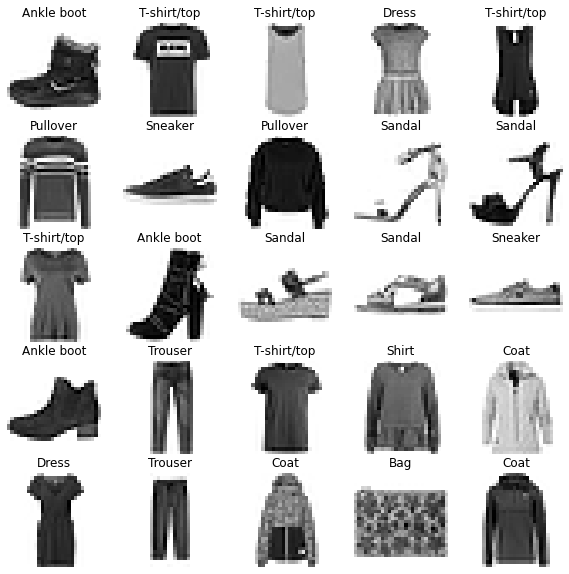

In [2]:
(
    (train_images, train_labels),
    (test_images, test_labels),
) = tf.keras.datasets.fashion_mnist.load_data()

# normalize images so values are between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
num_classes = len(class_names)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])

## Non-spiking model

Next we'll build and train the non-spiking model (this is identical to the
[original TensorFlow
example](https://www.tensorflow.org/tutorials/keras/classification)).

In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)


def train(input_model, train_x, test_x):
    input_model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    input_model.fit(train_x, train_labels, epochs=10)

    _, test_acc = input_model.evaluate(test_x, test_labels, verbose=2)

    print("\nTest accuracy:", test_acc)


train(model, train_images, test_images)

Epoch 1/10


   1/1875 [..............................] - ETA: 16:14 - loss: 2.5408 - accuracy: 0.0938

  40/1875 [..............................] - ETA: 2s - loss: 1.7106 - accuracy: 0.4284   

  80/1875 [>.............................] - ETA: 2s - loss: 1.4253 - accuracy: 0.5236

 118/1875 [>.............................] - ETA: 2s - loss: 1.2809 - accuracy: 0.5721

 157/1875 [=>............................] - ETA: 2s - loss: 1.1828 - accuracy: 0.6052

 197/1875 [==>...........................] - ETA: 2s - loss: 1.1133 - accuracy: 0.6279

 235/1875 [==>...........................] - ETA: 2s - loss: 1.0638 - accuracy: 0.6440

 275/1875 [===>..........................] - ETA: 2s - loss: 1.0214 - accuracy: 0.6579

 316/1875 [====>.........................] - ETA: 2s - loss: 0.9855 - accuracy: 0.6695

 356/1875 [====>.........................] - ETA: 1s - loss: 0.9559 - accuracy: 0.6791

 397/1875 [=====>........................] - ETA: 1s - loss: 0.9295 - accuracy: 0.6876

 438/1875 [======>.......................] - ETA: 1s - loss: 0.9065 - accuracy: 0.6951

 479/1875 [======>.......................] - ETA: 1s - loss: 0.8861 - accuracy: 0.7016

 519/1875 [=======>......................] - ETA: 1s - loss: 0.8684 - accuracy: 0.7073

 560/1875 [=======>......................] - ETA: 1s - loss: 0.8520 - accuracy: 0.7124

 600/1875 [========>.....................] - ETA: 1s - loss: 0.8373 - accuracy: 0.7170

 641/1875 [=========>....................] - ETA: 1s - loss: 0.8236 - accuracy: 0.7214

 682/1875 [=========>....................] - ETA: 1s - loss: 0.8108 - accuracy: 0.7255

 722/1875 [==========>...................] - ETA: 1s - loss: 0.7995 - accuracy: 0.7291

 763/1875 [===========>..................] - ETA: 1s - loss: 0.7886 - accuracy: 0.7326

 803/1875 [===========>..................] - ETA: 1s - loss: 0.7789 - accuracy: 0.7357

 840/1875 [============>.................] - ETA: 1s - loss: 0.7704 - accuracy: 0.7384

 878/1875 [=============>................] - ETA: 1s - loss: 0.7623 - accuracy: 0.7410

 918/1875 [=============>................] - ETA: 1s - loss: 0.7542 - accuracy: 0.7435

 958/1875 [==============>...............] - ETA: 1s - loss: 0.7467 - accuracy: 0.7459

 996/1875 [==============>...............] - ETA: 1s - loss: 0.7399 - accuracy: 0.7481

1034/1875 [===============>..............] - ETA: 1s - loss: 0.7334 - accuracy: 0.7501

1072/1875 [================>.............] - ETA: 1s - loss: 0.7273 - accuracy: 0.7521

1111/1875 [================>.............] - ETA: 0s - loss: 0.7212 - accuracy: 0.7541

1149/1875 [=================>............] - ETA: 0s - loss: 0.7156 - accuracy: 0.7559

1186/1875 [=================>............] - ETA: 0s - loss: 0.7103 - accuracy: 0.7576

1223/1875 [==================>...........] - ETA: 0s - loss: 0.7053 - accuracy: 0.7592

1261/1875 [===================>..........] - ETA: 0s - loss: 0.7004 - accuracy: 0.7608

1297/1875 [===================>..........] - ETA: 0s - loss: 0.6958 - accuracy: 0.7622

1333/1875 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.7637

1365/1875 [====================>.........] - ETA: 0s - loss: 0.6876 - accuracy: 0.7649

1396/1875 [=====================>........] - ETA: 0s - loss: 0.6840 - accuracy: 0.7660

1429/1875 [=====================>........] - ETA: 0s - loss: 0.6804 - accuracy: 0.7672

1462/1875 [======================>.......] - ETA: 0s - loss: 0.6768 - accuracy: 0.7683

1497/1875 [======================>.......] - ETA: 0s - loss: 0.6732 - accuracy: 0.7695

1535/1875 [=======================>......] - ETA: 0s - loss: 0.6693 - accuracy: 0.7707

1572/1875 [========================>.....] - ETA: 0s - loss: 0.6657 - accuracy: 0.7718

1610/1875 [========================>.....] - ETA: 0s - loss: 0.6621 - accuracy: 0.7730

1644/1875 [=========================>....] - ETA: 0s - loss: 0.6590 - accuracy: 0.7740

1682/1875 [=========================>....] - ETA: 0s - loss: 0.6556 - accuracy: 0.7750

1720/1875 [==========================>...] - ETA: 0s - loss: 0.6523 - accuracy: 0.7761

1758/1875 [===========================>..] - ETA: 0s - loss: 0.6491 - accuracy: 0.7771

1796/1875 [===========================>..] - ETA: 0s - loss: 0.6460 - accuracy: 0.7781

1832/1875 [============================>.] - ETA: 0s - loss: 0.6432 - accuracy: 0.7790

1865/1875 [============================>.] - ETA: 0s - loss: 0.6406 - accuracy: 0.7798

1875/1875 [==============================] - 3s 1ms/step - loss: 0.6398 - accuracy: 0.7800


Epoch 2/10
   1/1875 [..............................] - ETA: 2s - loss: 0.3005 - accuracy: 0.8125

  40/1875 [..............................] - ETA: 2s - loss: 0.3946 - accuracy: 0.8511

  79/1875 [>.............................] - ETA: 2s - loss: 0.3970 - accuracy: 0.8508

 116/1875 [>.............................] - ETA: 2s - loss: 0.3935 - accuracy: 0.8527

 155/1875 [=>............................] - ETA: 2s - loss: 0.3929 - accuracy: 0.8536

 193/1875 [==>...........................] - ETA: 2s - loss: 0.3926 - accuracy: 0.8542

 230/1875 [==>...........................] - ETA: 2s - loss: 0.3921 - accuracy: 0.8550

 269/1875 [===>..........................] - ETA: 2s - loss: 0.3919 - accuracy: 0.8556

 308/1875 [===>..........................] - ETA: 2s - loss: 0.3911 - accuracy: 0.8563

 347/1875 [====>.........................] - ETA: 2s - loss: 0.3905 - accuracy: 0.8569

 381/1875 [=====>........................] - ETA: 1s - loss: 0.3901 - accuracy: 0.8573

 420/1875 [=====>........................] - ETA: 1s - loss: 0.3896 - accuracy: 0.8577

 456/1875 [======>.......................] - ETA: 1s - loss: 0.3892 - accuracy: 0.8581

 489/1875 [======>.......................] - ETA: 1s - loss: 0.3890 - accuracy: 0.8584

 528/1875 [=======>......................] - ETA: 1s - loss: 0.3888 - accuracy: 0.8586

 567/1875 [========>.....................] - ETA: 1s - loss: 0.3886 - accuracy: 0.8587

 604/1875 [========>.....................] - ETA: 1s - loss: 0.3885 - accuracy: 0.8588

 642/1875 [=========>....................] - ETA: 1s - loss: 0.3883 - accuracy: 0.8589

 681/1875 [=========>....................] - ETA: 1s - loss: 0.3880 - accuracy: 0.8591

 720/1875 [==========>...................] - ETA: 1s - loss: 0.3876 - accuracy: 0.8593

 758/1875 [===========>..................] - ETA: 1s - loss: 0.3872 - accuracy: 0.8595

 796/1875 [===========>..................] - ETA: 1s - loss: 0.3869 - accuracy: 0.8597

 835/1875 [============>.................] - ETA: 1s - loss: 0.3865 - accuracy: 0.8598

 872/1875 [============>.................] - ETA: 1s - loss: 0.3863 - accuracy: 0.8599

 911/1875 [=============>................] - ETA: 1s - loss: 0.3860 - accuracy: 0.8600

 950/1875 [==============>...............] - ETA: 1s - loss: 0.3857 - accuracy: 0.8601

 989/1875 [==============>...............] - ETA: 1s - loss: 0.3854 - accuracy: 0.8602

1028/1875 [===============>..............] - ETA: 1s - loss: 0.3852 - accuracy: 0.8603

1066/1875 [================>.............] - ETA: 1s - loss: 0.3849 - accuracy: 0.8604

1105/1875 [================>.............] - ETA: 1s - loss: 0.3846 - accuracy: 0.8605

1143/1875 [=================>............] - ETA: 0s - loss: 0.3843 - accuracy: 0.8606

1182/1875 [=================>............] - ETA: 0s - loss: 0.3841 - accuracy: 0.8607

1221/1875 [==================>...........] - ETA: 0s - loss: 0.3838 - accuracy: 0.8608

1260/1875 [===================>..........] - ETA: 0s - loss: 0.3835 - accuracy: 0.8609

1299/1875 [===================>..........] - ETA: 0s - loss: 0.3832 - accuracy: 0.8610

1336/1875 [====================>.........] - ETA: 0s - loss: 0.3830 - accuracy: 0.8611

1374/1875 [====================>.........] - ETA: 0s - loss: 0.3828 - accuracy: 0.8612

1413/1875 [=====================>........] - ETA: 0s - loss: 0.3826 - accuracy: 0.8613

1452/1875 [======================>.......] - ETA: 0s - loss: 0.3823 - accuracy: 0.8614

1491/1875 [======================>.......] - ETA: 0s - loss: 0.3821 - accuracy: 0.8615

1524/1875 [=======================>......] - ETA: 0s - loss: 0.3819 - accuracy: 0.8615

1563/1875 [========================>.....] - ETA: 0s - loss: 0.3817 - accuracy: 0.8616

1602/1875 [========================>.....] - ETA: 0s - loss: 0.3815 - accuracy: 0.8617

1641/1875 [=========================>....] - ETA: 0s - loss: 0.3814 - accuracy: 0.8617

1680/1875 [=========================>....] - ETA: 0s - loss: 0.3812 - accuracy: 0.8618

1718/1875 [==========================>...] - ETA: 0s - loss: 0.3810 - accuracy: 0.8619

1755/1875 [===========================>..] - ETA: 0s - loss: 0.3808 - accuracy: 0.8620

1793/1875 [===========================>..] - ETA: 0s - loss: 0.3806 - accuracy: 0.8621

1832/1875 [============================>.] - ETA: 0s - loss: 0.3804 - accuracy: 0.8621

1867/1875 [============================>.] - ETA: 0s - loss: 0.3802 - accuracy: 0.8622

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3802 - accuracy: 0.8622


Epoch 3/10
   1/1875 [..............................] - ETA: 4s - loss: 0.4578 - accuracy: 0.9062

  38/1875 [..............................] - ETA: 2s - loss: 0.3192 - accuracy: 0.8885

  77/1875 [>.............................] - ETA: 2s - loss: 0.3298 - accuracy: 0.8832

 116/1875 [>.............................] - ETA: 2s - loss: 0.3320 - accuracy: 0.8821

 155/1875 [=>............................] - ETA: 2s - loss: 0.3320 - accuracy: 0.8819

 194/1875 [==>...........................] - ETA: 2s - loss: 0.3324 - accuracy: 0.8815

 233/1875 [==>...........................] - ETA: 2s - loss: 0.3328 - accuracy: 0.8812

 262/1875 [===>..........................] - ETA: 2s - loss: 0.3329 - accuracy: 0.8811

 300/1875 [===>..........................] - ETA: 2s - loss: 0.3338 - accuracy: 0.8809

 338/1875 [====>.........................] - ETA: 2s - loss: 0.3348 - accuracy: 0.8805

 377/1875 [=====>........................] - ETA: 2s - loss: 0.3358 - accuracy: 0.8802

 416/1875 [=====>........................] - ETA: 1s - loss: 0.3366 - accuracy: 0.8798

 455/1875 [======>.......................] - ETA: 1s - loss: 0.3372 - accuracy: 0.8795

 494/1875 [======>.......................] - ETA: 1s - loss: 0.3373 - accuracy: 0.8794

 522/1875 [=======>......................] - ETA: 1s - loss: 0.3373 - accuracy: 0.8794

 559/1875 [=======>......................] - ETA: 1s - loss: 0.3373 - accuracy: 0.8793

 597/1875 [========>.....................] - ETA: 1s - loss: 0.3374 - accuracy: 0.8792

 636/1875 [=========>....................] - ETA: 1s - loss: 0.3376 - accuracy: 0.8791

 675/1875 [=========>....................] - ETA: 1s - loss: 0.3377 - accuracy: 0.8790

 714/1875 [==========>...................] - ETA: 1s - loss: 0.3380 - accuracy: 0.8789

 753/1875 [===========>..................] - ETA: 1s - loss: 0.3382 - accuracy: 0.8787

 792/1875 [===========>..................] - ETA: 1s - loss: 0.3383 - accuracy: 0.8786

 831/1875 [============>.................] - ETA: 1s - loss: 0.3383 - accuracy: 0.8785

 869/1875 [============>.................] - ETA: 1s - loss: 0.3383 - accuracy: 0.8785

 908/1875 [=============>................] - ETA: 1s - loss: 0.3382 - accuracy: 0.8784

 947/1875 [==============>...............] - ETA: 1s - loss: 0.3382 - accuracy: 0.8783

 986/1875 [==============>...............] - ETA: 1s - loss: 0.3381 - accuracy: 0.8783

1025/1875 [===============>..............] - ETA: 1s - loss: 0.3380 - accuracy: 0.8783

1064/1875 [================>.............] - ETA: 1s - loss: 0.3379 - accuracy: 0.8783

1102/1875 [================>.............] - ETA: 1s - loss: 0.3379 - accuracy: 0.8783

1139/1875 [=================>............] - ETA: 0s - loss: 0.3378 - accuracy: 0.8783

1178/1875 [=================>............] - ETA: 0s - loss: 0.3377 - accuracy: 0.8783

1217/1875 [==================>...........] - ETA: 0s - loss: 0.3376 - accuracy: 0.8782

1256/1875 [===================>..........] - ETA: 0s - loss: 0.3375 - accuracy: 0.8782

1295/1875 [===================>..........] - ETA: 0s - loss: 0.3375 - accuracy: 0.8782

1334/1875 [====================>.........] - ETA: 0s - loss: 0.3374 - accuracy: 0.8782

1368/1875 [====================>.........] - ETA: 0s - loss: 0.3373 - accuracy: 0.8782

1406/1875 [=====================>........] - ETA: 0s - loss: 0.3373 - accuracy: 0.8782

1418/1875 [=====================>........] - ETA: 0s - loss: 0.3373 - accuracy: 0.8782

1457/1875 [======================>.......] - ETA: 0s - loss: 0.3373 - accuracy: 0.8781

1495/1875 [======================>.......] - ETA: 0s - loss: 0.3372 - accuracy: 0.8781

1533/1875 [=======================>......] - ETA: 0s - loss: 0.3372 - accuracy: 0.8781

1572/1875 [========================>.....] - ETA: 0s - loss: 0.3372 - accuracy: 0.8781

1611/1875 [========================>.....] - ETA: 0s - loss: 0.3371 - accuracy: 0.8781

1650/1875 [=========================>....] - ETA: 0s - loss: 0.3371 - accuracy: 0.8781

1687/1875 [=========================>....] - ETA: 0s - loss: 0.3370 - accuracy: 0.8781

1725/1875 [==========================>...] - ETA: 0s - loss: 0.3370 - accuracy: 0.8781

1764/1875 [===========================>..] - ETA: 0s - loss: 0.3369 - accuracy: 0.8781

1796/1875 [===========================>..] - ETA: 0s - loss: 0.3368 - accuracy: 0.8781

1835/1875 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.8781

1874/1875 [============================>.] - ETA: 0s - loss: 0.3367 - accuracy: 0.8781

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3367 - accuracy: 0.8781


Epoch 4/10
   1/1875 [..............................] - ETA: 2s - loss: 0.4060 - accuracy: 0.8750

  39/1875 [..............................] - ETA: 2s - loss: 0.3108 - accuracy: 0.8926

  78/1875 [>.............................] - ETA: 2s - loss: 0.3167 - accuracy: 0.8898

 117/1875 [>.............................] - ETA: 2s - loss: 0.3186 - accuracy: 0.8888

 157/1875 [=>............................] - ETA: 2s - loss: 0.3200 - accuracy: 0.8875

 191/1875 [==>...........................] - ETA: 2s - loss: 0.3208 - accuracy: 0.8868

 231/1875 [==>...........................] - ETA: 2s - loss: 0.3196 - accuracy: 0.8868

 270/1875 [===>..........................] - ETA: 2s - loss: 0.3187 - accuracy: 0.8869

 309/1875 [===>..........................] - ETA: 2s - loss: 0.3183 - accuracy: 0.8868

 346/1875 [====>.........................] - ETA: 2s - loss: 0.3180 - accuracy: 0.8868

 384/1875 [=====>........................] - ETA: 1s - loss: 0.3180 - accuracy: 0.8865

 423/1875 [=====>........................] - ETA: 1s - loss: 0.3178 - accuracy: 0.8864

 461/1875 [======>.......................] - ETA: 1s - loss: 0.3176 - accuracy: 0.8863

 499/1875 [======>.......................] - ETA: 1s - loss: 0.3174 - accuracy: 0.8862

 537/1875 [=======>......................] - ETA: 1s - loss: 0.3173 - accuracy: 0.8861

 575/1875 [========>.....................] - ETA: 1s - loss: 0.3171 - accuracy: 0.8860

 614/1875 [========>.....................] - ETA: 1s - loss: 0.3169 - accuracy: 0.8859

 653/1875 [=========>....................] - ETA: 1s - loss: 0.3167 - accuracy: 0.8858

 692/1875 [==========>...................] - ETA: 1s - loss: 0.3166 - accuracy: 0.8858

 730/1875 [==========>...................] - ETA: 1s - loss: 0.3164 - accuracy: 0.8857

 768/1875 [===========>..................] - ETA: 1s - loss: 0.3162 - accuracy: 0.8857

 807/1875 [===========>..................] - ETA: 1s - loss: 0.3161 - accuracy: 0.8857

 846/1875 [============>.................] - ETA: 1s - loss: 0.3160 - accuracy: 0.8857

 884/1875 [=============>................] - ETA: 1s - loss: 0.3158 - accuracy: 0.8857

 923/1875 [=============>................] - ETA: 1s - loss: 0.3157 - accuracy: 0.8857

 962/1875 [==============>...............] - ETA: 1s - loss: 0.3155 - accuracy: 0.8857

1000/1875 [===============>..............] - ETA: 1s - loss: 0.3153 - accuracy: 0.8857

1039/1875 [===============>..............] - ETA: 1s - loss: 0.3151 - accuracy: 0.8858

1071/1875 [================>.............] - ETA: 1s - loss: 0.3149 - accuracy: 0.8858

1110/1875 [================>.............] - ETA: 1s - loss: 0.3147 - accuracy: 0.8859

1149/1875 [=================>............] - ETA: 0s - loss: 0.3145 - accuracy: 0.8859

1186/1875 [=================>............] - ETA: 0s - loss: 0.3144 - accuracy: 0.8860

1225/1875 [==================>...........] - ETA: 0s - loss: 0.3142 - accuracy: 0.8861

1264/1875 [===================>..........] - ETA: 0s - loss: 0.3140 - accuracy: 0.8861

1303/1875 [===================>..........] - ETA: 0s - loss: 0.3137 - accuracy: 0.8862

1342/1875 [====================>.........] - ETA: 0s - loss: 0.3135 - accuracy: 0.8862

1382/1875 [=====================>........] - ETA: 0s - loss: 0.3134 - accuracy: 0.8863

1420/1875 [=====================>........] - ETA: 0s - loss: 0.3132 - accuracy: 0.8863

1459/1875 [======================>.......] - ETA: 0s - loss: 0.3131 - accuracy: 0.8863

1498/1875 [======================>.......] - ETA: 0s - loss: 0.3130 - accuracy: 0.8864

1537/1875 [=======================>......] - ETA: 0s - loss: 0.3128 - accuracy: 0.8864

1576/1875 [========================>.....] - ETA: 0s - loss: 0.3127 - accuracy: 0.8864

1615/1875 [========================>.....] - ETA: 0s - loss: 0.3126 - accuracy: 0.8865

1654/1875 [=========================>....] - ETA: 0s - loss: 0.3125 - accuracy: 0.8865

1693/1875 [==========================>...] - ETA: 0s - loss: 0.3124 - accuracy: 0.8865

1730/1875 [==========================>...] - ETA: 0s - loss: 0.3123 - accuracy: 0.8865

1769/1875 [===========================>..] - ETA: 0s - loss: 0.3123 - accuracy: 0.8866

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3122 - accuracy: 0.8866

1847/1875 [============================>.] - ETA: 0s - loss: 0.3121 - accuracy: 0.8866

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3121 - accuracy: 0.8866


Epoch 5/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1181 - accuracy: 0.9375

  40/1875 [..............................] - ETA: 2s - loss: 0.2995 - accuracy: 0.8828

  67/1875 [>.............................] - ETA: 2s - loss: 0.3045 - accuracy: 0.8834

  85/1875 [>.............................] - ETA: 3s - loss: 0.3035 - accuracy: 0.8852

 123/1875 [>.............................] - ETA: 2s - loss: 0.3006 - accuracy: 0.8874

 162/1875 [=>............................] - ETA: 2s - loss: 0.2994 - accuracy: 0.8883

 201/1875 [==>...........................] - ETA: 2s - loss: 0.2980 - accuracy: 0.8890

 240/1875 [==>...........................] - ETA: 2s - loss: 0.2973 - accuracy: 0.8896

 279/1875 [===>..........................] - ETA: 2s - loss: 0.2969 - accuracy: 0.8899

 318/1875 [====>.........................] - ETA: 2s - loss: 0.2966 - accuracy: 0.8901

 357/1875 [====>.........................] - ETA: 2s - loss: 0.2966 - accuracy: 0.8902

 395/1875 [=====>........................] - ETA: 2s - loss: 0.2964 - accuracy: 0.8903

 434/1875 [=====>........................] - ETA: 2s - loss: 0.2963 - accuracy: 0.8904

 473/1875 [======>.......................] - ETA: 1s - loss: 0.2963 - accuracy: 0.8904

 510/1875 [=======>......................] - ETA: 1s - loss: 0.2961 - accuracy: 0.8905

 549/1875 [=======>......................] - ETA: 1s - loss: 0.2960 - accuracy: 0.8905

 587/1875 [========>.....................] - ETA: 1s - loss: 0.2960 - accuracy: 0.8905

 626/1875 [=========>....................] - ETA: 1s - loss: 0.2959 - accuracy: 0.8905

 665/1875 [=========>....................] - ETA: 1s - loss: 0.2957 - accuracy: 0.8905

 704/1875 [==========>...................] - ETA: 1s - loss: 0.2956 - accuracy: 0.8905

 743/1875 [==========>...................] - ETA: 1s - loss: 0.2955 - accuracy: 0.8905

 781/1875 [===========>..................] - ETA: 1s - loss: 0.2955 - accuracy: 0.8905

 820/1875 [============>.................] - ETA: 1s - loss: 0.2954 - accuracy: 0.8905

 859/1875 [============>.................] - ETA: 1s - loss: 0.2953 - accuracy: 0.8906

 898/1875 [=============>................] - ETA: 1s - loss: 0.2952 - accuracy: 0.8906

 937/1875 [=============>................] - ETA: 1s - loss: 0.2950 - accuracy: 0.8906

 976/1875 [==============>...............] - ETA: 1s - loss: 0.2949 - accuracy: 0.8906

1015/1875 [===============>..............] - ETA: 1s - loss: 0.2948 - accuracy: 0.8906

1053/1875 [===============>..............] - ETA: 1s - loss: 0.2947 - accuracy: 0.8906

1091/1875 [================>.............] - ETA: 1s - loss: 0.2947 - accuracy: 0.8906

1130/1875 [=================>............] - ETA: 1s - loss: 0.2946 - accuracy: 0.8907

1169/1875 [=================>............] - ETA: 0s - loss: 0.2945 - accuracy: 0.8907

1208/1875 [==================>...........] - ETA: 0s - loss: 0.2945 - accuracy: 0.8907

1247/1875 [==================>...........] - ETA: 0s - loss: 0.2944 - accuracy: 0.8907

1286/1875 [===================>..........] - ETA: 0s - loss: 0.2944 - accuracy: 0.8907

1325/1875 [====================>.........] - ETA: 0s - loss: 0.2944 - accuracy: 0.8908

1363/1875 [====================>.........] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1402/1875 [=====================>........] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1439/1875 [======================>.......] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1477/1875 [======================>.......] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1515/1875 [=======================>......] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908



1553/1875 [=======================>......] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1592/1875 [========================>.....] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1630/1875 [=========================>....] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1669/1875 [=========================>....] - ETA: 0s - loss: 0.2942 - accuracy: 0.8908

1708/1875 [==========================>...] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1747/1875 [==========================>...] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1785/1875 [===========================>..] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1824/1875 [============================>.] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1862/1875 [============================>.] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2943 - accuracy: 0.8908


Epoch 6/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1637 - accuracy: 0.9375

  39/1875 [..............................] - ETA: 2s - loss: 0.2509 - accuracy: 0.9114

  78/1875 [>.............................] - ETA: 2s - loss: 0.2611 - accuracy: 0.9066

 117/1875 [>.............................] - ETA: 2s - loss: 0.2659 - accuracy: 0.9040

 157/1875 [=>............................] - ETA: 2s - loss: 0.2684 - accuracy: 0.9028

 196/1875 [==>...........................] - ETA: 2s - loss: 0.2702 - accuracy: 0.9021

 234/1875 [==>...........................] - ETA: 2s - loss: 0.2714 - accuracy: 0.9015

 273/1875 [===>..........................] - ETA: 2s - loss: 0.2722 - accuracy: 0.9010

 311/1875 [===>..........................] - ETA: 2s - loss: 0.2730 - accuracy: 0.9005

 350/1875 [====>.........................] - ETA: 1s - loss: 0.2738 - accuracy: 0.9001

 389/1875 [=====>........................] - ETA: 1s - loss: 0.2747 - accuracy: 0.8997

 427/1875 [=====>........................] - ETA: 1s - loss: 0.2756 - accuracy: 0.8993

 466/1875 [======>.......................] - ETA: 1s - loss: 0.2764 - accuracy: 0.8990

 505/1875 [=======>......................] - ETA: 1s - loss: 0.2770 - accuracy: 0.8986

 544/1875 [=======>......................] - ETA: 1s - loss: 0.2776 - accuracy: 0.8983

 583/1875 [========>.....................] - ETA: 1s - loss: 0.2780 - accuracy: 0.8981

 622/1875 [========>.....................] - ETA: 1s - loss: 0.2784 - accuracy: 0.8978

 660/1875 [=========>....................] - ETA: 1s - loss: 0.2787 - accuracy: 0.8977

 699/1875 [==========>...................] - ETA: 1s - loss: 0.2790 - accuracy: 0.8975

 737/1875 [==========>...................] - ETA: 1s - loss: 0.2792 - accuracy: 0.8974

 775/1875 [===========>..................] - ETA: 1s - loss: 0.2794 - accuracy: 0.8973

 813/1875 [============>.................] - ETA: 1s - loss: 0.2794 - accuracy: 0.8973

 852/1875 [============>.................] - ETA: 1s - loss: 0.2794 - accuracy: 0.8972

 890/1875 [=============>................] - ETA: 1s - loss: 0.2794 - accuracy: 0.8973

 929/1875 [=============>................] - ETA: 1s - loss: 0.2793 - accuracy: 0.8973

 968/1875 [==============>...............] - ETA: 1s - loss: 0.2792 - accuracy: 0.8973

1006/1875 [===============>..............] - ETA: 1s - loss: 0.2792 - accuracy: 0.8973

1045/1875 [===============>..............] - ETA: 1s - loss: 0.2792 - accuracy: 0.8973

1082/1875 [================>.............] - ETA: 1s - loss: 0.2791 - accuracy: 0.8973

1121/1875 [================>.............] - ETA: 0s - loss: 0.2791 - accuracy: 0.8973

1160/1875 [=================>............] - ETA: 0s - loss: 0.2790 - accuracy: 0.8973

1199/1875 [==================>...........] - ETA: 0s - loss: 0.2790 - accuracy: 0.8972

1237/1875 [==================>...........] - ETA: 0s - loss: 0.2789 - accuracy: 0.8972

1275/1875 [===================>..........] - ETA: 0s - loss: 0.2789 - accuracy: 0.8972

1313/1875 [====================>.........] - ETA: 0s - loss: 0.2788 - accuracy: 0.8973

1352/1875 [====================>.........] - ETA: 0s - loss: 0.2787 - accuracy: 0.8973

1391/1875 [=====================>........] - ETA: 0s - loss: 0.2787 - accuracy: 0.8973

1430/1875 [=====================>........] - ETA: 0s - loss: 0.2786 - accuracy: 0.8973

1468/1875 [======================>.......] - ETA: 0s - loss: 0.2786 - accuracy: 0.8973

1506/1875 [=======================>......] - ETA: 0s - loss: 0.2785 - accuracy: 0.8973

1545/1875 [=======================>......] - ETA: 0s - loss: 0.2784 - accuracy: 0.8973

1583/1875 [========================>.....] - ETA: 0s - loss: 0.2784 - accuracy: 0.8973

1622/1875 [========================>.....] - ETA: 0s - loss: 0.2783 - accuracy: 0.8973

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2783 - accuracy: 0.8973

1700/1875 [==========================>...] - ETA: 0s - loss: 0.2782 - accuracy: 0.8973

1739/1875 [==========================>...] - ETA: 0s - loss: 0.2781 - accuracy: 0.8973

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2781 - accuracy: 0.8973

1817/1875 [============================>.] - ETA: 0s - loss: 0.2781 - accuracy: 0.8973

1856/1875 [============================>.] - ETA: 0s - loss: 0.2780 - accuracy: 0.8972

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2780 - accuracy: 0.8972


Epoch 7/10
   1/1875 [..............................] - ETA: 2s - loss: 0.2414 - accuracy: 0.8750

  40/1875 [..............................] - ETA: 2s - loss: 0.2491 - accuracy: 0.9055

  79/1875 [>.............................] - ETA: 2s - loss: 0.2512 - accuracy: 0.9086

 118/1875 [>.............................] - ETA: 2s - loss: 0.2529 - accuracy: 0.9092

 156/1875 [=>............................] - ETA: 2s - loss: 0.2543 - accuracy: 0.9090

 185/1875 [=>............................] - ETA: 2s - loss: 0.2550 - accuracy: 0.9087

 221/1875 [==>...........................] - ETA: 2s - loss: 0.2553 - accuracy: 0.9081

 248/1875 [==>...........................] - ETA: 2s - loss: 0.2556 - accuracy: 0.9076

 288/1875 [===>..........................] - ETA: 2s - loss: 0.2560 - accuracy: 0.9071

 317/1875 [====>.........................] - ETA: 2s - loss: 0.2566 - accuracy: 0.9066

 356/1875 [====>.........................] - ETA: 2s - loss: 0.2575 - accuracy: 0.9061

 392/1875 [=====>........................] - ETA: 2s - loss: 0.2581 - accuracy: 0.9057

 430/1875 [=====>........................] - ETA: 2s - loss: 0.2588 - accuracy: 0.9053

 468/1875 [======>.......................] - ETA: 1s - loss: 0.2593 - accuracy: 0.9050

 506/1875 [=======>......................] - ETA: 1s - loss: 0.2597 - accuracy: 0.9047

 544/1875 [=======>......................] - ETA: 1s - loss: 0.2600 - accuracy: 0.9045

 583/1875 [========>.....................] - ETA: 1s - loss: 0.2602 - accuracy: 0.9044

 621/1875 [========>.....................] - ETA: 1s - loss: 0.2604 - accuracy: 0.9043

 660/1875 [=========>....................] - ETA: 1s - loss: 0.2606 - accuracy: 0.9041

 699/1875 [==========>...................] - ETA: 1s - loss: 0.2609 - accuracy: 0.9040

 737/1875 [==========>...................] - ETA: 1s - loss: 0.2611 - accuracy: 0.9038

 774/1875 [===========>..................] - ETA: 1s - loss: 0.2612 - accuracy: 0.9037

 813/1875 [============>.................] - ETA: 1s - loss: 0.2613 - accuracy: 0.9037

 851/1875 [============>.................] - ETA: 1s - loss: 0.2614 - accuracy: 0.9036

 889/1875 [=============>................] - ETA: 1s - loss: 0.2615 - accuracy: 0.9035

 928/1875 [=============>................] - ETA: 1s - loss: 0.2616 - accuracy: 0.9034

 965/1875 [==============>...............] - ETA: 1s - loss: 0.2617 - accuracy: 0.9034

1003/1875 [===============>..............] - ETA: 1s - loss: 0.2617 - accuracy: 0.9034

1041/1875 [===============>..............] - ETA: 1s - loss: 0.2617 - accuracy: 0.9033

1080/1875 [================>.............] - ETA: 1s - loss: 0.2617 - accuracy: 0.9033

1115/1875 [================>.............] - ETA: 1s - loss: 0.2617 - accuracy: 0.9033

1153/1875 [=================>............] - ETA: 0s - loss: 0.2618 - accuracy: 0.9032

1192/1875 [==================>...........] - ETA: 0s - loss: 0.2618 - accuracy: 0.9032

1230/1875 [==================>...........] - ETA: 0s - loss: 0.2618 - accuracy: 0.9032

1269/1875 [===================>..........] - ETA: 0s - loss: 0.2618 - accuracy: 0.9031

1308/1875 [===================>..........] - ETA: 0s - loss: 0.2618 - accuracy: 0.9031

1346/1875 [====================>.........] - ETA: 0s - loss: 0.2618 - accuracy: 0.9030

1385/1875 [=====================>........] - ETA: 0s - loss: 0.2618 - accuracy: 0.9030

1424/1875 [=====================>........] - ETA: 0s - loss: 0.2618 - accuracy: 0.9029

1462/1875 [======================>.......] - ETA: 0s - loss: 0.2619 - accuracy: 0.9029

1501/1875 [=======================>......] - ETA: 0s - loss: 0.2619 - accuracy: 0.9028

1539/1875 [=======================>......] - ETA: 0s - loss: 0.2620 - accuracy: 0.9028

1577/1875 [========================>.....] - ETA: 0s - loss: 0.2621 - accuracy: 0.9027

1613/1875 [========================>.....] - ETA: 0s - loss: 0.2621 - accuracy: 0.9027

1652/1875 [=========================>....] - ETA: 0s - loss: 0.2622 - accuracy: 0.9026

1691/1875 [==========================>...] - ETA: 0s - loss: 0.2623 - accuracy: 0.9026

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2623 - accuracy: 0.9025

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2624 - accuracy: 0.9025

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2625 - accuracy: 0.9025

1844/1875 [============================>.] - ETA: 0s - loss: 0.2625 - accuracy: 0.9024

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2626 - accuracy: 0.9024


Epoch 8/10
   1/1875 [..............................] - ETA: 2s - loss: 0.2805 - accuracy: 0.8438

  40/1875 [..............................] - ETA: 2s - loss: 0.2236 - accuracy: 0.9165

  79/1875 [>.............................] - ETA: 2s - loss: 0.2297 - accuracy: 0.9135

 117/1875 [>.............................] - ETA: 2s - loss: 0.2326 - accuracy: 0.9121

 155/1875 [=>............................] - ETA: 2s - loss: 0.2338 - accuracy: 0.9114

 194/1875 [==>...........................] - ETA: 2s - loss: 0.2344 - accuracy: 0.9111

 232/1875 [==>...........................] - ETA: 2s - loss: 0.2347 - accuracy: 0.9107

 270/1875 [===>..........................] - ETA: 2s - loss: 0.2356 - accuracy: 0.9104

 308/1875 [===>..........................] - ETA: 2s - loss: 0.2366 - accuracy: 0.9101

 347/1875 [====>.........................] - ETA: 2s - loss: 0.2373 - accuracy: 0.9098

 386/1875 [=====>........................] - ETA: 1s - loss: 0.2381 - accuracy: 0.9096

 425/1875 [=====>........................] - ETA: 1s - loss: 0.2390 - accuracy: 0.9093

 464/1875 [======>.......................] - ETA: 1s - loss: 0.2397 - accuracy: 0.9091

 502/1875 [=======>......................] - ETA: 1s - loss: 0.2401 - accuracy: 0.9089

 541/1875 [=======>......................] - ETA: 1s - loss: 0.2406 - accuracy: 0.9088

 580/1875 [========>.....................] - ETA: 1s - loss: 0.2409 - accuracy: 0.9087

 619/1875 [========>.....................] - ETA: 1s - loss: 0.2412 - accuracy: 0.9086

 658/1875 [=========>....................] - ETA: 1s - loss: 0.2416 - accuracy: 0.9085

 697/1875 [==========>...................] - ETA: 1s - loss: 0.2420 - accuracy: 0.9084

 736/1875 [==========>...................] - ETA: 1s - loss: 0.2424 - accuracy: 0.9083

 773/1875 [===========>..................] - ETA: 1s - loss: 0.2428 - accuracy: 0.9082

 811/1875 [===========>..................] - ETA: 1s - loss: 0.2431 - accuracy: 0.9081

 850/1875 [============>.................] - ETA: 1s - loss: 0.2435 - accuracy: 0.9080

 889/1875 [=============>................] - ETA: 1s - loss: 0.2438 - accuracy: 0.9079

 928/1875 [=============>................] - ETA: 1s - loss: 0.2442 - accuracy: 0.9078

 966/1875 [==============>...............] - ETA: 1s - loss: 0.2445 - accuracy: 0.9078

1004/1875 [===============>..............] - ETA: 1s - loss: 0.2449 - accuracy: 0.9077

1043/1875 [===============>..............] - ETA: 1s - loss: 0.2453 - accuracy: 0.9075

1081/1875 [================>.............] - ETA: 1s - loss: 0.2457 - accuracy: 0.9074

1115/1875 [================>.............] - ETA: 1s - loss: 0.2460 - accuracy: 0.9073

1154/1875 [=================>............] - ETA: 0s - loss: 0.2463 - accuracy: 0.9073

1193/1875 [==================>...........] - ETA: 0s - loss: 0.2466 - accuracy: 0.9072

1231/1875 [==================>...........] - ETA: 0s - loss: 0.2469 - accuracy: 0.9071

1269/1875 [===================>..........] - ETA: 0s - loss: 0.2472 - accuracy: 0.9070

1308/1875 [===================>..........] - ETA: 0s - loss: 0.2475 - accuracy: 0.9070

1346/1875 [====================>.........] - ETA: 0s - loss: 0.2477 - accuracy: 0.9069

1385/1875 [=====================>........] - ETA: 0s - loss: 0.2479 - accuracy: 0.9069

1422/1875 [=====================>........] - ETA: 0s - loss: 0.2481 - accuracy: 0.9068

1461/1875 [======================>.......] - ETA: 0s - loss: 0.2483 - accuracy: 0.9068

1500/1875 [=======================>......] - ETA: 0s - loss: 0.2485 - accuracy: 0.9067

1537/1875 [=======================>......] - ETA: 0s - loss: 0.2486 - accuracy: 0.9067

1575/1875 [========================>.....] - ETA: 0s - loss: 0.2488 - accuracy: 0.9067

1610/1875 [========================>.....] - ETA: 0s - loss: 0.2489 - accuracy: 0.9067

1649/1875 [=========================>....] - ETA: 0s - loss: 0.2490 - accuracy: 0.9066

1688/1875 [==========================>...] - ETA: 0s - loss: 0.2491 - accuracy: 0.9066

1727/1875 [==========================>...] - ETA: 0s - loss: 0.2492 - accuracy: 0.9066

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2493 - accuracy: 0.9066

1803/1875 [===========================>..] - ETA: 0s - loss: 0.2494 - accuracy: 0.9066

1842/1875 [============================>.] - ETA: 0s - loss: 0.2495 - accuracy: 0.9065

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2496 - accuracy: 0.9065


Epoch 9/10
   1/1875 [..............................] - ETA: 2s - loss: 0.3084 - accuracy: 0.8750

  40/1875 [..............................] - ETA: 2s - loss: 0.2310 - accuracy: 0.9096

  79/1875 [>.............................] - ETA: 2s - loss: 0.2294 - accuracy: 0.9099

 117/1875 [>.............................] - ETA: 2s - loss: 0.2327 - accuracy: 0.9094

 155/1875 [=>............................] - ETA: 2s - loss: 0.2329 - accuracy: 0.9100

 194/1875 [==>...........................] - ETA: 2s - loss: 0.2325 - accuracy: 0.9105

 233/1875 [==>...........................] - ETA: 2s - loss: 0.2319 - accuracy: 0.9109

 266/1875 [===>..........................] - ETA: 2s - loss: 0.2318 - accuracy: 0.9111

 292/1875 [===>..........................] - ETA: 2s - loss: 0.2322 - accuracy: 0.9110

 329/1875 [====>.........................] - ETA: 2s - loss: 0.2331 - accuracy: 0.9109

 368/1875 [====>.........................] - ETA: 2s - loss: 0.2338 - accuracy: 0.9108

 407/1875 [=====>........................] - ETA: 2s - loss: 0.2345 - accuracy: 0.9106

 446/1875 [======>.......................] - ETA: 1s - loss: 0.2351 - accuracy: 0.9104

 485/1875 [======>.......................] - ETA: 1s - loss: 0.2356 - accuracy: 0.9102

 523/1875 [=======>......................] - ETA: 1s - loss: 0.2360 - accuracy: 0.9100

 561/1875 [=======>......................] - ETA: 1s - loss: 0.2363 - accuracy: 0.9099

 600/1875 [========>.....................] - ETA: 1s - loss: 0.2367 - accuracy: 0.9098

 639/1875 [=========>....................] - ETA: 1s - loss: 0.2369 - accuracy: 0.9097

 678/1875 [=========>....................] - ETA: 1s - loss: 0.2372 - accuracy: 0.9096

 717/1875 [==========>...................] - ETA: 1s - loss: 0.2375 - accuracy: 0.9095

 756/1875 [===========>..................] - ETA: 1s - loss: 0.2378 - accuracy: 0.9094

 795/1875 [===========>..................] - ETA: 1s - loss: 0.2380 - accuracy: 0.9094

 834/1875 [============>.................] - ETA: 1s - loss: 0.2382 - accuracy: 0.9093

 872/1875 [============>.................] - ETA: 1s - loss: 0.2384 - accuracy: 0.9093

 910/1875 [=============>................] - ETA: 1s - loss: 0.2385 - accuracy: 0.9092

 949/1875 [==============>...............] - ETA: 1s - loss: 0.2387 - accuracy: 0.9092

 988/1875 [==============>...............] - ETA: 1s - loss: 0.2389 - accuracy: 0.9092

1027/1875 [===============>..............] - ETA: 1s - loss: 0.2391 - accuracy: 0.9091

1066/1875 [================>.............] - ETA: 1s - loss: 0.2393 - accuracy: 0.9091

1105/1875 [================>.............] - ETA: 1s - loss: 0.2396 - accuracy: 0.9091

1143/1875 [=================>............] - ETA: 0s - loss: 0.2398 - accuracy: 0.9090

1182/1875 [=================>............] - ETA: 0s - loss: 0.2400 - accuracy: 0.9090

1220/1875 [==================>...........] - ETA: 0s - loss: 0.2402 - accuracy: 0.9089

1259/1875 [===================>..........] - ETA: 0s - loss: 0.2403 - accuracy: 0.9089

1298/1875 [===================>..........] - ETA: 0s - loss: 0.2404 - accuracy: 0.9088

1337/1875 [====================>.........] - ETA: 0s - loss: 0.2405 - accuracy: 0.9088

1375/1875 [=====================>........] - ETA: 0s - loss: 0.2406 - accuracy: 0.9088

1414/1875 [=====================>........] - ETA: 0s - loss: 0.2406 - accuracy: 0.9088

1451/1875 [======================>.......] - ETA: 0s - loss: 0.2407 - accuracy: 0.9088

1490/1875 [======================>.......] - ETA: 0s - loss: 0.2408 - accuracy: 0.9087

1527/1875 [=======================>......] - ETA: 0s - loss: 0.2408 - accuracy: 0.9087

1564/1875 [========================>.....] - ETA: 0s - loss: 0.2409 - accuracy: 0.9087

1603/1875 [========================>.....] - ETA: 0s - loss: 0.2410 - accuracy: 0.9087

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2411 - accuracy: 0.9087

1680/1875 [=========================>....] - ETA: 0s - loss: 0.2411 - accuracy: 0.9086

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2412 - accuracy: 0.9086

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2413 - accuracy: 0.9086

1794/1875 [===========================>..] - ETA: 0s - loss: 0.2413 - accuracy: 0.9086

1833/1875 [============================>.] - ETA: 0s - loss: 0.2414 - accuracy: 0.9086

1871/1875 [============================>.] - ETA: 0s - loss: 0.2415 - accuracy: 0.9086

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2415 - accuracy: 0.9086


Epoch 10/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1111 - accuracy: 1.0000

  34/1875 [..............................] - ETA: 2s - loss: 0.2248 - accuracy: 0.9249

  68/1875 [>.............................] - ETA: 2s - loss: 0.2321 - accuracy: 0.9188

 107/1875 [>.............................] - ETA: 2s - loss: 0.2332 - accuracy: 0.9180

 146/1875 [=>............................] - ETA: 2s - loss: 0.2319 - accuracy: 0.9178

 185/1875 [=>............................] - ETA: 2s - loss: 0.2310 - accuracy: 0.9175

 223/1875 [==>...........................] - ETA: 2s - loss: 0.2300 - accuracy: 0.9173

 261/1875 [===>..........................] - ETA: 2s - loss: 0.2293 - accuracy: 0.9170

 300/1875 [===>..........................] - ETA: 2s - loss: 0.2289 - accuracy: 0.9167

 339/1875 [====>.........................] - ETA: 2s - loss: 0.2286 - accuracy: 0.9165

 378/1875 [=====>........................] - ETA: 2s - loss: 0.2286 - accuracy: 0.9163

 417/1875 [=====>........................] - ETA: 1s - loss: 0.2287 - accuracy: 0.9161

 447/1875 [======>.......................] - ETA: 1s - loss: 0.2288 - accuracy: 0.9160

 479/1875 [======>.......................] - ETA: 1s - loss: 0.2287 - accuracy: 0.9160

 518/1875 [=======>......................] - ETA: 1s - loss: 0.2285 - accuracy: 0.9161

 556/1875 [=======>......................] - ETA: 1s - loss: 0.2283 - accuracy: 0.9161

 594/1875 [========>.....................] - ETA: 1s - loss: 0.2283 - accuracy: 0.9160

 633/1875 [=========>....................] - ETA: 1s - loss: 0.2282 - accuracy: 0.9160

 672/1875 [=========>....................] - ETA: 1s - loss: 0.2282 - accuracy: 0.9159

 711/1875 [==========>...................] - ETA: 1s - loss: 0.2283 - accuracy: 0.9159

 750/1875 [===========>..................] - ETA: 1s - loss: 0.2282 - accuracy: 0.9158

 789/1875 [===========>..................] - ETA: 1s - loss: 0.2282 - accuracy: 0.9157

 828/1875 [============>.................] - ETA: 1s - loss: 0.2283 - accuracy: 0.9156

 866/1875 [============>.................] - ETA: 1s - loss: 0.2284 - accuracy: 0.9156

 903/1875 [=============>................] - ETA: 1s - loss: 0.2285 - accuracy: 0.9155

 942/1875 [==============>...............] - ETA: 1s - loss: 0.2286 - accuracy: 0.9154

 981/1875 [==============>...............] - ETA: 1s - loss: 0.2287 - accuracy: 0.9154

1020/1875 [===============>..............] - ETA: 1s - loss: 0.2288 - accuracy: 0.9153

1059/1875 [===============>..............] - ETA: 1s - loss: 0.2289 - accuracy: 0.9153

1098/1875 [================>.............] - ETA: 1s - loss: 0.2289 - accuracy: 0.9152

1134/1875 [=================>............] - ETA: 0s - loss: 0.2290 - accuracy: 0.9152

1173/1875 [=================>............] - ETA: 0s - loss: 0.2291 - accuracy: 0.9151

1212/1875 [==================>...........] - ETA: 0s - loss: 0.2292 - accuracy: 0.9150

1249/1875 [==================>...........] - ETA: 0s - loss: 0.2294 - accuracy: 0.9150

1287/1875 [===================>..........] - ETA: 0s - loss: 0.2295 - accuracy: 0.9149

1324/1875 [====================>.........] - ETA: 0s - loss: 0.2296 - accuracy: 0.9149

1363/1875 [====================>.........] - ETA: 0s - loss: 0.2297 - accuracy: 0.9148

1402/1875 [=====================>........] - ETA: 0s - loss: 0.2297 - accuracy: 0.9148

1441/1875 [======================>.......] - ETA: 0s - loss: 0.2298 - accuracy: 0.9147

1480/1875 [======================>.......] - ETA: 0s - loss: 0.2299 - accuracy: 0.9147

1518/1875 [=======================>......] - ETA: 0s - loss: 0.2300 - accuracy: 0.9147

1556/1875 [=======================>......] - ETA: 0s - loss: 0.2301 - accuracy: 0.9146

1595/1875 [========================>.....] - ETA: 0s - loss: 0.2302 - accuracy: 0.9146

1634/1875 [=========================>....] - ETA: 0s - loss: 0.2303 - accuracy: 0.9146

1669/1875 [=========================>....] - ETA: 0s - loss: 0.2304 - accuracy: 0.9145

1705/1875 [==========================>...] - ETA: 0s - loss: 0.2305 - accuracy: 0.9145

1744/1875 [==========================>...] - ETA: 0s - loss: 0.2306 - accuracy: 0.9144

1783/1875 [===========================>..] - ETA: 0s - loss: 0.2307 - accuracy: 0.9144

1822/1875 [============================>.] - ETA: 0s - loss: 0.2308 - accuracy: 0.9144

1861/1875 [============================>.] - ETA: 0s - loss: 0.2310 - accuracy: 0.9143

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2310 - accuracy: 0.9143


313/313 - 0s - loss: 0.3282 - accuracy: 0.8853



Test accuracy: 0.8852999806404114


## Spiking model

Next we will create an equivalent spiking model. There are three important changes here:

1. Add a temporal dimension to the data/model.

Spiking models always run over time (i.e., each forward pass through the model will run
for some number of timesteps). This means that we need to add a temporal dimension to
the data, so instead of having shape `(batch_size, ...)` it will have shape
`(batch_size, n_steps, ...)`. For those familiar with working with RNNs, the principles
are the same; a spiking neuron accepts temporal data and computes over time, just like
an RNN.

2. Replace any activation functions with `keras_spiking.SpikingActivation`.

`keras_spiking.SpikingActivation` can encapsulate any activation function, and will
produce an equivalent spiking implementation. Neurons will spike at a rate proportional
to the output of the base activation function. For example, if the activation function
is outputting a value of 10, then the wrapped `SpikingActivation` will output spikes at
a rate of 10Hz (i.e., 10 spikes per 1 simulated second, where 1 simulated second is
equivalent to some number of timesteps, determined by the `dt` parameter of
`SpikingActivation`).

Note that for many layers, Keras combines the activation function into another layer.
For example, `tf.keras.layers.Dense(units=10, activation="relu")` is equivalent to
`tf.keras.layers.Dense(units=10) -> tf.keras.layers.Activation("relu")`. Due to the
temporal nature of `SpikingActivation` it cannot be directly used within another layer
as in the first case; we need to explicitly separate it into its own layer.

3. Pool across time

The output of our `keras_spiking.SpikingActivation` layer is also a timeseries. For
classification, we need to aggregate that temporal information somehow to generate a
final prediction. Averaging the output over time is usually a good approach (but not the
only method; we could also, e.g., look at the output on the last timestep or the time to
first spike). We add a `tf.keras.layers.GlobalAveragePooling1D` layer to average across
the temporal dimension of the data.

In [4]:
# repeat the images for n_steps
n_steps = 10
train_sequences = np.tile(train_images[:, None], (1, n_steps, 1, 1))
test_sequences = np.tile(test_images[:, None], (1, n_steps, 1, 1))

In [5]:
spiking_model = tf.keras.Sequential(
    [
        # add temporal dimension to the input shape; we can set it to None,
        # to allow the model to flexibly run for different lengths of time
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        # we can use Keras' TimeDistributed wrapper to allow the Dense layer
        # to operate on temporal data
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # replace the "relu" activation in the non-spiking model with a
        # spiking equivalent
        keras_spiking.SpikingActivation("relu", spiking_aware_training=False),
        # use average pooling layer to average spiking output over time
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

# train the model, identically to the non-spiking version,
# except using the time sequences as inputs
train(spiking_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 17:21 - loss: 2.3397 - accuracy: 0.0938

  16/1875 [..............................] - ETA: 6s - loss: 2.0036 - accuracy: 0.3012   

  33/1875 [..............................] - ETA: 5s - loss: 1.7391 - accuracy: 0.4109

  50/1875 [..............................] - ETA: 5s - loss: 1.5715 - accuracy: 0.4723

  68/1875 [>.............................] - ETA: 5s - loss: 1.4512 - accuracy: 0.5137

  85/1875 [>.............................] - ETA: 5s - loss: 1.3659 - accuracy: 0.5429

 102/1875 [>.............................] - ETA: 5s - loss: 1.3007 - accuracy: 0.5648

 119/1875 [>.............................] - ETA: 5s - loss: 1.2480 - accuracy: 0.5823

 136/1875 [=>............................] - ETA: 5s - loss: 1.2036 - accuracy: 0.5970

 153/1875 [=>............................] - ETA: 5s - loss: 1.1658 - accuracy: 0.6096

 170/1875 [=>............................] - ETA: 5s - loss: 1.1334 - accuracy: 0.6202

 187/1875 [=>............................] - ETA: 5s - loss: 1.1057 - accuracy: 0.6291

 204/1875 [==>...........................] - ETA: 5s - loss: 1.0813 - accuracy: 0.6370

 221/1875 [==>...........................] - ETA: 5s - loss: 1.0592 - accuracy: 0.6441

 238/1875 [==>...........................] - ETA: 4s - loss: 1.0392 - accuracy: 0.6505

 255/1875 [===>..........................] - ETA: 4s - loss: 1.0208 - accuracy: 0.6564

 272/1875 [===>..........................] - ETA: 4s - loss: 1.0040 - accuracy: 0.6619

 288/1875 [===>..........................] - ETA: 4s - loss: 0.9894 - accuracy: 0.6665

 304/1875 [===>..........................] - ETA: 4s - loss: 0.9759 - accuracy: 0.6709

 321/1875 [====>.........................] - ETA: 4s - loss: 0.9625 - accuracy: 0.6752

 338/1875 [====>.........................] - ETA: 4s - loss: 0.9502 - accuracy: 0.6792

 355/1875 [====>.........................] - ETA: 4s - loss: 0.9386 - accuracy: 0.6829

 372/1875 [====>.........................] - ETA: 4s - loss: 0.9276 - accuracy: 0.6865

 389/1875 [=====>........................] - ETA: 4s - loss: 0.9173 - accuracy: 0.6898

 406/1875 [=====>........................] - ETA: 4s - loss: 0.9076 - accuracy: 0.6930

 423/1875 [=====>........................] - ETA: 4s - loss: 0.8984 - accuracy: 0.6960

 437/1875 [=====>........................] - ETA: 4s - loss: 0.8911 - accuracy: 0.6984

 454/1875 [======>.......................] - ETA: 4s - loss: 0.8827 - accuracy: 0.7012

 470/1875 [======>.......................] - ETA: 4s - loss: 0.8752 - accuracy: 0.7036

 487/1875 [======>.......................] - ETA: 4s - loss: 0.8675 - accuracy: 0.7061

 504/1875 [=======>......................] - ETA: 4s - loss: 0.8602 - accuracy: 0.7085

 521/1875 [=======>......................] - ETA: 4s - loss: 0.8533 - accuracy: 0.7107

 538/1875 [=======>......................] - ETA: 4s - loss: 0.8466 - accuracy: 0.7128

 555/1875 [=======>......................] - ETA: 4s - loss: 0.8402 - accuracy: 0.7148

 572/1875 [========>.....................] - ETA: 4s - loss: 0.8341 - accuracy: 0.7167

 589/1875 [========>.....................] - ETA: 3s - loss: 0.8282 - accuracy: 0.7186

 606/1875 [========>.....................] - ETA: 3s - loss: 0.8225 - accuracy: 0.7204

 623/1875 [========>.....................] - ETA: 3s - loss: 0.8170 - accuracy: 0.7222

 640/1875 [=========>....................] - ETA: 3s - loss: 0.8116 - accuracy: 0.7239

 657/1875 [=========>....................] - ETA: 3s - loss: 0.8065 - accuracy: 0.7255

 674/1875 [=========>....................] - ETA: 3s - loss: 0.8015 - accuracy: 0.7271

 691/1875 [==========>...................] - ETA: 3s - loss: 0.7967 - accuracy: 0.7287

 708/1875 [==========>...................] - ETA: 3s - loss: 0.7920 - accuracy: 0.7302

 725/1875 [==========>...................] - ETA: 3s - loss: 0.7875 - accuracy: 0.7316

 743/1875 [==========>...................] - ETA: 3s - loss: 0.7829 - accuracy: 0.7331

 760/1875 [===========>..................] - ETA: 3s - loss: 0.7787 - accuracy: 0.7344

 777/1875 [===========>..................] - ETA: 3s - loss: 0.7746 - accuracy: 0.7357

 794/1875 [===========>..................] - ETA: 3s - loss: 0.7707 - accuracy: 0.7370

 811/1875 [===========>..................] - ETA: 3s - loss: 0.7669 - accuracy: 0.7382

 828/1875 [============>.................] - ETA: 3s - loss: 0.7631 - accuracy: 0.7394

 845/1875 [============>.................] - ETA: 3s - loss: 0.7595 - accuracy: 0.7405

 862/1875 [============>.................] - ETA: 3s - loss: 0.7560 - accuracy: 0.7416

 879/1875 [=============>................] - ETA: 3s - loss: 0.7526 - accuracy: 0.7427

 895/1875 [=============>................] - ETA: 3s - loss: 0.7495 - accuracy: 0.7437

 911/1875 [=============>................] - ETA: 2s - loss: 0.7465 - accuracy: 0.7447

 928/1875 [=============>................] - ETA: 2s - loss: 0.7433 - accuracy: 0.7457

 945/1875 [==============>...............] - ETA: 2s - loss: 0.7403 - accuracy: 0.7466

 962/1875 [==============>...............] - ETA: 2s - loss: 0.7373 - accuracy: 0.7476

 979/1875 [==============>...............] - ETA: 2s - loss: 0.7344 - accuracy: 0.7485

 996/1875 [==============>...............] - ETA: 2s - loss: 0.7315 - accuracy: 0.7494

1013/1875 [===============>..............] - ETA: 2s - loss: 0.7287 - accuracy: 0.7503

1030/1875 [===============>..............] - ETA: 2s - loss: 0.7260 - accuracy: 0.7512

1047/1875 [===============>..............] - ETA: 2s - loss: 0.7234 - accuracy: 0.7521

1063/1875 [================>.............] - ETA: 2s - loss: 0.7209 - accuracy: 0.7529

1080/1875 [================>.............] - ETA: 2s - loss: 0.7183 - accuracy: 0.7537

1097/1875 [================>.............] - ETA: 2s - loss: 0.7158 - accuracy: 0.7545

1114/1875 [================>.............] - ETA: 2s - loss: 0.7134 - accuracy: 0.7553

1131/1875 [=================>............] - ETA: 2s - loss: 0.7110 - accuracy: 0.7561

1148/1875 [=================>............] - ETA: 2s - loss: 0.7086 - accuracy: 0.7568

1165/1875 [=================>............] - ETA: 2s - loss: 0.7063 - accuracy: 0.7576

1180/1875 [=================>............] - ETA: 2s - loss: 0.7042 - accuracy: 0.7583

1197/1875 [==================>...........] - ETA: 2s - loss: 0.7020 - accuracy: 0.7590

1214/1875 [==================>...........] - ETA: 2s - loss: 0.6998 - accuracy: 0.7597

1230/1875 [==================>...........] - ETA: 1s - loss: 0.6978 - accuracy: 0.7604

1247/1875 [==================>...........] - ETA: 1s - loss: 0.6956 - accuracy: 0.7611

1265/1875 [===================>..........] - ETA: 1s - loss: 0.6934 - accuracy: 0.7618

1282/1875 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.7625

1299/1875 [===================>..........] - ETA: 1s - loss: 0.6893 - accuracy: 0.7631

1316/1875 [====================>.........] - ETA: 1s - loss: 0.6873 - accuracy: 0.7638

1333/1875 [====================>.........] - ETA: 1s - loss: 0.6854 - accuracy: 0.7644

1350/1875 [====================>.........] - ETA: 1s - loss: 0.6834 - accuracy: 0.7650

1367/1875 [====================>.........] - ETA: 1s - loss: 0.6815 - accuracy: 0.7657

1384/1875 [=====================>........] - ETA: 1s - loss: 0.6796 - accuracy: 0.7663

1401/1875 [=====================>........] - ETA: 1s - loss: 0.6778 - accuracy: 0.7669

1418/1875 [=====================>........] - ETA: 1s - loss: 0.6760 - accuracy: 0.7674

1435/1875 [=====================>........] - ETA: 1s - loss: 0.6742 - accuracy: 0.7680

1452/1875 [======================>.......] - ETA: 1s - loss: 0.6725 - accuracy: 0.7686

1469/1875 [======================>.......] - ETA: 1s - loss: 0.6708 - accuracy: 0.7691

1486/1875 [======================>.......] - ETA: 1s - loss: 0.6691 - accuracy: 0.7696

1503/1875 [=======================>......] - ETA: 1s - loss: 0.6674 - accuracy: 0.7702

1520/1875 [=======================>......] - ETA: 1s - loss: 0.6658 - accuracy: 0.7707

1537/1875 [=======================>......] - ETA: 1s - loss: 0.6641 - accuracy: 0.7712

1554/1875 [=======================>......] - ETA: 0s - loss: 0.6625 - accuracy: 0.7717

1571/1875 [========================>.....] - ETA: 0s - loss: 0.6610 - accuracy: 0.7722

1588/1875 [========================>.....] - ETA: 0s - loss: 0.6594 - accuracy: 0.7727

1605/1875 [========================>.....] - ETA: 0s - loss: 0.6579 - accuracy: 0.7732

1622/1875 [========================>.....] - ETA: 0s - loss: 0.6564 - accuracy: 0.7737

1639/1875 [=========================>....] - ETA: 0s - loss: 0.6549 - accuracy: 0.7742

1656/1875 [=========================>....] - ETA: 0s - loss: 0.6534 - accuracy: 0.7746

1673/1875 [=========================>....] - ETA: 0s - loss: 0.6520 - accuracy: 0.7751

1690/1875 [==========================>...] - ETA: 0s - loss: 0.6506 - accuracy: 0.7756

1706/1875 [==========================>...] - ETA: 0s - loss: 0.6492 - accuracy: 0.7760

1723/1875 [==========================>...] - ETA: 0s - loss: 0.6479 - accuracy: 0.7764

1740/1875 [==========================>...] - ETA: 0s - loss: 0.6465 - accuracy: 0.7769

1757/1875 [===========================>..] - ETA: 0s - loss: 0.6451 - accuracy: 0.7773

1774/1875 [===========================>..] - ETA: 0s - loss: 0.6438 - accuracy: 0.7777

1791/1875 [===========================>..] - ETA: 0s - loss: 0.6425 - accuracy: 0.7781

1808/1875 [===========================>..] - ETA: 0s - loss: 0.6412 - accuracy: 0.7786

1824/1875 [============================>.] - ETA: 0s - loss: 0.6400 - accuracy: 0.7789

1841/1875 [============================>.] - ETA: 0s - loss: 0.6387 - accuracy: 0.7793

1858/1875 [============================>.] - ETA: 0s - loss: 0.6374 - accuracy: 0.7797

1875/1875 [==============================] - ETA: 0s - loss: 0.6362 - accuracy: 0.7801

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6361 - accuracy: 0.7802


Epoch 2/10
   1/1875 [..............................] - ETA: 5s - loss: 0.2852 - accuracy: 0.8750

  18/1875 [..............................] - ETA: 5s - loss: 0.3731 - accuracy: 0.8754

  35/1875 [..............................] - ETA: 5s - loss: 0.3865 - accuracy: 0.8675

  52/1875 [..............................] - ETA: 5s - loss: 0.3902 - accuracy: 0.8643

  69/1875 [>.............................] - ETA: 5s - loss: 0.3905 - accuracy: 0.8625

  86/1875 [>.............................] - ETA: 5s - loss: 0.3892 - accuracy: 0.8618

 103/1875 [>.............................] - ETA: 5s - loss: 0.3883 - accuracy: 0.8614

 120/1875 [>.............................] - ETA: 5s - loss: 0.3881 - accuracy: 0.8609

 137/1875 [=>............................] - ETA: 5s - loss: 0.3886 - accuracy: 0.8606

 154/1875 [=>............................] - ETA: 5s - loss: 0.3892 - accuracy: 0.8603

 171/1875 [=>............................] - ETA: 5s - loss: 0.3897 - accuracy: 0.8600

 188/1875 [==>...........................] - ETA: 5s - loss: 0.3900 - accuracy: 0.8596

 205/1875 [==>...........................] - ETA: 5s - loss: 0.3903 - accuracy: 0.8594

 222/1875 [==>...........................] - ETA: 5s - loss: 0.3905 - accuracy: 0.8592

 239/1875 [==>...........................] - ETA: 4s - loss: 0.3906 - accuracy: 0.8590

 254/1875 [===>..........................] - ETA: 4s - loss: 0.3909 - accuracy: 0.8588

 269/1875 [===>..........................] - ETA: 4s - loss: 0.3910 - accuracy: 0.8587

 286/1875 [===>..........................] - ETA: 4s - loss: 0.3909 - accuracy: 0.8587

 303/1875 [===>..........................] - ETA: 4s - loss: 0.3907 - accuracy: 0.8587

 321/1875 [====>.........................] - ETA: 4s - loss: 0.3907 - accuracy: 0.8587

 338/1875 [====>.........................] - ETA: 4s - loss: 0.3908 - accuracy: 0.8586

 355/1875 [====>.........................] - ETA: 4s - loss: 0.3908 - accuracy: 0.8586

 371/1875 [====>.........................] - ETA: 4s - loss: 0.3909 - accuracy: 0.8586

 388/1875 [=====>........................] - ETA: 4s - loss: 0.3909 - accuracy: 0.8586

 405/1875 [=====>........................] - ETA: 4s - loss: 0.3909 - accuracy: 0.8586

 422/1875 [=====>........................] - ETA: 4s - loss: 0.3909 - accuracy: 0.8586

 439/1875 [======>.......................] - ETA: 4s - loss: 0.3910 - accuracy: 0.8586

 450/1875 [======>.......................] - ETA: 4s - loss: 0.3910 - accuracy: 0.8586

 467/1875 [======>.......................] - ETA: 4s - loss: 0.3910 - accuracy: 0.8586

 482/1875 [======>.......................] - ETA: 4s - loss: 0.3910 - accuracy: 0.8586

 499/1875 [======>.......................] - ETA: 4s - loss: 0.3911 - accuracy: 0.8586

 516/1875 [=======>......................] - ETA: 4s - loss: 0.3911 - accuracy: 0.8586

 533/1875 [=======>......................] - ETA: 4s - loss: 0.3911 - accuracy: 0.8586

 550/1875 [=======>......................] - ETA: 4s - loss: 0.3912 - accuracy: 0.8586

 565/1875 [========>.....................] - ETA: 4s - loss: 0.3912 - accuracy: 0.8585

 581/1875 [========>.....................] - ETA: 4s - loss: 0.3912 - accuracy: 0.8585

 598/1875 [========>.....................] - ETA: 3s - loss: 0.3913 - accuracy: 0.8585

 615/1875 [========>.....................] - ETA: 3s - loss: 0.3913 - accuracy: 0.8584

 632/1875 [=========>....................] - ETA: 3s - loss: 0.3913 - accuracy: 0.8584

 649/1875 [=========>....................] - ETA: 3s - loss: 0.3912 - accuracy: 0.8584

 666/1875 [=========>....................] - ETA: 3s - loss: 0.3912 - accuracy: 0.8584

 683/1875 [=========>....................] - ETA: 3s - loss: 0.3911 - accuracy: 0.8584

 701/1875 [==========>...................] - ETA: 3s - loss: 0.3910 - accuracy: 0.8584

 718/1875 [==========>...................] - ETA: 3s - loss: 0.3909 - accuracy: 0.8585

 734/1875 [==========>...................] - ETA: 3s - loss: 0.3908 - accuracy: 0.8585

 751/1875 [===========>..................] - ETA: 3s - loss: 0.3907 - accuracy: 0.8585

 769/1875 [===========>..................] - ETA: 3s - loss: 0.3905 - accuracy: 0.8586

 786/1875 [===========>..................] - ETA: 3s - loss: 0.3904 - accuracy: 0.8586

 801/1875 [===========>..................] - ETA: 3s - loss: 0.3903 - accuracy: 0.8586

 816/1875 [============>.................] - ETA: 3s - loss: 0.3902 - accuracy: 0.8587

 833/1875 [============>.................] - ETA: 3s - loss: 0.3901 - accuracy: 0.8587

 850/1875 [============>.................] - ETA: 3s - loss: 0.3900 - accuracy: 0.8587

 866/1875 [============>.................] - ETA: 3s - loss: 0.3899 - accuracy: 0.8588

 883/1875 [=============>................] - ETA: 3s - loss: 0.3898 - accuracy: 0.8588

 900/1875 [=============>................] - ETA: 3s - loss: 0.3897 - accuracy: 0.8588

 917/1875 [=============>................] - ETA: 2s - loss: 0.3896 - accuracy: 0.8589

 934/1875 [=============>................] - ETA: 2s - loss: 0.3895 - accuracy: 0.8589

 952/1875 [==============>...............] - ETA: 2s - loss: 0.3894 - accuracy: 0.8589

 970/1875 [==============>...............] - ETA: 2s - loss: 0.3892 - accuracy: 0.8590

 987/1875 [==============>...............] - ETA: 2s - loss: 0.3891 - accuracy: 0.8590

1004/1875 [===============>..............] - ETA: 2s - loss: 0.3890 - accuracy: 0.8590

1021/1875 [===============>..............] - ETA: 2s - loss: 0.3889 - accuracy: 0.8591

1038/1875 [===============>..............] - ETA: 2s - loss: 0.3888 - accuracy: 0.8591

1055/1875 [===============>..............] - ETA: 2s - loss: 0.3886 - accuracy: 0.8592

1070/1875 [================>.............] - ETA: 2s - loss: 0.3885 - accuracy: 0.8592

1085/1875 [================>.............] - ETA: 2s - loss: 0.3884 - accuracy: 0.8592

1100/1875 [================>.............] - ETA: 2s - loss: 0.3883 - accuracy: 0.8592

1113/1875 [================>.............] - ETA: 2s - loss: 0.3883 - accuracy: 0.8593

1130/1875 [=================>............] - ETA: 2s - loss: 0.3882 - accuracy: 0.8593

1147/1875 [=================>............] - ETA: 2s - loss: 0.3880 - accuracy: 0.8593

1164/1875 [=================>............] - ETA: 2s - loss: 0.3879 - accuracy: 0.8593

1181/1875 [=================>............] - ETA: 2s - loss: 0.3878 - accuracy: 0.8594

1198/1875 [==================>...........] - ETA: 2s - loss: 0.3877 - accuracy: 0.8594

1215/1875 [==================>...........] - ETA: 2s - loss: 0.3876 - accuracy: 0.8594

1231/1875 [==================>...........] - ETA: 2s - loss: 0.3875 - accuracy: 0.8595

1248/1875 [==================>...........] - ETA: 1s - loss: 0.3874 - accuracy: 0.8595

1264/1875 [===================>..........] - ETA: 1s - loss: 0.3873 - accuracy: 0.8595

1281/1875 [===================>..........] - ETA: 1s - loss: 0.3872 - accuracy: 0.8596

1298/1875 [===================>..........] - ETA: 1s - loss: 0.3871 - accuracy: 0.8596

1315/1875 [====================>.........] - ETA: 1s - loss: 0.3870 - accuracy: 0.8597

1332/1875 [====================>.........] - ETA: 1s - loss: 0.3869 - accuracy: 0.8597

1348/1875 [====================>.........] - ETA: 1s - loss: 0.3868 - accuracy: 0.8597

1365/1875 [====================>.........] - ETA: 1s - loss: 0.3867 - accuracy: 0.8597

1382/1875 [=====================>........] - ETA: 1s - loss: 0.3866 - accuracy: 0.8598

1399/1875 [=====================>........] - ETA: 1s - loss: 0.3865 - accuracy: 0.8598

1415/1875 [=====================>........] - ETA: 1s - loss: 0.3864 - accuracy: 0.8598

1431/1875 [=====================>........] - ETA: 1s - loss: 0.3863 - accuracy: 0.8599

1448/1875 [======================>.......] - ETA: 1s - loss: 0.3862 - accuracy: 0.8599

1465/1875 [======================>.......] - ETA: 1s - loss: 0.3862 - accuracy: 0.8599

1483/1875 [======================>.......] - ETA: 1s - loss: 0.3860 - accuracy: 0.8600

1500/1875 [=======================>......] - ETA: 1s - loss: 0.3860 - accuracy: 0.8600

1517/1875 [=======================>......] - ETA: 1s - loss: 0.3859 - accuracy: 0.8600

1534/1875 [=======================>......] - ETA: 1s - loss: 0.3858 - accuracy: 0.8601

1551/1875 [=======================>......] - ETA: 1s - loss: 0.3857 - accuracy: 0.8601

1568/1875 [========================>.....] - ETA: 0s - loss: 0.3856 - accuracy: 0.8601

1585/1875 [========================>.....] - ETA: 0s - loss: 0.3855 - accuracy: 0.8602

1602/1875 [========================>.....] - ETA: 0s - loss: 0.3854 - accuracy: 0.8602

1619/1875 [========================>.....] - ETA: 0s - loss: 0.3853 - accuracy: 0.8602

1636/1875 [=========================>....] - ETA: 0s - loss: 0.3853 - accuracy: 0.8603

1653/1875 [=========================>....] - ETA: 0s - loss: 0.3852 - accuracy: 0.8603

1670/1875 [=========================>....] - ETA: 0s - loss: 0.3851 - accuracy: 0.8603

1687/1875 [=========================>....] - ETA: 0s - loss: 0.3850 - accuracy: 0.8604

1703/1875 [==========================>...] - ETA: 0s - loss: 0.3849 - accuracy: 0.8604

1719/1875 [==========================>...] - ETA: 0s - loss: 0.3848 - accuracy: 0.8604

1736/1875 [==========================>...] - ETA: 0s - loss: 0.3847 - accuracy: 0.8605

1751/1875 [===========================>..] - ETA: 0s - loss: 0.3847 - accuracy: 0.8605

1768/1875 [===========================>..] - ETA: 0s - loss: 0.3846 - accuracy: 0.8605

1785/1875 [===========================>..] - ETA: 0s - loss: 0.3845 - accuracy: 0.8606

1802/1875 [===========================>..] - ETA: 0s - loss: 0.3844 - accuracy: 0.8606

1820/1875 [============================>.] - ETA: 0s - loss: 0.3843 - accuracy: 0.8607

1836/1875 [============================>.] - ETA: 0s - loss: 0.3842 - accuracy: 0.8607

1853/1875 [============================>.] - ETA: 0s - loss: 0.3841 - accuracy: 0.8607

1870/1875 [============================>.] - ETA: 0s - loss: 0.3840 - accuracy: 0.8608

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3840 - accuracy: 0.8608


Epoch 3/10
   1/1875 [..............................] - ETA: 6s - loss: 0.4810 - accuracy: 0.9375

  17/1875 [..............................] - ETA: 5s - loss: 0.3241 - accuracy: 0.8928

  30/1875 [..............................] - ETA: 6s - loss: 0.3242 - accuracy: 0.8873

  46/1875 [..............................] - ETA: 6s - loss: 0.3252 - accuracy: 0.8847

  63/1875 [>.............................] - ETA: 6s - loss: 0.3276 - accuracy: 0.8822

  80/1875 [>.............................] - ETA: 5s - loss: 0.3299 - accuracy: 0.8803

  97/1875 [>.............................] - ETA: 5s - loss: 0.3307 - accuracy: 0.8795

 113/1875 [>.............................] - ETA: 5s - loss: 0.3305 - accuracy: 0.8794

 130/1875 [=>............................] - ETA: 5s - loss: 0.3306 - accuracy: 0.8792

 147/1875 [=>............................] - ETA: 5s - loss: 0.3304 - accuracy: 0.8794

 164/1875 [=>............................] - ETA: 5s - loss: 0.3303 - accuracy: 0.8795

 181/1875 [=>............................] - ETA: 5s - loss: 0.3306 - accuracy: 0.8793

 198/1875 [==>...........................] - ETA: 5s - loss: 0.3313 - accuracy: 0.8791

 215/1875 [==>...........................] - ETA: 5s - loss: 0.3318 - accuracy: 0.8788

 232/1875 [==>...........................] - ETA: 5s - loss: 0.3321 - accuracy: 0.8786

 249/1875 [==>...........................] - ETA: 5s - loss: 0.3323 - accuracy: 0.8784

 266/1875 [===>..........................] - ETA: 5s - loss: 0.3326 - accuracy: 0.8783

 283/1875 [===>..........................] - ETA: 4s - loss: 0.3333 - accuracy: 0.8781

 300/1875 [===>..........................] - ETA: 4s - loss: 0.3340 - accuracy: 0.8780

 317/1875 [====>.........................] - ETA: 4s - loss: 0.3347 - accuracy: 0.8777

 334/1875 [====>.........................] - ETA: 4s - loss: 0.3354 - accuracy: 0.8775

 351/1875 [====>.........................] - ETA: 4s - loss: 0.3360 - accuracy: 0.8773

 368/1875 [====>.........................] - ETA: 4s - loss: 0.3366 - accuracy: 0.8771

 384/1875 [=====>........................] - ETA: 4s - loss: 0.3371 - accuracy: 0.8770

 402/1875 [=====>........................] - ETA: 4s - loss: 0.3376 - accuracy: 0.8768

 419/1875 [=====>........................] - ETA: 4s - loss: 0.3380 - accuracy: 0.8766

 436/1875 [=====>........................] - ETA: 4s - loss: 0.3384 - accuracy: 0.8765

 454/1875 [======>.......................] - ETA: 4s - loss: 0.3387 - accuracy: 0.8763

 471/1875 [======>.......................] - ETA: 4s - loss: 0.3388 - accuracy: 0.8762

 488/1875 [======>.......................] - ETA: 4s - loss: 0.3389 - accuracy: 0.8762

 505/1875 [=======>......................] - ETA: 4s - loss: 0.3390 - accuracy: 0.8761

 523/1875 [=======>......................] - ETA: 4s - loss: 0.3391 - accuracy: 0.8761

 539/1875 [=======>......................] - ETA: 4s - loss: 0.3391 - accuracy: 0.8760

 556/1875 [=======>......................] - ETA: 4s - loss: 0.3392 - accuracy: 0.8760

 573/1875 [========>.....................] - ETA: 3s - loss: 0.3392 - accuracy: 0.8760

 590/1875 [========>.....................] - ETA: 3s - loss: 0.3393 - accuracy: 0.8759

 606/1875 [========>.....................] - ETA: 3s - loss: 0.3394 - accuracy: 0.8759

 623/1875 [========>.....................] - ETA: 3s - loss: 0.3395 - accuracy: 0.8758

 640/1875 [=========>....................] - ETA: 3s - loss: 0.3396 - accuracy: 0.8758

 657/1875 [=========>....................] - ETA: 3s - loss: 0.3397 - accuracy: 0.8757

 674/1875 [=========>....................] - ETA: 3s - loss: 0.3397 - accuracy: 0.8756

 691/1875 [==========>...................] - ETA: 3s - loss: 0.3398 - accuracy: 0.8756

 708/1875 [==========>...................] - ETA: 3s - loss: 0.3400 - accuracy: 0.8755

 725/1875 [==========>...................] - ETA: 3s - loss: 0.3401 - accuracy: 0.8754

 742/1875 [==========>...................] - ETA: 3s - loss: 0.3402 - accuracy: 0.8754

 759/1875 [===========>..................] - ETA: 3s - loss: 0.3403 - accuracy: 0.8753

 776/1875 [===========>..................] - ETA: 3s - loss: 0.3403 - accuracy: 0.8753

 794/1875 [===========>..................] - ETA: 3s - loss: 0.3404 - accuracy: 0.8753

 812/1875 [===========>..................] - ETA: 3s - loss: 0.3404 - accuracy: 0.8752

 830/1875 [============>.................] - ETA: 3s - loss: 0.3404 - accuracy: 0.8752

 847/1875 [============>.................] - ETA: 3s - loss: 0.3404 - accuracy: 0.8752

 864/1875 [============>.................] - ETA: 3s - loss: 0.3404 - accuracy: 0.8751

 878/1875 [=============>................] - ETA: 3s - loss: 0.3404 - accuracy: 0.8751

 895/1875 [=============>................] - ETA: 3s - loss: 0.3404 - accuracy: 0.8751

 912/1875 [=============>................] - ETA: 2s - loss: 0.3404 - accuracy: 0.8751

 926/1875 [=============>................] - ETA: 2s - loss: 0.3404 - accuracy: 0.8751

 942/1875 [==============>...............] - ETA: 2s - loss: 0.3404 - accuracy: 0.8750

 959/1875 [==============>...............] - ETA: 2s - loss: 0.3403 - accuracy: 0.8750

 976/1875 [==============>...............] - ETA: 2s - loss: 0.3403 - accuracy: 0.8750

 993/1875 [==============>...............] - ETA: 2s - loss: 0.3403 - accuracy: 0.8750

1010/1875 [===============>..............] - ETA: 2s - loss: 0.3403 - accuracy: 0.8750

1027/1875 [===============>..............] - ETA: 2s - loss: 0.3402 - accuracy: 0.8750

1044/1875 [===============>..............] - ETA: 2s - loss: 0.3402 - accuracy: 0.8750

1060/1875 [===============>..............] - ETA: 2s - loss: 0.3402 - accuracy: 0.8750

1077/1875 [================>.............] - ETA: 2s - loss: 0.3402 - accuracy: 0.8750

1093/1875 [================>.............] - ETA: 2s - loss: 0.3402 - accuracy: 0.8750

1110/1875 [================>.............] - ETA: 2s - loss: 0.3402 - accuracy: 0.8750

1128/1875 [=================>............] - ETA: 2s - loss: 0.3402 - accuracy: 0.8750

1145/1875 [=================>............] - ETA: 2s - loss: 0.3401 - accuracy: 0.8750

1162/1875 [=================>............] - ETA: 2s - loss: 0.3401 - accuracy: 0.8750

1179/1875 [=================>............] - ETA: 2s - loss: 0.3401 - accuracy: 0.8750

1196/1875 [==================>...........] - ETA: 2s - loss: 0.3401 - accuracy: 0.8750

1213/1875 [==================>...........] - ETA: 2s - loss: 0.3401 - accuracy: 0.8750

1230/1875 [==================>...........] - ETA: 1s - loss: 0.3401 - accuracy: 0.8750

1248/1875 [==================>...........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8750

1265/1875 [===================>..........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8750

1282/1875 [===================>..........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8750

1299/1875 [===================>..........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8750

1316/1875 [====================>.........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8750

1333/1875 [====================>.........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8750

1350/1875 [====================>.........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8750

1367/1875 [====================>.........] - ETA: 1s - loss: 0.3399 - accuracy: 0.8750

1384/1875 [=====================>........] - ETA: 1s - loss: 0.3399 - accuracy: 0.8750

1401/1875 [=====================>........] - ETA: 1s - loss: 0.3399 - accuracy: 0.8750

1417/1875 [=====================>........] - ETA: 1s - loss: 0.3399 - accuracy: 0.8750

1434/1875 [=====================>........] - ETA: 1s - loss: 0.3399 - accuracy: 0.8750

1451/1875 [======================>.......] - ETA: 1s - loss: 0.3399 - accuracy: 0.8750

1468/1875 [======================>.......] - ETA: 1s - loss: 0.3399 - accuracy: 0.8750

1485/1875 [======================>.......] - ETA: 1s - loss: 0.3399 - accuracy: 0.8750

1501/1875 [=======================>......] - ETA: 1s - loss: 0.3399 - accuracy: 0.8750

1518/1875 [=======================>......] - ETA: 1s - loss: 0.3399 - accuracy: 0.8750

1534/1875 [=======================>......] - ETA: 1s - loss: 0.3399 - accuracy: 0.8750

1551/1875 [=======================>......] - ETA: 0s - loss: 0.3399 - accuracy: 0.8750

1566/1875 [========================>.....] - ETA: 0s - loss: 0.3399 - accuracy: 0.8750

1583/1875 [========================>.....] - ETA: 0s - loss: 0.3399 - accuracy: 0.8750

1600/1875 [========================>.....] - ETA: 0s - loss: 0.3399 - accuracy: 0.8750

1617/1875 [========================>.....] - ETA: 0s - loss: 0.3398 - accuracy: 0.8750

1633/1875 [=========================>....] - ETA: 0s - loss: 0.3398 - accuracy: 0.8750

1650/1875 [=========================>....] - ETA: 0s - loss: 0.3398 - accuracy: 0.8750

1667/1875 [=========================>....] - ETA: 0s - loss: 0.3398 - accuracy: 0.8750

1684/1875 [=========================>....] - ETA: 0s - loss: 0.3398 - accuracy: 0.8751

1699/1875 [==========================>...] - ETA: 0s - loss: 0.3398 - accuracy: 0.8751

1713/1875 [==========================>...] - ETA: 0s - loss: 0.3397 - accuracy: 0.8751

1726/1875 [==========================>...] - ETA: 0s - loss: 0.3397 - accuracy: 0.8751

1743/1875 [==========================>...] - ETA: 0s - loss: 0.3397 - accuracy: 0.8751

1760/1875 [===========================>..] - ETA: 0s - loss: 0.3397 - accuracy: 0.8751

1777/1875 [===========================>..] - ETA: 0s - loss: 0.3396 - accuracy: 0.8751

1794/1875 [===========================>..] - ETA: 0s - loss: 0.3396 - accuracy: 0.8751

1812/1875 [===========================>..] - ETA: 0s - loss: 0.3396 - accuracy: 0.8751

1829/1875 [============================>.] - ETA: 0s - loss: 0.3396 - accuracy: 0.8751

1845/1875 [============================>.] - ETA: 0s - loss: 0.3395 - accuracy: 0.8751

1861/1875 [============================>.] - ETA: 0s - loss: 0.3395 - accuracy: 0.8752

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3395 - accuracy: 0.8752


Epoch 4/10
   1/1875 [..............................] - ETA: 5s - loss: 0.3605 - accuracy: 0.9062

  14/1875 [..............................] - ETA: 7s - loss: 0.2956 - accuracy: 0.9017

  32/1875 [..............................] - ETA: 6s - loss: 0.3092 - accuracy: 0.8935

  48/1875 [..............................] - ETA: 6s - loss: 0.3154 - accuracy: 0.8911

  65/1875 [>.............................] - ETA: 5s - loss: 0.3179 - accuracy: 0.8912

  82/1875 [>.............................] - ETA: 5s - loss: 0.3184 - accuracy: 0.8914

  99/1875 [>.............................] - ETA: 5s - loss: 0.3192 - accuracy: 0.8911

 116/1875 [>.............................] - ETA: 5s - loss: 0.3196 - accuracy: 0.8908

 133/1875 [=>............................] - ETA: 5s - loss: 0.3198 - accuracy: 0.8906

 149/1875 [=>............................] - ETA: 5s - loss: 0.3203 - accuracy: 0.8902

 167/1875 [=>............................] - ETA: 5s - loss: 0.3209 - accuracy: 0.8898

 184/1875 [=>............................] - ETA: 5s - loss: 0.3211 - accuracy: 0.8896

 201/1875 [==>...........................] - ETA: 5s - loss: 0.3207 - accuracy: 0.8896

 217/1875 [==>...........................] - ETA: 5s - loss: 0.3202 - accuracy: 0.8897

 234/1875 [==>...........................] - ETA: 5s - loss: 0.3195 - accuracy: 0.8898

 251/1875 [===>..........................] - ETA: 5s - loss: 0.3190 - accuracy: 0.8898

 268/1875 [===>..........................] - ETA: 4s - loss: 0.3186 - accuracy: 0.8898

 285/1875 [===>..........................] - ETA: 4s - loss: 0.3184 - accuracy: 0.8898

 302/1875 [===>..........................] - ETA: 4s - loss: 0.3182 - accuracy: 0.8897

 319/1875 [====>.........................] - ETA: 4s - loss: 0.3181 - accuracy: 0.8896

 336/1875 [====>.........................] - ETA: 4s - loss: 0.3179 - accuracy: 0.8895

 353/1875 [====>.........................] - ETA: 4s - loss: 0.3179 - accuracy: 0.8894

 370/1875 [====>.........................] - ETA: 4s - loss: 0.3179 - accuracy: 0.8892

 387/1875 [=====>........................] - ETA: 4s - loss: 0.3179 - accuracy: 0.8891

 404/1875 [=====>........................] - ETA: 4s - loss: 0.3179 - accuracy: 0.8890

 421/1875 [=====>........................] - ETA: 4s - loss: 0.3178 - accuracy: 0.8888

 437/1875 [=====>........................] - ETA: 4s - loss: 0.3178 - accuracy: 0.8888

 454/1875 [======>.......................] - ETA: 4s - loss: 0.3177 - accuracy: 0.8887

 472/1875 [======>.......................] - ETA: 4s - loss: 0.3177 - accuracy: 0.8886

 488/1875 [======>.......................] - ETA: 4s - loss: 0.3177 - accuracy: 0.8885

 505/1875 [=======>......................] - ETA: 4s - loss: 0.3176 - accuracy: 0.8884

 522/1875 [=======>......................] - ETA: 4s - loss: 0.3176 - accuracy: 0.8883

 539/1875 [=======>......................] - ETA: 4s - loss: 0.3176 - accuracy: 0.8882

 556/1875 [=======>......................] - ETA: 4s - loss: 0.3176 - accuracy: 0.8881

 573/1875 [========>.....................] - ETA: 3s - loss: 0.3175 - accuracy: 0.8880

 590/1875 [========>.....................] - ETA: 3s - loss: 0.3174 - accuracy: 0.8880

 607/1875 [========>.....................] - ETA: 3s - loss: 0.3173 - accuracy: 0.8879

 624/1875 [========>.....................] - ETA: 3s - loss: 0.3172 - accuracy: 0.8879

 638/1875 [=========>....................] - ETA: 3s - loss: 0.3172 - accuracy: 0.8878

 654/1875 [=========>....................] - ETA: 3s - loss: 0.3172 - accuracy: 0.8877

 671/1875 [=========>....................] - ETA: 3s - loss: 0.3171 - accuracy: 0.8877

 688/1875 [==========>...................] - ETA: 3s - loss: 0.3171 - accuracy: 0.8876

 696/1875 [==========>...................] - ETA: 3s - loss: 0.3171 - accuracy: 0.8876

 713/1875 [==========>...................] - ETA: 3s - loss: 0.3170 - accuracy: 0.8876

 730/1875 [==========>...................] - ETA: 3s - loss: 0.3170 - accuracy: 0.8876

 747/1875 [==========>...................] - ETA: 3s - loss: 0.3169 - accuracy: 0.8875

 764/1875 [===========>..................] - ETA: 3s - loss: 0.3168 - accuracy: 0.8875

 781/1875 [===========>..................] - ETA: 3s - loss: 0.3168 - accuracy: 0.8874

 797/1875 [===========>..................] - ETA: 3s - loss: 0.3168 - accuracy: 0.8874

 813/1875 [============>.................] - ETA: 3s - loss: 0.3168 - accuracy: 0.8874

 829/1875 [============>.................] - ETA: 3s - loss: 0.3168 - accuracy: 0.8873

 847/1875 [============>.................] - ETA: 3s - loss: 0.3167 - accuracy: 0.8873

 864/1875 [============>.................] - ETA: 3s - loss: 0.3167 - accuracy: 0.8873

 881/1875 [=============>................] - ETA: 3s - loss: 0.3167 - accuracy: 0.8873

 898/1875 [=============>................] - ETA: 3s - loss: 0.3166 - accuracy: 0.8873

 916/1875 [=============>................] - ETA: 2s - loss: 0.3166 - accuracy: 0.8872

 933/1875 [=============>................] - ETA: 2s - loss: 0.3165 - accuracy: 0.8872

 950/1875 [==============>...............] - ETA: 2s - loss: 0.3165 - accuracy: 0.8872

 967/1875 [==============>...............] - ETA: 2s - loss: 0.3165 - accuracy: 0.8872

 984/1875 [==============>...............] - ETA: 2s - loss: 0.3164 - accuracy: 0.8872

1001/1875 [===============>..............] - ETA: 2s - loss: 0.3164 - accuracy: 0.8872

1017/1875 [===============>..............] - ETA: 2s - loss: 0.3163 - accuracy: 0.8871

1034/1875 [===============>..............] - ETA: 2s - loss: 0.3163 - accuracy: 0.8871

1049/1875 [===============>..............] - ETA: 2s - loss: 0.3163 - accuracy: 0.8871

1066/1875 [================>.............] - ETA: 2s - loss: 0.3162 - accuracy: 0.8871

1081/1875 [================>.............] - ETA: 2s - loss: 0.3162 - accuracy: 0.8871

1095/1875 [================>.............] - ETA: 2s - loss: 0.3161 - accuracy: 0.8871

1112/1875 [================>.............] - ETA: 2s - loss: 0.3161 - accuracy: 0.8871

1129/1875 [=================>............] - ETA: 2s - loss: 0.3160 - accuracy: 0.8871

1146/1875 [=================>............] - ETA: 2s - loss: 0.3160 - accuracy: 0.8870

1163/1875 [=================>............] - ETA: 2s - loss: 0.3159 - accuracy: 0.8870

1179/1875 [=================>............] - ETA: 2s - loss: 0.3159 - accuracy: 0.8870

1196/1875 [==================>...........] - ETA: 2s - loss: 0.3158 - accuracy: 0.8870

1213/1875 [==================>...........] - ETA: 2s - loss: 0.3158 - accuracy: 0.8870

1230/1875 [==================>...........] - ETA: 1s - loss: 0.3157 - accuracy: 0.8870

1247/1875 [==================>...........] - ETA: 1s - loss: 0.3156 - accuracy: 0.8870

1264/1875 [===================>..........] - ETA: 1s - loss: 0.3156 - accuracy: 0.8870

1281/1875 [===================>..........] - ETA: 1s - loss: 0.3155 - accuracy: 0.8870

1298/1875 [===================>..........] - ETA: 1s - loss: 0.3154 - accuracy: 0.8870

1315/1875 [====================>.........] - ETA: 1s - loss: 0.3153 - accuracy: 0.8870

1332/1875 [====================>.........] - ETA: 1s - loss: 0.3153 - accuracy: 0.8869

1349/1875 [====================>.........] - ETA: 1s - loss: 0.3152 - accuracy: 0.8869

1365/1875 [====================>.........] - ETA: 1s - loss: 0.3152 - accuracy: 0.8869

1383/1875 [=====================>........] - ETA: 1s - loss: 0.3151 - accuracy: 0.8869

1400/1875 [=====================>........] - ETA: 1s - loss: 0.3150 - accuracy: 0.8869

1417/1875 [=====================>........] - ETA: 1s - loss: 0.3150 - accuracy: 0.8869

1434/1875 [=====================>........] - ETA: 1s - loss: 0.3149 - accuracy: 0.8869

1451/1875 [======================>.......] - ETA: 1s - loss: 0.3149 - accuracy: 0.8869

1468/1875 [======================>.......] - ETA: 1s - loss: 0.3149 - accuracy: 0.8869

1485/1875 [======================>.......] - ETA: 1s - loss: 0.3148 - accuracy: 0.8869

1503/1875 [=======================>......] - ETA: 1s - loss: 0.3148 - accuracy: 0.8869

1520/1875 [=======================>......] - ETA: 1s - loss: 0.3147 - accuracy: 0.8869

1537/1875 [=======================>......] - ETA: 1s - loss: 0.3147 - accuracy: 0.8869

1554/1875 [=======================>......] - ETA: 0s - loss: 0.3146 - accuracy: 0.8869

1571/1875 [========================>.....] - ETA: 0s - loss: 0.3146 - accuracy: 0.8869

1587/1875 [========================>.....] - ETA: 0s - loss: 0.3145 - accuracy: 0.8868

1604/1875 [========================>.....] - ETA: 0s - loss: 0.3145 - accuracy: 0.8868

1621/1875 [========================>.....] - ETA: 0s - loss: 0.3145 - accuracy: 0.8868

1638/1875 [=========================>....] - ETA: 0s - loss: 0.3144 - accuracy: 0.8868

1655/1875 [=========================>....] - ETA: 0s - loss: 0.3144 - accuracy: 0.8868

1672/1875 [=========================>....] - ETA: 0s - loss: 0.3143 - accuracy: 0.8868

1689/1875 [==========================>...] - ETA: 0s - loss: 0.3143 - accuracy: 0.8868

1706/1875 [==========================>...] - ETA: 0s - loss: 0.3142 - accuracy: 0.8868

1723/1875 [==========================>...] - ETA: 0s - loss: 0.3142 - accuracy: 0.8868

1740/1875 [==========================>...] - ETA: 0s - loss: 0.3142 - accuracy: 0.8868

1757/1875 [===========================>..] - ETA: 0s - loss: 0.3142 - accuracy: 0.8868

1774/1875 [===========================>..] - ETA: 0s - loss: 0.3141 - accuracy: 0.8868

1791/1875 [===========================>..] - ETA: 0s - loss: 0.3141 - accuracy: 0.8868

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3141 - accuracy: 0.8868

1825/1875 [============================>.] - ETA: 0s - loss: 0.3141 - accuracy: 0.8868

1842/1875 [============================>.] - ETA: 0s - loss: 0.3140 - accuracy: 0.8868

1859/1875 [============================>.] - ETA: 0s - loss: 0.3140 - accuracy: 0.8867

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3140 - accuracy: 0.8867


Epoch 5/10
   1/1875 [..............................] - ETA: 5s - loss: 0.1562 - accuracy: 0.9375

  18/1875 [..............................] - ETA: 5s - loss: 0.2898 - accuracy: 0.8890

  35/1875 [..............................] - ETA: 5s - loss: 0.2991 - accuracy: 0.8876

  52/1875 [..............................] - ETA: 5s - loss: 0.3033 - accuracy: 0.8868

  69/1875 [>.............................] - ETA: 5s - loss: 0.3047 - accuracy: 0.8867

  86/1875 [>.............................] - ETA: 5s - loss: 0.3036 - accuracy: 0.8875

 103/1875 [>.............................] - ETA: 5s - loss: 0.3025 - accuracy: 0.8883

 120/1875 [>.............................] - ETA: 5s - loss: 0.3016 - accuracy: 0.8890

 137/1875 [=>............................] - ETA: 5s - loss: 0.3011 - accuracy: 0.8891

 154/1875 [=>............................] - ETA: 5s - loss: 0.3006 - accuracy: 0.8892

 171/1875 [=>............................] - ETA: 5s - loss: 0.3001 - accuracy: 0.8894

 188/1875 [==>...........................] - ETA: 5s - loss: 0.2995 - accuracy: 0.8895

 205/1875 [==>...........................] - ETA: 5s - loss: 0.2990 - accuracy: 0.8897

 222/1875 [==>...........................] - ETA: 4s - loss: 0.2986 - accuracy: 0.8899

 239/1875 [==>...........................] - ETA: 4s - loss: 0.2984 - accuracy: 0.8900

 256/1875 [===>..........................] - ETA: 4s - loss: 0.2983 - accuracy: 0.8901

 273/1875 [===>..........................] - ETA: 4s - loss: 0.2982 - accuracy: 0.8902

 289/1875 [===>..........................] - ETA: 4s - loss: 0.2982 - accuracy: 0.8902

 305/1875 [===>..........................] - ETA: 4s - loss: 0.2980 - accuracy: 0.8902

 322/1875 [====>.........................] - ETA: 4s - loss: 0.2980 - accuracy: 0.8902

 340/1875 [====>.........................] - ETA: 4s - loss: 0.2980 - accuracy: 0.8902

 357/1875 [====>.........................] - ETA: 4s - loss: 0.2980 - accuracy: 0.8901

 374/1875 [====>.........................] - ETA: 4s - loss: 0.2979 - accuracy: 0.8902

 391/1875 [=====>........................] - ETA: 4s - loss: 0.2978 - accuracy: 0.8902

 406/1875 [=====>........................] - ETA: 4s - loss: 0.2977 - accuracy: 0.8902

 422/1875 [=====>........................] - ETA: 4s - loss: 0.2977 - accuracy: 0.8902

 439/1875 [======>.......................] - ETA: 4s - loss: 0.2977 - accuracy: 0.8902

 456/1875 [======>.......................] - ETA: 4s - loss: 0.2976 - accuracy: 0.8902

 473/1875 [======>.......................] - ETA: 4s - loss: 0.2975 - accuracy: 0.8903

 490/1875 [======>.......................] - ETA: 4s - loss: 0.2974 - accuracy: 0.8903

 507/1875 [=======>......................] - ETA: 4s - loss: 0.2973 - accuracy: 0.8903

 524/1875 [=======>......................] - ETA: 4s - loss: 0.2972 - accuracy: 0.8904

 541/1875 [=======>......................] - ETA: 4s - loss: 0.2971 - accuracy: 0.8904

 558/1875 [=======>......................] - ETA: 3s - loss: 0.2971 - accuracy: 0.8904

 575/1875 [========>.....................] - ETA: 3s - loss: 0.2971 - accuracy: 0.8904

 591/1875 [========>.....................] - ETA: 3s - loss: 0.2970 - accuracy: 0.8904

 608/1875 [========>.....................] - ETA: 3s - loss: 0.2970 - accuracy: 0.8904

 625/1875 [=========>....................] - ETA: 3s - loss: 0.2969 - accuracy: 0.8904

 642/1875 [=========>....................] - ETA: 3s - loss: 0.2968 - accuracy: 0.8904

 658/1875 [=========>....................] - ETA: 3s - loss: 0.2968 - accuracy: 0.8904

 675/1875 [=========>....................] - ETA: 3s - loss: 0.2967 - accuracy: 0.8904

 693/1875 [==========>...................] - ETA: 3s - loss: 0.2967 - accuracy: 0.8904

 710/1875 [==========>...................] - ETA: 3s - loss: 0.2966 - accuracy: 0.8904

 726/1875 [==========>...................] - ETA: 3s - loss: 0.2966 - accuracy: 0.8904

 740/1875 [==========>...................] - ETA: 3s - loss: 0.2965 - accuracy: 0.8904

 757/1875 [===========>..................] - ETA: 3s - loss: 0.2965 - accuracy: 0.8904

 774/1875 [===========>..................] - ETA: 3s - loss: 0.2965 - accuracy: 0.8904

 792/1875 [===========>..................] - ETA: 3s - loss: 0.2965 - accuracy: 0.8904

 809/1875 [===========>..................] - ETA: 3s - loss: 0.2965 - accuracy: 0.8904

 826/1875 [============>.................] - ETA: 3s - loss: 0.2964 - accuracy: 0.8905

 843/1875 [============>.................] - ETA: 3s - loss: 0.2964 - accuracy: 0.8905

 860/1875 [============>.................] - ETA: 3s - loss: 0.2963 - accuracy: 0.8905

 877/1875 [=============>................] - ETA: 3s - loss: 0.2963 - accuracy: 0.8905

 894/1875 [=============>................] - ETA: 2s - loss: 0.2962 - accuracy: 0.8905

 911/1875 [=============>................] - ETA: 2s - loss: 0.2962 - accuracy: 0.8905

 927/1875 [=============>................] - ETA: 2s - loss: 0.2961 - accuracy: 0.8905

 944/1875 [==============>...............] - ETA: 2s - loss: 0.2961 - accuracy: 0.8905

 961/1875 [==============>...............] - ETA: 2s - loss: 0.2960 - accuracy: 0.8906

 978/1875 [==============>...............] - ETA: 2s - loss: 0.2960 - accuracy: 0.8906

 995/1875 [==============>...............] - ETA: 2s - loss: 0.2960 - accuracy: 0.8906

1010/1875 [===============>..............] - ETA: 2s - loss: 0.2960 - accuracy: 0.8906

1027/1875 [===============>..............] - ETA: 2s - loss: 0.2959 - accuracy: 0.8906

1044/1875 [===============>..............] - ETA: 2s - loss: 0.2959 - accuracy: 0.8906

1061/1875 [===============>..............] - ETA: 2s - loss: 0.2959 - accuracy: 0.8906

1079/1875 [================>.............] - ETA: 2s - loss: 0.2959 - accuracy: 0.8906

1095/1875 [================>.............] - ETA: 2s - loss: 0.2958 - accuracy: 0.8906

1112/1875 [================>.............] - ETA: 2s - loss: 0.2958 - accuracy: 0.8907

1129/1875 [=================>............] - ETA: 2s - loss: 0.2958 - accuracy: 0.8907

1146/1875 [=================>............] - ETA: 2s - loss: 0.2958 - accuracy: 0.8907

1163/1875 [=================>............] - ETA: 2s - loss: 0.2958 - accuracy: 0.8907

1180/1875 [=================>............] - ETA: 2s - loss: 0.2957 - accuracy: 0.8907

1198/1875 [==================>...........] - ETA: 2s - loss: 0.2957 - accuracy: 0.8907

1215/1875 [==================>...........] - ETA: 2s - loss: 0.2957 - accuracy: 0.8907

1232/1875 [==================>...........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1248/1875 [==================>...........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1265/1875 [===================>..........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1282/1875 [===================>..........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1298/1875 [===================>..........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1313/1875 [====================>.........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1320/1875 [====================>.........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1337/1875 [====================>.........] - ETA: 1s - loss: 0.2956 - accuracy: 0.8907

1355/1875 [====================>.........] - ETA: 1s - loss: 0.2956 - accuracy: 0.8907

1372/1875 [====================>.........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1388/1875 [=====================>........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1404/1875 [=====================>........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1420/1875 [=====================>........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1433/1875 [=====================>........] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1450/1875 [======================>.......] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1467/1875 [======================>.......] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1484/1875 [======================>.......] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1501/1875 [=======================>......] - ETA: 1s - loss: 0.2957 - accuracy: 0.8907

1518/1875 [=======================>......] - ETA: 1s - loss: 0.2958 - accuracy: 0.8907

1535/1875 [=======================>......] - ETA: 1s - loss: 0.2958 - accuracy: 0.8907

1551/1875 [=======================>......] - ETA: 0s - loss: 0.2958 - accuracy: 0.8907

1567/1875 [========================>.....] - ETA: 0s - loss: 0.2958 - accuracy: 0.8907

1584/1875 [========================>.....] - ETA: 0s - loss: 0.2958 - accuracy: 0.8907

1601/1875 [========================>.....] - ETA: 0s - loss: 0.2958 - accuracy: 0.8907

1617/1875 [========================>.....] - ETA: 0s - loss: 0.2958 - accuracy: 0.8907

1634/1875 [=========================>....] - ETA: 0s - loss: 0.2958 - accuracy: 0.8907

1651/1875 [=========================>....] - ETA: 0s - loss: 0.2958 - accuracy: 0.8907

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2958 - accuracy: 0.8907

1682/1875 [=========================>....] - ETA: 0s - loss: 0.2958 - accuracy: 0.8907

1699/1875 [==========================>...] - ETA: 0s - loss: 0.2958 - accuracy: 0.8907

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1733/1875 [==========================>...] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1750/1875 [===========================>..] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1784/1875 [===========================>..] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1801/1875 [===========================>..] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1817/1875 [============================>.] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1834/1875 [============================>.] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1851/1875 [============================>.] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1868/1875 [============================>.] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2959 - accuracy: 0.8907


Epoch 6/10
   1/1875 [..............................] - ETA: 4s - loss: 0.1435 - accuracy: 0.9375

  17/1875 [..............................] - ETA: 5s - loss: 0.2243 - accuracy: 0.9217

  34/1875 [..............................] - ETA: 5s - loss: 0.2522 - accuracy: 0.9124

  51/1875 [..............................] - ETA: 5s - loss: 0.2597 - accuracy: 0.9097

  68/1875 [>.............................] - ETA: 5s - loss: 0.2638 - accuracy: 0.9082

  85/1875 [>.............................] - ETA: 5s - loss: 0.2673 - accuracy: 0.9069

 102/1875 [>.............................] - ETA: 5s - loss: 0.2695 - accuracy: 0.9060

 119/1875 [>.............................] - ETA: 5s - loss: 0.2705 - accuracy: 0.9056

 136/1875 [=>............................] - ETA: 5s - loss: 0.2715 - accuracy: 0.9050

 153/1875 [=>............................] - ETA: 5s - loss: 0.2720 - accuracy: 0.9049

 170/1875 [=>............................] - ETA: 5s - loss: 0.2726 - accuracy: 0.9047

 186/1875 [=>............................] - ETA: 5s - loss: 0.2731 - accuracy: 0.9044

 203/1875 [==>...........................] - ETA: 5s - loss: 0.2738 - accuracy: 0.9040

 220/1875 [==>...........................] - ETA: 5s - loss: 0.2742 - accuracy: 0.9037

 237/1875 [==>...........................] - ETA: 4s - loss: 0.2746 - accuracy: 0.9034

 255/1875 [===>..........................] - ETA: 4s - loss: 0.2749 - accuracy: 0.9032

 272/1875 [===>..........................] - ETA: 4s - loss: 0.2752 - accuracy: 0.9031

 289/1875 [===>..........................] - ETA: 4s - loss: 0.2754 - accuracy: 0.9029

 306/1875 [===>..........................] - ETA: 4s - loss: 0.2757 - accuracy: 0.9027

 323/1875 [====>.........................] - ETA: 4s - loss: 0.2759 - accuracy: 0.9025

 340/1875 [====>.........................] - ETA: 4s - loss: 0.2762 - accuracy: 0.9023

 356/1875 [====>.........................] - ETA: 4s - loss: 0.2765 - accuracy: 0.9021

 373/1875 [====>.........................] - ETA: 4s - loss: 0.2768 - accuracy: 0.9019

 390/1875 [=====>........................] - ETA: 4s - loss: 0.2772 - accuracy: 0.9017

 407/1875 [=====>........................] - ETA: 4s - loss: 0.2775 - accuracy: 0.9015

 424/1875 [=====>........................] - ETA: 4s - loss: 0.2779 - accuracy: 0.9012

 441/1875 [======>.......................] - ETA: 4s - loss: 0.2782 - accuracy: 0.9010

 458/1875 [======>.......................] - ETA: 4s - loss: 0.2785 - accuracy: 0.9009

 475/1875 [======>.......................] - ETA: 4s - loss: 0.2787 - accuracy: 0.9007

 492/1875 [======>.......................] - ETA: 4s - loss: 0.2790 - accuracy: 0.9005

 509/1875 [=======>......................] - ETA: 4s - loss: 0.2792 - accuracy: 0.9004

 526/1875 [=======>......................] - ETA: 4s - loss: 0.2795 - accuracy: 0.9003

 543/1875 [=======>......................] - ETA: 4s - loss: 0.2797 - accuracy: 0.9001

 560/1875 [=======>......................] - ETA: 3s - loss: 0.2799 - accuracy: 0.9000

 577/1875 [========>.....................] - ETA: 3s - loss: 0.2801 - accuracy: 0.8998

 595/1875 [========>.....................] - ETA: 3s - loss: 0.2803 - accuracy: 0.8997

 612/1875 [========>.....................] - ETA: 3s - loss: 0.2805 - accuracy: 0.8996

 629/1875 [=========>....................] - ETA: 3s - loss: 0.2807 - accuracy: 0.8995

 646/1875 [=========>....................] - ETA: 3s - loss: 0.2808 - accuracy: 0.8994

 662/1875 [=========>....................] - ETA: 3s - loss: 0.2810 - accuracy: 0.8993

 678/1875 [=========>....................] - ETA: 3s - loss: 0.2811 - accuracy: 0.8993

 694/1875 [==========>...................] - ETA: 3s - loss: 0.2813 - accuracy: 0.8992

 711/1875 [==========>...................] - ETA: 3s - loss: 0.2814 - accuracy: 0.8991

 728/1875 [==========>...................] - ETA: 3s - loss: 0.2815 - accuracy: 0.8990

 746/1875 [==========>...................] - ETA: 3s - loss: 0.2816 - accuracy: 0.8990

 763/1875 [===========>..................] - ETA: 3s - loss: 0.2818 - accuracy: 0.8989

 781/1875 [===========>..................] - ETA: 3s - loss: 0.2818 - accuracy: 0.8988

 798/1875 [===========>..................] - ETA: 3s - loss: 0.2819 - accuracy: 0.8988

 815/1875 [============>.................] - ETA: 3s - loss: 0.2819 - accuracy: 0.8987

 832/1875 [============>.................] - ETA: 3s - loss: 0.2820 - accuracy: 0.8987

 849/1875 [============>.................] - ETA: 3s - loss: 0.2820 - accuracy: 0.8987

 866/1875 [============>.................] - ETA: 3s - loss: 0.2820 - accuracy: 0.8986

 883/1875 [=============>................] - ETA: 3s - loss: 0.2820 - accuracy: 0.8986

 900/1875 [=============>................] - ETA: 2s - loss: 0.2820 - accuracy: 0.8986

 917/1875 [=============>................] - ETA: 2s - loss: 0.2820 - accuracy: 0.8986

 934/1875 [=============>................] - ETA: 2s - loss: 0.2820 - accuracy: 0.8986

 952/1875 [==============>...............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8986

 969/1875 [==============>...............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8986

 986/1875 [==============>...............] - ETA: 2s - loss: 0.2820 - accuracy: 0.8985

1002/1875 [===============>..............] - ETA: 2s - loss: 0.2820 - accuracy: 0.8985

1019/1875 [===============>..............] - ETA: 2s - loss: 0.2820 - accuracy: 0.8985

1036/1875 [===============>..............] - ETA: 2s - loss: 0.2820 - accuracy: 0.8985

1053/1875 [===============>..............] - ETA: 2s - loss: 0.2820 - accuracy: 0.8985

1070/1875 [================>.............] - ETA: 2s - loss: 0.2820 - accuracy: 0.8984

1087/1875 [================>.............] - ETA: 2s - loss: 0.2820 - accuracy: 0.8984

1101/1875 [================>.............] - ETA: 2s - loss: 0.2820 - accuracy: 0.8984

1115/1875 [================>.............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8984

1132/1875 [=================>............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8984

1149/1875 [=================>............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8984

1167/1875 [=================>............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8984

1183/1875 [=================>............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8984

1200/1875 [==================>...........] - ETA: 2s - loss: 0.2819 - accuracy: 0.8984

1217/1875 [==================>...........] - ETA: 2s - loss: 0.2819 - accuracy: 0.8984

1234/1875 [==================>...........] - ETA: 1s - loss: 0.2819 - accuracy: 0.8984

1251/1875 [===================>..........] - ETA: 1s - loss: 0.2818 - accuracy: 0.8984

1268/1875 [===================>..........] - ETA: 1s - loss: 0.2818 - accuracy: 0.8984

1285/1875 [===================>..........] - ETA: 1s - loss: 0.2818 - accuracy: 0.8984

1302/1875 [===================>..........] - ETA: 1s - loss: 0.2818 - accuracy: 0.8984

1319/1875 [====================>.........] - ETA: 1s - loss: 0.2817 - accuracy: 0.8983

1336/1875 [====================>.........] - ETA: 1s - loss: 0.2817 - accuracy: 0.8983

1352/1875 [====================>.........] - ETA: 1s - loss: 0.2817 - accuracy: 0.8983

1369/1875 [====================>.........] - ETA: 1s - loss: 0.2817 - accuracy: 0.8983

1386/1875 [=====================>........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8983

1403/1875 [=====================>........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8983

1420/1875 [=====================>........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8983

1437/1875 [=====================>........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8983

1454/1875 [======================>.......] - ETA: 1s - loss: 0.2816 - accuracy: 0.8983

1471/1875 [======================>.......] - ETA: 1s - loss: 0.2815 - accuracy: 0.8983

1488/1875 [======================>.......] - ETA: 1s - loss: 0.2815 - accuracy: 0.8983

1505/1875 [=======================>......] - ETA: 1s - loss: 0.2815 - accuracy: 0.8983

1521/1875 [=======================>......] - ETA: 1s - loss: 0.2815 - accuracy: 0.8983

1538/1875 [=======================>......] - ETA: 1s - loss: 0.2814 - accuracy: 0.8983

1555/1875 [=======================>......] - ETA: 0s - loss: 0.2814 - accuracy: 0.8983

1572/1875 [========================>.....] - ETA: 0s - loss: 0.2814 - accuracy: 0.8983

1588/1875 [========================>.....] - ETA: 0s - loss: 0.2814 - accuracy: 0.8983

1605/1875 [========================>.....] - ETA: 0s - loss: 0.2813 - accuracy: 0.8982

1622/1875 [========================>.....] - ETA: 0s - loss: 0.2813 - accuracy: 0.8982

1639/1875 [=========================>....] - ETA: 0s - loss: 0.2813 - accuracy: 0.8982

1656/1875 [=========================>....] - ETA: 0s - loss: 0.2813 - accuracy: 0.8982

1673/1875 [=========================>....] - ETA: 0s - loss: 0.2812 - accuracy: 0.8982

1690/1875 [==========================>...] - ETA: 0s - loss: 0.2812 - accuracy: 0.8982

1708/1875 [==========================>...] - ETA: 0s - loss: 0.2812 - accuracy: 0.8982

1725/1875 [==========================>...] - ETA: 0s - loss: 0.2812 - accuracy: 0.8982

1742/1875 [==========================>...] - ETA: 0s - loss: 0.2811 - accuracy: 0.8982

1759/1875 [===========================>..] - ETA: 0s - loss: 0.2811 - accuracy: 0.8982

1776/1875 [===========================>..] - ETA: 0s - loss: 0.2811 - accuracy: 0.8982

1793/1875 [===========================>..] - ETA: 0s - loss: 0.2811 - accuracy: 0.8982

1811/1875 [===========================>..] - ETA: 0s - loss: 0.2811 - accuracy: 0.8981

1828/1875 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.8981

1844/1875 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.8981

1861/1875 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.8981

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2810 - accuracy: 0.8981


Epoch 7/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2769 - accuracy: 0.9062

  18/1875 [..............................] - ETA: 5s - loss: 0.2716 - accuracy: 0.8996

  35/1875 [..............................] - ETA: 5s - loss: 0.2599 - accuracy: 0.9049

  52/1875 [..............................] - ETA: 5s - loss: 0.2588 - accuracy: 0.9057

  69/1875 [>.............................] - ETA: 5s - loss: 0.2585 - accuracy: 0.9063

  86/1875 [>.............................] - ETA: 5s - loss: 0.2592 - accuracy: 0.9064

 103/1875 [>.............................] - ETA: 5s - loss: 0.2595 - accuracy: 0.9068

 120/1875 [>.............................] - ETA: 5s - loss: 0.2593 - accuracy: 0.9071

 137/1875 [=>............................] - ETA: 5s - loss: 0.2595 - accuracy: 0.9070

 154/1875 [=>............................] - ETA: 5s - loss: 0.2600 - accuracy: 0.9066

 171/1875 [=>............................] - ETA: 5s - loss: 0.2602 - accuracy: 0.9064

 181/1875 [=>............................] - ETA: 5s - loss: 0.2602 - accuracy: 0.9062

 198/1875 [==>...........................] - ETA: 5s - loss: 0.2601 - accuracy: 0.9061

 215/1875 [==>...........................] - ETA: 5s - loss: 0.2600 - accuracy: 0.9059

 231/1875 [==>...........................] - ETA: 5s - loss: 0.2600 - accuracy: 0.9057

 249/1875 [==>...........................] - ETA: 5s - loss: 0.2602 - accuracy: 0.9054

 266/1875 [===>..........................] - ETA: 5s - loss: 0.2604 - accuracy: 0.9051

 283/1875 [===>..........................] - ETA: 4s - loss: 0.2606 - accuracy: 0.9050

 299/1875 [===>..........................] - ETA: 4s - loss: 0.2608 - accuracy: 0.9048

 313/1875 [====>.........................] - ETA: 4s - loss: 0.2611 - accuracy: 0.9047

 330/1875 [====>.........................] - ETA: 4s - loss: 0.2615 - accuracy: 0.9045

 347/1875 [====>.........................] - ETA: 4s - loss: 0.2618 - accuracy: 0.9044

 365/1875 [====>.........................] - ETA: 4s - loss: 0.2622 - accuracy: 0.9043

 382/1875 [=====>........................] - ETA: 4s - loss: 0.2625 - accuracy: 0.9042

 399/1875 [=====>........................] - ETA: 4s - loss: 0.2628 - accuracy: 0.9041

 415/1875 [=====>........................] - ETA: 4s - loss: 0.2630 - accuracy: 0.9040

 432/1875 [=====>........................] - ETA: 4s - loss: 0.2633 - accuracy: 0.9039

 449/1875 [======>.......................] - ETA: 4s - loss: 0.2636 - accuracy: 0.9037

 466/1875 [======>.......................] - ETA: 4s - loss: 0.2639 - accuracy: 0.9036

 483/1875 [======>.......................] - ETA: 4s - loss: 0.2641 - accuracy: 0.9035

 500/1875 [=======>......................] - ETA: 4s - loss: 0.2643 - accuracy: 0.9035

 515/1875 [=======>......................] - ETA: 4s - loss: 0.2645 - accuracy: 0.9034

 532/1875 [=======>......................] - ETA: 4s - loss: 0.2647 - accuracy: 0.9033

 548/1875 [=======>......................] - ETA: 4s - loss: 0.2648 - accuracy: 0.9032

 565/1875 [========>.....................] - ETA: 4s - loss: 0.2649 - accuracy: 0.9031

 583/1875 [========>.....................] - ETA: 4s - loss: 0.2650 - accuracy: 0.9031

 600/1875 [========>.....................] - ETA: 3s - loss: 0.2651 - accuracy: 0.9030

 617/1875 [========>.....................] - ETA: 3s - loss: 0.2652 - accuracy: 0.9030

 634/1875 [=========>....................] - ETA: 3s - loss: 0.2653 - accuracy: 0.9029

 651/1875 [=========>....................] - ETA: 3s - loss: 0.2654 - accuracy: 0.9028

 668/1875 [=========>....................] - ETA: 3s - loss: 0.2655 - accuracy: 0.9027

 685/1875 [=========>....................] - ETA: 3s - loss: 0.2656 - accuracy: 0.9027

 702/1875 [==========>...................] - ETA: 3s - loss: 0.2656 - accuracy: 0.9026

 719/1875 [==========>...................] - ETA: 3s - loss: 0.2657 - accuracy: 0.9026

 736/1875 [==========>...................] - ETA: 3s - loss: 0.2657 - accuracy: 0.9025

 753/1875 [===========>..................] - ETA: 3s - loss: 0.2658 - accuracy: 0.9025

 770/1875 [===========>..................] - ETA: 3s - loss: 0.2658 - accuracy: 0.9025

 787/1875 [===========>..................] - ETA: 3s - loss: 0.2658 - accuracy: 0.9024

 804/1875 [===========>..................] - ETA: 3s - loss: 0.2659 - accuracy: 0.9024

 821/1875 [============>.................] - ETA: 3s - loss: 0.2659 - accuracy: 0.9024

 838/1875 [============>.................] - ETA: 3s - loss: 0.2659 - accuracy: 0.9023

 855/1875 [============>.................] - ETA: 3s - loss: 0.2660 - accuracy: 0.9023

 872/1875 [============>.................] - ETA: 3s - loss: 0.2660 - accuracy: 0.9023

 886/1875 [=============>................] - ETA: 3s - loss: 0.2660 - accuracy: 0.9022

 895/1875 [=============>................] - ETA: 3s - loss: 0.2660 - accuracy: 0.9022

 912/1875 [=============>................] - ETA: 3s - loss: 0.2661 - accuracy: 0.9022

 929/1875 [=============>................] - ETA: 2s - loss: 0.2661 - accuracy: 0.9022

 943/1875 [==============>...............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9022

 960/1875 [==============>...............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9022

 977/1875 [==============>...............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9022

 994/1875 [==============>...............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1012/1875 [===============>..............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1028/1875 [===============>..............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1045/1875 [===============>..............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1062/1875 [===============>..............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1079/1875 [================>.............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1096/1875 [================>.............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1113/1875 [================>.............] - ETA: 2s - loss: 0.2660 - accuracy: 0.9021

1129/1875 [=================>............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1146/1875 [=================>............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1163/1875 [=================>............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1180/1875 [=================>............] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1193/1875 [==================>...........] - ETA: 2s - loss: 0.2661 - accuracy: 0.9021

1210/1875 [==================>...........] - ETA: 2s - loss: 0.2660 - accuracy: 0.9020

1226/1875 [==================>...........] - ETA: 2s - loss: 0.2660 - accuracy: 0.9020

1243/1875 [==================>...........] - ETA: 1s - loss: 0.2660 - accuracy: 0.9020

1260/1875 [===================>..........] - ETA: 1s - loss: 0.2660 - accuracy: 0.9020

1277/1875 [===================>..........] - ETA: 1s - loss: 0.2660 - accuracy: 0.9020

1294/1875 [===================>..........] - ETA: 1s - loss: 0.2660 - accuracy: 0.9020

1311/1875 [===================>..........] - ETA: 1s - loss: 0.2660 - accuracy: 0.9020

1326/1875 [====================>.........] - ETA: 1s - loss: 0.2660 - accuracy: 0.9020

1343/1875 [====================>.........] - ETA: 1s - loss: 0.2660 - accuracy: 0.9020

1360/1875 [====================>.........] - ETA: 1s - loss: 0.2660 - accuracy: 0.9020

1377/1875 [=====================>........] - ETA: 1s - loss: 0.2659 - accuracy: 0.9019

1393/1875 [=====================>........] - ETA: 1s - loss: 0.2660 - accuracy: 0.9019

1409/1875 [=====================>........] - ETA: 1s - loss: 0.2660 - accuracy: 0.9019

1426/1875 [=====================>........] - ETA: 1s - loss: 0.2660 - accuracy: 0.9019

1443/1875 [======================>.......] - ETA: 1s - loss: 0.2660 - accuracy: 0.9019

1459/1875 [======================>.......] - ETA: 1s - loss: 0.2660 - accuracy: 0.9019

1476/1875 [======================>.......] - ETA: 1s - loss: 0.2660 - accuracy: 0.9018

1493/1875 [======================>.......] - ETA: 1s - loss: 0.2660 - accuracy: 0.9018

1510/1875 [=======================>......] - ETA: 1s - loss: 0.2660 - accuracy: 0.9018

1524/1875 [=======================>......] - ETA: 1s - loss: 0.2661 - accuracy: 0.9018

1542/1875 [=======================>......] - ETA: 1s - loss: 0.2661 - accuracy: 0.9018

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2661 - accuracy: 0.9017

1577/1875 [========================>.....] - ETA: 0s - loss: 0.2661 - accuracy: 0.9017

1594/1875 [========================>.....] - ETA: 0s - loss: 0.2662 - accuracy: 0.9017

1611/1875 [========================>.....] - ETA: 0s - loss: 0.2662 - accuracy: 0.9017

1627/1875 [=========================>....] - ETA: 0s - loss: 0.2662 - accuracy: 0.9017

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2662 - accuracy: 0.9016

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2662 - accuracy: 0.9016

1678/1875 [=========================>....] - ETA: 0s - loss: 0.2663 - accuracy: 0.9016

1695/1875 [==========================>...] - ETA: 0s - loss: 0.2663 - accuracy: 0.9016

1713/1875 [==========================>...] - ETA: 0s - loss: 0.2663 - accuracy: 0.9016

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2663 - accuracy: 0.9016

1746/1875 [==========================>...] - ETA: 0s - loss: 0.2663 - accuracy: 0.9016

1763/1875 [===========================>..] - ETA: 0s - loss: 0.2664 - accuracy: 0.9016

1779/1875 [===========================>..] - ETA: 0s - loss: 0.2664 - accuracy: 0.9016

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2664 - accuracy: 0.9015

1813/1875 [============================>.] - ETA: 0s - loss: 0.2664 - accuracy: 0.9015

1830/1875 [============================>.] - ETA: 0s - loss: 0.2665 - accuracy: 0.9015

1847/1875 [============================>.] - ETA: 0s - loss: 0.2665 - accuracy: 0.9015

1864/1875 [============================>.] - ETA: 0s - loss: 0.2665 - accuracy: 0.9015

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9015


Epoch 8/10
   1/1875 [..............................] - ETA: 6s - loss: 0.2192 - accuracy: 0.9062

  17/1875 [..............................] - ETA: 6s - loss: 0.2131 - accuracy: 0.9069

  34/1875 [..............................] - ETA: 6s - loss: 0.2265 - accuracy: 0.9073

  51/1875 [..............................] - ETA: 5s - loss: 0.2336 - accuracy: 0.9064

  68/1875 [>.............................] - ETA: 5s - loss: 0.2372 - accuracy: 0.9068

  85/1875 [>.............................] - ETA: 5s - loss: 0.2401 - accuracy: 0.9069

 102/1875 [>.............................] - ETA: 5s - loss: 0.2422 - accuracy: 0.9067

 119/1875 [>.............................] - ETA: 5s - loss: 0.2432 - accuracy: 0.9064

 136/1875 [=>............................] - ETA: 5s - loss: 0.2437 - accuracy: 0.9064

 153/1875 [=>............................] - ETA: 5s - loss: 0.2448 - accuracy: 0.9061

 170/1875 [=>............................] - ETA: 5s - loss: 0.2455 - accuracy: 0.9060

 185/1875 [=>............................] - ETA: 5s - loss: 0.2456 - accuracy: 0.9059

 200/1875 [==>...........................] - ETA: 5s - loss: 0.2458 - accuracy: 0.9059

 215/1875 [==>...........................] - ETA: 5s - loss: 0.2460 - accuracy: 0.9058

 233/1875 [==>...........................] - ETA: 5s - loss: 0.2462 - accuracy: 0.9058

 250/1875 [===>..........................] - ETA: 5s - loss: 0.2465 - accuracy: 0.9057

 267/1875 [===>..........................] - ETA: 5s - loss: 0.2469 - accuracy: 0.9057

 284/1875 [===>..........................] - ETA: 4s - loss: 0.2472 - accuracy: 0.9056

 301/1875 [===>..........................] - ETA: 4s - loss: 0.2475 - accuracy: 0.9055

 318/1875 [====>.........................] - ETA: 4s - loss: 0.2478 - accuracy: 0.9054

 335/1875 [====>.........................] - ETA: 4s - loss: 0.2479 - accuracy: 0.9054

 351/1875 [====>.........................] - ETA: 4s - loss: 0.2481 - accuracy: 0.9054

 367/1875 [====>.........................] - ETA: 4s - loss: 0.2483 - accuracy: 0.9054

 384/1875 [=====>........................] - ETA: 4s - loss: 0.2485 - accuracy: 0.9053

 401/1875 [=====>........................] - ETA: 4s - loss: 0.2487 - accuracy: 0.9052

 418/1875 [=====>........................] - ETA: 4s - loss: 0.2490 - accuracy: 0.9051

 435/1875 [=====>........................] - ETA: 4s - loss: 0.2492 - accuracy: 0.9051

 452/1875 [======>.......................] - ETA: 4s - loss: 0.2494 - accuracy: 0.9050

 469/1875 [======>.......................] - ETA: 4s - loss: 0.2495 - accuracy: 0.9050

 486/1875 [======>.......................] - ETA: 4s - loss: 0.2496 - accuracy: 0.9049

 503/1875 [=======>......................] - ETA: 4s - loss: 0.2496 - accuracy: 0.9049

 520/1875 [=======>......................] - ETA: 4s - loss: 0.2497 - accuracy: 0.9049

 537/1875 [=======>......................] - ETA: 4s - loss: 0.2498 - accuracy: 0.9049

 554/1875 [=======>......................] - ETA: 4s - loss: 0.2498 - accuracy: 0.9049

 571/1875 [========>.....................] - ETA: 4s - loss: 0.2499 - accuracy: 0.9049

 588/1875 [========>.....................] - ETA: 3s - loss: 0.2499 - accuracy: 0.9049

 605/1875 [========>.....................] - ETA: 3s - loss: 0.2500 - accuracy: 0.9049

 622/1875 [========>.....................] - ETA: 3s - loss: 0.2501 - accuracy: 0.9049

 639/1875 [=========>....................] - ETA: 3s - loss: 0.2502 - accuracy: 0.9049

 655/1875 [=========>....................] - ETA: 3s - loss: 0.2502 - accuracy: 0.9048

 664/1875 [=========>....................] - ETA: 3s - loss: 0.2503 - accuracy: 0.9048

 681/1875 [=========>....................] - ETA: 3s - loss: 0.2504 - accuracy: 0.9048

 698/1875 [==========>...................] - ETA: 3s - loss: 0.2505 - accuracy: 0.9048

 714/1875 [==========>...................] - ETA: 3s - loss: 0.2506 - accuracy: 0.9048

 732/1875 [==========>...................] - ETA: 3s - loss: 0.2507 - accuracy: 0.9048

 749/1875 [==========>...................] - ETA: 3s - loss: 0.2508 - accuracy: 0.9048

 766/1875 [===========>..................] - ETA: 3s - loss: 0.2509 - accuracy: 0.9048

 783/1875 [===========>..................] - ETA: 3s - loss: 0.2510 - accuracy: 0.9048

 800/1875 [===========>..................] - ETA: 3s - loss: 0.2510 - accuracy: 0.9048

 816/1875 [============>.................] - ETA: 3s - loss: 0.2511 - accuracy: 0.9048

 833/1875 [============>.................] - ETA: 3s - loss: 0.2512 - accuracy: 0.9048

 850/1875 [============>.................] - ETA: 3s - loss: 0.2512 - accuracy: 0.9048

 867/1875 [============>.................] - ETA: 3s - loss: 0.2513 - accuracy: 0.9048

 884/1875 [=============>................] - ETA: 3s - loss: 0.2514 - accuracy: 0.9048

 901/1875 [=============>................] - ETA: 3s - loss: 0.2515 - accuracy: 0.9048

 918/1875 [=============>................] - ETA: 2s - loss: 0.2515 - accuracy: 0.9048

 935/1875 [=============>................] - ETA: 2s - loss: 0.2516 - accuracy: 0.9048

 952/1875 [==============>...............] - ETA: 2s - loss: 0.2517 - accuracy: 0.9048

 969/1875 [==============>...............] - ETA: 2s - loss: 0.2518 - accuracy: 0.9048

 986/1875 [==============>...............] - ETA: 2s - loss: 0.2519 - accuracy: 0.9048

1000/1875 [===============>..............] - ETA: 2s - loss: 0.2520 - accuracy: 0.9048

1017/1875 [===============>..............] - ETA: 2s - loss: 0.2521 - accuracy: 0.9047

1035/1875 [===============>..............] - ETA: 2s - loss: 0.2523 - accuracy: 0.9047

1051/1875 [===============>..............] - ETA: 2s - loss: 0.2524 - accuracy: 0.9047

1068/1875 [================>.............] - ETA: 2s - loss: 0.2526 - accuracy: 0.9047

1085/1875 [================>.............] - ETA: 2s - loss: 0.2527 - accuracy: 0.9046

1102/1875 [================>.............] - ETA: 2s - loss: 0.2529 - accuracy: 0.9046

1119/1875 [================>.............] - ETA: 2s - loss: 0.2530 - accuracy: 0.9046

1136/1875 [=================>............] - ETA: 2s - loss: 0.2531 - accuracy: 0.9045

1153/1875 [=================>............] - ETA: 2s - loss: 0.2532 - accuracy: 0.9045

1170/1875 [=================>............] - ETA: 2s - loss: 0.2533 - accuracy: 0.9045

1188/1875 [==================>...........] - ETA: 2s - loss: 0.2534 - accuracy: 0.9045

1205/1875 [==================>...........] - ETA: 2s - loss: 0.2536 - accuracy: 0.9044

1222/1875 [==================>...........] - ETA: 2s - loss: 0.2537 - accuracy: 0.9044

1240/1875 [==================>...........] - ETA: 1s - loss: 0.2538 - accuracy: 0.9044

1257/1875 [===================>..........] - ETA: 1s - loss: 0.2539 - accuracy: 0.9044

1271/1875 [===================>..........] - ETA: 1s - loss: 0.2540 - accuracy: 0.9044

1289/1875 [===================>..........] - ETA: 1s - loss: 0.2541 - accuracy: 0.9043

1307/1875 [===================>..........] - ETA: 1s - loss: 0.2542 - accuracy: 0.9043

1325/1875 [====================>.........] - ETA: 1s - loss: 0.2543 - accuracy: 0.9043

1342/1875 [====================>.........] - ETA: 1s - loss: 0.2543 - accuracy: 0.9043

1359/1875 [====================>.........] - ETA: 1s - loss: 0.2544 - accuracy: 0.9043

1376/1875 [=====================>........] - ETA: 1s - loss: 0.2545 - accuracy: 0.9043

1393/1875 [=====================>........] - ETA: 1s - loss: 0.2546 - accuracy: 0.9042

1410/1875 [=====================>........] - ETA: 1s - loss: 0.2546 - accuracy: 0.9042

1427/1875 [=====================>........] - ETA: 1s - loss: 0.2547 - accuracy: 0.9042

1444/1875 [======================>.......] - ETA: 1s - loss: 0.2548 - accuracy: 0.9042

1461/1875 [======================>.......] - ETA: 1s - loss: 0.2548 - accuracy: 0.9042

1478/1875 [======================>.......] - ETA: 1s - loss: 0.2549 - accuracy: 0.9042

1495/1875 [======================>.......] - ETA: 1s - loss: 0.2550 - accuracy: 0.9042

1512/1875 [=======================>......] - ETA: 1s - loss: 0.2550 - accuracy: 0.9042

1530/1875 [=======================>......] - ETA: 1s - loss: 0.2551 - accuracy: 0.9042

1547/1875 [=======================>......] - ETA: 1s - loss: 0.2551 - accuracy: 0.9041

1564/1875 [========================>.....] - ETA: 0s - loss: 0.2552 - accuracy: 0.9041

1580/1875 [========================>.....] - ETA: 0s - loss: 0.2552 - accuracy: 0.9041

1598/1875 [========================>.....] - ETA: 0s - loss: 0.2552 - accuracy: 0.9041

1615/1875 [========================>.....] - ETA: 0s - loss: 0.2552 - accuracy: 0.9041

1632/1875 [=========================>....] - ETA: 0s - loss: 0.2553 - accuracy: 0.9041

1650/1875 [=========================>....] - ETA: 0s - loss: 0.2553 - accuracy: 0.9041

1667/1875 [=========================>....] - ETA: 0s - loss: 0.2553 - accuracy: 0.9041

1685/1875 [=========================>....] - ETA: 0s - loss: 0.2554 - accuracy: 0.9041

1702/1875 [==========================>...] - ETA: 0s - loss: 0.2554 - accuracy: 0.9041

1719/1875 [==========================>...] - ETA: 0s - loss: 0.2554 - accuracy: 0.9041

1736/1875 [==========================>...] - ETA: 0s - loss: 0.2554 - accuracy: 0.9041

1753/1875 [===========================>..] - ETA: 0s - loss: 0.2555 - accuracy: 0.9041

1770/1875 [===========================>..] - ETA: 0s - loss: 0.2555 - accuracy: 0.9041

1787/1875 [===========================>..] - ETA: 0s - loss: 0.2555 - accuracy: 0.9041

1804/1875 [===========================>..] - ETA: 0s - loss: 0.2555 - accuracy: 0.9041

1821/1875 [============================>.] - ETA: 0s - loss: 0.2556 - accuracy: 0.9041

1838/1875 [============================>.] - ETA: 0s - loss: 0.2556 - accuracy: 0.9041

1855/1875 [============================>.] - ETA: 0s - loss: 0.2556 - accuracy: 0.9041

1872/1875 [============================>.] - ETA: 0s - loss: 0.2557 - accuracy: 0.9041

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2557 - accuracy: 0.9041


Epoch 9/10
   1/1875 [..............................] - ETA: 6s - loss: 0.2555 - accuracy: 0.8750

  18/1875 [..............................] - ETA: 5s - loss: 0.2233 - accuracy: 0.9077

  33/1875 [..............................] - ETA: 5s - loss: 0.2269 - accuracy: 0.9098

  50/1875 [..............................] - ETA: 5s - loss: 0.2283 - accuracy: 0.9111

  67/1875 [>.............................] - ETA: 5s - loss: 0.2310 - accuracy: 0.9109

  84/1875 [>.............................] - ETA: 5s - loss: 0.2347 - accuracy: 0.9102

 101/1875 [>.............................] - ETA: 5s - loss: 0.2374 - accuracy: 0.9096

 118/1875 [>.............................] - ETA: 5s - loss: 0.2388 - accuracy: 0.9094

 135/1875 [=>............................] - ETA: 5s - loss: 0.2389 - accuracy: 0.9096

 152/1875 [=>............................] - ETA: 5s - loss: 0.2387 - accuracy: 0.9098

 169/1875 [=>............................] - ETA: 5s - loss: 0.2383 - accuracy: 0.9101

 185/1875 [=>............................] - ETA: 5s - loss: 0.2377 - accuracy: 0.9105

 202/1875 [==>...........................] - ETA: 5s - loss: 0.2372 - accuracy: 0.9108

 219/1875 [==>...........................] - ETA: 5s - loss: 0.2365 - accuracy: 0.9112

 236/1875 [==>...........................] - ETA: 5s - loss: 0.2359 - accuracy: 0.9115

 253/1875 [===>..........................] - ETA: 4s - loss: 0.2356 - accuracy: 0.9117

 267/1875 [===>..........................] - ETA: 4s - loss: 0.2355 - accuracy: 0.9118

 284/1875 [===>..........................] - ETA: 4s - loss: 0.2355 - accuracy: 0.9118

 301/1875 [===>..........................] - ETA: 4s - loss: 0.2358 - accuracy: 0.9118

 318/1875 [====>.........................] - ETA: 4s - loss: 0.2361 - accuracy: 0.9118

 334/1875 [====>.........................] - ETA: 4s - loss: 0.2364 - accuracy: 0.9117

 351/1875 [====>.........................] - ETA: 4s - loss: 0.2366 - accuracy: 0.9117

 368/1875 [====>.........................] - ETA: 4s - loss: 0.2368 - accuracy: 0.9117

 384/1875 [=====>........................] - ETA: 4s - loss: 0.2371 - accuracy: 0.9116

 401/1875 [=====>........................] - ETA: 4s - loss: 0.2375 - accuracy: 0.9115

 418/1875 [=====>........................] - ETA: 4s - loss: 0.2378 - accuracy: 0.9114

 435/1875 [=====>........................] - ETA: 4s - loss: 0.2382 - accuracy: 0.9113

 450/1875 [======>.......................] - ETA: 4s - loss: 0.2384 - accuracy: 0.9112

 464/1875 [======>.......................] - ETA: 4s - loss: 0.2387 - accuracy: 0.9111

 477/1875 [======>.......................] - ETA: 4s - loss: 0.2388 - accuracy: 0.9110

 493/1875 [======>.......................] - ETA: 4s - loss: 0.2390 - accuracy: 0.9110

 509/1875 [=======>......................] - ETA: 4s - loss: 0.2392 - accuracy: 0.9109

 526/1875 [=======>......................] - ETA: 4s - loss: 0.2394 - accuracy: 0.9108

 543/1875 [=======>......................] - ETA: 4s - loss: 0.2396 - accuracy: 0.9108

 560/1875 [=======>......................] - ETA: 4s - loss: 0.2398 - accuracy: 0.9107

 577/1875 [========>.....................] - ETA: 4s - loss: 0.2399 - accuracy: 0.9106

 594/1875 [========>.....................] - ETA: 3s - loss: 0.2401 - accuracy: 0.9106

 612/1875 [========>.....................] - ETA: 3s - loss: 0.2402 - accuracy: 0.9105

 624/1875 [========>.....................] - ETA: 3s - loss: 0.2403 - accuracy: 0.9105

 641/1875 [=========>....................] - ETA: 3s - loss: 0.2405 - accuracy: 0.9104

 658/1875 [=========>....................] - ETA: 3s - loss: 0.2406 - accuracy: 0.9104

 675/1875 [=========>....................] - ETA: 3s - loss: 0.2408 - accuracy: 0.9103

 691/1875 [==========>...................] - ETA: 3s - loss: 0.2409 - accuracy: 0.9103

 707/1875 [==========>...................] - ETA: 3s - loss: 0.2411 - accuracy: 0.9102

 724/1875 [==========>...................] - ETA: 3s - loss: 0.2412 - accuracy: 0.9102

 741/1875 [==========>...................] - ETA: 3s - loss: 0.2414 - accuracy: 0.9101

 758/1875 [===========>..................] - ETA: 3s - loss: 0.2415 - accuracy: 0.9101

 776/1875 [===========>..................] - ETA: 3s - loss: 0.2416 - accuracy: 0.9100

 793/1875 [===========>..................] - ETA: 3s - loss: 0.2417 - accuracy: 0.9100

 809/1875 [===========>..................] - ETA: 3s - loss: 0.2419 - accuracy: 0.9099

 825/1875 [============>.................] - ETA: 3s - loss: 0.2420 - accuracy: 0.9099

 842/1875 [============>.................] - ETA: 3s - loss: 0.2421 - accuracy: 0.9099

 859/1875 [============>.................] - ETA: 3s - loss: 0.2422 - accuracy: 0.9098

 876/1875 [=============>................] - ETA: 3s - loss: 0.2423 - accuracy: 0.9098

 893/1875 [=============>................] - ETA: 3s - loss: 0.2424 - accuracy: 0.9098

 909/1875 [=============>................] - ETA: 3s - loss: 0.2424 - accuracy: 0.9097

 926/1875 [=============>................] - ETA: 2s - loss: 0.2425 - accuracy: 0.9097

 943/1875 [==============>...............] - ETA: 2s - loss: 0.2426 - accuracy: 0.9097

 960/1875 [==============>...............] - ETA: 2s - loss: 0.2427 - accuracy: 0.9097

 977/1875 [==============>...............] - ETA: 2s - loss: 0.2427 - accuracy: 0.9096

 994/1875 [==============>...............] - ETA: 2s - loss: 0.2428 - accuracy: 0.9096

1010/1875 [===============>..............] - ETA: 2s - loss: 0.2429 - accuracy: 0.9096

1027/1875 [===============>..............] - ETA: 2s - loss: 0.2430 - accuracy: 0.9096

1044/1875 [===============>..............] - ETA: 2s - loss: 0.2432 - accuracy: 0.9095

1061/1875 [===============>..............] - ETA: 2s - loss: 0.2433 - accuracy: 0.9095

1079/1875 [================>.............] - ETA: 2s - loss: 0.2434 - accuracy: 0.9095

1096/1875 [================>.............] - ETA: 2s - loss: 0.2435 - accuracy: 0.9094

1113/1875 [================>.............] - ETA: 2s - loss: 0.2435 - accuracy: 0.9094

1130/1875 [=================>............] - ETA: 2s - loss: 0.2436 - accuracy: 0.9094

1147/1875 [=================>............] - ETA: 2s - loss: 0.2437 - accuracy: 0.9093

1163/1875 [=================>............] - ETA: 2s - loss: 0.2438 - accuracy: 0.9093

1180/1875 [=================>............] - ETA: 2s - loss: 0.2439 - accuracy: 0.9093

1196/1875 [==================>...........] - ETA: 2s - loss: 0.2440 - accuracy: 0.9093

1213/1875 [==================>...........] - ETA: 2s - loss: 0.2441 - accuracy: 0.9092

1230/1875 [==================>...........] - ETA: 1s - loss: 0.2442 - accuracy: 0.9092

1248/1875 [==================>...........] - ETA: 1s - loss: 0.2442 - accuracy: 0.9092

1266/1875 [===================>..........] - ETA: 1s - loss: 0.2443 - accuracy: 0.9092

1283/1875 [===================>..........] - ETA: 1s - loss: 0.2444 - accuracy: 0.9091

1300/1875 [===================>..........] - ETA: 1s - loss: 0.2444 - accuracy: 0.9091

1317/1875 [====================>.........] - ETA: 1s - loss: 0.2444 - accuracy: 0.9091

1334/1875 [====================>.........] - ETA: 1s - loss: 0.2445 - accuracy: 0.9091

1351/1875 [====================>.........] - ETA: 1s - loss: 0.2445 - accuracy: 0.9091

1368/1875 [====================>.........] - ETA: 1s - loss: 0.2445 - accuracy: 0.9091

1385/1875 [=====================>........] - ETA: 1s - loss: 0.2446 - accuracy: 0.9091

1402/1875 [=====================>........] - ETA: 1s - loss: 0.2446 - accuracy: 0.9091

1418/1875 [=====================>........] - ETA: 1s - loss: 0.2446 - accuracy: 0.9091

1435/1875 [=====================>........] - ETA: 1s - loss: 0.2447 - accuracy: 0.9091

1452/1875 [======================>.......] - ETA: 1s - loss: 0.2447 - accuracy: 0.9091

1469/1875 [======================>.......] - ETA: 1s - loss: 0.2447 - accuracy: 0.9090

1485/1875 [======================>.......] - ETA: 1s - loss: 0.2448 - accuracy: 0.9090

1496/1875 [======================>.......] - ETA: 1s - loss: 0.2448 - accuracy: 0.9090

1513/1875 [=======================>......] - ETA: 1s - loss: 0.2448 - accuracy: 0.9090

1530/1875 [=======================>......] - ETA: 1s - loss: 0.2449 - accuracy: 0.9090

1547/1875 [=======================>......] - ETA: 1s - loss: 0.2449 - accuracy: 0.9090

1565/1875 [========================>.....] - ETA: 0s - loss: 0.2450 - accuracy: 0.9090

1583/1875 [========================>.....] - ETA: 0s - loss: 0.2450 - accuracy: 0.9089

1600/1875 [========================>.....] - ETA: 0s - loss: 0.2451 - accuracy: 0.9089

1617/1875 [========================>.....] - ETA: 0s - loss: 0.2451 - accuracy: 0.9089

1633/1875 [=========================>....] - ETA: 0s - loss: 0.2451 - accuracy: 0.9089

1650/1875 [=========================>....] - ETA: 0s - loss: 0.2451 - accuracy: 0.9089

1667/1875 [=========================>....] - ETA: 0s - loss: 0.2452 - accuracy: 0.9089

1684/1875 [=========================>....] - ETA: 0s - loss: 0.2452 - accuracy: 0.9089

1701/1875 [==========================>...] - ETA: 0s - loss: 0.2452 - accuracy: 0.9089

1718/1875 [==========================>...] - ETA: 0s - loss: 0.2453 - accuracy: 0.9088

1735/1875 [==========================>...] - ETA: 0s - loss: 0.2453 - accuracy: 0.9088

1752/1875 [===========================>..] - ETA: 0s - loss: 0.2453 - accuracy: 0.9088

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2454 - accuracy: 0.9088

1787/1875 [===========================>..] - ETA: 0s - loss: 0.2454 - accuracy: 0.9088

1802/1875 [===========================>..] - ETA: 0s - loss: 0.2454 - accuracy: 0.9088

1819/1875 [============================>.] - ETA: 0s - loss: 0.2455 - accuracy: 0.9087

1836/1875 [============================>.] - ETA: 0s - loss: 0.2455 - accuracy: 0.9087

1853/1875 [============================>.] - ETA: 0s - loss: 0.2455 - accuracy: 0.9087

1870/1875 [============================>.] - ETA: 0s - loss: 0.2456 - accuracy: 0.9087

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2456 - accuracy: 0.9087


Epoch 10/10
   1/1875 [..............................] - ETA: 6s - loss: 0.1338 - accuracy: 0.9375

  18/1875 [..............................] - ETA: 5s - loss: 0.2019 - accuracy: 0.9207

  35/1875 [..............................] - ETA: 5s - loss: 0.2160 - accuracy: 0.9153

  52/1875 [..............................] - ETA: 5s - loss: 0.2225 - accuracy: 0.9126

  70/1875 [>.............................] - ETA: 5s - loss: 0.2264 - accuracy: 0.9110

  87/1875 [>.............................] - ETA: 5s - loss: 0.2284 - accuracy: 0.9105

 104/1875 [>.............................] - ETA: 5s - loss: 0.2295 - accuracy: 0.9103

 120/1875 [>.............................] - ETA: 5s - loss: 0.2302 - accuracy: 0.9103

 137/1875 [=>............................] - ETA: 5s - loss: 0.2306 - accuracy: 0.9106

 154/1875 [=>............................] - ETA: 5s - loss: 0.2309 - accuracy: 0.9107

 171/1875 [=>............................] - ETA: 5s - loss: 0.2311 - accuracy: 0.9108

 188/1875 [==>...........................] - ETA: 5s - loss: 0.2309 - accuracy: 0.9111

 205/1875 [==>...........................] - ETA: 5s - loss: 0.2306 - accuracy: 0.9114

 222/1875 [==>...........................] - ETA: 5s - loss: 0.2302 - accuracy: 0.9116

 239/1875 [==>...........................] - ETA: 4s - loss: 0.2299 - accuracy: 0.9118

 251/1875 [===>..........................] - ETA: 4s - loss: 0.2296 - accuracy: 0.9119

 267/1875 [===>..........................] - ETA: 4s - loss: 0.2293 - accuracy: 0.9120

 284/1875 [===>..........................] - ETA: 4s - loss: 0.2292 - accuracy: 0.9121

 300/1875 [===>..........................] - ETA: 4s - loss: 0.2291 - accuracy: 0.9121

 316/1875 [====>.........................] - ETA: 4s - loss: 0.2290 - accuracy: 0.9122

 332/1875 [====>.........................] - ETA: 4s - loss: 0.2289 - accuracy: 0.9122

 349/1875 [====>.........................] - ETA: 4s - loss: 0.2288 - accuracy: 0.9123

 366/1875 [====>.........................] - ETA: 4s - loss: 0.2289 - accuracy: 0.9123

 383/1875 [=====>........................] - ETA: 4s - loss: 0.2290 - accuracy: 0.9123

 401/1875 [=====>........................] - ETA: 4s - loss: 0.2291 - accuracy: 0.9123

 418/1875 [=====>........................] - ETA: 4s - loss: 0.2293 - accuracy: 0.9123

 435/1875 [=====>........................] - ETA: 4s - loss: 0.2294 - accuracy: 0.9122

 453/1875 [======>.......................] - ETA: 4s - loss: 0.2295 - accuracy: 0.9122

 470/1875 [======>.......................] - ETA: 4s - loss: 0.2296 - accuracy: 0.9123

 487/1875 [======>.......................] - ETA: 4s - loss: 0.2296 - accuracy: 0.9123

 504/1875 [=======>......................] - ETA: 4s - loss: 0.2296 - accuracy: 0.9123

 521/1875 [=======>......................] - ETA: 4s - loss: 0.2296 - accuracy: 0.9123

 538/1875 [=======>......................] - ETA: 4s - loss: 0.2297 - accuracy: 0.9123

 555/1875 [=======>......................] - ETA: 4s - loss: 0.2297 - accuracy: 0.9124

 572/1875 [========>.....................] - ETA: 3s - loss: 0.2298 - accuracy: 0.9123

 588/1875 [========>.....................] - ETA: 3s - loss: 0.2299 - accuracy: 0.9123

 604/1875 [========>.....................] - ETA: 3s - loss: 0.2300 - accuracy: 0.9123

 621/1875 [========>.....................] - ETA: 3s - loss: 0.2300 - accuracy: 0.9123

 638/1875 [=========>....................] - ETA: 3s - loss: 0.2301 - accuracy: 0.9123

 654/1875 [=========>....................] - ETA: 3s - loss: 0.2302 - accuracy: 0.9123

 671/1875 [=========>....................] - ETA: 3s - loss: 0.2303 - accuracy: 0.9122

 689/1875 [==========>...................] - ETA: 3s - loss: 0.2304 - accuracy: 0.9122

 706/1875 [==========>...................] - ETA: 3s - loss: 0.2305 - accuracy: 0.9122

 723/1875 [==========>...................] - ETA: 3s - loss: 0.2306 - accuracy: 0.9122

 740/1875 [==========>...................] - ETA: 3s - loss: 0.2307 - accuracy: 0.9122

 757/1875 [===========>..................] - ETA: 3s - loss: 0.2308 - accuracy: 0.9121

 774/1875 [===========>..................] - ETA: 3s - loss: 0.2308 - accuracy: 0.9121

 791/1875 [===========>..................] - ETA: 3s - loss: 0.2309 - accuracy: 0.9121

 807/1875 [===========>..................] - ETA: 3s - loss: 0.2310 - accuracy: 0.9121

 824/1875 [============>.................] - ETA: 3s - loss: 0.2311 - accuracy: 0.9121

 841/1875 [============>.................] - ETA: 3s - loss: 0.2312 - accuracy: 0.9120

 858/1875 [============>.................] - ETA: 3s - loss: 0.2313 - accuracy: 0.9120

 874/1875 [============>.................] - ETA: 3s - loss: 0.2314 - accuracy: 0.9120

 890/1875 [=============>................] - ETA: 3s - loss: 0.2315 - accuracy: 0.9120

 907/1875 [=============>................] - ETA: 2s - loss: 0.2316 - accuracy: 0.9119

 924/1875 [=============>................] - ETA: 2s - loss: 0.2317 - accuracy: 0.9119

 941/1875 [==============>...............] - ETA: 2s - loss: 0.2317 - accuracy: 0.9119

 958/1875 [==============>...............] - ETA: 2s - loss: 0.2318 - accuracy: 0.9119

 974/1875 [==============>...............] - ETA: 2s - loss: 0.2319 - accuracy: 0.9118

 991/1875 [==============>...............] - ETA: 2s - loss: 0.2320 - accuracy: 0.9118

1008/1875 [===============>..............] - ETA: 2s - loss: 0.2321 - accuracy: 0.9118

1025/1875 [===============>..............] - ETA: 2s - loss: 0.2322 - accuracy: 0.9118

1042/1875 [===============>..............] - ETA: 2s - loss: 0.2322 - accuracy: 0.9117

1059/1875 [===============>..............] - ETA: 2s - loss: 0.2323 - accuracy: 0.9117

1076/1875 [================>.............] - ETA: 2s - loss: 0.2323 - accuracy: 0.9117

1093/1875 [================>.............] - ETA: 2s - loss: 0.2324 - accuracy: 0.9117

1110/1875 [================>.............] - ETA: 2s - loss: 0.2324 - accuracy: 0.9117

1127/1875 [=================>............] - ETA: 2s - loss: 0.2325 - accuracy: 0.9117

1144/1875 [=================>............] - ETA: 2s - loss: 0.2326 - accuracy: 0.9116

1161/1875 [=================>............] - ETA: 2s - loss: 0.2326 - accuracy: 0.9116

1178/1875 [=================>............] - ETA: 2s - loss: 0.2327 - accuracy: 0.9116

1195/1875 [==================>...........] - ETA: 2s - loss: 0.2328 - accuracy: 0.9116

1212/1875 [==================>...........] - ETA: 2s - loss: 0.2329 - accuracy: 0.9115

1229/1875 [==================>...........] - ETA: 1s - loss: 0.2329 - accuracy: 0.9115

1246/1875 [==================>...........] - ETA: 1s - loss: 0.2330 - accuracy: 0.9115

1263/1875 [===================>..........] - ETA: 1s - loss: 0.2331 - accuracy: 0.9115

1280/1875 [===================>..........] - ETA: 1s - loss: 0.2332 - accuracy: 0.9114

1298/1875 [===================>..........] - ETA: 1s - loss: 0.2333 - accuracy: 0.9114

1315/1875 [====================>.........] - ETA: 1s - loss: 0.2333 - accuracy: 0.9114

1332/1875 [====================>.........] - ETA: 1s - loss: 0.2334 - accuracy: 0.9114

1349/1875 [====================>.........] - ETA: 1s - loss: 0.2334 - accuracy: 0.9113

1366/1875 [====================>.........] - ETA: 1s - loss: 0.2335 - accuracy: 0.9113

1383/1875 [=====================>........] - ETA: 1s - loss: 0.2335 - accuracy: 0.9113

1399/1875 [=====================>........] - ETA: 1s - loss: 0.2336 - accuracy: 0.9113

1416/1875 [=====================>........] - ETA: 1s - loss: 0.2336 - accuracy: 0.9113

1432/1875 [=====================>........] - ETA: 1s - loss: 0.2337 - accuracy: 0.9113

1449/1875 [======================>.......] - ETA: 1s - loss: 0.2337 - accuracy: 0.9112

1466/1875 [======================>.......] - ETA: 1s - loss: 0.2338 - accuracy: 0.9112

1483/1875 [======================>.......] - ETA: 1s - loss: 0.2338 - accuracy: 0.9112

1500/1875 [=======================>......] - ETA: 1s - loss: 0.2339 - accuracy: 0.9112

1518/1875 [=======================>......] - ETA: 1s - loss: 0.2339 - accuracy: 0.9112

1535/1875 [=======================>......] - ETA: 1s - loss: 0.2340 - accuracy: 0.9112

1552/1875 [=======================>......] - ETA: 0s - loss: 0.2340 - accuracy: 0.9112

1569/1875 [========================>.....] - ETA: 0s - loss: 0.2341 - accuracy: 0.9112

1586/1875 [========================>.....] - ETA: 0s - loss: 0.2341 - accuracy: 0.9112

1602/1875 [========================>.....] - ETA: 0s - loss: 0.2342 - accuracy: 0.9112

1619/1875 [========================>.....] - ETA: 0s - loss: 0.2342 - accuracy: 0.9111

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2343 - accuracy: 0.9111

1653/1875 [=========================>....] - ETA: 0s - loss: 0.2344 - accuracy: 0.9111

1670/1875 [=========================>....] - ETA: 0s - loss: 0.2344 - accuracy: 0.9111

1687/1875 [=========================>....] - ETA: 0s - loss: 0.2345 - accuracy: 0.9111

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2346 - accuracy: 0.9111

1720/1875 [==========================>...] - ETA: 0s - loss: 0.2346 - accuracy: 0.9110

1737/1875 [==========================>...] - ETA: 0s - loss: 0.2347 - accuracy: 0.9110

1753/1875 [===========================>..] - ETA: 0s - loss: 0.2348 - accuracy: 0.9110

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2348 - accuracy: 0.9110

1786/1875 [===========================>..] - ETA: 0s - loss: 0.2349 - accuracy: 0.9110

1803/1875 [===========================>..] - ETA: 0s - loss: 0.2350 - accuracy: 0.9110

1819/1875 [============================>.] - ETA: 0s - loss: 0.2350 - accuracy: 0.9109

1836/1875 [============================>.] - ETA: 0s - loss: 0.2351 - accuracy: 0.9109

1853/1875 [============================>.] - ETA: 0s - loss: 0.2351 - accuracy: 0.9109

1870/1875 [============================>.] - ETA: 0s - loss: 0.2352 - accuracy: 0.9109

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2352 - accuracy: 0.9109


313/313 - 1s - loss: 10.7244 - accuracy: 0.1974



Test accuracy: 0.19740000367164612


We can see that while the training accuracy is as good as we expect, the test accuracy
is not. This is due to a unique feature of `SpikingActivation`; it will automatically
swap the behaviour of the spiking neurons during training. Because spiking neurons are
(in general) not differentiable, we cannot directly use the spiking activation function
during training. Instead, SpikingActivation will use the base (non-spiking) activation
during training, and the spiking version during inference. So during training above we
are seeing the performance of the non-spiking model, but during evaluation we are seeing
the performance of the spiking model.

So the question is, why is the performance of the spiking model so much worse than the
non-spiking equivalent, and what can we do to fix that?

## Simulation time

Let's visualize the output of the spiking model, to get a better sense of what is going
on.

In [6]:
def check_output(seq_model, modify_dt=None):
    """
    This code is only used for plotting purposes, and isn't necessary to
    understand the rest of this example; feel free to skip it
    if you just want to see the results.
    """

    # rebuild the model with the functional API, so that we can
    # access the output of intermediate layers
    inp = x = tf.keras.Input(batch_shape=seq_model.layers[0].input_shape)

    has_global_average_pooling = False
    for layer in seq_model.layers:
        if isinstance(layer, tf.keras.layers.GlobalAveragePooling1D):
            # remove the pooling so that we can see the model's
            # output over time
            has_global_average_pooling = True
            continue

        if isinstance(layer, (keras_spiking.SpikingActivation, keras_spiking.Lowpass)):
            cfg = layer.get_config()
            # update dt, if specified
            if modify_dt is not None:
                cfg["dt"] = modify_dt
            # always return the full time series so we can visualize it
            cfg["return_sequences"] = True

            layer = type(layer)(**cfg)

        if isinstance(layer, keras_spiking.SpikingActivation):
            # save this layer so we can access it later
            spike_layer = layer

        x = layer(x)

    func_model = tf.keras.Model(inp, [x, spike_layer.output])

    # copy weights to new model
    func_model.set_weights(seq_model.get_weights())

    # run model
    output, spikes = func_model.predict(test_sequences)

    if has_global_average_pooling:
        # check test accuracy using average output over all timesteps
        predictions = np.argmax(output.mean(axis=1), axis=-1)
    else:
        # check test accuracy using output from only the last timestep
        predictions = np.argmax(output[:, -1], axis=-1)
    accuracy = np.equal(predictions, test_labels).mean()
    print("Test accuracy: %.2f%%" % (100 * accuracy))

    time = test_sequences.shape[1] * spike_layer.dt
    n_spikes = spikes * spike_layer.dt
    rates = np.sum(n_spikes, axis=1) / time

    print(
        "Spike rate per neuron (Hz): min=%.2f mean=%.2f max=%.2f"
        % (np.min(rates), np.mean(rates), np.max(rates))
    )

    # plot output
    for ii in range(4):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.title(class_names[test_labels[ii]])
        plt.imshow(test_images[ii], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Spikes per neuron per timestep")
        bin_edges = np.arange(int(np.max(n_spikes[ii])) + 2) - 0.5
        plt.hist(np.ravel(n_spikes[ii]), bins=bin_edges)
        x_ticks = plt.xticks()[0]
        plt.xticks(
            x_ticks[(np.abs(x_ticks - np.round(x_ticks)) < 1e-8) & (x_ticks > -1e-8)]
        )
        plt.xlabel("# of spikes")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 3)
        plt.title("Output predictions")
        plt.plot(
            np.arange(test_sequences.shape[1]) * spike_layer.dt,
            tf.nn.softmax(output[ii]),
        )
        plt.legend(class_names, loc="upper left")
        plt.xlabel("Time (s)")
        plt.ylabel("Probability")
        plt.ylim([-0.05, 1.05])

        plt.tight_layout()

Test accuracy: 19.74%
Spike rate per neuron (Hz): min=0.00 mean=0.54 max=100.00


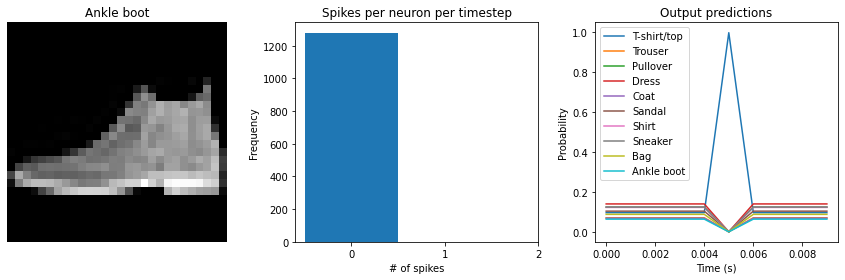

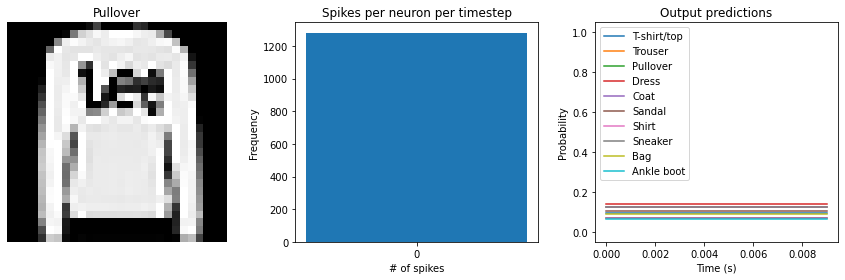

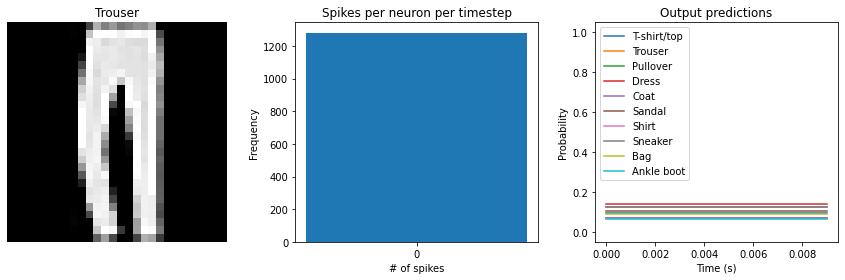

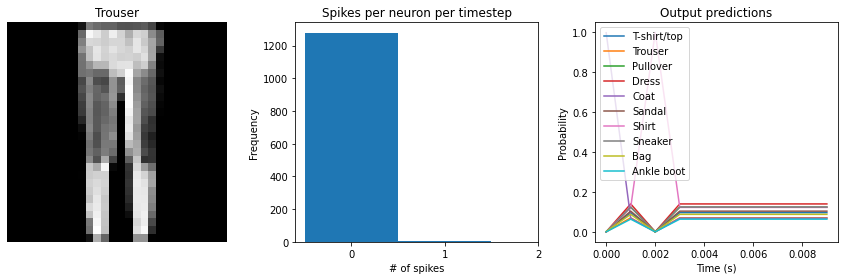

In [7]:
check_output(spiking_model)

We can see an immediate problem: the neurons are hardly spiking at all. The mean number
of spikes we're getting out of each neuron in our SpikingActivation layer is much less
than one, and as a result the output is mostly flat.

To help understand why, we need to think more about the temporal nature of spiking
neurons. Recall that the layer is set up such that if the base activation function were
to be outputting a value of 1, the spiking equivalent would be spiking at 1Hz (i.e.,
emitting one spike per second). In the above example we are simulating for 10 timesteps,
with the default `dt` of 0.001s, so we're simulating a total of 0.01s. If our neurons
aren't spiking very rapidly, and we're only simulating for 0.01s, then it's not
surprising that we aren't getting any spikes in that time window.

We can increase the value of `dt`, effectively running the spiking neurons for longer,
in order to get a more accurate measure of the neuron's output. Basically this allows us
to collect more spikes from each neuron, giving us a better estimate of the neuron's
actual spike rate. We can see how the number of spikes and accuracy change as we
increase `dt`:

Test accuracy: 65.61%
Spike rate per neuron (Hz): min=0.00 mean=0.56 max=20.00


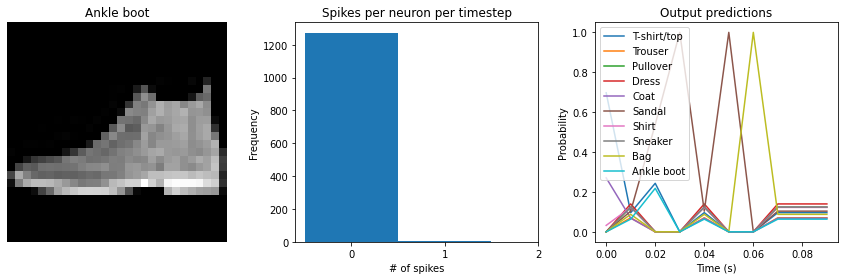

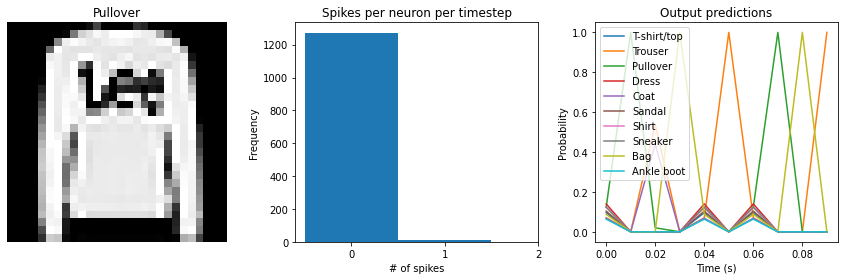

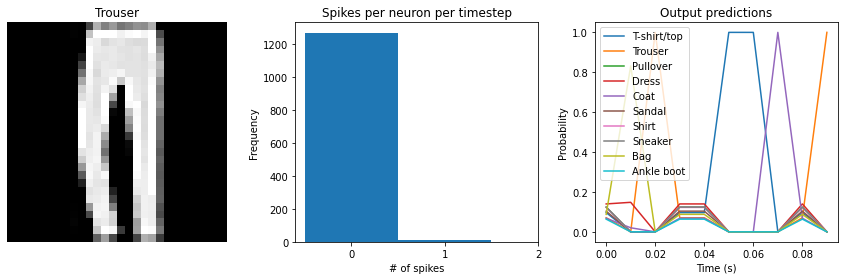

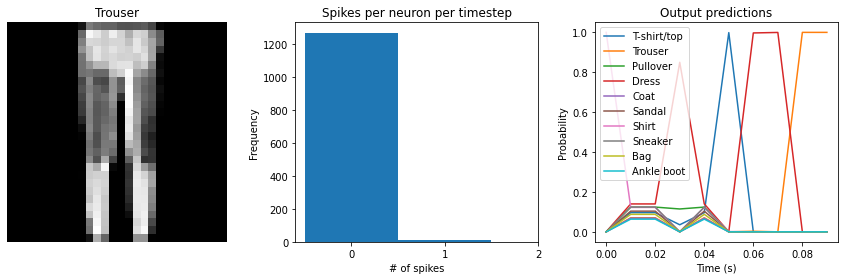

In [8]:
# dt=0.01 * 10 timesteps is equivalent to 0.1s of simulated time
check_output(spiking_model, modify_dt=0.01)

Test accuracy: 88.29%
Spike rate per neuron (Hz): min=0.00 mean=0.56 max=15.00


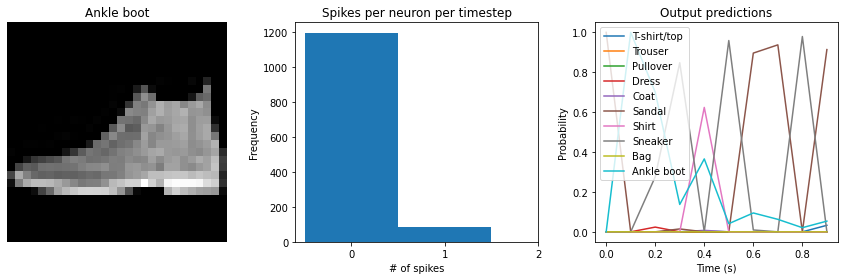

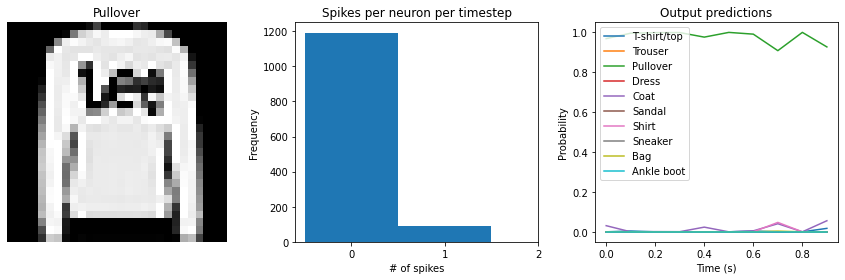

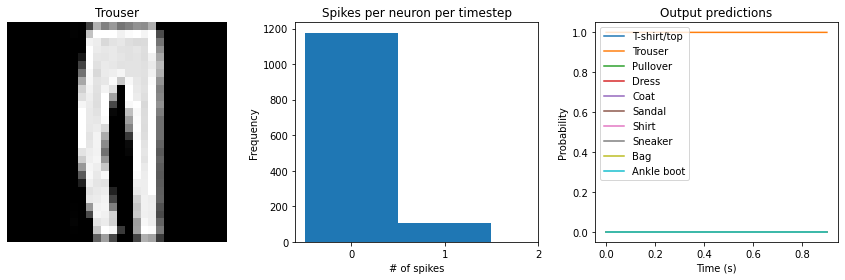

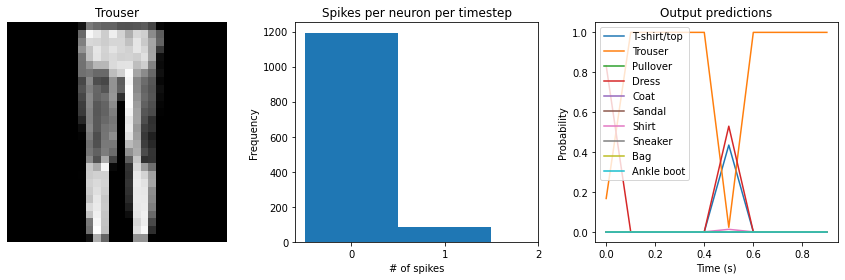

In [9]:
check_output(spiking_model, modify_dt=0.1)

Test accuracy: 88.56%
Spike rate per neuron (Hz): min=0.00 mean=0.56 max=15.60


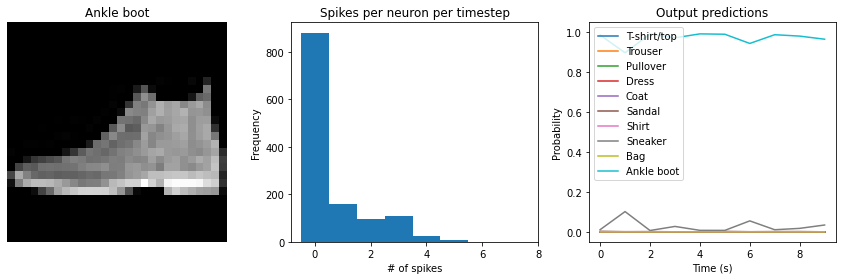

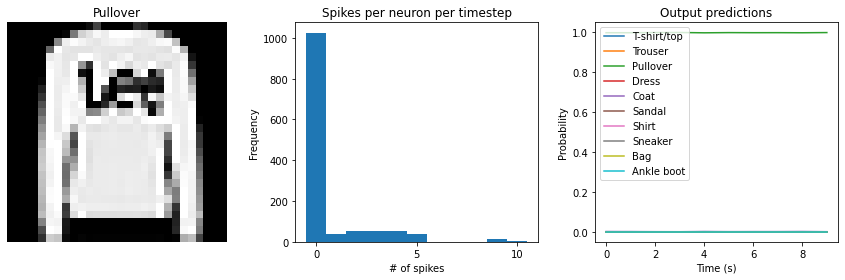

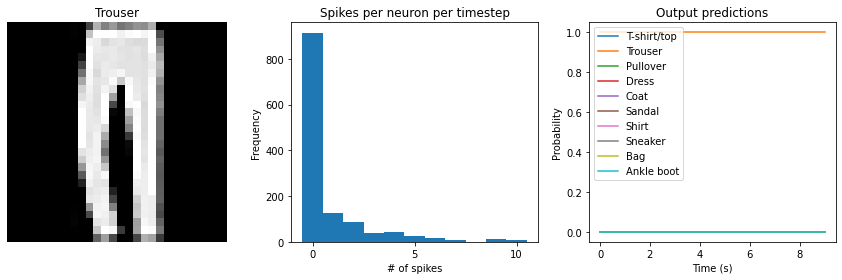

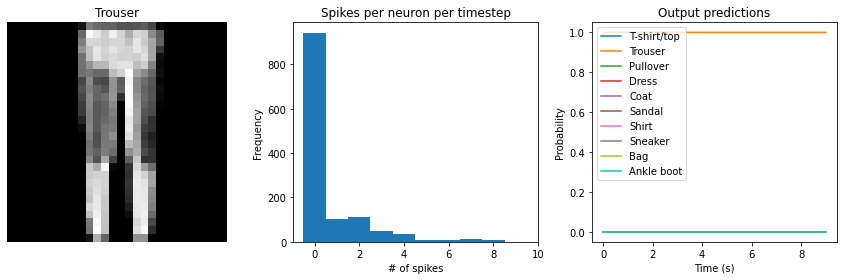

In [10]:
check_output(spiking_model, modify_dt=1)

We can see that as we increase `dt` the performance of the spiking model increasingly
approaches the non-spiking performance. In addition, as `dt` increases, the number of
spikes is increasing. To understand why this improves accuracy, keep in mind that
although the simulated time is increasing, the actual number of timesteps is still 10 in
all cases. We're effectively binning all the spikes that occur on each time step. So as
our bin sizes get larger (increasing `dt`), the spike counts will more closely
approximate the "true" output of the underlying non-spiking activation function.

One might be tempted to simply increase `dt` to a very large value, and thereby always
get great performance. But keep in mind that when we do that we have likely lost any of
the advantages that were motivating us to investigate spiking models in the first place.
For example, one prominent advantage of spiking models is temporal sparsity (we only
need to communicate occasional spikes, rather than continuous values). However, with
large `dt` the neurons are likely spiking every simulation time step (or multiple times
per timestep), so the activity is no longer temporally sparse.

Thus setting `dt` represents a trade-off between accuracy and temporal sparsity.
Choosing the appropriate value will depend on the demands of your application.

In some cases it can be useful to modify `dt` over the course of training. For example,
we could start with a large `dt` and then gradually decrease it over time. See
`keras_spiking.callbacks.DtScheduler` for more details.

## Spiking aware training

As mentioned above, by default SpikingActivation layers will use the non-spiking
activation function during training and the spiking version during inference. However,
similar to the idea of
[quantization aware
training](https://www.tensorflow.org/model_optimization/guide/quantization/training),
often we can improve performance by partially incorporating spiking behaviour during
training. Specifically, we will use the spiking activation on the forward pass, while
still using the non-spiking version on the backwards pass. This allows the model to
learn weights that account for the discrete, temporal nature of the spiking activities.

In [11]:
spikeaware_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # set spiking_aware training and a moderate dt
        keras_spiking.SpikingActivation("relu", dt=0.01, spiking_aware_training=True),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(spikeaware_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 17:18 - loss: 3.7530 - accuracy: 0.0938

  17/1875 [..............................] - ETA: 5s - loss: 3.1958 - accuracy: 0.1737   

  33/1875 [..............................] - ETA: 5s - loss: 3.1017 - accuracy: 0.2077

  49/1875 [..............................] - ETA: 5s - loss: 3.0382 - accuracy: 0.2358

  65/1875 [>.............................] - ETA: 5s - loss: 2.9904 - accuracy: 0.2590

  81/1875 [>.............................] - ETA: 5s - loss: 2.9520 - accuracy: 0.2786

  97/1875 [>.............................] - ETA: 5s - loss: 2.9176 - accuracy: 0.2950

 113/1875 [>.............................] - ETA: 5s - loss: 2.8873 - accuracy: 0.3089

 129/1875 [=>............................] - ETA: 5s - loss: 2.8544 - accuracy: 0.3220

 143/1875 [=>............................] - ETA: 5s - loss: 2.8255 - accuracy: 0.3326

 157/1875 [=>............................] - ETA: 5s - loss: 2.7964 - accuracy: 0.3425

 172/1875 [=>............................] - ETA: 5s - loss: 2.7668 - accuracy: 0.3521

 187/1875 [=>............................] - ETA: 5s - loss: 2.7387 - accuracy: 0.3610

 203/1875 [==>...........................] - ETA: 5s - loss: 2.7103 - accuracy: 0.3696

 219/1875 [==>...........................] - ETA: 5s - loss: 2.6836 - accuracy: 0.3777

 235/1875 [==>...........................] - ETA: 5s - loss: 2.6578 - accuracy: 0.3853

 251/1875 [===>..........................] - ETA: 5s - loss: 2.6329 - accuracy: 0.3924

 267/1875 [===>..........................] - ETA: 5s - loss: 2.6085 - accuracy: 0.3992

 284/1875 [===>..........................] - ETA: 5s - loss: 2.5841 - accuracy: 0.4058

 300/1875 [===>..........................] - ETA: 5s - loss: 2.5617 - accuracy: 0.4117

 316/1875 [====>.........................] - ETA: 5s - loss: 2.5396 - accuracy: 0.4174

 331/1875 [====>.........................] - ETA: 5s - loss: 2.5197 - accuracy: 0.4225

 347/1875 [====>.........................] - ETA: 5s - loss: 2.4990 - accuracy: 0.4275

 363/1875 [====>.........................] - ETA: 4s - loss: 2.4785 - accuracy: 0.4324

 379/1875 [=====>........................] - ETA: 4s - loss: 2.4586 - accuracy: 0.4371

 393/1875 [=====>........................] - ETA: 4s - loss: 2.4417 - accuracy: 0.4410

 409/1875 [=====>........................] - ETA: 4s - loss: 2.4227 - accuracy: 0.4453

 425/1875 [=====>........................] - ETA: 4s - loss: 2.4043 - accuracy: 0.4494

 438/1875 [======>.......................] - ETA: 4s - loss: 2.3898 - accuracy: 0.4526

 453/1875 [======>.......................] - ETA: 4s - loss: 2.3735 - accuracy: 0.4562

 469/1875 [======>.......................] - ETA: 4s - loss: 2.3565 - accuracy: 0.4599

 485/1875 [======>.......................] - ETA: 4s - loss: 2.3399 - accuracy: 0.4634

 501/1875 [=======>......................] - ETA: 4s - loss: 2.3236 - accuracy: 0.4668

 517/1875 [=======>......................] - ETA: 4s - loss: 2.3079 - accuracy: 0.4701

 533/1875 [=======>......................] - ETA: 4s - loss: 2.2926 - accuracy: 0.4732

 549/1875 [=======>......................] - ETA: 4s - loss: 2.2774 - accuracy: 0.4763

 565/1875 [========>.....................] - ETA: 4s - loss: 2.2626 - accuracy: 0.4793

 581/1875 [========>.....................] - ETA: 4s - loss: 2.2482 - accuracy: 0.4822

 597/1875 [========>.....................] - ETA: 4s - loss: 2.2342 - accuracy: 0.4850

 613/1875 [========>.....................] - ETA: 4s - loss: 2.2205 - accuracy: 0.4877

 630/1875 [=========>....................] - ETA: 4s - loss: 2.2062 - accuracy: 0.4904

 646/1875 [=========>....................] - ETA: 4s - loss: 2.1930 - accuracy: 0.4930

 662/1875 [=========>....................] - ETA: 3s - loss: 2.1801 - accuracy: 0.4954

 678/1875 [=========>....................] - ETA: 3s - loss: 2.1675 - accuracy: 0.4978

 695/1875 [==========>...................] - ETA: 3s - loss: 2.1544 - accuracy: 0.5003

 710/1875 [==========>...................] - ETA: 3s - loss: 2.1430 - accuracy: 0.5024

 726/1875 [==========>...................] - ETA: 3s - loss: 2.1311 - accuracy: 0.5046

 742/1875 [==========>...................] - ETA: 3s - loss: 2.1195 - accuracy: 0.5067

 758/1875 [===========>..................] - ETA: 3s - loss: 2.1081 - accuracy: 0.5088

 775/1875 [===========>..................] - ETA: 3s - loss: 2.0962 - accuracy: 0.5109

 792/1875 [===========>..................] - ETA: 3s - loss: 2.0845 - accuracy: 0.5130

 809/1875 [===========>..................] - ETA: 3s - loss: 2.0731 - accuracy: 0.5151

 825/1875 [============>.................] - ETA: 3s - loss: 2.0625 - accuracy: 0.5169

 841/1875 [============>.................] - ETA: 3s - loss: 2.0521 - accuracy: 0.5188

 858/1875 [============>.................] - ETA: 3s - loss: 2.0412 - accuracy: 0.5207

 873/1875 [============>.................] - ETA: 3s - loss: 2.0318 - accuracy: 0.5223

 889/1875 [=============>................] - ETA: 3s - loss: 2.0218 - accuracy: 0.5240

 904/1875 [=============>................] - ETA: 3s - loss: 2.0127 - accuracy: 0.5256

 920/1875 [=============>................] - ETA: 3s - loss: 2.0031 - accuracy: 0.5273

 936/1875 [=============>................] - ETA: 3s - loss: 1.9936 - accuracy: 0.5289

 952/1875 [==============>...............] - ETA: 3s - loss: 1.9842 - accuracy: 0.5305

 969/1875 [==============>...............] - ETA: 2s - loss: 1.9745 - accuracy: 0.5322

 985/1875 [==============>...............] - ETA: 2s - loss: 1.9655 - accuracy: 0.5337

1002/1875 [===============>..............] - ETA: 2s - loss: 1.9560 - accuracy: 0.5353

1018/1875 [===============>..............] - ETA: 2s - loss: 1.9473 - accuracy: 0.5368

1034/1875 [===============>..............] - ETA: 2s - loss: 1.9387 - accuracy: 0.5382

1051/1875 [===============>..............] - ETA: 2s - loss: 1.9297 - accuracy: 0.5398

1067/1875 [================>.............] - ETA: 2s - loss: 1.9213 - accuracy: 0.5412

1083/1875 [================>.............] - ETA: 2s - loss: 1.9131 - accuracy: 0.5426

1100/1875 [================>.............] - ETA: 2s - loss: 1.9044 - accuracy: 0.5440

1116/1875 [================>.............] - ETA: 2s - loss: 1.8964 - accuracy: 0.5453

1132/1875 [=================>............] - ETA: 2s - loss: 1.8885 - accuracy: 0.5467

1148/1875 [=================>............] - ETA: 2s - loss: 1.8807 - accuracy: 0.5480

1164/1875 [=================>............] - ETA: 2s - loss: 1.8730 - accuracy: 0.5492

1180/1875 [=================>............] - ETA: 2s - loss: 1.8655 - accuracy: 0.5505

1196/1875 [==================>...........] - ETA: 2s - loss: 1.8580 - accuracy: 0.5517

1212/1875 [==================>...........] - ETA: 2s - loss: 1.8507 - accuracy: 0.5529

1228/1875 [==================>...........] - ETA: 2s - loss: 1.8434 - accuracy: 0.5541

1244/1875 [==================>...........] - ETA: 2s - loss: 1.8363 - accuracy: 0.5553

1256/1875 [===================>..........] - ETA: 2s - loss: 1.8310 - accuracy: 0.5562

1270/1875 [===================>..........] - ETA: 1s - loss: 1.8248 - accuracy: 0.5572

1285/1875 [===================>..........] - ETA: 1s - loss: 1.8184 - accuracy: 0.5583

1299/1875 [===================>..........] - ETA: 1s - loss: 1.8124 - accuracy: 0.5593

1312/1875 [===================>..........] - ETA: 1s - loss: 1.8069 - accuracy: 0.5602

1326/1875 [====================>.........] - ETA: 1s - loss: 1.8011 - accuracy: 0.5612

1341/1875 [====================>.........] - ETA: 1s - loss: 1.7949 - accuracy: 0.5622

1356/1875 [====================>.........] - ETA: 1s - loss: 1.7888 - accuracy: 0.5632

1371/1875 [====================>.........] - ETA: 1s - loss: 1.7827 - accuracy: 0.5642

1383/1875 [=====================>........] - ETA: 1s - loss: 1.7779 - accuracy: 0.5650

1397/1875 [=====================>........] - ETA: 1s - loss: 1.7724 - accuracy: 0.5659

1413/1875 [=====================>........] - ETA: 1s - loss: 1.7661 - accuracy: 0.5669

1428/1875 [=====================>........] - ETA: 1s - loss: 1.7604 - accuracy: 0.5679

1443/1875 [======================>.......] - ETA: 1s - loss: 1.7547 - accuracy: 0.5688

1459/1875 [======================>.......] - ETA: 1s - loss: 1.7486 - accuracy: 0.5698

1475/1875 [======================>.......] - ETA: 1s - loss: 1.7427 - accuracy: 0.5708

1491/1875 [======================>.......] - ETA: 1s - loss: 1.7368 - accuracy: 0.5717

1507/1875 [=======================>......] - ETA: 1s - loss: 1.7311 - accuracy: 0.5727

1523/1875 [=======================>......] - ETA: 1s - loss: 1.7253 - accuracy: 0.5736

1539/1875 [=======================>......] - ETA: 1s - loss: 1.7197 - accuracy: 0.5745

1555/1875 [=======================>......] - ETA: 1s - loss: 1.7141 - accuracy: 0.5754

1568/1875 [========================>.....] - ETA: 1s - loss: 1.7096 - accuracy: 0.5762

1584/1875 [========================>.....] - ETA: 0s - loss: 1.7041 - accuracy: 0.5771

1600/1875 [========================>.....] - ETA: 0s - loss: 1.6987 - accuracy: 0.5779

1611/1875 [========================>.....] - ETA: 0s - loss: 1.6951 - accuracy: 0.5785

1622/1875 [========================>.....] - ETA: 0s - loss: 1.6914 - accuracy: 0.5791

1638/1875 [=========================>....] - ETA: 0s - loss: 1.6862 - accuracy: 0.5800

1654/1875 [=========================>....] - ETA: 0s - loss: 1.6810 - accuracy: 0.5808

1667/1875 [=========================>....] - ETA: 0s - loss: 1.6768 - accuracy: 0.5815

1682/1875 [=========================>....] - ETA: 0s - loss: 1.6721 - accuracy: 0.5823

1695/1875 [==========================>...] - ETA: 0s - loss: 1.6680 - accuracy: 0.5830

1711/1875 [==========================>...] - ETA: 0s - loss: 1.6630 - accuracy: 0.5838

1727/1875 [==========================>...] - ETA: 0s - loss: 1.6581 - accuracy: 0.5846

1743/1875 [==========================>...] - ETA: 0s - loss: 1.6532 - accuracy: 0.5854

1759/1875 [===========================>..] - ETA: 0s - loss: 1.6484 - accuracy: 0.5862

1775/1875 [===========================>..] - ETA: 0s - loss: 1.6436 - accuracy: 0.5869

1791/1875 [===========================>..] - ETA: 0s - loss: 1.6389 - accuracy: 0.5877

1807/1875 [===========================>..] - ETA: 0s - loss: 1.6342 - accuracy: 0.5885

1823/1875 [============================>.] - ETA: 0s - loss: 1.6296 - accuracy: 0.5892

1839/1875 [============================>.] - ETA: 0s - loss: 1.6251 - accuracy: 0.5900

1855/1875 [============================>.] - ETA: 0s - loss: 1.6205 - accuracy: 0.5907

1872/1875 [============================>.] - ETA: 0s - loss: 1.6158 - accuracy: 0.5915

1875/1875 [==============================] - 7s 3ms/step - loss: 1.6147 - accuracy: 0.5917


Epoch 2/10
   1/1875 [..............................] - ETA: 5s - loss: 0.3898 - accuracy: 0.8438

  17/1875 [..............................] - ETA: 5s - loss: 0.6423 - accuracy: 0.7382

  33/1875 [..............................] - ETA: 5s - loss: 0.6827 - accuracy: 0.7319

  48/1875 [..............................] - ETA: 6s - loss: 0.6965 - accuracy: 0.7310

  64/1875 [>.............................] - ETA: 5s - loss: 0.7004 - accuracy: 0.7337

  80/1875 [>.............................] - ETA: 5s - loss: 0.6979 - accuracy: 0.7379

  95/1875 [>.............................] - ETA: 5s - loss: 0.6937 - accuracy: 0.7416

 111/1875 [>.............................] - ETA: 5s - loss: 0.6910 - accuracy: 0.7442

 127/1875 [=>............................] - ETA: 5s - loss: 0.6887 - accuracy: 0.7460

 144/1875 [=>............................] - ETA: 5s - loss: 0.6879 - accuracy: 0.7474

 160/1875 [=>............................] - ETA: 5s - loss: 0.6874 - accuracy: 0.7485

 177/1875 [=>............................] - ETA: 5s - loss: 0.6872 - accuracy: 0.7492

 193/1875 [==>...........................] - ETA: 5s - loss: 0.6866 - accuracy: 0.7497

 209/1875 [==>...........................] - ETA: 5s - loss: 0.6859 - accuracy: 0.7502

 225/1875 [==>...........................] - ETA: 5s - loss: 0.6852 - accuracy: 0.7507

 240/1875 [==>...........................] - ETA: 5s - loss: 0.6846 - accuracy: 0.7512

 257/1875 [===>..........................] - ETA: 5s - loss: 0.6842 - accuracy: 0.7515

 273/1875 [===>..........................] - ETA: 5s - loss: 0.6837 - accuracy: 0.7519

 289/1875 [===>..........................] - ETA: 5s - loss: 0.6832 - accuracy: 0.7523

 305/1875 [===>..........................] - ETA: 5s - loss: 0.6829 - accuracy: 0.7524

 321/1875 [====>.........................] - ETA: 4s - loss: 0.6827 - accuracy: 0.7526

 338/1875 [====>.........................] - ETA: 4s - loss: 0.6823 - accuracy: 0.7528

 354/1875 [====>.........................] - ETA: 4s - loss: 0.6819 - accuracy: 0.7531

 370/1875 [====>.........................] - ETA: 4s - loss: 0.6816 - accuracy: 0.7533

 386/1875 [=====>........................] - ETA: 4s - loss: 0.6811 - accuracy: 0.7535

 402/1875 [=====>........................] - ETA: 4s - loss: 0.6808 - accuracy: 0.7536

 418/1875 [=====>........................] - ETA: 4s - loss: 0.6804 - accuracy: 0.7538

 434/1875 [=====>........................] - ETA: 4s - loss: 0.6800 - accuracy: 0.7540

 450/1875 [======>.......................] - ETA: 4s - loss: 0.6796 - accuracy: 0.7541

 467/1875 [======>.......................] - ETA: 4s - loss: 0.6792 - accuracy: 0.7543

 483/1875 [======>.......................] - ETA: 4s - loss: 0.6789 - accuracy: 0.7545

 499/1875 [======>.......................] - ETA: 4s - loss: 0.6786 - accuracy: 0.7546

 516/1875 [=======>......................] - ETA: 4s - loss: 0.6783 - accuracy: 0.7547

 532/1875 [=======>......................] - ETA: 4s - loss: 0.6780 - accuracy: 0.7549

 548/1875 [=======>......................] - ETA: 4s - loss: 0.6777 - accuracy: 0.7550

 565/1875 [========>.....................] - ETA: 4s - loss: 0.6774 - accuracy: 0.7551

 581/1875 [========>.....................] - ETA: 4s - loss: 0.6771 - accuracy: 0.7553

 597/1875 [========>.....................] - ETA: 4s - loss: 0.6769 - accuracy: 0.7554

 613/1875 [========>.....................] - ETA: 4s - loss: 0.6766 - accuracy: 0.7555

 627/1875 [=========>....................] - ETA: 4s - loss: 0.6764 - accuracy: 0.7556

 643/1875 [=========>....................] - ETA: 3s - loss: 0.6761 - accuracy: 0.7557

 659/1875 [=========>....................] - ETA: 3s - loss: 0.6758 - accuracy: 0.7558

 674/1875 [=========>....................] - ETA: 3s - loss: 0.6755 - accuracy: 0.7559

 690/1875 [==========>...................] - ETA: 3s - loss: 0.6752 - accuracy: 0.7561

 704/1875 [==========>...................] - ETA: 3s - loss: 0.6748 - accuracy: 0.7562

 720/1875 [==========>...................] - ETA: 3s - loss: 0.6744 - accuracy: 0.7563

 737/1875 [==========>...................] - ETA: 3s - loss: 0.6740 - accuracy: 0.7565

 754/1875 [===========>..................] - ETA: 3s - loss: 0.6736 - accuracy: 0.7566

 770/1875 [===========>..................] - ETA: 3s - loss: 0.6733 - accuracy: 0.7567

 785/1875 [===========>..................] - ETA: 3s - loss: 0.6729 - accuracy: 0.7568

 801/1875 [===========>..................] - ETA: 3s - loss: 0.6725 - accuracy: 0.7570

 817/1875 [============>.................] - ETA: 3s - loss: 0.6722 - accuracy: 0.7571

 834/1875 [============>.................] - ETA: 3s - loss: 0.6718 - accuracy: 0.7572

 850/1875 [============>.................] - ETA: 3s - loss: 0.6715 - accuracy: 0.7573

 867/1875 [============>.................] - ETA: 3s - loss: 0.6712 - accuracy: 0.7574

 884/1875 [=============>................] - ETA: 3s - loss: 0.6709 - accuracy: 0.7575

 901/1875 [=============>................] - ETA: 3s - loss: 0.6706 - accuracy: 0.7577

 918/1875 [=============>................] - ETA: 3s - loss: 0.6702 - accuracy: 0.7578

 934/1875 [=============>................] - ETA: 3s - loss: 0.6699 - accuracy: 0.7579

 950/1875 [==============>...............] - ETA: 2s - loss: 0.6696 - accuracy: 0.7580

 967/1875 [==============>...............] - ETA: 2s - loss: 0.6692 - accuracy: 0.7582

 983/1875 [==============>...............] - ETA: 2s - loss: 0.6689 - accuracy: 0.7583

 999/1875 [==============>...............] - ETA: 2s - loss: 0.6686 - accuracy: 0.7584

1015/1875 [===============>..............] - ETA: 2s - loss: 0.6683 - accuracy: 0.7585

1032/1875 [===============>..............] - ETA: 2s - loss: 0.6680 - accuracy: 0.7587

1048/1875 [===============>..............] - ETA: 2s - loss: 0.6677 - accuracy: 0.7588

1064/1875 [================>.............] - ETA: 2s - loss: 0.6674 - accuracy: 0.7589

1080/1875 [================>.............] - ETA: 2s - loss: 0.6671 - accuracy: 0.7590

1096/1875 [================>.............] - ETA: 2s - loss: 0.6668 - accuracy: 0.7591

1113/1875 [================>.............] - ETA: 2s - loss: 0.6665 - accuracy: 0.7592

1129/1875 [=================>............] - ETA: 2s - loss: 0.6662 - accuracy: 0.7593

1145/1875 [=================>............] - ETA: 2s - loss: 0.6660 - accuracy: 0.7594

1161/1875 [=================>............] - ETA: 2s - loss: 0.6657 - accuracy: 0.7596

1177/1875 [=================>............] - ETA: 2s - loss: 0.6654 - accuracy: 0.7597

1194/1875 [==================>...........] - ETA: 2s - loss: 0.6651 - accuracy: 0.7598

1210/1875 [==================>...........] - ETA: 2s - loss: 0.6649 - accuracy: 0.7599

1227/1875 [==================>...........] - ETA: 2s - loss: 0.6646 - accuracy: 0.7600

1243/1875 [==================>...........] - ETA: 2s - loss: 0.6643 - accuracy: 0.7601

1259/1875 [===================>..........] - ETA: 1s - loss: 0.6640 - accuracy: 0.7602

1276/1875 [===================>..........] - ETA: 1s - loss: 0.6637 - accuracy: 0.7603

1292/1875 [===================>..........] - ETA: 1s - loss: 0.6635 - accuracy: 0.7604

1308/1875 [===================>..........] - ETA: 1s - loss: 0.6632 - accuracy: 0.7605

1324/1875 [====================>.........] - ETA: 1s - loss: 0.6629 - accuracy: 0.7606

1340/1875 [====================>.........] - ETA: 1s - loss: 0.6627 - accuracy: 0.7607

1356/1875 [====================>.........] - ETA: 1s - loss: 0.6624 - accuracy: 0.7608

1371/1875 [====================>.........] - ETA: 1s - loss: 0.6622 - accuracy: 0.7609

1387/1875 [=====================>........] - ETA: 1s - loss: 0.6620 - accuracy: 0.7610

1401/1875 [=====================>........] - ETA: 1s - loss: 0.6617 - accuracy: 0.7611

1416/1875 [=====================>........] - ETA: 1s - loss: 0.6615 - accuracy: 0.7612

1429/1875 [=====================>........] - ETA: 1s - loss: 0.6613 - accuracy: 0.7613

1444/1875 [======================>.......] - ETA: 1s - loss: 0.6611 - accuracy: 0.7614

1460/1875 [======================>.......] - ETA: 1s - loss: 0.6608 - accuracy: 0.7615

1475/1875 [======================>.......] - ETA: 1s - loss: 0.6606 - accuracy: 0.7616

1491/1875 [======================>.......] - ETA: 1s - loss: 0.6603 - accuracy: 0.7617

1507/1875 [=======================>......] - ETA: 1s - loss: 0.6601 - accuracy: 0.7618

1523/1875 [=======================>......] - ETA: 1s - loss: 0.6598 - accuracy: 0.7619

1539/1875 [=======================>......] - ETA: 1s - loss: 0.6596 - accuracy: 0.7620

1555/1875 [=======================>......] - ETA: 1s - loss: 0.6593 - accuracy: 0.7621

1571/1875 [========================>.....] - ETA: 0s - loss: 0.6591 - accuracy: 0.7622

1587/1875 [========================>.....] - ETA: 0s - loss: 0.6588 - accuracy: 0.7623

1603/1875 [========================>.....] - ETA: 0s - loss: 0.6586 - accuracy: 0.7624

1620/1875 [========================>.....] - ETA: 0s - loss: 0.6583 - accuracy: 0.7625

1636/1875 [=========================>....] - ETA: 0s - loss: 0.6581 - accuracy: 0.7626

1652/1875 [=========================>....] - ETA: 0s - loss: 0.6578 - accuracy: 0.7627

1669/1875 [=========================>....] - ETA: 0s - loss: 0.6576 - accuracy: 0.7628

1685/1875 [=========================>....] - ETA: 0s - loss: 0.6573 - accuracy: 0.7629

1701/1875 [==========================>...] - ETA: 0s - loss: 0.6571 - accuracy: 0.7630

1717/1875 [==========================>...] - ETA: 0s - loss: 0.6568 - accuracy: 0.7631

1734/1875 [==========================>...] - ETA: 0s - loss: 0.6566 - accuracy: 0.7632

1750/1875 [===========================>..] - ETA: 0s - loss: 0.6563 - accuracy: 0.7633

1766/1875 [===========================>..] - ETA: 0s - loss: 0.6561 - accuracy: 0.7634

1782/1875 [===========================>..] - ETA: 0s - loss: 0.6558 - accuracy: 0.7635

1798/1875 [===========================>..] - ETA: 0s - loss: 0.6556 - accuracy: 0.7636

1815/1875 [============================>.] - ETA: 0s - loss: 0.6554 - accuracy: 0.7637

1832/1875 [============================>.] - ETA: 0s - loss: 0.6551 - accuracy: 0.7638

1849/1875 [============================>.] - ETA: 0s - loss: 0.6549 - accuracy: 0.7639

1865/1875 [============================>.] - ETA: 0s - loss: 0.6546 - accuracy: 0.7640

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6545 - accuracy: 0.7640


Epoch 3/10
   1/1875 [..............................] - ETA: 6s - loss: 0.5677 - accuracy: 0.8438

  18/1875 [..............................] - ETA: 5s - loss: 0.5624 - accuracy: 0.8073

  34/1875 [..............................] - ETA: 5s - loss: 0.5642 - accuracy: 0.8125

  51/1875 [..............................] - ETA: 5s - loss: 0.5651 - accuracy: 0.8114

  68/1875 [>.............................] - ETA: 5s - loss: 0.5684 - accuracy: 0.8094

  84/1875 [>.............................] - ETA: 5s - loss: 0.5715 - accuracy: 0.8078

 101/1875 [>.............................] - ETA: 5s - loss: 0.5731 - accuracy: 0.8064

 118/1875 [>.............................] - ETA: 5s - loss: 0.5740 - accuracy: 0.8056

 135/1875 [=>............................] - ETA: 5s - loss: 0.5755 - accuracy: 0.8047

 151/1875 [=>............................] - ETA: 5s - loss: 0.5761 - accuracy: 0.8041

 168/1875 [=>............................] - ETA: 5s - loss: 0.5767 - accuracy: 0.8035

 185/1875 [=>............................] - ETA: 5s - loss: 0.5774 - accuracy: 0.8029

 201/1875 [==>...........................] - ETA: 5s - loss: 0.5782 - accuracy: 0.8024

 217/1875 [==>...........................] - ETA: 5s - loss: 0.5786 - accuracy: 0.8019

 233/1875 [==>...........................] - ETA: 5s - loss: 0.5789 - accuracy: 0.8013

 249/1875 [==>...........................] - ETA: 5s - loss: 0.5791 - accuracy: 0.8009

 265/1875 [===>..........................] - ETA: 5s - loss: 0.5794 - accuracy: 0.8004

 281/1875 [===>..........................] - ETA: 4s - loss: 0.5798 - accuracy: 0.7999

 298/1875 [===>..........................] - ETA: 4s - loss: 0.5801 - accuracy: 0.7995

 314/1875 [====>.........................] - ETA: 4s - loss: 0.5805 - accuracy: 0.7991

 331/1875 [====>.........................] - ETA: 4s - loss: 0.5809 - accuracy: 0.7987

 348/1875 [====>.........................] - ETA: 4s - loss: 0.5811 - accuracy: 0.7984

 365/1875 [====>.........................] - ETA: 4s - loss: 0.5814 - accuracy: 0.7981

 382/1875 [=====>........................] - ETA: 4s - loss: 0.5816 - accuracy: 0.7978

 398/1875 [=====>........................] - ETA: 4s - loss: 0.5818 - accuracy: 0.7975

 414/1875 [=====>........................] - ETA: 4s - loss: 0.5820 - accuracy: 0.7972

 431/1875 [=====>........................] - ETA: 4s - loss: 0.5821 - accuracy: 0.7969

 448/1875 [======>.......................] - ETA: 4s - loss: 0.5822 - accuracy: 0.7968

 464/1875 [======>.......................] - ETA: 4s - loss: 0.5821 - accuracy: 0.7966

 479/1875 [======>.......................] - ETA: 4s - loss: 0.5820 - accuracy: 0.7965

 496/1875 [======>.......................] - ETA: 4s - loss: 0.5818 - accuracy: 0.7964

 513/1875 [=======>......................] - ETA: 4s - loss: 0.5816 - accuracy: 0.7964

 529/1875 [=======>......................] - ETA: 4s - loss: 0.5814 - accuracy: 0.7963

 546/1875 [=======>......................] - ETA: 4s - loss: 0.5812 - accuracy: 0.7962

 563/1875 [========>.....................] - ETA: 4s - loss: 0.5810 - accuracy: 0.7962

 579/1875 [========>.....................] - ETA: 4s - loss: 0.5808 - accuracy: 0.7961

 595/1875 [========>.....................] - ETA: 4s - loss: 0.5807 - accuracy: 0.7961

 611/1875 [========>.....................] - ETA: 3s - loss: 0.5805 - accuracy: 0.7961

 627/1875 [=========>....................] - ETA: 3s - loss: 0.5803 - accuracy: 0.7961

 643/1875 [=========>....................] - ETA: 3s - loss: 0.5801 - accuracy: 0.7960

 660/1875 [=========>....................] - ETA: 3s - loss: 0.5800 - accuracy: 0.7960

 676/1875 [=========>....................] - ETA: 3s - loss: 0.5798 - accuracy: 0.7960

 693/1875 [==========>...................] - ETA: 3s - loss: 0.5796 - accuracy: 0.7960

 709/1875 [==========>...................] - ETA: 3s - loss: 0.5795 - accuracy: 0.7960

 725/1875 [==========>...................] - ETA: 3s - loss: 0.5794 - accuracy: 0.7960

 742/1875 [==========>...................] - ETA: 3s - loss: 0.5794 - accuracy: 0.7959

 758/1875 [===========>..................] - ETA: 3s - loss: 0.5792 - accuracy: 0.7959

 775/1875 [===========>..................] - ETA: 3s - loss: 0.5791 - accuracy: 0.7959

 792/1875 [===========>..................] - ETA: 3s - loss: 0.5789 - accuracy: 0.7959

 808/1875 [===========>..................] - ETA: 3s - loss: 0.5788 - accuracy: 0.7960

 825/1875 [============>.................] - ETA: 3s - loss: 0.5786 - accuracy: 0.7960

 841/1875 [============>.................] - ETA: 3s - loss: 0.5784 - accuracy: 0.7960

 858/1875 [============>.................] - ETA: 3s - loss: 0.5783 - accuracy: 0.7960

 875/1875 [=============>................] - ETA: 3s - loss: 0.5781 - accuracy: 0.7960

 891/1875 [=============>................] - ETA: 3s - loss: 0.5780 - accuracy: 0.7960

 908/1875 [=============>................] - ETA: 3s - loss: 0.5778 - accuracy: 0.7960

 924/1875 [=============>................] - ETA: 2s - loss: 0.5776 - accuracy: 0.7960

 941/1875 [==============>...............] - ETA: 2s - loss: 0.5774 - accuracy: 0.7960

 958/1875 [==============>...............] - ETA: 2s - loss: 0.5773 - accuracy: 0.7961

 974/1875 [==============>...............] - ETA: 2s - loss: 0.5771 - accuracy: 0.7961

 988/1875 [==============>...............] - ETA: 2s - loss: 0.5770 - accuracy: 0.7961

1004/1875 [===============>..............] - ETA: 2s - loss: 0.5768 - accuracy: 0.7961

1021/1875 [===============>..............] - ETA: 2s - loss: 0.5766 - accuracy: 0.7962

1038/1875 [===============>..............] - ETA: 2s - loss: 0.5764 - accuracy: 0.7962

1053/1875 [===============>..............] - ETA: 2s - loss: 0.5763 - accuracy: 0.7962

1069/1875 [================>.............] - ETA: 2s - loss: 0.5761 - accuracy: 0.7962

1085/1875 [================>.............] - ETA: 2s - loss: 0.5760 - accuracy: 0.7963

1102/1875 [================>.............] - ETA: 2s - loss: 0.5758 - accuracy: 0.7963

1119/1875 [================>.............] - ETA: 2s - loss: 0.5756 - accuracy: 0.7963

1136/1875 [=================>............] - ETA: 2s - loss: 0.5754 - accuracy: 0.7963

1152/1875 [=================>............] - ETA: 2s - loss: 0.5753 - accuracy: 0.7964

1167/1875 [=================>............] - ETA: 2s - loss: 0.5751 - accuracy: 0.7964

1178/1875 [=================>............] - ETA: 2s - loss: 0.5750 - accuracy: 0.7964

1193/1875 [==================>...........] - ETA: 2s - loss: 0.5749 - accuracy: 0.7964

1209/1875 [==================>...........] - ETA: 2s - loss: 0.5748 - accuracy: 0.7964

1225/1875 [==================>...........] - ETA: 2s - loss: 0.5746 - accuracy: 0.7965

1241/1875 [==================>...........] - ETA: 2s - loss: 0.5744 - accuracy: 0.7965

1257/1875 [===================>..........] - ETA: 1s - loss: 0.5743 - accuracy: 0.7965

1274/1875 [===================>..........] - ETA: 1s - loss: 0.5741 - accuracy: 0.7966

1290/1875 [===================>..........] - ETA: 1s - loss: 0.5740 - accuracy: 0.7966

1307/1875 [===================>..........] - ETA: 1s - loss: 0.5738 - accuracy: 0.7966

1323/1875 [====================>.........] - ETA: 1s - loss: 0.5736 - accuracy: 0.7966

1339/1875 [====================>.........] - ETA: 1s - loss: 0.5734 - accuracy: 0.7967

1352/1875 [====================>.........] - ETA: 1s - loss: 0.5733 - accuracy: 0.7967

1368/1875 [====================>.........] - ETA: 1s - loss: 0.5731 - accuracy: 0.7967

1384/1875 [=====================>........] - ETA: 1s - loss: 0.5730 - accuracy: 0.7968

1399/1875 [=====================>........] - ETA: 1s - loss: 0.5728 - accuracy: 0.7968

1413/1875 [=====================>........] - ETA: 1s - loss: 0.5727 - accuracy: 0.7968

1429/1875 [=====================>........] - ETA: 1s - loss: 0.5726 - accuracy: 0.7968

1444/1875 [======================>.......] - ETA: 1s - loss: 0.5724 - accuracy: 0.7969

1460/1875 [======================>.......] - ETA: 1s - loss: 0.5723 - accuracy: 0.7969

1474/1875 [======================>.......] - ETA: 1s - loss: 0.5722 - accuracy: 0.7969

1487/1875 [======================>.......] - ETA: 1s - loss: 0.5720 - accuracy: 0.7969

1502/1875 [=======================>......] - ETA: 1s - loss: 0.5719 - accuracy: 0.7970

1517/1875 [=======================>......] - ETA: 1s - loss: 0.5718 - accuracy: 0.7970

1533/1875 [=======================>......] - ETA: 1s - loss: 0.5716 - accuracy: 0.7970

1550/1875 [=======================>......] - ETA: 1s - loss: 0.5715 - accuracy: 0.7971

1566/1875 [========================>.....] - ETA: 0s - loss: 0.5713 - accuracy: 0.7971

1582/1875 [========================>.....] - ETA: 0s - loss: 0.5712 - accuracy: 0.7971

1597/1875 [========================>.....] - ETA: 0s - loss: 0.5711 - accuracy: 0.7972

1613/1875 [========================>.....] - ETA: 0s - loss: 0.5709 - accuracy: 0.7972

1628/1875 [=========================>....] - ETA: 0s - loss: 0.5708 - accuracy: 0.7972

1644/1875 [=========================>....] - ETA: 0s - loss: 0.5707 - accuracy: 0.7973

1660/1875 [=========================>....] - ETA: 0s - loss: 0.5706 - accuracy: 0.7973

1676/1875 [=========================>....] - ETA: 0s - loss: 0.5704 - accuracy: 0.7973

1692/1875 [==========================>...] - ETA: 0s - loss: 0.5703 - accuracy: 0.7974

1706/1875 [==========================>...] - ETA: 0s - loss: 0.5702 - accuracy: 0.7974

1721/1875 [==========================>...] - ETA: 0s - loss: 0.5700 - accuracy: 0.7974

1736/1875 [==========================>...] - ETA: 0s - loss: 0.5699 - accuracy: 0.7975

1752/1875 [===========================>..] - ETA: 0s - loss: 0.5698 - accuracy: 0.7975

1768/1875 [===========================>..] - ETA: 0s - loss: 0.5696 - accuracy: 0.7975

1784/1875 [===========================>..] - ETA: 0s - loss: 0.5695 - accuracy: 0.7976

1800/1875 [===========================>..] - ETA: 0s - loss: 0.5694 - accuracy: 0.7976

1816/1875 [============================>.] - ETA: 0s - loss: 0.5692 - accuracy: 0.7976

1831/1875 [============================>.] - ETA: 0s - loss: 0.5691 - accuracy: 0.7977

1847/1875 [============================>.] - ETA: 0s - loss: 0.5689 - accuracy: 0.7977

1863/1875 [============================>.] - ETA: 0s - loss: 0.5688 - accuracy: 0.7977

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5687 - accuracy: 0.7978


Epoch 4/10
   1/1875 [..............................] - ETA: 5s - loss: 0.4740 - accuracy: 0.7812

  17/1875 [..............................] - ETA: 6s - loss: 0.5231 - accuracy: 0.7915

  33/1875 [..............................] - ETA: 5s - loss: 0.5339 - accuracy: 0.7965

  49/1875 [..............................] - ETA: 5s - loss: 0.5412 - accuracy: 0.8002

  65/1875 [>.............................] - ETA: 5s - loss: 0.5450 - accuracy: 0.8011

  82/1875 [>.............................] - ETA: 5s - loss: 0.5460 - accuracy: 0.8015

  98/1875 [>.............................] - ETA: 5s - loss: 0.5474 - accuracy: 0.8011

 114/1875 [>.............................] - ETA: 5s - loss: 0.5474 - accuracy: 0.8013

 130/1875 [=>............................] - ETA: 5s - loss: 0.5469 - accuracy: 0.8019

 146/1875 [=>............................] - ETA: 5s - loss: 0.5469 - accuracy: 0.8023

 162/1875 [=>............................] - ETA: 5s - loss: 0.5468 - accuracy: 0.8025

 178/1875 [=>............................] - ETA: 5s - loss: 0.5468 - accuracy: 0.8028

 194/1875 [==>...........................] - ETA: 5s - loss: 0.5463 - accuracy: 0.8032

 210/1875 [==>...........................] - ETA: 5s - loss: 0.5455 - accuracy: 0.8036

 226/1875 [==>...........................] - ETA: 5s - loss: 0.5447 - accuracy: 0.8039

 242/1875 [==>...........................] - ETA: 5s - loss: 0.5439 - accuracy: 0.8043

 257/1875 [===>..........................] - ETA: 5s - loss: 0.5433 - accuracy: 0.8046

 273/1875 [===>..........................] - ETA: 5s - loss: 0.5425 - accuracy: 0.8051

 289/1875 [===>..........................] - ETA: 5s - loss: 0.5420 - accuracy: 0.8054

 305/1875 [===>..........................] - ETA: 5s - loss: 0.5416 - accuracy: 0.8057

 321/1875 [====>.........................] - ETA: 5s - loss: 0.5412 - accuracy: 0.8060

 338/1875 [====>.........................] - ETA: 4s - loss: 0.5406 - accuracy: 0.8063

 354/1875 [====>.........................] - ETA: 4s - loss: 0.5402 - accuracy: 0.8065

 370/1875 [====>.........................] - ETA: 4s - loss: 0.5397 - accuracy: 0.8067

 386/1875 [=====>........................] - ETA: 4s - loss: 0.5393 - accuracy: 0.8069

 402/1875 [=====>........................] - ETA: 4s - loss: 0.5388 - accuracy: 0.8071

 418/1875 [=====>........................] - ETA: 4s - loss: 0.5383 - accuracy: 0.8073

 433/1875 [=====>........................] - ETA: 4s - loss: 0.5379 - accuracy: 0.8075

 449/1875 [======>.......................] - ETA: 4s - loss: 0.5374 - accuracy: 0.8076

 465/1875 [======>.......................] - ETA: 4s - loss: 0.5370 - accuracy: 0.8078

 479/1875 [======>.......................] - ETA: 4s - loss: 0.5367 - accuracy: 0.8079

 495/1875 [======>.......................] - ETA: 4s - loss: 0.5363 - accuracy: 0.8080

 510/1875 [=======>......................] - ETA: 4s - loss: 0.5359 - accuracy: 0.8081

 526/1875 [=======>......................] - ETA: 4s - loss: 0.5356 - accuracy: 0.8082

 542/1875 [=======>......................] - ETA: 4s - loss: 0.5354 - accuracy: 0.8082

 558/1875 [=======>......................] - ETA: 4s - loss: 0.5351 - accuracy: 0.8083

 574/1875 [========>.....................] - ETA: 4s - loss: 0.5347 - accuracy: 0.8084

 591/1875 [========>.....................] - ETA: 4s - loss: 0.5343 - accuracy: 0.8086

 607/1875 [========>.....................] - ETA: 4s - loss: 0.5340 - accuracy: 0.8087

 624/1875 [========>.....................] - ETA: 4s - loss: 0.5336 - accuracy: 0.8088

 640/1875 [=========>....................] - ETA: 4s - loss: 0.5333 - accuracy: 0.8088

 656/1875 [=========>....................] - ETA: 3s - loss: 0.5330 - accuracy: 0.8089

 672/1875 [=========>....................] - ETA: 3s - loss: 0.5327 - accuracy: 0.8090

 687/1875 [=========>....................] - ETA: 3s - loss: 0.5325 - accuracy: 0.8090

 703/1875 [==========>...................] - ETA: 3s - loss: 0.5323 - accuracy: 0.8091

 719/1875 [==========>...................] - ETA: 3s - loss: 0.5321 - accuracy: 0.8092

 734/1875 [==========>...................] - ETA: 3s - loss: 0.5319 - accuracy: 0.8092

 750/1875 [===========>..................] - ETA: 3s - loss: 0.5316 - accuracy: 0.8093

 765/1875 [===========>..................] - ETA: 3s - loss: 0.5314 - accuracy: 0.8093

 781/1875 [===========>..................] - ETA: 3s - loss: 0.5313 - accuracy: 0.8094

 797/1875 [===========>..................] - ETA: 3s - loss: 0.5311 - accuracy: 0.8094

 812/1875 [===========>..................] - ETA: 3s - loss: 0.5310 - accuracy: 0.8095

 825/1875 [============>.................] - ETA: 3s - loss: 0.5308 - accuracy: 0.8095

 838/1875 [============>.................] - ETA: 3s - loss: 0.5307 - accuracy: 0.8095

 852/1875 [============>.................] - ETA: 3s - loss: 0.5306 - accuracy: 0.8096

 867/1875 [============>.................] - ETA: 3s - loss: 0.5304 - accuracy: 0.8096

 882/1875 [=============>................] - ETA: 3s - loss: 0.5303 - accuracy: 0.8096

 898/1875 [=============>................] - ETA: 3s - loss: 0.5301 - accuracy: 0.8097

 913/1875 [=============>................] - ETA: 3s - loss: 0.5300 - accuracy: 0.8097

 927/1875 [=============>................] - ETA: 3s - loss: 0.5299 - accuracy: 0.8098

 941/1875 [==============>...............] - ETA: 3s - loss: 0.5297 - accuracy: 0.8098

 955/1875 [==============>...............] - ETA: 3s - loss: 0.5296 - accuracy: 0.8098

 969/1875 [==============>...............] - ETA: 3s - loss: 0.5295 - accuracy: 0.8099

 984/1875 [==============>...............] - ETA: 2s - loss: 0.5294 - accuracy: 0.8099

1000/1875 [===============>..............] - ETA: 2s - loss: 0.5292 - accuracy: 0.8100

1015/1875 [===============>..............] - ETA: 2s - loss: 0.5291 - accuracy: 0.8100

1030/1875 [===============>..............] - ETA: 2s - loss: 0.5289 - accuracy: 0.8101

1046/1875 [===============>..............] - ETA: 2s - loss: 0.5288 - accuracy: 0.8101

1062/1875 [===============>..............] - ETA: 2s - loss: 0.5286 - accuracy: 0.8102

1077/1875 [================>.............] - ETA: 2s - loss: 0.5285 - accuracy: 0.8103

1093/1875 [================>.............] - ETA: 2s - loss: 0.5283 - accuracy: 0.8103

1110/1875 [================>.............] - ETA: 2s - loss: 0.5281 - accuracy: 0.8104

1126/1875 [=================>............] - ETA: 2s - loss: 0.5280 - accuracy: 0.8104

1142/1875 [=================>............] - ETA: 2s - loss: 0.5278 - accuracy: 0.8105

1158/1875 [=================>............] - ETA: 2s - loss: 0.5277 - accuracy: 0.8105

1173/1875 [=================>............] - ETA: 2s - loss: 0.5276 - accuracy: 0.8106

1188/1875 [==================>...........] - ETA: 2s - loss: 0.5274 - accuracy: 0.8106

1204/1875 [==================>...........] - ETA: 2s - loss: 0.5272 - accuracy: 0.8107

1219/1875 [==================>...........] - ETA: 2s - loss: 0.5271 - accuracy: 0.8107

1234/1875 [==================>...........] - ETA: 2s - loss: 0.5269 - accuracy: 0.8108

1250/1875 [===================>..........] - ETA: 2s - loss: 0.5268 - accuracy: 0.8109

1266/1875 [===================>..........] - ETA: 2s - loss: 0.5266 - accuracy: 0.8109

1282/1875 [===================>..........] - ETA: 1s - loss: 0.5265 - accuracy: 0.8110

1295/1875 [===================>..........] - ETA: 1s - loss: 0.5263 - accuracy: 0.8110

1309/1875 [===================>..........] - ETA: 1s - loss: 0.5262 - accuracy: 0.8111

1324/1875 [====================>.........] - ETA: 1s - loss: 0.5261 - accuracy: 0.8111

1339/1875 [====================>.........] - ETA: 1s - loss: 0.5259 - accuracy: 0.8112

1354/1875 [====================>.........] - ETA: 1s - loss: 0.5258 - accuracy: 0.8112

1370/1875 [====================>.........] - ETA: 1s - loss: 0.5257 - accuracy: 0.8113

1386/1875 [=====================>........] - ETA: 1s - loss: 0.5255 - accuracy: 0.8113

1401/1875 [=====================>........] - ETA: 1s - loss: 0.5254 - accuracy: 0.8114

1417/1875 [=====================>........] - ETA: 1s - loss: 0.5253 - accuracy: 0.8114

1433/1875 [=====================>........] - ETA: 1s - loss: 0.5251 - accuracy: 0.8115

1449/1875 [======================>.......] - ETA: 1s - loss: 0.5250 - accuracy: 0.8115

1463/1875 [======================>.......] - ETA: 1s - loss: 0.5249 - accuracy: 0.8116

1477/1875 [======================>.......] - ETA: 1s - loss: 0.5248 - accuracy: 0.8116

1491/1875 [======================>.......] - ETA: 1s - loss: 0.5247 - accuracy: 0.8117

1506/1875 [=======================>......] - ETA: 1s - loss: 0.5246 - accuracy: 0.8117

1522/1875 [=======================>......] - ETA: 1s - loss: 0.5245 - accuracy: 0.8118

1537/1875 [=======================>......] - ETA: 1s - loss: 0.5243 - accuracy: 0.8118

1553/1875 [=======================>......] - ETA: 1s - loss: 0.5242 - accuracy: 0.8119

1569/1875 [========================>.....] - ETA: 1s - loss: 0.5241 - accuracy: 0.8119

1582/1875 [========================>.....] - ETA: 0s - loss: 0.5240 - accuracy: 0.8119

1597/1875 [========================>.....] - ETA: 0s - loss: 0.5239 - accuracy: 0.8120

1612/1875 [========================>.....] - ETA: 0s - loss: 0.5238 - accuracy: 0.8120

1628/1875 [=========================>....] - ETA: 0s - loss: 0.5237 - accuracy: 0.8121

1644/1875 [=========================>....] - ETA: 0s - loss: 0.5236 - accuracy: 0.8121

1660/1875 [=========================>....] - ETA: 0s - loss: 0.5235 - accuracy: 0.8121

1676/1875 [=========================>....] - ETA: 0s - loss: 0.5233 - accuracy: 0.8122

1693/1875 [==========================>...] - ETA: 0s - loss: 0.5232 - accuracy: 0.8122

1709/1875 [==========================>...] - ETA: 0s - loss: 0.5231 - accuracy: 0.8123

1725/1875 [==========================>...] - ETA: 0s - loss: 0.5230 - accuracy: 0.8123

1741/1875 [==========================>...] - ETA: 0s - loss: 0.5229 - accuracy: 0.8123

1757/1875 [===========================>..] - ETA: 0s - loss: 0.5228 - accuracy: 0.8124

1772/1875 [===========================>..] - ETA: 0s - loss: 0.5227 - accuracy: 0.8124

1786/1875 [===========================>..] - ETA: 0s - loss: 0.5226 - accuracy: 0.8125

1800/1875 [===========================>..] - ETA: 0s - loss: 0.5226 - accuracy: 0.8125

1815/1875 [============================>.] - ETA: 0s - loss: 0.5225 - accuracy: 0.8125

1828/1875 [============================>.] - ETA: 0s - loss: 0.5224 - accuracy: 0.8126

1842/1875 [============================>.] - ETA: 0s - loss: 0.5223 - accuracy: 0.8126

1857/1875 [============================>.] - ETA: 0s - loss: 0.5222 - accuracy: 0.8126

1873/1875 [============================>.] - ETA: 0s - loss: 0.5221 - accuracy: 0.8127

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5221 - accuracy: 0.8127


Epoch 5/10
   1/1875 [..............................] - ETA: 5s - loss: 0.3638 - accuracy: 0.8750

  18/1875 [..............................] - ETA: 5s - loss: 0.4773 - accuracy: 0.8148

  34/1875 [..............................] - ETA: 5s - loss: 0.4855 - accuracy: 0.8101

  50/1875 [..............................] - ETA: 5s - loss: 0.4914 - accuracy: 0.8079

  65/1875 [>.............................] - ETA: 5s - loss: 0.4930 - accuracy: 0.8080

  80/1875 [>.............................] - ETA: 5s - loss: 0.4940 - accuracy: 0.8078

  93/1875 [>.............................] - ETA: 6s - loss: 0.4934 - accuracy: 0.8082

 106/1875 [>.............................] - ETA: 6s - loss: 0.4939 - accuracy: 0.8085

 122/1875 [>.............................] - ETA: 6s - loss: 0.4945 - accuracy: 0.8091

 137/1875 [=>............................] - ETA: 5s - loss: 0.4951 - accuracy: 0.8098

 149/1875 [=>............................] - ETA: 6s - loss: 0.4951 - accuracy: 0.8102

 165/1875 [=>............................] - ETA: 5s - loss: 0.4954 - accuracy: 0.8107

 181/1875 [=>............................] - ETA: 5s - loss: 0.4952 - accuracy: 0.8113

 192/1875 [==>...........................] - ETA: 6s - loss: 0.4949 - accuracy: 0.8117

 208/1875 [==>...........................] - ETA: 5s - loss: 0.4943 - accuracy: 0.8123

 225/1875 [==>...........................] - ETA: 5s - loss: 0.4935 - accuracy: 0.8130

 239/1875 [==>...........................] - ETA: 5s - loss: 0.4932 - accuracy: 0.8134

 254/1875 [===>..........................] - ETA: 5s - loss: 0.4931 - accuracy: 0.8138

 271/1875 [===>..........................] - ETA: 5s - loss: 0.4930 - accuracy: 0.8141

 287/1875 [===>..........................] - ETA: 5s - loss: 0.4930 - accuracy: 0.8143

 300/1875 [===>..........................] - ETA: 5s - loss: 0.4930 - accuracy: 0.8145

 317/1875 [====>.........................] - ETA: 5s - loss: 0.4930 - accuracy: 0.8146

 333/1875 [====>.........................] - ETA: 5s - loss: 0.4931 - accuracy: 0.8148

 349/1875 [====>.........................] - ETA: 5s - loss: 0.4930 - accuracy: 0.8149

 363/1875 [====>.........................] - ETA: 5s - loss: 0.4930 - accuracy: 0.8151

 379/1875 [=====>........................] - ETA: 5s - loss: 0.4928 - accuracy: 0.8153

 396/1875 [=====>........................] - ETA: 5s - loss: 0.4926 - accuracy: 0.8155

 412/1875 [=====>........................] - ETA: 5s - loss: 0.4924 - accuracy: 0.8157

 428/1875 [=====>........................] - ETA: 4s - loss: 0.4922 - accuracy: 0.8159

 445/1875 [======>.......................] - ETA: 4s - loss: 0.4922 - accuracy: 0.8161

 461/1875 [======>.......................] - ETA: 4s - loss: 0.4921 - accuracy: 0.8162

 474/1875 [======>.......................] - ETA: 4s - loss: 0.4920 - accuracy: 0.8164

 488/1875 [======>.......................] - ETA: 4s - loss: 0.4919 - accuracy: 0.8165

 504/1875 [=======>......................] - ETA: 4s - loss: 0.4917 - accuracy: 0.8167

 521/1875 [=======>......................] - ETA: 4s - loss: 0.4916 - accuracy: 0.8169

 537/1875 [=======>......................] - ETA: 4s - loss: 0.4914 - accuracy: 0.8170

 554/1875 [=======>......................] - ETA: 4s - loss: 0.4913 - accuracy: 0.8171

 570/1875 [========>.....................] - ETA: 4s - loss: 0.4913 - accuracy: 0.8173

 587/1875 [========>.....................] - ETA: 4s - loss: 0.4911 - accuracy: 0.8174

 603/1875 [========>.....................] - ETA: 4s - loss: 0.4910 - accuracy: 0.8175

 620/1875 [========>.....................] - ETA: 4s - loss: 0.4909 - accuracy: 0.8176

 637/1875 [=========>....................] - ETA: 4s - loss: 0.4907 - accuracy: 0.8178

 649/1875 [=========>....................] - ETA: 4s - loss: 0.4905 - accuracy: 0.8179

 665/1875 [=========>....................] - ETA: 4s - loss: 0.4904 - accuracy: 0.8180

 682/1875 [=========>....................] - ETA: 3s - loss: 0.4902 - accuracy: 0.8181

 696/1875 [==========>...................] - ETA: 3s - loss: 0.4901 - accuracy: 0.8182

 712/1875 [==========>...................] - ETA: 3s - loss: 0.4899 - accuracy: 0.8183

 728/1875 [==========>...................] - ETA: 3s - loss: 0.4898 - accuracy: 0.8184

 745/1875 [==========>...................] - ETA: 3s - loss: 0.4896 - accuracy: 0.8186

 761/1875 [===========>..................] - ETA: 3s - loss: 0.4895 - accuracy: 0.8187

 777/1875 [===========>..................] - ETA: 3s - loss: 0.4894 - accuracy: 0.8188

 793/1875 [===========>..................] - ETA: 3s - loss: 0.4893 - accuracy: 0.8188

 809/1875 [===========>..................] - ETA: 3s - loss: 0.4892 - accuracy: 0.8189

 826/1875 [============>.................] - ETA: 3s - loss: 0.4891 - accuracy: 0.8190

 842/1875 [============>.................] - ETA: 3s - loss: 0.4890 - accuracy: 0.8191

 858/1875 [============>.................] - ETA: 3s - loss: 0.4889 - accuracy: 0.8192

 874/1875 [============>.................] - ETA: 3s - loss: 0.4889 - accuracy: 0.8193

 891/1875 [=============>................] - ETA: 3s - loss: 0.4888 - accuracy: 0.8194

 908/1875 [=============>................] - ETA: 3s - loss: 0.4887 - accuracy: 0.8195

 925/1875 [=============>................] - ETA: 3s - loss: 0.4886 - accuracy: 0.8196

 942/1875 [==============>...............] - ETA: 3s - loss: 0.4885 - accuracy: 0.8196

 958/1875 [==============>...............] - ETA: 3s - loss: 0.4885 - accuracy: 0.8197

 975/1875 [==============>...............] - ETA: 2s - loss: 0.4884 - accuracy: 0.8198

 991/1875 [==============>...............] - ETA: 2s - loss: 0.4883 - accuracy: 0.8198

1007/1875 [===============>..............] - ETA: 2s - loss: 0.4883 - accuracy: 0.8199

1024/1875 [===============>..............] - ETA: 2s - loss: 0.4882 - accuracy: 0.8200

1040/1875 [===============>..............] - ETA: 2s - loss: 0.4882 - accuracy: 0.8200

1056/1875 [===============>..............] - ETA: 2s - loss: 0.4881 - accuracy: 0.8201

1073/1875 [================>.............] - ETA: 2s - loss: 0.4881 - accuracy: 0.8202

1090/1875 [================>.............] - ETA: 2s - loss: 0.4880 - accuracy: 0.8202

1106/1875 [================>.............] - ETA: 2s - loss: 0.4880 - accuracy: 0.8203

1122/1875 [================>.............] - ETA: 2s - loss: 0.4879 - accuracy: 0.8203

1138/1875 [=================>............] - ETA: 2s - loss: 0.4879 - accuracy: 0.8204

1154/1875 [=================>............] - ETA: 2s - loss: 0.4879 - accuracy: 0.8205

1170/1875 [=================>............] - ETA: 2s - loss: 0.4878 - accuracy: 0.8205

1186/1875 [=================>............] - ETA: 2s - loss: 0.4878 - accuracy: 0.8206

1202/1875 [==================>...........] - ETA: 2s - loss: 0.4878 - accuracy: 0.8206

1219/1875 [==================>...........] - ETA: 2s - loss: 0.4878 - accuracy: 0.8207

1235/1875 [==================>...........] - ETA: 2s - loss: 0.4877 - accuracy: 0.8207

1251/1875 [===================>..........] - ETA: 2s - loss: 0.4877 - accuracy: 0.8207

1267/1875 [===================>..........] - ETA: 1s - loss: 0.4877 - accuracy: 0.8208

1283/1875 [===================>..........] - ETA: 1s - loss: 0.4877 - accuracy: 0.8208

1300/1875 [===================>..........] - ETA: 1s - loss: 0.4877 - accuracy: 0.8209

1316/1875 [====================>.........] - ETA: 1s - loss: 0.4876 - accuracy: 0.8209

1332/1875 [====================>.........] - ETA: 1s - loss: 0.4876 - accuracy: 0.8210

1349/1875 [====================>.........] - ETA: 1s - loss: 0.4876 - accuracy: 0.8210

1365/1875 [====================>.........] - ETA: 1s - loss: 0.4875 - accuracy: 0.8210

1382/1875 [=====================>........] - ETA: 1s - loss: 0.4875 - accuracy: 0.8211

1398/1875 [=====================>........] - ETA: 1s - loss: 0.4875 - accuracy: 0.8211

1414/1875 [=====================>........] - ETA: 1s - loss: 0.4874 - accuracy: 0.8212

1431/1875 [=====================>........] - ETA: 1s - loss: 0.4874 - accuracy: 0.8212

1447/1875 [======================>.......] - ETA: 1s - loss: 0.4874 - accuracy: 0.8213

1464/1875 [======================>.......] - ETA: 1s - loss: 0.4873 - accuracy: 0.8213

1480/1875 [======================>.......] - ETA: 1s - loss: 0.4873 - accuracy: 0.8213

1496/1875 [======================>.......] - ETA: 1s - loss: 0.4872 - accuracy: 0.8214

1512/1875 [=======================>......] - ETA: 1s - loss: 0.4872 - accuracy: 0.8214

1529/1875 [=======================>......] - ETA: 1s - loss: 0.4872 - accuracy: 0.8215

1545/1875 [=======================>......] - ETA: 1s - loss: 0.4871 - accuracy: 0.8215

1562/1875 [=======================>......] - ETA: 1s - loss: 0.4871 - accuracy: 0.8215

1579/1875 [========================>.....] - ETA: 0s - loss: 0.4871 - accuracy: 0.8216

1595/1875 [========================>.....] - ETA: 0s - loss: 0.4870 - accuracy: 0.8216

1611/1875 [========================>.....] - ETA: 0s - loss: 0.4870 - accuracy: 0.8216

1628/1875 [=========================>....] - ETA: 0s - loss: 0.4869 - accuracy: 0.8217

1645/1875 [=========================>....] - ETA: 0s - loss: 0.4869 - accuracy: 0.8217

1661/1875 [=========================>....] - ETA: 0s - loss: 0.4868 - accuracy: 0.8217

1678/1875 [=========================>....] - ETA: 0s - loss: 0.4868 - accuracy: 0.8218

1694/1875 [==========================>...] - ETA: 0s - loss: 0.4868 - accuracy: 0.8218

1710/1875 [==========================>...] - ETA: 0s - loss: 0.4867 - accuracy: 0.8218

1726/1875 [==========================>...] - ETA: 0s - loss: 0.4867 - accuracy: 0.8219

1742/1875 [==========================>...] - ETA: 0s - loss: 0.4866 - accuracy: 0.8219

1758/1875 [===========================>..] - ETA: 0s - loss: 0.4866 - accuracy: 0.8219

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4865 - accuracy: 0.8220

1790/1875 [===========================>..] - ETA: 0s - loss: 0.4865 - accuracy: 0.8220

1807/1875 [===========================>..] - ETA: 0s - loss: 0.4865 - accuracy: 0.8220

1823/1875 [============================>.] - ETA: 0s - loss: 0.4864 - accuracy: 0.8221

1840/1875 [============================>.] - ETA: 0s - loss: 0.4864 - accuracy: 0.8221

1857/1875 [============================>.] - ETA: 0s - loss: 0.4863 - accuracy: 0.8221

1874/1875 [============================>.] - ETA: 0s - loss: 0.4863 - accuracy: 0.8222

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4863 - accuracy: 0.8222


Epoch 6/10
   1/1875 [..............................] - ETA: 6s - loss: 0.3922 - accuracy: 0.8438

  18/1875 [..............................] - ETA: 5s - loss: 0.4198 - accuracy: 0.8688

  35/1875 [..............................] - ETA: 5s - loss: 0.4479 - accuracy: 0.8593

  51/1875 [..............................] - ETA: 5s - loss: 0.4526 - accuracy: 0.8553

  68/1875 [>.............................] - ETA: 5s - loss: 0.4539 - accuracy: 0.8520

  84/1875 [>.............................] - ETA: 5s - loss: 0.4564 - accuracy: 0.8492

 101/1875 [>.............................] - ETA: 5s - loss: 0.4572 - accuracy: 0.8469

 117/1875 [>.............................] - ETA: 5s - loss: 0.4574 - accuracy: 0.8453

 134/1875 [=>............................] - ETA: 5s - loss: 0.4576 - accuracy: 0.8438

 149/1875 [=>............................] - ETA: 5s - loss: 0.4575 - accuracy: 0.8428

 165/1875 [=>............................] - ETA: 5s - loss: 0.4574 - accuracy: 0.8420

 181/1875 [=>............................] - ETA: 5s - loss: 0.4574 - accuracy: 0.8413

 198/1875 [==>...........................] - ETA: 5s - loss: 0.4579 - accuracy: 0.8406

 212/1875 [==>...........................] - ETA: 5s - loss: 0.4582 - accuracy: 0.8401

 227/1875 [==>...........................] - ETA: 5s - loss: 0.4583 - accuracy: 0.8396

 243/1875 [==>...........................] - ETA: 5s - loss: 0.4583 - accuracy: 0.8392

 259/1875 [===>..........................] - ETA: 5s - loss: 0.4581 - accuracy: 0.8389

 275/1875 [===>..........................] - ETA: 5s - loss: 0.4579 - accuracy: 0.8387

 291/1875 [===>..........................] - ETA: 5s - loss: 0.4577 - accuracy: 0.8385

 307/1875 [===>..........................] - ETA: 5s - loss: 0.4576 - accuracy: 0.8383

 323/1875 [====>.........................] - ETA: 4s - loss: 0.4574 - accuracy: 0.8381

 339/1875 [====>.........................] - ETA: 4s - loss: 0.4574 - accuracy: 0.8379

 355/1875 [====>.........................] - ETA: 4s - loss: 0.4576 - accuracy: 0.8378

 371/1875 [====>.........................] - ETA: 4s - loss: 0.4577 - accuracy: 0.8376

 387/1875 [=====>........................] - ETA: 4s - loss: 0.4580 - accuracy: 0.8373

 404/1875 [=====>........................] - ETA: 4s - loss: 0.4584 - accuracy: 0.8371

 421/1875 [=====>........................] - ETA: 4s - loss: 0.4587 - accuracy: 0.8368

 437/1875 [=====>........................] - ETA: 4s - loss: 0.4589 - accuracy: 0.8366

 454/1875 [======>.......................] - ETA: 4s - loss: 0.4591 - accuracy: 0.8364

 470/1875 [======>.......................] - ETA: 4s - loss: 0.4593 - accuracy: 0.8363

 487/1875 [======>.......................] - ETA: 4s - loss: 0.4594 - accuracy: 0.8361

 499/1875 [======>.......................] - ETA: 4s - loss: 0.4595 - accuracy: 0.8360

 515/1875 [=======>......................] - ETA: 4s - loss: 0.4597 - accuracy: 0.8358

 531/1875 [=======>......................] - ETA: 4s - loss: 0.4599 - accuracy: 0.8357

 545/1875 [=======>......................] - ETA: 4s - loss: 0.4600 - accuracy: 0.8356

 560/1875 [=======>......................] - ETA: 4s - loss: 0.4601 - accuracy: 0.8355

 576/1875 [========>.....................] - ETA: 4s - loss: 0.4603 - accuracy: 0.8353

 592/1875 [========>.....................] - ETA: 4s - loss: 0.4605 - accuracy: 0.8352

 608/1875 [========>.....................] - ETA: 4s - loss: 0.4607 - accuracy: 0.8350

 624/1875 [========>.....................] - ETA: 4s - loss: 0.4609 - accuracy: 0.8349

 637/1875 [=========>....................] - ETA: 3s - loss: 0.4610 - accuracy: 0.8348

 653/1875 [=========>....................] - ETA: 3s - loss: 0.4611 - accuracy: 0.8347

 664/1875 [=========>....................] - ETA: 3s - loss: 0.4613 - accuracy: 0.8346

 679/1875 [=========>....................] - ETA: 3s - loss: 0.4614 - accuracy: 0.8345

 693/1875 [==========>...................] - ETA: 3s - loss: 0.4616 - accuracy: 0.8344

 709/1875 [==========>...................] - ETA: 3s - loss: 0.4617 - accuracy: 0.8344

 724/1875 [==========>...................] - ETA: 3s - loss: 0.4618 - accuracy: 0.8343

 738/1875 [==========>...................] - ETA: 3s - loss: 0.4619 - accuracy: 0.8342

 754/1875 [===========>..................] - ETA: 3s - loss: 0.4620 - accuracy: 0.8341

 770/1875 [===========>..................] - ETA: 3s - loss: 0.4621 - accuracy: 0.8341

 786/1875 [===========>..................] - ETA: 3s - loss: 0.4622 - accuracy: 0.8340

 803/1875 [===========>..................] - ETA: 3s - loss: 0.4622 - accuracy: 0.8340

 819/1875 [============>.................] - ETA: 3s - loss: 0.4622 - accuracy: 0.8339

 836/1875 [============>.................] - ETA: 3s - loss: 0.4623 - accuracy: 0.8339

 853/1875 [============>.................] - ETA: 3s - loss: 0.4623 - accuracy: 0.8339

 870/1875 [============>.................] - ETA: 3s - loss: 0.4622 - accuracy: 0.8339

 886/1875 [=============>................] - ETA: 3s - loss: 0.4622 - accuracy: 0.8339

 903/1875 [=============>................] - ETA: 3s - loss: 0.4622 - accuracy: 0.8339

 920/1875 [=============>................] - ETA: 3s - loss: 0.4622 - accuracy: 0.8339

 937/1875 [=============>................] - ETA: 3s - loss: 0.4622 - accuracy: 0.8339

 954/1875 [==============>...............] - ETA: 2s - loss: 0.4622 - accuracy: 0.8339

 970/1875 [==============>...............] - ETA: 2s - loss: 0.4622 - accuracy: 0.8339

 986/1875 [==============>...............] - ETA: 2s - loss: 0.4622 - accuracy: 0.8339

1002/1875 [===============>..............] - ETA: 2s - loss: 0.4622 - accuracy: 0.8338

1019/1875 [===============>..............] - ETA: 2s - loss: 0.4623 - accuracy: 0.8338

1035/1875 [===============>..............] - ETA: 2s - loss: 0.4623 - accuracy: 0.8338

1051/1875 [===============>..............] - ETA: 2s - loss: 0.4623 - accuracy: 0.8338

1066/1875 [================>.............] - ETA: 2s - loss: 0.4623 - accuracy: 0.8338

1077/1875 [================>.............] - ETA: 2s - loss: 0.4623 - accuracy: 0.8339

1093/1875 [================>.............] - ETA: 2s - loss: 0.4622 - accuracy: 0.8339

1109/1875 [================>.............] - ETA: 2s - loss: 0.4622 - accuracy: 0.8339

1124/1875 [================>.............] - ETA: 2s - loss: 0.4622 - accuracy: 0.8339

1138/1875 [=================>............] - ETA: 2s - loss: 0.4622 - accuracy: 0.8339

1151/1875 [=================>............] - ETA: 2s - loss: 0.4622 - accuracy: 0.8339

1167/1875 [=================>............] - ETA: 2s - loss: 0.4622 - accuracy: 0.8339

1183/1875 [=================>............] - ETA: 2s - loss: 0.4622 - accuracy: 0.8339

1199/1875 [==================>...........] - ETA: 2s - loss: 0.4621 - accuracy: 0.8339

1215/1875 [==================>...........] - ETA: 2s - loss: 0.4621 - accuracy: 0.8339

1231/1875 [==================>...........] - ETA: 2s - loss: 0.4621 - accuracy: 0.8339

1247/1875 [==================>...........] - ETA: 2s - loss: 0.4620 - accuracy: 0.8339

1263/1875 [===================>..........] - ETA: 2s - loss: 0.4620 - accuracy: 0.8339

1279/1875 [===================>..........] - ETA: 1s - loss: 0.4620 - accuracy: 0.8339

1295/1875 [===================>..........] - ETA: 1s - loss: 0.4619 - accuracy: 0.8339

1311/1875 [===================>..........] - ETA: 1s - loss: 0.4619 - accuracy: 0.8339

1328/1875 [====================>.........] - ETA: 1s - loss: 0.4619 - accuracy: 0.8340

1343/1875 [====================>.........] - ETA: 1s - loss: 0.4619 - accuracy: 0.8340

1359/1875 [====================>.........] - ETA: 1s - loss: 0.4618 - accuracy: 0.8340

1375/1875 [=====================>........] - ETA: 1s - loss: 0.4618 - accuracy: 0.8340

1391/1875 [=====================>........] - ETA: 1s - loss: 0.4618 - accuracy: 0.8340

1407/1875 [=====================>........] - ETA: 1s - loss: 0.4618 - accuracy: 0.8340

1423/1875 [=====================>........] - ETA: 1s - loss: 0.4618 - accuracy: 0.8340

1439/1875 [======================>.......] - ETA: 1s - loss: 0.4618 - accuracy: 0.8340

1455/1875 [======================>.......] - ETA: 1s - loss: 0.4618 - accuracy: 0.8340

1472/1875 [======================>.......] - ETA: 1s - loss: 0.4617 - accuracy: 0.8340

1488/1875 [======================>.......] - ETA: 1s - loss: 0.4617 - accuracy: 0.8340

1501/1875 [=======================>......] - ETA: 1s - loss: 0.4617 - accuracy: 0.8340

1512/1875 [=======================>......] - ETA: 1s - loss: 0.4617 - accuracy: 0.8340

1528/1875 [=======================>......] - ETA: 1s - loss: 0.4616 - accuracy: 0.8340

1544/1875 [=======================>......] - ETA: 1s - loss: 0.4616 - accuracy: 0.8340

1558/1875 [=======================>......] - ETA: 1s - loss: 0.4616 - accuracy: 0.8340

1574/1875 [========================>.....] - ETA: 0s - loss: 0.4616 - accuracy: 0.8340

1590/1875 [========================>.....] - ETA: 0s - loss: 0.4615 - accuracy: 0.8340

1606/1875 [========================>.....] - ETA: 0s - loss: 0.4615 - accuracy: 0.8340

1623/1875 [========================>.....] - ETA: 0s - loss: 0.4615 - accuracy: 0.8341

1639/1875 [=========================>....] - ETA: 0s - loss: 0.4614 - accuracy: 0.8341

1656/1875 [=========================>....] - ETA: 0s - loss: 0.4614 - accuracy: 0.8341

1671/1875 [=========================>....] - ETA: 0s - loss: 0.4614 - accuracy: 0.8341

1686/1875 [=========================>....] - ETA: 0s - loss: 0.4613 - accuracy: 0.8341

1702/1875 [==========================>...] - ETA: 0s - loss: 0.4613 - accuracy: 0.8341

1718/1875 [==========================>...] - ETA: 0s - loss: 0.4613 - accuracy: 0.8341

1735/1875 [==========================>...] - ETA: 0s - loss: 0.4613 - accuracy: 0.8341

1751/1875 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.8341

1767/1875 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.8341

1780/1875 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.8341

1787/1875 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.8341

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.8341

1817/1875 [============================>.] - ETA: 0s - loss: 0.4612 - accuracy: 0.8341

1833/1875 [============================>.] - ETA: 0s - loss: 0.4612 - accuracy: 0.8341

1850/1875 [============================>.] - ETA: 0s - loss: 0.4611 - accuracy: 0.8341

1861/1875 [============================>.] - ETA: 0s - loss: 0.4611 - accuracy: 0.8341

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4611 - accuracy: 0.8341


Epoch 7/10
   1/1875 [..............................] - ETA: 8s - loss: 0.3320 - accuracy: 0.9062

  17/1875 [..............................] - ETA: 5s - loss: 0.4306 - accuracy: 0.8683

  34/1875 [..............................] - ETA: 5s - loss: 0.4304 - accuracy: 0.8672

  51/1875 [..............................] - ETA: 5s - loss: 0.4291 - accuracy: 0.8651

  67/1875 [>.............................] - ETA: 5s - loss: 0.4299 - accuracy: 0.8624

  83/1875 [>.............................] - ETA: 5s - loss: 0.4328 - accuracy: 0.8587

  99/1875 [>.............................] - ETA: 5s - loss: 0.4364 - accuracy: 0.8559

 110/1875 [>.............................] - ETA: 5s - loss: 0.4381 - accuracy: 0.8543

 126/1875 [=>............................] - ETA: 5s - loss: 0.4404 - accuracy: 0.8523

 143/1875 [=>............................] - ETA: 5s - loss: 0.4429 - accuracy: 0.8501

 158/1875 [=>............................] - ETA: 5s - loss: 0.4451 - accuracy: 0.8485

 174/1875 [=>............................] - ETA: 5s - loss: 0.4469 - accuracy: 0.8470

 191/1875 [==>...........................] - ETA: 5s - loss: 0.4478 - accuracy: 0.8459

 207/1875 [==>...........................] - ETA: 5s - loss: 0.4481 - accuracy: 0.8451

 224/1875 [==>...........................] - ETA: 5s - loss: 0.4481 - accuracy: 0.8445

 241/1875 [==>...........................] - ETA: 5s - loss: 0.4482 - accuracy: 0.8439

 257/1875 [===>..........................] - ETA: 5s - loss: 0.4484 - accuracy: 0.8433

 273/1875 [===>..........................] - ETA: 5s - loss: 0.4486 - accuracy: 0.8428

 289/1875 [===>..........................] - ETA: 5s - loss: 0.4489 - accuracy: 0.8423

 305/1875 [===>..........................] - ETA: 5s - loss: 0.4491 - accuracy: 0.8419

 319/1875 [====>.........................] - ETA: 5s - loss: 0.4495 - accuracy: 0.8415

 332/1875 [====>.........................] - ETA: 5s - loss: 0.4498 - accuracy: 0.8412

 346/1875 [====>.........................] - ETA: 5s - loss: 0.4500 - accuracy: 0.8409

 361/1875 [====>.........................] - ETA: 4s - loss: 0.4503 - accuracy: 0.8407

 377/1875 [=====>........................] - ETA: 4s - loss: 0.4505 - accuracy: 0.8404

 391/1875 [=====>........................] - ETA: 4s - loss: 0.4506 - accuracy: 0.8402

 400/1875 [=====>........................] - ETA: 4s - loss: 0.4508 - accuracy: 0.8401

 415/1875 [=====>........................] - ETA: 4s - loss: 0.4510 - accuracy: 0.8398

 430/1875 [=====>........................] - ETA: 4s - loss: 0.4511 - accuracy: 0.8396

 446/1875 [======>.......................] - ETA: 4s - loss: 0.4513 - accuracy: 0.8394

 460/1875 [======>.......................] - ETA: 4s - loss: 0.4514 - accuracy: 0.8393

 475/1875 [======>.......................] - ETA: 4s - loss: 0.4514 - accuracy: 0.8391

 490/1875 [======>.......................] - ETA: 4s - loss: 0.4515 - accuracy: 0.8390

 505/1875 [=======>......................] - ETA: 4s - loss: 0.4516 - accuracy: 0.8389

 520/1875 [=======>......................] - ETA: 4s - loss: 0.4517 - accuracy: 0.8387

 536/1875 [=======>......................] - ETA: 4s - loss: 0.4517 - accuracy: 0.8386

 552/1875 [=======>......................] - ETA: 4s - loss: 0.4517 - accuracy: 0.8385

 568/1875 [========>.....................] - ETA: 4s - loss: 0.4517 - accuracy: 0.8385

 584/1875 [========>.....................] - ETA: 4s - loss: 0.4517 - accuracy: 0.8384

 599/1875 [========>.....................] - ETA: 4s - loss: 0.4516 - accuracy: 0.8384

 610/1875 [========>.....................] - ETA: 4s - loss: 0.4516 - accuracy: 0.8383

 619/1875 [========>.....................] - ETA: 4s - loss: 0.4515 - accuracy: 0.8383

 629/1875 [=========>....................] - ETA: 4s - loss: 0.4515 - accuracy: 0.8383

 642/1875 [=========>....................] - ETA: 4s - loss: 0.4514 - accuracy: 0.8383

 659/1875 [=========>....................] - ETA: 4s - loss: 0.4514 - accuracy: 0.8383

 672/1875 [=========>....................] - ETA: 4s - loss: 0.4514 - accuracy: 0.8382

 688/1875 [==========>...................] - ETA: 4s - loss: 0.4513 - accuracy: 0.8382

 704/1875 [==========>...................] - ETA: 4s - loss: 0.4513 - accuracy: 0.8382

 721/1875 [==========>...................] - ETA: 3s - loss: 0.4512 - accuracy: 0.8382

 738/1875 [==========>...................] - ETA: 3s - loss: 0.4511 - accuracy: 0.8382

 754/1875 [===========>..................] - ETA: 3s - loss: 0.4510 - accuracy: 0.8382

 771/1875 [===========>..................] - ETA: 3s - loss: 0.4509 - accuracy: 0.8381

 788/1875 [===========>..................] - ETA: 3s - loss: 0.4508 - accuracy: 0.8381

 805/1875 [===========>..................] - ETA: 3s - loss: 0.4507 - accuracy: 0.8381

 822/1875 [============>.................] - ETA: 3s - loss: 0.4506 - accuracy: 0.8381

 838/1875 [============>.................] - ETA: 3s - loss: 0.4505 - accuracy: 0.8381

 855/1875 [============>.................] - ETA: 3s - loss: 0.4505 - accuracy: 0.8381

 871/1875 [============>.................] - ETA: 3s - loss: 0.4504 - accuracy: 0.8381

 888/1875 [=============>................] - ETA: 3s - loss: 0.4503 - accuracy: 0.8381

 904/1875 [=============>................] - ETA: 3s - loss: 0.4502 - accuracy: 0.8381

 920/1875 [=============>................] - ETA: 3s - loss: 0.4502 - accuracy: 0.8381

 937/1875 [=============>................] - ETA: 3s - loss: 0.4501 - accuracy: 0.8381

 953/1875 [==============>...............] - ETA: 3s - loss: 0.4501 - accuracy: 0.8380

 970/1875 [==============>...............] - ETA: 3s - loss: 0.4500 - accuracy: 0.8381

 986/1875 [==============>...............] - ETA: 2s - loss: 0.4499 - accuracy: 0.8381

1002/1875 [===============>..............] - ETA: 2s - loss: 0.4498 - accuracy: 0.8381

1017/1875 [===============>..............] - ETA: 2s - loss: 0.4497 - accuracy: 0.8381

1034/1875 [===============>..............] - ETA: 2s - loss: 0.4496 - accuracy: 0.8381

1050/1875 [===============>..............] - ETA: 2s - loss: 0.4494 - accuracy: 0.8381

1066/1875 [================>.............] - ETA: 2s - loss: 0.4493 - accuracy: 0.8382

1082/1875 [================>.............] - ETA: 2s - loss: 0.4492 - accuracy: 0.8382

1099/1875 [================>.............] - ETA: 2s - loss: 0.4491 - accuracy: 0.8382

1116/1875 [================>.............] - ETA: 2s - loss: 0.4490 - accuracy: 0.8382

1133/1875 [=================>............] - ETA: 2s - loss: 0.4490 - accuracy: 0.8382

1149/1875 [=================>............] - ETA: 2s - loss: 0.4489 - accuracy: 0.8382

1165/1875 [=================>............] - ETA: 2s - loss: 0.4488 - accuracy: 0.8382

1181/1875 [=================>............] - ETA: 2s - loss: 0.4488 - accuracy: 0.8382

1197/1875 [==================>...........] - ETA: 2s - loss: 0.4487 - accuracy: 0.8383

1213/1875 [==================>...........] - ETA: 2s - loss: 0.4486 - accuracy: 0.8383

1229/1875 [==================>...........] - ETA: 2s - loss: 0.4485 - accuracy: 0.8383

1245/1875 [==================>...........] - ETA: 2s - loss: 0.4484 - accuracy: 0.8383

1261/1875 [===================>..........] - ETA: 2s - loss: 0.4483 - accuracy: 0.8383

1272/1875 [===================>..........] - ETA: 2s - loss: 0.4483 - accuracy: 0.8383

1288/1875 [===================>..........] - ETA: 1s - loss: 0.4482 - accuracy: 0.8384

1303/1875 [===================>..........] - ETA: 1s - loss: 0.4481 - accuracy: 0.8384

1319/1875 [====================>.........] - ETA: 1s - loss: 0.4481 - accuracy: 0.8384

1336/1875 [====================>.........] - ETA: 1s - loss: 0.4480 - accuracy: 0.8384

1352/1875 [====================>.........] - ETA: 1s - loss: 0.4479 - accuracy: 0.8384

1368/1875 [====================>.........] - ETA: 1s - loss: 0.4479 - accuracy: 0.8384

1384/1875 [=====================>........] - ETA: 1s - loss: 0.4478 - accuracy: 0.8384

1401/1875 [=====================>........] - ETA: 1s - loss: 0.4478 - accuracy: 0.8384

1417/1875 [=====================>........] - ETA: 1s - loss: 0.4478 - accuracy: 0.8384

1434/1875 [=====================>........] - ETA: 1s - loss: 0.4477 - accuracy: 0.8384

1447/1875 [======================>.......] - ETA: 1s - loss: 0.4477 - accuracy: 0.8384

1461/1875 [======================>.......] - ETA: 1s - loss: 0.4477 - accuracy: 0.8384

1477/1875 [======================>.......] - ETA: 1s - loss: 0.4476 - accuracy: 0.8384

1494/1875 [======================>.......] - ETA: 1s - loss: 0.4476 - accuracy: 0.8384

1510/1875 [=======================>......] - ETA: 1s - loss: 0.4476 - accuracy: 0.8384

1526/1875 [=======================>......] - ETA: 1s - loss: 0.4476 - accuracy: 0.8384

1542/1875 [=======================>......] - ETA: 1s - loss: 0.4476 - accuracy: 0.8384

1558/1875 [=======================>......] - ETA: 1s - loss: 0.4475 - accuracy: 0.8384

1575/1875 [========================>.....] - ETA: 0s - loss: 0.4475 - accuracy: 0.8384

1591/1875 [========================>.....] - ETA: 0s - loss: 0.4475 - accuracy: 0.8384

1604/1875 [========================>.....] - ETA: 0s - loss: 0.4475 - accuracy: 0.8384

1620/1875 [========================>.....] - ETA: 0s - loss: 0.4474 - accuracy: 0.8384

1636/1875 [=========================>....] - ETA: 0s - loss: 0.4474 - accuracy: 0.8384

1652/1875 [=========================>....] - ETA: 0s - loss: 0.4474 - accuracy: 0.8384

1668/1875 [=========================>....] - ETA: 0s - loss: 0.4474 - accuracy: 0.8384

1684/1875 [=========================>....] - ETA: 0s - loss: 0.4474 - accuracy: 0.8384

1700/1875 [==========================>...] - ETA: 0s - loss: 0.4473 - accuracy: 0.8384

1717/1875 [==========================>...] - ETA: 0s - loss: 0.4473 - accuracy: 0.8384

1733/1875 [==========================>...] - ETA: 0s - loss: 0.4473 - accuracy: 0.8384

1749/1875 [==========================>...] - ETA: 0s - loss: 0.4473 - accuracy: 0.8385

1764/1875 [===========================>..] - ETA: 0s - loss: 0.4472 - accuracy: 0.8385

1780/1875 [===========================>..] - ETA: 0s - loss: 0.4472 - accuracy: 0.8385

1796/1875 [===========================>..] - ETA: 0s - loss: 0.4472 - accuracy: 0.8385

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4472 - accuracy: 0.8385

1828/1875 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.8385

1845/1875 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.8385

1861/1875 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.8385

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4472 - accuracy: 0.8385


Epoch 8/10
   1/1875 [..............................] - ETA: 7s - loss: 0.3368 - accuracy: 0.9062

  18/1875 [..............................] - ETA: 5s - loss: 0.4144 - accuracy: 0.8646

  34/1875 [..............................] - ETA: 5s - loss: 0.4130 - accuracy: 0.8644

  50/1875 [..............................] - ETA: 5s - loss: 0.4146 - accuracy: 0.8610

  66/1875 [>.............................] - ETA: 5s - loss: 0.4137 - accuracy: 0.8584

  82/1875 [>.............................] - ETA: 5s - loss: 0.4137 - accuracy: 0.8562

  97/1875 [>.............................] - ETA: 5s - loss: 0.4152 - accuracy: 0.8542

 113/1875 [>.............................] - ETA: 5s - loss: 0.4161 - accuracy: 0.8525

 129/1875 [=>............................] - ETA: 5s - loss: 0.4163 - accuracy: 0.8514

 144/1875 [=>............................] - ETA: 5s - loss: 0.4173 - accuracy: 0.8503

 160/1875 [=>............................] - ETA: 5s - loss: 0.4187 - accuracy: 0.8493

 176/1875 [=>............................] - ETA: 5s - loss: 0.4194 - accuracy: 0.8485

 192/1875 [==>...........................] - ETA: 5s - loss: 0.4202 - accuracy: 0.8477

 208/1875 [==>...........................] - ETA: 5s - loss: 0.4209 - accuracy: 0.8471

 222/1875 [==>...........................] - ETA: 5s - loss: 0.4214 - accuracy: 0.8467

 238/1875 [==>...........................] - ETA: 5s - loss: 0.4217 - accuracy: 0.8463

 254/1875 [===>..........................] - ETA: 5s - loss: 0.4224 - accuracy: 0.8459

 271/1875 [===>..........................] - ETA: 5s - loss: 0.4231 - accuracy: 0.8455

 288/1875 [===>..........................] - ETA: 5s - loss: 0.4237 - accuracy: 0.8452

 304/1875 [===>..........................] - ETA: 5s - loss: 0.4242 - accuracy: 0.8449

 320/1875 [====>.........................] - ETA: 5s - loss: 0.4247 - accuracy: 0.8446

 336/1875 [====>.........................] - ETA: 4s - loss: 0.4250 - accuracy: 0.8444

 352/1875 [====>.........................] - ETA: 4s - loss: 0.4254 - accuracy: 0.8441

 368/1875 [====>.........................] - ETA: 4s - loss: 0.4259 - accuracy: 0.8439

 384/1875 [=====>........................] - ETA: 4s - loss: 0.4264 - accuracy: 0.8436

 400/1875 [=====>........................] - ETA: 4s - loss: 0.4268 - accuracy: 0.8434

 416/1875 [=====>........................] - ETA: 4s - loss: 0.4272 - accuracy: 0.8432

 432/1875 [=====>........................] - ETA: 4s - loss: 0.4276 - accuracy: 0.8430

 447/1875 [======>.......................] - ETA: 4s - loss: 0.4279 - accuracy: 0.8429

 463/1875 [======>.......................] - ETA: 4s - loss: 0.4282 - accuracy: 0.8428

 480/1875 [======>.......................] - ETA: 4s - loss: 0.4284 - accuracy: 0.8426

 496/1875 [======>.......................] - ETA: 4s - loss: 0.4286 - accuracy: 0.8426

 512/1875 [=======>......................] - ETA: 4s - loss: 0.4288 - accuracy: 0.8425

 528/1875 [=======>......................] - ETA: 4s - loss: 0.4289 - accuracy: 0.8424

 545/1875 [=======>......................] - ETA: 4s - loss: 0.4290 - accuracy: 0.8424

 561/1875 [=======>......................] - ETA: 4s - loss: 0.4291 - accuracy: 0.8423

 578/1875 [========>.....................] - ETA: 4s - loss: 0.4292 - accuracy: 0.8423

 594/1875 [========>.....................] - ETA: 4s - loss: 0.4292 - accuracy: 0.8423

 610/1875 [========>.....................] - ETA: 4s - loss: 0.4293 - accuracy: 0.8423

 626/1875 [=========>....................] - ETA: 3s - loss: 0.4294 - accuracy: 0.8422

 643/1875 [=========>....................] - ETA: 3s - loss: 0.4295 - accuracy: 0.8422

 659/1875 [=========>....................] - ETA: 3s - loss: 0.4296 - accuracy: 0.8422

 675/1875 [=========>....................] - ETA: 3s - loss: 0.4296 - accuracy: 0.8422

 692/1875 [==========>...................] - ETA: 3s - loss: 0.4297 - accuracy: 0.8422

 708/1875 [==========>...................] - ETA: 3s - loss: 0.4298 - accuracy: 0.8422

 724/1875 [==========>...................] - ETA: 3s - loss: 0.4299 - accuracy: 0.8421

 740/1875 [==========>...................] - ETA: 3s - loss: 0.4300 - accuracy: 0.8421

 756/1875 [===========>..................] - ETA: 3s - loss: 0.4301 - accuracy: 0.8421

 772/1875 [===========>..................] - ETA: 3s - loss: 0.4302 - accuracy: 0.8420

 788/1875 [===========>..................] - ETA: 3s - loss: 0.4302 - accuracy: 0.8420

 805/1875 [===========>..................] - ETA: 3s - loss: 0.4303 - accuracy: 0.8420

 821/1875 [============>.................] - ETA: 3s - loss: 0.4304 - accuracy: 0.8420

 837/1875 [============>.................] - ETA: 3s - loss: 0.4305 - accuracy: 0.8420

 853/1875 [============>.................] - ETA: 3s - loss: 0.4305 - accuracy: 0.8420

 867/1875 [============>.................] - ETA: 3s - loss: 0.4306 - accuracy: 0.8419

 884/1875 [=============>................] - ETA: 3s - loss: 0.4307 - accuracy: 0.8419

 900/1875 [=============>................] - ETA: 3s - loss: 0.4308 - accuracy: 0.8419

 916/1875 [=============>................] - ETA: 3s - loss: 0.4308 - accuracy: 0.8419

 933/1875 [=============>................] - ETA: 3s - loss: 0.4309 - accuracy: 0.8419

 944/1875 [==============>...............] - ETA: 2s - loss: 0.4309 - accuracy: 0.8418

 961/1875 [==============>...............] - ETA: 2s - loss: 0.4310 - accuracy: 0.8418

 977/1875 [==============>...............] - ETA: 2s - loss: 0.4311 - accuracy: 0.8418

 992/1875 [==============>...............] - ETA: 2s - loss: 0.4311 - accuracy: 0.8418

1008/1875 [===============>..............] - ETA: 2s - loss: 0.4312 - accuracy: 0.8417

1025/1875 [===============>..............] - ETA: 2s - loss: 0.4313 - accuracy: 0.8417

1042/1875 [===============>..............] - ETA: 2s - loss: 0.4314 - accuracy: 0.8417

1059/1875 [===============>..............] - ETA: 2s - loss: 0.4315 - accuracy: 0.8416

1075/1875 [================>.............] - ETA: 2s - loss: 0.4316 - accuracy: 0.8416

1090/1875 [================>.............] - ETA: 2s - loss: 0.4317 - accuracy: 0.8416

1106/1875 [================>.............] - ETA: 2s - loss: 0.4317 - accuracy: 0.8415

1123/1875 [================>.............] - ETA: 2s - loss: 0.4318 - accuracy: 0.8415

1139/1875 [=================>............] - ETA: 2s - loss: 0.4319 - accuracy: 0.8415

1155/1875 [=================>............] - ETA: 2s - loss: 0.4319 - accuracy: 0.8415

1168/1875 [=================>............] - ETA: 2s - loss: 0.4320 - accuracy: 0.8414

1182/1875 [=================>............] - ETA: 2s - loss: 0.4320 - accuracy: 0.8414

1197/1875 [==================>...........] - ETA: 2s - loss: 0.4321 - accuracy: 0.8414

1214/1875 [==================>...........] - ETA: 2s - loss: 0.4322 - accuracy: 0.8414

1230/1875 [==================>...........] - ETA: 2s - loss: 0.4322 - accuracy: 0.8414

1246/1875 [==================>...........] - ETA: 2s - loss: 0.4323 - accuracy: 0.8413

1262/1875 [===================>..........] - ETA: 1s - loss: 0.4323 - accuracy: 0.8413

1279/1875 [===================>..........] - ETA: 1s - loss: 0.4324 - accuracy: 0.8413

1296/1875 [===================>..........] - ETA: 1s - loss: 0.4325 - accuracy: 0.8413

1312/1875 [===================>..........] - ETA: 1s - loss: 0.4325 - accuracy: 0.8413

1329/1875 [====================>.........] - ETA: 1s - loss: 0.4326 - accuracy: 0.8413

1345/1875 [====================>.........] - ETA: 1s - loss: 0.4326 - accuracy: 0.8413

1361/1875 [====================>.........] - ETA: 1s - loss: 0.4327 - accuracy: 0.8413

1377/1875 [=====================>........] - ETA: 1s - loss: 0.4327 - accuracy: 0.8413

1393/1875 [=====================>........] - ETA: 1s - loss: 0.4327 - accuracy: 0.8413

1409/1875 [=====================>........] - ETA: 1s - loss: 0.4327 - accuracy: 0.8413

1425/1875 [=====================>........] - ETA: 1s - loss: 0.4328 - accuracy: 0.8413

1441/1875 [======================>.......] - ETA: 1s - loss: 0.4328 - accuracy: 0.8413

1457/1875 [======================>.......] - ETA: 1s - loss: 0.4328 - accuracy: 0.8413

1473/1875 [======================>.......] - ETA: 1s - loss: 0.4329 - accuracy: 0.8413

1489/1875 [======================>.......] - ETA: 1s - loss: 0.4329 - accuracy: 0.8413

1505/1875 [=======================>......] - ETA: 1s - loss: 0.4329 - accuracy: 0.8413

1521/1875 [=======================>......] - ETA: 1s - loss: 0.4329 - accuracy: 0.8413

1537/1875 [=======================>......] - ETA: 1s - loss: 0.4329 - accuracy: 0.8413

1554/1875 [=======================>......] - ETA: 1s - loss: 0.4330 - accuracy: 0.8413

1570/1875 [========================>.....] - ETA: 0s - loss: 0.4330 - accuracy: 0.8413

1585/1875 [========================>.....] - ETA: 0s - loss: 0.4330 - accuracy: 0.8413

1601/1875 [========================>.....] - ETA: 0s - loss: 0.4330 - accuracy: 0.8413

1617/1875 [========================>.....] - ETA: 0s - loss: 0.4330 - accuracy: 0.8413

1632/1875 [=========================>....] - ETA: 0s - loss: 0.4330 - accuracy: 0.8414

1649/1875 [=========================>....] - ETA: 0s - loss: 0.4330 - accuracy: 0.8414

1665/1875 [=========================>....] - ETA: 0s - loss: 0.4330 - accuracy: 0.8414

1681/1875 [=========================>....] - ETA: 0s - loss: 0.4330 - accuracy: 0.8414

1697/1875 [==========================>...] - ETA: 0s - loss: 0.4330 - accuracy: 0.8414

1713/1875 [==========================>...] - ETA: 0s - loss: 0.4330 - accuracy: 0.8414

1730/1875 [==========================>...] - ETA: 0s - loss: 0.4330 - accuracy: 0.8414

1746/1875 [==========================>...] - ETA: 0s - loss: 0.4330 - accuracy: 0.8414

1762/1875 [===========================>..] - ETA: 0s - loss: 0.4330 - accuracy: 0.8414

1778/1875 [===========================>..] - ETA: 0s - loss: 0.4329 - accuracy: 0.8414

1794/1875 [===========================>..] - ETA: 0s - loss: 0.4329 - accuracy: 0.8415

1810/1875 [===========================>..] - ETA: 0s - loss: 0.4329 - accuracy: 0.8415

1826/1875 [============================>.] - ETA: 0s - loss: 0.4329 - accuracy: 0.8415

1842/1875 [============================>.] - ETA: 0s - loss: 0.4329 - accuracy: 0.8415

1858/1875 [============================>.] - ETA: 0s - loss: 0.4329 - accuracy: 0.8415

1874/1875 [============================>.] - ETA: 0s - loss: 0.4329 - accuracy: 0.8415

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4329 - accuracy: 0.8415


Epoch 9/10
   1/1875 [..............................] - ETA: 6s - loss: 0.4594 - accuracy: 0.8125

  17/1875 [..............................] - ETA: 5s - loss: 0.3914 - accuracy: 0.8646

  33/1875 [..............................] - ETA: 5s - loss: 0.3893 - accuracy: 0.8627

  49/1875 [..............................] - ETA: 5s - loss: 0.3869 - accuracy: 0.8619

  65/1875 [>.............................] - ETA: 5s - loss: 0.3897 - accuracy: 0.8600

  82/1875 [>.............................] - ETA: 5s - loss: 0.3959 - accuracy: 0.8576

  98/1875 [>.............................] - ETA: 5s - loss: 0.4015 - accuracy: 0.8557

 114/1875 [>.............................] - ETA: 5s - loss: 0.4057 - accuracy: 0.8541

 130/1875 [=>............................] - ETA: 5s - loss: 0.4077 - accuracy: 0.8534

 146/1875 [=>............................] - ETA: 5s - loss: 0.4090 - accuracy: 0.8530

 162/1875 [=>............................] - ETA: 5s - loss: 0.4099 - accuracy: 0.8526

 178/1875 [=>............................] - ETA: 5s - loss: 0.4103 - accuracy: 0.8525

 194/1875 [==>...........................] - ETA: 5s - loss: 0.4108 - accuracy: 0.8523

 211/1875 [==>...........................] - ETA: 5s - loss: 0.4110 - accuracy: 0.8522

 227/1875 [==>...........................] - ETA: 5s - loss: 0.4110 - accuracy: 0.8522

 244/1875 [==>...........................] - ETA: 5s - loss: 0.4110 - accuracy: 0.8522

 261/1875 [===>..........................] - ETA: 5s - loss: 0.4112 - accuracy: 0.8521

 277/1875 [===>..........................] - ETA: 5s - loss: 0.4114 - accuracy: 0.8520

 294/1875 [===>..........................] - ETA: 4s - loss: 0.4120 - accuracy: 0.8518

 310/1875 [===>..........................] - ETA: 4s - loss: 0.4127 - accuracy: 0.8515

 326/1875 [====>.........................] - ETA: 4s - loss: 0.4133 - accuracy: 0.8513

 342/1875 [====>.........................] - ETA: 4s - loss: 0.4138 - accuracy: 0.8511

 359/1875 [====>.........................] - ETA: 4s - loss: 0.4143 - accuracy: 0.8509

 375/1875 [=====>........................] - ETA: 4s - loss: 0.4149 - accuracy: 0.8507

 391/1875 [=====>........................] - ETA: 4s - loss: 0.4153 - accuracy: 0.8505

 407/1875 [=====>........................] - ETA: 4s - loss: 0.4158 - accuracy: 0.8503

 422/1875 [=====>........................] - ETA: 4s - loss: 0.4162 - accuracy: 0.8501

 436/1875 [=====>........................] - ETA: 4s - loss: 0.4165 - accuracy: 0.8500

 451/1875 [======>.......................] - ETA: 4s - loss: 0.4168 - accuracy: 0.8499

 467/1875 [======>.......................] - ETA: 4s - loss: 0.4170 - accuracy: 0.8497

 483/1875 [======>.......................] - ETA: 4s - loss: 0.4172 - accuracy: 0.8496

 500/1875 [=======>......................] - ETA: 4s - loss: 0.4174 - accuracy: 0.8495

 517/1875 [=======>......................] - ETA: 4s - loss: 0.4175 - accuracy: 0.8494

 534/1875 [=======>......................] - ETA: 4s - loss: 0.4176 - accuracy: 0.8493

 550/1875 [=======>......................] - ETA: 4s - loss: 0.4177 - accuracy: 0.8492

 567/1875 [========>.....................] - ETA: 4s - loss: 0.4179 - accuracy: 0.8492

 583/1875 [========>.....................] - ETA: 4s - loss: 0.4179 - accuracy: 0.8491

 600/1875 [========>.....................] - ETA: 4s - loss: 0.4180 - accuracy: 0.8490

 616/1875 [========>.....................] - ETA: 4s - loss: 0.4181 - accuracy: 0.8490

 632/1875 [=========>....................] - ETA: 3s - loss: 0.4182 - accuracy: 0.8489

 648/1875 [=========>....................] - ETA: 3s - loss: 0.4183 - accuracy: 0.8489

 664/1875 [=========>....................] - ETA: 3s - loss: 0.4183 - accuracy: 0.8488

 679/1875 [=========>....................] - ETA: 3s - loss: 0.4184 - accuracy: 0.8488

 695/1875 [==========>...................] - ETA: 3s - loss: 0.4185 - accuracy: 0.8487

 711/1875 [==========>...................] - ETA: 3s - loss: 0.4186 - accuracy: 0.8487

 727/1875 [==========>...................] - ETA: 3s - loss: 0.4186 - accuracy: 0.8486

 743/1875 [==========>...................] - ETA: 3s - loss: 0.4187 - accuracy: 0.8486

 758/1875 [===========>..................] - ETA: 3s - loss: 0.4188 - accuracy: 0.8485

 774/1875 [===========>..................] - ETA: 3s - loss: 0.4189 - accuracy: 0.8485

 791/1875 [===========>..................] - ETA: 3s - loss: 0.4190 - accuracy: 0.8484

 807/1875 [===========>..................] - ETA: 3s - loss: 0.4191 - accuracy: 0.8484

 823/1875 [============>.................] - ETA: 3s - loss: 0.4191 - accuracy: 0.8483

 840/1875 [============>.................] - ETA: 3s - loss: 0.4192 - accuracy: 0.8483

 856/1875 [============>.................] - ETA: 3s - loss: 0.4193 - accuracy: 0.8482

 873/1875 [============>.................] - ETA: 3s - loss: 0.4194 - accuracy: 0.8481

 887/1875 [=============>................] - ETA: 3s - loss: 0.4194 - accuracy: 0.8481

 903/1875 [=============>................] - ETA: 3s - loss: 0.4195 - accuracy: 0.8480

 915/1875 [=============>................] - ETA: 3s - loss: 0.4196 - accuracy: 0.8480

 931/1875 [=============>................] - ETA: 3s - loss: 0.4196 - accuracy: 0.8479

 947/1875 [==============>...............] - ETA: 2s - loss: 0.4197 - accuracy: 0.8479

 963/1875 [==============>...............] - ETA: 2s - loss: 0.4197 - accuracy: 0.8478

 979/1875 [==============>...............] - ETA: 2s - loss: 0.4198 - accuracy: 0.8478

 995/1875 [==============>...............] - ETA: 2s - loss: 0.4199 - accuracy: 0.8477

1011/1875 [===============>..............] - ETA: 2s - loss: 0.4199 - accuracy: 0.8477

1027/1875 [===============>..............] - ETA: 2s - loss: 0.4200 - accuracy: 0.8476

1044/1875 [===============>..............] - ETA: 2s - loss: 0.4201 - accuracy: 0.8476

1060/1875 [===============>..............] - ETA: 2s - loss: 0.4201 - accuracy: 0.8475

1077/1875 [================>.............] - ETA: 2s - loss: 0.4202 - accuracy: 0.8475

1094/1875 [================>.............] - ETA: 2s - loss: 0.4202 - accuracy: 0.8474

1110/1875 [================>.............] - ETA: 2s - loss: 0.4203 - accuracy: 0.8474

1122/1875 [================>.............] - ETA: 2s - loss: 0.4203 - accuracy: 0.8473

1138/1875 [=================>............] - ETA: 2s - loss: 0.4203 - accuracy: 0.8473

1154/1875 [=================>............] - ETA: 2s - loss: 0.4203 - accuracy: 0.8473

1170/1875 [=================>............] - ETA: 2s - loss: 0.4203 - accuracy: 0.8473

1187/1875 [=================>............] - ETA: 2s - loss: 0.4203 - accuracy: 0.8472

1203/1875 [==================>...........] - ETA: 2s - loss: 0.4204 - accuracy: 0.8472

1219/1875 [==================>...........] - ETA: 2s - loss: 0.4204 - accuracy: 0.8472

1236/1875 [==================>...........] - ETA: 2s - loss: 0.4204 - accuracy: 0.8472

1253/1875 [===================>..........] - ETA: 1s - loss: 0.4203 - accuracy: 0.8472

1269/1875 [===================>..........] - ETA: 1s - loss: 0.4203 - accuracy: 0.8471

1285/1875 [===================>..........] - ETA: 1s - loss: 0.4203 - accuracy: 0.8471

1301/1875 [===================>..........] - ETA: 1s - loss: 0.4203 - accuracy: 0.8471

1317/1875 [====================>.........] - ETA: 1s - loss: 0.4203 - accuracy: 0.8471

1334/1875 [====================>.........] - ETA: 1s - loss: 0.4202 - accuracy: 0.8471

1351/1875 [====================>.........] - ETA: 1s - loss: 0.4202 - accuracy: 0.8471

1367/1875 [====================>.........] - ETA: 1s - loss: 0.4201 - accuracy: 0.8471

1382/1875 [=====================>........] - ETA: 1s - loss: 0.4201 - accuracy: 0.8471

1399/1875 [=====================>........] - ETA: 1s - loss: 0.4201 - accuracy: 0.8471

1415/1875 [=====================>........] - ETA: 1s - loss: 0.4201 - accuracy: 0.8471

1430/1875 [=====================>........] - ETA: 1s - loss: 0.4200 - accuracy: 0.8471

1446/1875 [======================>.......] - ETA: 1s - loss: 0.4200 - accuracy: 0.8471

1462/1875 [======================>.......] - ETA: 1s - loss: 0.4200 - accuracy: 0.8471

1479/1875 [======================>.......] - ETA: 1s - loss: 0.4200 - accuracy: 0.8471

1495/1875 [======================>.......] - ETA: 1s - loss: 0.4200 - accuracy: 0.8471

1511/1875 [=======================>......] - ETA: 1s - loss: 0.4199 - accuracy: 0.8471

1528/1875 [=======================>......] - ETA: 1s - loss: 0.4199 - accuracy: 0.8471

1544/1875 [=======================>......] - ETA: 1s - loss: 0.4199 - accuracy: 0.8471

1561/1875 [=======================>......] - ETA: 1s - loss: 0.4199 - accuracy: 0.8470

1578/1875 [========================>.....] - ETA: 0s - loss: 0.4199 - accuracy: 0.8470

1594/1875 [========================>.....] - ETA: 0s - loss: 0.4199 - accuracy: 0.8470

1610/1875 [========================>.....] - ETA: 0s - loss: 0.4199 - accuracy: 0.8470

1627/1875 [=========================>....] - ETA: 0s - loss: 0.4199 - accuracy: 0.8470

1642/1875 [=========================>....] - ETA: 0s - loss: 0.4199 - accuracy: 0.8470

1658/1875 [=========================>....] - ETA: 0s - loss: 0.4199 - accuracy: 0.8470

1674/1875 [=========================>....] - ETA: 0s - loss: 0.4198 - accuracy: 0.8470

1689/1875 [==========================>...] - ETA: 0s - loss: 0.4198 - accuracy: 0.8470

1705/1875 [==========================>...] - ETA: 0s - loss: 0.4198 - accuracy: 0.8470

1720/1875 [==========================>...] - ETA: 0s - loss: 0.4198 - accuracy: 0.8470

1736/1875 [==========================>...] - ETA: 0s - loss: 0.4198 - accuracy: 0.8469

1751/1875 [===========================>..] - ETA: 0s - loss: 0.4198 - accuracy: 0.8469

1768/1875 [===========================>..] - ETA: 0s - loss: 0.4198 - accuracy: 0.8469

1784/1875 [===========================>..] - ETA: 0s - loss: 0.4198 - accuracy: 0.8469

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4198 - accuracy: 0.8469

1817/1875 [============================>.] - ETA: 0s - loss: 0.4198 - accuracy: 0.8469

1833/1875 [============================>.] - ETA: 0s - loss: 0.4198 - accuracy: 0.8469

1849/1875 [============================>.] - ETA: 0s - loss: 0.4198 - accuracy: 0.8469

1866/1875 [============================>.] - ETA: 0s - loss: 0.4198 - accuracy: 0.8469

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4198 - accuracy: 0.8469


Epoch 10/10
   1/1875 [..............................] - ETA: 5s - loss: 0.1213 - accuracy: 0.9375

  17/1875 [..............................] - ETA: 5s - loss: 0.3386 - accuracy: 0.8801

  33/1875 [..............................] - ETA: 5s - loss: 0.3733 - accuracy: 0.8674

  49/1875 [..............................] - ETA: 5s - loss: 0.3870 - accuracy: 0.8607

  66/1875 [>.............................] - ETA: 5s - loss: 0.3956 - accuracy: 0.8571

  82/1875 [>.............................] - ETA: 5s - loss: 0.3996 - accuracy: 0.8549

  98/1875 [>.............................] - ETA: 5s - loss: 0.4012 - accuracy: 0.8539

 114/1875 [>.............................] - ETA: 5s - loss: 0.4016 - accuracy: 0.8535

 131/1875 [=>............................] - ETA: 5s - loss: 0.4022 - accuracy: 0.8530

 147/1875 [=>............................] - ETA: 5s - loss: 0.4028 - accuracy: 0.8526

 164/1875 [=>............................] - ETA: 5s - loss: 0.4032 - accuracy: 0.8522

 180/1875 [=>............................] - ETA: 5s - loss: 0.4035 - accuracy: 0.8521

 196/1875 [==>...........................] - ETA: 5s - loss: 0.4038 - accuracy: 0.8520

 212/1875 [==>...........................] - ETA: 5s - loss: 0.4040 - accuracy: 0.8519

 227/1875 [==>...........................] - ETA: 5s - loss: 0.4041 - accuracy: 0.8518

 242/1875 [==>...........................] - ETA: 5s - loss: 0.4042 - accuracy: 0.8518

 258/1875 [===>..........................] - ETA: 5s - loss: 0.4042 - accuracy: 0.8517

 275/1875 [===>..........................] - ETA: 5s - loss: 0.4043 - accuracy: 0.8516

 291/1875 [===>..........................] - ETA: 5s - loss: 0.4043 - accuracy: 0.8516

 308/1875 [===>..........................] - ETA: 4s - loss: 0.4043 - accuracy: 0.8516

 324/1875 [====>.........................] - ETA: 4s - loss: 0.4043 - accuracy: 0.8516

 340/1875 [====>.........................] - ETA: 4s - loss: 0.4043 - accuracy: 0.8516

 353/1875 [====>.........................] - ETA: 4s - loss: 0.4044 - accuracy: 0.8516

 369/1875 [====>.........................] - ETA: 4s - loss: 0.4046 - accuracy: 0.8515

 386/1875 [=====>........................] - ETA: 4s - loss: 0.4047 - accuracy: 0.8515

 403/1875 [=====>........................] - ETA: 4s - loss: 0.4049 - accuracy: 0.8514

 420/1875 [=====>........................] - ETA: 4s - loss: 0.4051 - accuracy: 0.8514

 436/1875 [=====>........................] - ETA: 4s - loss: 0.4053 - accuracy: 0.8513

 452/1875 [======>.......................] - ETA: 4s - loss: 0.4054 - accuracy: 0.8513

 468/1875 [======>.......................] - ETA: 4s - loss: 0.4054 - accuracy: 0.8513

 485/1875 [======>.......................] - ETA: 4s - loss: 0.4055 - accuracy: 0.8513

 501/1875 [=======>......................] - ETA: 4s - loss: 0.4055 - accuracy: 0.8512

 518/1875 [=======>......................] - ETA: 4s - loss: 0.4055 - accuracy: 0.8513

 535/1875 [=======>......................] - ETA: 4s - loss: 0.4055 - accuracy: 0.8512

 551/1875 [=======>......................] - ETA: 4s - loss: 0.4055 - accuracy: 0.8512

 566/1875 [========>.....................] - ETA: 4s - loss: 0.4055 - accuracy: 0.8512

 582/1875 [========>.....................] - ETA: 4s - loss: 0.4056 - accuracy: 0.8512

 598/1875 [========>.....................] - ETA: 4s - loss: 0.4057 - accuracy: 0.8512

 612/1875 [========>.....................] - ETA: 4s - loss: 0.4058 - accuracy: 0.8512

 619/1875 [========>.....................] - ETA: 4s - loss: 0.4058 - accuracy: 0.8511

 635/1875 [=========>....................] - ETA: 4s - loss: 0.4059 - accuracy: 0.8511

 650/1875 [=========>....................] - ETA: 3s - loss: 0.4060 - accuracy: 0.8511

 666/1875 [=========>....................] - ETA: 3s - loss: 0.4061 - accuracy: 0.8511

 682/1875 [=========>....................] - ETA: 3s - loss: 0.4062 - accuracy: 0.8511

 698/1875 [==========>...................] - ETA: 3s - loss: 0.4063 - accuracy: 0.8511

 715/1875 [==========>...................] - ETA: 3s - loss: 0.4063 - accuracy: 0.8511

 732/1875 [==========>...................] - ETA: 3s - loss: 0.4063 - accuracy: 0.8512

 748/1875 [==========>...................] - ETA: 3s - loss: 0.4063 - accuracy: 0.8512

 765/1875 [===========>..................] - ETA: 3s - loss: 0.4062 - accuracy: 0.8512

 781/1875 [===========>..................] - ETA: 3s - loss: 0.4062 - accuracy: 0.8512

 797/1875 [===========>..................] - ETA: 3s - loss: 0.4063 - accuracy: 0.8513

 810/1875 [===========>..................] - ETA: 3s - loss: 0.4063 - accuracy: 0.8513

 826/1875 [============>.................] - ETA: 3s - loss: 0.4063 - accuracy: 0.8513

 842/1875 [============>.................] - ETA: 3s - loss: 0.4064 - accuracy: 0.8513

 858/1875 [============>.................] - ETA: 3s - loss: 0.4064 - accuracy: 0.8513

 873/1875 [============>.................] - ETA: 3s - loss: 0.4065 - accuracy: 0.8513

 889/1875 [=============>................] - ETA: 3s - loss: 0.4065 - accuracy: 0.8512

 905/1875 [=============>................] - ETA: 3s - loss: 0.4065 - accuracy: 0.8512

 922/1875 [=============>................] - ETA: 3s - loss: 0.4066 - accuracy: 0.8512

 938/1875 [==============>...............] - ETA: 3s - loss: 0.4066 - accuracy: 0.8512

 954/1875 [==============>...............] - ETA: 2s - loss: 0.4066 - accuracy: 0.8512

 970/1875 [==============>...............] - ETA: 2s - loss: 0.4067 - accuracy: 0.8512

 987/1875 [==============>...............] - ETA: 2s - loss: 0.4067 - accuracy: 0.8512

1003/1875 [===============>..............] - ETA: 2s - loss: 0.4068 - accuracy: 0.8512

1019/1875 [===============>..............] - ETA: 2s - loss: 0.4068 - accuracy: 0.8512

1035/1875 [===============>..............] - ETA: 2s - loss: 0.4068 - accuracy: 0.8512

1051/1875 [===============>..............] - ETA: 2s - loss: 0.4069 - accuracy: 0.8512

1068/1875 [================>.............] - ETA: 2s - loss: 0.4069 - accuracy: 0.8512

1084/1875 [================>.............] - ETA: 2s - loss: 0.4069 - accuracy: 0.8512

1100/1875 [================>.............] - ETA: 2s - loss: 0.4069 - accuracy: 0.8512

1115/1875 [================>.............] - ETA: 2s - loss: 0.4069 - accuracy: 0.8512

1131/1875 [=================>............] - ETA: 2s - loss: 0.4069 - accuracy: 0.8512

1147/1875 [=================>............] - ETA: 2s - loss: 0.4070 - accuracy: 0.8512

1163/1875 [=================>............] - ETA: 2s - loss: 0.4070 - accuracy: 0.8512

1179/1875 [=================>............] - ETA: 2s - loss: 0.4071 - accuracy: 0.8511

1195/1875 [==================>...........] - ETA: 2s - loss: 0.4071 - accuracy: 0.8511

1211/1875 [==================>...........] - ETA: 2s - loss: 0.4072 - accuracy: 0.8511

1226/1875 [==================>...........] - ETA: 2s - loss: 0.4072 - accuracy: 0.8511

1242/1875 [==================>...........] - ETA: 2s - loss: 0.4073 - accuracy: 0.8511

1258/1875 [===================>..........] - ETA: 2s - loss: 0.4073 - accuracy: 0.8511

1274/1875 [===================>..........] - ETA: 1s - loss: 0.4073 - accuracy: 0.8510

1290/1875 [===================>..........] - ETA: 1s - loss: 0.4074 - accuracy: 0.8510

1307/1875 [===================>..........] - ETA: 1s - loss: 0.4074 - accuracy: 0.8510

1323/1875 [====================>.........] - ETA: 1s - loss: 0.4074 - accuracy: 0.8510

1339/1875 [====================>.........] - ETA: 1s - loss: 0.4075 - accuracy: 0.8510

1355/1875 [====================>.........] - ETA: 1s - loss: 0.4075 - accuracy: 0.8510

1372/1875 [====================>.........] - ETA: 1s - loss: 0.4075 - accuracy: 0.8510

1389/1875 [=====================>........] - ETA: 1s - loss: 0.4075 - accuracy: 0.8510

1406/1875 [=====================>........] - ETA: 1s - loss: 0.4075 - accuracy: 0.8510

1423/1875 [=====================>........] - ETA: 1s - loss: 0.4075 - accuracy: 0.8510

1438/1875 [======================>.......] - ETA: 1s - loss: 0.4075 - accuracy: 0.8510

1454/1875 [======================>.......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8510

1471/1875 [======================>.......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8510

1487/1875 [======================>.......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8510

1503/1875 [=======================>......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8510

1520/1875 [=======================>......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8510

1536/1875 [=======================>......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8510

1552/1875 [=======================>......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8510

1569/1875 [========================>.....] - ETA: 0s - loss: 0.4077 - accuracy: 0.8510

1586/1875 [========================>.....] - ETA: 0s - loss: 0.4077 - accuracy: 0.8510

1603/1875 [========================>.....] - ETA: 0s - loss: 0.4077 - accuracy: 0.8510

1619/1875 [========================>.....] - ETA: 0s - loss: 0.4077 - accuracy: 0.8510

1635/1875 [=========================>....] - ETA: 0s - loss: 0.4078 - accuracy: 0.8510

1651/1875 [=========================>....] - ETA: 0s - loss: 0.4078 - accuracy: 0.8510

1666/1875 [=========================>....] - ETA: 0s - loss: 0.4078 - accuracy: 0.8510

1683/1875 [=========================>....] - ETA: 0s - loss: 0.4079 - accuracy: 0.8510

1699/1875 [==========================>...] - ETA: 0s - loss: 0.4079 - accuracy: 0.8510

1716/1875 [==========================>...] - ETA: 0s - loss: 0.4079 - accuracy: 0.8510

1732/1875 [==========================>...] - ETA: 0s - loss: 0.4080 - accuracy: 0.8510

1749/1875 [==========================>...] - ETA: 0s - loss: 0.4080 - accuracy: 0.8509

1765/1875 [===========================>..] - ETA: 0s - loss: 0.4081 - accuracy: 0.8509

1781/1875 [===========================>..] - ETA: 0s - loss: 0.4081 - accuracy: 0.8509

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4081 - accuracy: 0.8509

1813/1875 [============================>.] - ETA: 0s - loss: 0.4081 - accuracy: 0.8509

1830/1875 [============================>.] - ETA: 0s - loss: 0.4082 - accuracy: 0.8509

1846/1875 [============================>.] - ETA: 0s - loss: 0.4082 - accuracy: 0.8509

1862/1875 [============================>.] - ETA: 0s - loss: 0.4082 - accuracy: 0.8509

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4082 - accuracy: 0.8509


313/313 - 1s - loss: 0.4491 - accuracy: 0.8428



Test accuracy: 0.8428000211715698


Test accuracy: 84.28%
Spike rate per neuron (Hz): min=0.00 mean=2.74 max=50.00


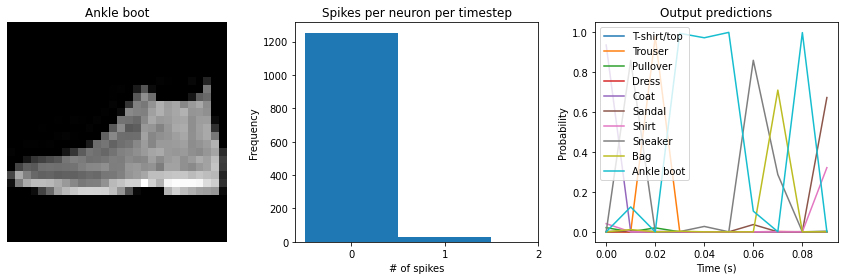

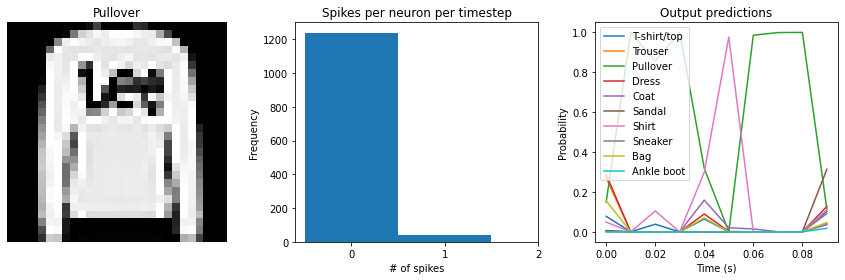

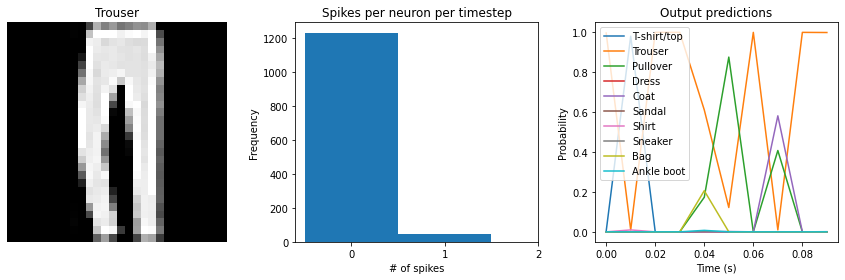

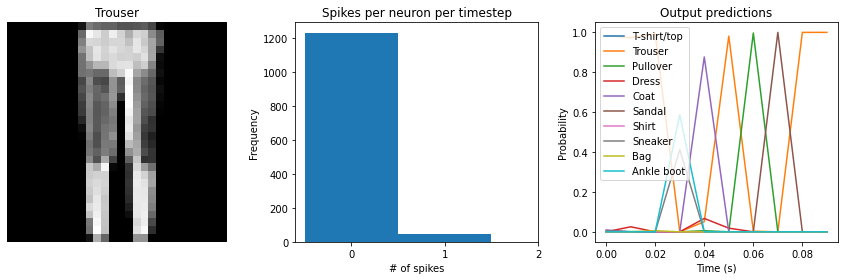

In [12]:
check_output(spikeaware_model)

We can see that with `spiking_aware_training` we're getting better performance than we
were with the equivalent `dt` value above. The model has learned weights that are less
sensitive to the discrete, sparse output produced by the spiking neurons.

## Spike rate regularization

As we saw in the [Simulation time section](#Simulation-time), the spiking rate of the
neurons is very important. If a neuron is spiking too slowly then we don't have enough
information to determine its output value. Conversely, if a neuron is spiking too
quickly then we may lose the spiking advantages we are looking for, such as temporal
sparsity.

Thus it can be helpful to more directly control the firing rates in the model by
applying regularization penalties during training. Any of the standard Keras
regularization functions can be used. KerasSpiking also includes some additional
regularizers that can be useful for this case as they allow us to specify a non-zero
reference point (so we can drive the activities towards some value greater than zero),
or a range of acceptable values.

In [13]:
regularized_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation(
            "relu",
            dt=0.01,
            spiking_aware_training=True,
            # add activity regularizer to encourage spike rates between 10 and 20 Hz
            activity_regularizer=keras_spiking.regularizers.L2(
                l2=1e-4, target=(10, 20)
            ),
        ),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(regularized_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 19:06 - loss: 17.9070 - accuracy: 0.0625

  17/1875 [..............................] - ETA: 6s - loss: 20.3708 - accuracy: 0.1309   

  33/1875 [..............................] - ETA: 6s - loss: 22.6322 - accuracy: 0.1715

  49/1875 [..............................] - ETA: 5s - loss: 24.9621 - accuracy: 0.1963

  65/1875 [>.............................] - ETA: 5s - loss: 27.2869 - accuracy: 0.2148

  80/1875 [>.............................] - ETA: 5s - loss: 29.3871 - accuracy: 0.2302

  95/1875 [>.............................] - ETA: 5s - loss: 31.3955 - accuracy: 0.2439

 111/1875 [>.............................] - ETA: 5s - loss: 33.4107 - accuracy: 0.2570

 127/1875 [=>............................] - ETA: 5s - loss: 35.3013 - accuracy: 0.2695

 143/1875 [=>............................] - ETA: 5s - loss: 37.0685 - accuracy: 0.2814

 159/1875 [=>............................] - ETA: 5s - loss: 38.7208 - accuracy: 0.2922

 175/1875 [=>............................] - ETA: 5s - loss: 40.2860 - accuracy: 0.3020

 191/1875 [==>...........................] - ETA: 5s - loss: 41.7729 - accuracy: 0.3110

 206/1875 [==>...........................] - ETA: 5s - loss: 43.0882 - accuracy: 0.3187

 221/1875 [==>...........................] - ETA: 5s - loss: 44.3253 - accuracy: 0.3259

 237/1875 [==>...........................] - ETA: 5s - loss: 45.5598 - accuracy: 0.3335

 252/1875 [===>..........................] - ETA: 5s - loss: 46.6460 - accuracy: 0.3401

 267/1875 [===>..........................] - ETA: 5s - loss: 47.6761 - accuracy: 0.3464

 283/1875 [===>..........................] - ETA: 5s - loss: 48.7082 - accuracy: 0.3528

 299/1875 [===>..........................] - ETA: 5s - loss: 49.6764 - accuracy: 0.3590

 315/1875 [====>.........................] - ETA: 5s - loss: 50.5952 - accuracy: 0.3648

 331/1875 [====>.........................] - ETA: 5s - loss: 51.4653 - accuracy: 0.3704

 347/1875 [====>.........................] - ETA: 5s - loss: 52.2893 - accuracy: 0.3756

 363/1875 [====>.........................] - ETA: 4s - loss: 53.0719 - accuracy: 0.3806

 379/1875 [=====>........................] - ETA: 4s - loss: 53.8139 - accuracy: 0.3854

 394/1875 [=====>........................] - ETA: 4s - loss: 54.4731 - accuracy: 0.3897

 410/1875 [=====>........................] - ETA: 4s - loss: 55.1405 - accuracy: 0.3941

 425/1875 [=====>........................] - ETA: 4s - loss: 55.7389 - accuracy: 0.3981

 441/1875 [======>.......................] - ETA: 4s - loss: 56.3481 - accuracy: 0.4022

 457/1875 [======>.......................] - ETA: 4s - loss: 56.9289 - accuracy: 0.4062

 473/1875 [======>.......................] - ETA: 4s - loss: 57.4847 - accuracy: 0.4100

 488/1875 [======>.......................] - ETA: 4s - loss: 57.9840 - accuracy: 0.4134

 503/1875 [=======>......................] - ETA: 4s - loss: 58.4630 - accuracy: 0.4167

 518/1875 [=======>......................] - ETA: 4s - loss: 58.9229 - accuracy: 0.4199

 534/1875 [=======>......................] - ETA: 4s - loss: 59.3943 - accuracy: 0.4231

 550/1875 [=======>......................] - ETA: 4s - loss: 59.8468 - accuracy: 0.4263

 566/1875 [========>.....................] - ETA: 4s - loss: 60.2817 - accuracy: 0.4294

 582/1875 [========>.....................] - ETA: 4s - loss: 60.6992 - accuracy: 0.4323

 598/1875 [========>.....................] - ETA: 4s - loss: 61.1014 - accuracy: 0.4352

 614/1875 [========>.....................] - ETA: 4s - loss: 61.4893 - accuracy: 0.4380

 630/1875 [=========>....................] - ETA: 4s - loss: 61.8644 - accuracy: 0.4407

 646/1875 [=========>....................] - ETA: 4s - loss: 62.2261 - accuracy: 0.4433

 662/1875 [=========>....................] - ETA: 3s - loss: 62.5760 - accuracy: 0.4459

 678/1875 [=========>....................] - ETA: 3s - loss: 62.9151 - accuracy: 0.4484

 694/1875 [==========>...................] - ETA: 3s - loss: 63.2434 - accuracy: 0.4508

 710/1875 [==========>...................] - ETA: 3s - loss: 63.5616 - accuracy: 0.4532

 726/1875 [==========>...................] - ETA: 3s - loss: 63.8697 - accuracy: 0.4555

 741/1875 [==========>...................] - ETA: 3s - loss: 64.1486 - accuracy: 0.4576

 757/1875 [===========>..................] - ETA: 3s - loss: 64.4374 - accuracy: 0.4598

 773/1875 [===========>..................] - ETA: 3s - loss: 64.7171 - accuracy: 0.4619

 789/1875 [===========>..................] - ETA: 3s - loss: 64.9880 - accuracy: 0.4639

 805/1875 [===========>..................] - ETA: 3s - loss: 65.2514 - accuracy: 0.4660

 820/1875 [============>.................] - ETA: 3s - loss: 65.4921 - accuracy: 0.4678

 836/1875 [============>.................] - ETA: 3s - loss: 65.7418 - accuracy: 0.4698

 852/1875 [============>.................] - ETA: 3s - loss: 65.9847 - accuracy: 0.4717

 868/1875 [============>.................] - ETA: 3s - loss: 66.2216 - accuracy: 0.4735

 883/1875 [=============>................] - ETA: 3s - loss: 66.4380 - accuracy: 0.4752

 899/1875 [=============>................] - ETA: 3s - loss: 66.6635 - accuracy: 0.4770

 914/1875 [=============>................] - ETA: 3s - loss: 66.8698 - accuracy: 0.4786

 930/1875 [=============>................] - ETA: 3s - loss: 67.0843 - accuracy: 0.4803

 946/1875 [==============>...............] - ETA: 3s - loss: 67.2939 - accuracy: 0.4820

 962/1875 [==============>...............] - ETA: 3s - loss: 67.4984 - accuracy: 0.4836

 978/1875 [==============>...............] - ETA: 2s - loss: 67.6982 - accuracy: 0.4852

 994/1875 [==============>...............] - ETA: 2s - loss: 67.8937 - accuracy: 0.4868

1010/1875 [===============>..............] - ETA: 2s - loss: 68.0844 - accuracy: 0.4883

1025/1875 [===============>..............] - ETA: 2s - loss: 68.2593 - accuracy: 0.4897

1041/1875 [===============>..............] - ETA: 2s - loss: 68.4418 - accuracy: 0.4912

1057/1875 [===============>..............] - ETA: 2s - loss: 68.6199 - accuracy: 0.4926

1073/1875 [================>.............] - ETA: 2s - loss: 68.7941 - accuracy: 0.4941

1089/1875 [================>.............] - ETA: 2s - loss: 68.9646 - accuracy: 0.4955

1104/1875 [================>.............] - ETA: 2s - loss: 69.1214 - accuracy: 0.4968

1120/1875 [================>.............] - ETA: 2s - loss: 69.2852 - accuracy: 0.4981

1135/1875 [=================>............] - ETA: 2s - loss: 69.4358 - accuracy: 0.4994

1151/1875 [=================>............] - ETA: 2s - loss: 69.5931 - accuracy: 0.5007

1167/1875 [=================>............] - ETA: 2s - loss: 69.7474 - accuracy: 0.5020

1182/1875 [=================>............] - ETA: 2s - loss: 69.8892 - accuracy: 0.5032

1197/1875 [==================>...........] - ETA: 2s - loss: 70.0285 - accuracy: 0.5043

1213/1875 [==================>...........] - ETA: 2s - loss: 70.1742 - accuracy: 0.5055

1229/1875 [==================>...........] - ETA: 2s - loss: 70.3171 - accuracy: 0.5068

1245/1875 [==================>...........] - ETA: 2s - loss: 70.4574 - accuracy: 0.5079

1261/1875 [===================>..........] - ETA: 2s - loss: 70.5950 - accuracy: 0.5091

1277/1875 [===================>..........] - ETA: 1s - loss: 70.7300 - accuracy: 0.5103

1293/1875 [===================>..........] - ETA: 1s - loss: 70.8629 - accuracy: 0.5114

1308/1875 [===================>..........] - ETA: 1s - loss: 70.9852 - accuracy: 0.5124

1324/1875 [====================>.........] - ETA: 1s - loss: 71.1135 - accuracy: 0.5135

1340/1875 [====================>.........] - ETA: 1s - loss: 71.2397 - accuracy: 0.5146

1356/1875 [====================>.........] - ETA: 1s - loss: 71.3640 - accuracy: 0.5157

1372/1875 [====================>.........] - ETA: 1s - loss: 71.4863 - accuracy: 0.5168

1388/1875 [=====================>........] - ETA: 1s - loss: 71.6067 - accuracy: 0.5178

1404/1875 [=====================>........] - ETA: 1s - loss: 71.7252 - accuracy: 0.5188

1420/1875 [=====================>........] - ETA: 1s - loss: 71.8419 - accuracy: 0.5198

1436/1875 [=====================>........] - ETA: 1s - loss: 71.9566 - accuracy: 0.5208

1452/1875 [======================>.......] - ETA: 1s - loss: 72.0696 - accuracy: 0.5218

1468/1875 [======================>.......] - ETA: 1s - loss: 72.1807 - accuracy: 0.5227

1480/1875 [======================>.......] - ETA: 1s - loss: 72.2628 - accuracy: 0.5234

1491/1875 [======================>.......] - ETA: 1s - loss: 72.3373 - accuracy: 0.5241

1502/1875 [=======================>......] - ETA: 1s - loss: 72.4110 - accuracy: 0.5247

1518/1875 [=======================>......] - ETA: 1s - loss: 72.5170 - accuracy: 0.5256

1534/1875 [=======================>......] - ETA: 1s - loss: 72.6215 - accuracy: 0.5265

1550/1875 [=======================>......] - ETA: 1s - loss: 72.7245 - accuracy: 0.5274

1566/1875 [========================>.....] - ETA: 1s - loss: 72.8261 - accuracy: 0.5283

1582/1875 [========================>.....] - ETA: 0s - loss: 72.9262 - accuracy: 0.5292

1598/1875 [========================>.....] - ETA: 0s - loss: 73.0247 - accuracy: 0.5301

1614/1875 [========================>.....] - ETA: 0s - loss: 73.1216 - accuracy: 0.5309

1629/1875 [=========================>....] - ETA: 0s - loss: 73.2112 - accuracy: 0.5317

1645/1875 [=========================>....] - ETA: 0s - loss: 73.3053 - accuracy: 0.5325

1661/1875 [=========================>....] - ETA: 0s - loss: 73.3983 - accuracy: 0.5333

1677/1875 [=========================>....] - ETA: 0s - loss: 73.4901 - accuracy: 0.5341

1693/1875 [==========================>...] - ETA: 0s - loss: 73.5808 - accuracy: 0.5349

1709/1875 [==========================>...] - ETA: 0s - loss: 73.6703 - accuracy: 0.5357

1724/1875 [==========================>...] - ETA: 0s - loss: 73.7531 - accuracy: 0.5365

1740/1875 [==========================>...] - ETA: 0s - loss: 73.8402 - accuracy: 0.5372

1756/1875 [===========================>..] - ETA: 0s - loss: 73.9263 - accuracy: 0.5380

1772/1875 [===========================>..] - ETA: 0s - loss: 74.0112 - accuracy: 0.5387

1788/1875 [===========================>..] - ETA: 0s - loss: 74.0949 - accuracy: 0.5395

1804/1875 [===========================>..] - ETA: 0s - loss: 74.1777 - accuracy: 0.5402

1820/1875 [============================>.] - ETA: 0s - loss: 74.2594 - accuracy: 0.5410

1836/1875 [============================>.] - ETA: 0s - loss: 74.3401 - accuracy: 0.5417

1852/1875 [============================>.] - ETA: 0s - loss: 74.4197 - accuracy: 0.5424

1868/1875 [============================>.] - ETA: 0s - loss: 74.4982 - accuracy: 0.5431

1875/1875 [==============================] - 7s 3ms/step - loss: 74.5371 - accuracy: 0.5434


Epoch 2/10
   1/1875 [..............................] - ETA: 6s - loss: 85.1012 - accuracy: 0.6875

  17/1875 [..............................] - ETA: 5s - loss: 89.5537 - accuracy: 0.6522

  33/1875 [..............................] - ETA: 5s - loss: 89.2407 - accuracy: 0.6562

  48/1875 [..............................] - ETA: 6s - loss: 89.0072 - accuracy: 0.6571

  64/1875 [>.............................] - ETA: 5s - loss: 88.9111 - accuracy: 0.6605

  80/1875 [>.............................] - ETA: 5s - loss: 88.8924 - accuracy: 0.6638

  96/1875 [>.............................] - ETA: 5s - loss: 88.8338 - accuracy: 0.6667

 112/1875 [>.............................] - ETA: 5s - loss: 88.8178 - accuracy: 0.6691

 128/1875 [=>............................] - ETA: 5s - loss: 88.8062 - accuracy: 0.6705

 144/1875 [=>............................] - ETA: 5s - loss: 88.7935 - accuracy: 0.6711

 160/1875 [=>............................] - ETA: 5s - loss: 88.7911 - accuracy: 0.6716

 176/1875 [=>............................] - ETA: 5s - loss: 88.7786 - accuracy: 0.6722

 191/1875 [==>...........................] - ETA: 5s - loss: 88.7620 - accuracy: 0.6726

 207/1875 [==>...........................] - ETA: 5s - loss: 88.7640 - accuracy: 0.6728

 223/1875 [==>...........................] - ETA: 5s - loss: 88.7679 - accuracy: 0.6730

 239/1875 [==>...........................] - ETA: 5s - loss: 88.7654 - accuracy: 0.6732

 255/1875 [===>..........................] - ETA: 5s - loss: 88.7635 - accuracy: 0.6733

 271/1875 [===>..........................] - ETA: 5s - loss: 88.7628 - accuracy: 0.6735

 287/1875 [===>..........................] - ETA: 5s - loss: 88.7600 - accuracy: 0.6737

 303/1875 [===>..........................] - ETA: 5s - loss: 88.7593 - accuracy: 0.6738

 318/1875 [====>.........................] - ETA: 5s - loss: 88.7596 - accuracy: 0.6737

 333/1875 [====>.........................] - ETA: 5s - loss: 88.7605 - accuracy: 0.6738

 349/1875 [====>.........................] - ETA: 4s - loss: 88.7597 - accuracy: 0.6738

 365/1875 [====>.........................] - ETA: 4s - loss: 88.7563 - accuracy: 0.6740

 380/1875 [=====>........................] - ETA: 4s - loss: 88.7544 - accuracy: 0.6742

 396/1875 [=====>........................] - ETA: 4s - loss: 88.7527 - accuracy: 0.6744

 412/1875 [=====>........................] - ETA: 4s - loss: 88.7513 - accuracy: 0.6746

 428/1875 [=====>........................] - ETA: 4s - loss: 88.7499 - accuracy: 0.6747

 444/1875 [======>.......................] - ETA: 4s - loss: 88.7482 - accuracy: 0.6748

 460/1875 [======>.......................] - ETA: 4s - loss: 88.7475 - accuracy: 0.6750

 476/1875 [======>.......................] - ETA: 4s - loss: 88.7473 - accuracy: 0.6752

 492/1875 [======>.......................] - ETA: 4s - loss: 88.7475 - accuracy: 0.6754

 508/1875 [=======>......................] - ETA: 4s - loss: 88.7473 - accuracy: 0.6756

 524/1875 [=======>......................] - ETA: 4s - loss: 88.7482 - accuracy: 0.6757

 539/1875 [=======>......................] - ETA: 4s - loss: 88.7484 - accuracy: 0.6759

 555/1875 [=======>......................] - ETA: 4s - loss: 88.7488 - accuracy: 0.6760

 571/1875 [========>.....................] - ETA: 4s - loss: 88.7494 - accuracy: 0.6762

 587/1875 [========>.....................] - ETA: 4s - loss: 88.7519 - accuracy: 0.6763

 603/1875 [========>.....................] - ETA: 4s - loss: 88.7542 - accuracy: 0.6765

 619/1875 [========>.....................] - ETA: 4s - loss: 88.7556 - accuracy: 0.6767

 635/1875 [=========>....................] - ETA: 4s - loss: 88.7559 - accuracy: 0.6768

 648/1875 [=========>....................] - ETA: 4s - loss: 88.7564 - accuracy: 0.6770

 664/1875 [=========>....................] - ETA: 3s - loss: 88.7566 - accuracy: 0.6772

 680/1875 [=========>....................] - ETA: 3s - loss: 88.7571 - accuracy: 0.6773

 695/1875 [==========>...................] - ETA: 3s - loss: 88.7580 - accuracy: 0.6775

 711/1875 [==========>...................] - ETA: 3s - loss: 88.7590 - accuracy: 0.6777

 727/1875 [==========>...................] - ETA: 3s - loss: 88.7604 - accuracy: 0.6779

 742/1875 [==========>...................] - ETA: 3s - loss: 88.7613 - accuracy: 0.6780

 758/1875 [===========>..................] - ETA: 3s - loss: 88.7628 - accuracy: 0.6782

 773/1875 [===========>..................] - ETA: 3s - loss: 88.7641 - accuracy: 0.6784

 789/1875 [===========>..................] - ETA: 3s - loss: 88.7653 - accuracy: 0.6786

 805/1875 [===========>..................] - ETA: 3s - loss: 88.7666 - accuracy: 0.6787

 821/1875 [============>.................] - ETA: 3s - loss: 88.7683 - accuracy: 0.6789

 837/1875 [============>.................] - ETA: 3s - loss: 88.7698 - accuracy: 0.6790

 852/1875 [============>.................] - ETA: 3s - loss: 88.7710 - accuracy: 0.6792

 868/1875 [============>.................] - ETA: 3s - loss: 88.7730 - accuracy: 0.6793

 884/1875 [=============>................] - ETA: 3s - loss: 88.7750 - accuracy: 0.6794

 900/1875 [=============>................] - ETA: 3s - loss: 88.7767 - accuracy: 0.6796

 916/1875 [=============>................] - ETA: 3s - loss: 88.7784 - accuracy: 0.6797

 932/1875 [=============>................] - ETA: 3s - loss: 88.7803 - accuracy: 0.6798

 948/1875 [==============>...............] - ETA: 3s - loss: 88.7824 - accuracy: 0.6800

 963/1875 [==============>...............] - ETA: 2s - loss: 88.7846 - accuracy: 0.6801

 979/1875 [==============>...............] - ETA: 2s - loss: 88.7869 - accuracy: 0.6802

 993/1875 [==============>...............] - ETA: 2s - loss: 88.7886 - accuracy: 0.6803

1009/1875 [===============>..............] - ETA: 2s - loss: 88.7906 - accuracy: 0.6804

1024/1875 [===============>..............] - ETA: 2s - loss: 88.7925 - accuracy: 0.6806

1040/1875 [===============>..............] - ETA: 2s - loss: 88.7946 - accuracy: 0.6807

1056/1875 [===============>..............] - ETA: 2s - loss: 88.7970 - accuracy: 0.6808

1071/1875 [================>.............] - ETA: 2s - loss: 88.7994 - accuracy: 0.6809

1087/1875 [================>.............] - ETA: 2s - loss: 88.8019 - accuracy: 0.6811

1097/1875 [================>.............] - ETA: 2s - loss: 88.8033 - accuracy: 0.6811

1113/1875 [================>.............] - ETA: 2s - loss: 88.8053 - accuracy: 0.6813

1129/1875 [=================>............] - ETA: 2s - loss: 88.8073 - accuracy: 0.6814

1145/1875 [=================>............] - ETA: 2s - loss: 88.8093 - accuracy: 0.6815

1160/1875 [=================>............] - ETA: 2s - loss: 88.8114 - accuracy: 0.6816

1176/1875 [=================>............] - ETA: 2s - loss: 88.8136 - accuracy: 0.6817

1192/1875 [==================>...........] - ETA: 2s - loss: 88.8158 - accuracy: 0.6818

1208/1875 [==================>...........] - ETA: 2s - loss: 88.8178 - accuracy: 0.6819

1224/1875 [==================>...........] - ETA: 2s - loss: 88.8200 - accuracy: 0.6820

1240/1875 [==================>...........] - ETA: 2s - loss: 88.8222 - accuracy: 0.6821

1256/1875 [===================>..........] - ETA: 2s - loss: 88.8244 - accuracy: 0.6822

1272/1875 [===================>..........] - ETA: 1s - loss: 88.8266 - accuracy: 0.6823

1288/1875 [===================>..........] - ETA: 1s - loss: 88.8288 - accuracy: 0.6824

1304/1875 [===================>..........] - ETA: 1s - loss: 88.8312 - accuracy: 0.6825

1320/1875 [====================>.........] - ETA: 1s - loss: 88.8336 - accuracy: 0.6826

1336/1875 [====================>.........] - ETA: 1s - loss: 88.8359 - accuracy: 0.6827

1350/1875 [====================>.........] - ETA: 1s - loss: 88.8379 - accuracy: 0.6828

1366/1875 [====================>.........] - ETA: 1s - loss: 88.8402 - accuracy: 0.6829

1382/1875 [=====================>........] - ETA: 1s - loss: 88.8425 - accuracy: 0.6830

1398/1875 [=====================>........] - ETA: 1s - loss: 88.8449 - accuracy: 0.6831

1412/1875 [=====================>........] - ETA: 1s - loss: 88.8469 - accuracy: 0.6832

1428/1875 [=====================>........] - ETA: 1s - loss: 88.8493 - accuracy: 0.6833

1444/1875 [======================>.......] - ETA: 1s - loss: 88.8517 - accuracy: 0.6834

1459/1875 [======================>.......] - ETA: 1s - loss: 88.8538 - accuracy: 0.6835

1475/1875 [======================>.......] - ETA: 1s - loss: 88.8561 - accuracy: 0.6836

1489/1875 [======================>.......] - ETA: 1s - loss: 88.8582 - accuracy: 0.6837

1504/1875 [=======================>......] - ETA: 1s - loss: 88.8606 - accuracy: 0.6837

1520/1875 [=======================>......] - ETA: 1s - loss: 88.8631 - accuracy: 0.6838

1536/1875 [=======================>......] - ETA: 1s - loss: 88.8657 - accuracy: 0.6839

1552/1875 [=======================>......] - ETA: 1s - loss: 88.8681 - accuracy: 0.6840

1568/1875 [========================>.....] - ETA: 1s - loss: 88.8706 - accuracy: 0.6841

1584/1875 [========================>.....] - ETA: 0s - loss: 88.8731 - accuracy: 0.6842

1600/1875 [========================>.....] - ETA: 0s - loss: 88.8755 - accuracy: 0.6843

1615/1875 [========================>.....] - ETA: 0s - loss: 88.8778 - accuracy: 0.6844

1629/1875 [=========================>....] - ETA: 0s - loss: 88.8799 - accuracy: 0.6845

1645/1875 [=========================>....] - ETA: 0s - loss: 88.8824 - accuracy: 0.6846

1661/1875 [=========================>....] - ETA: 0s - loss: 88.8848 - accuracy: 0.6847

1677/1875 [=========================>....] - ETA: 0s - loss: 88.8873 - accuracy: 0.6848

1693/1875 [==========================>...] - ETA: 0s - loss: 88.8897 - accuracy: 0.6849

1709/1875 [==========================>...] - ETA: 0s - loss: 88.8922 - accuracy: 0.6850

1725/1875 [==========================>...] - ETA: 0s - loss: 88.8947 - accuracy: 0.6851

1741/1875 [==========================>...] - ETA: 0s - loss: 88.8972 - accuracy: 0.6851

1757/1875 [===========================>..] - ETA: 0s - loss: 88.8997 - accuracy: 0.6852

1773/1875 [===========================>..] - ETA: 0s - loss: 88.9022 - accuracy: 0.6853

1789/1875 [===========================>..] - ETA: 0s - loss: 88.9046 - accuracy: 0.6854

1805/1875 [===========================>..] - ETA: 0s - loss: 88.9070 - accuracy: 0.6855

1819/1875 [============================>.] - ETA: 0s - loss: 88.9091 - accuracy: 0.6855

1835/1875 [============================>.] - ETA: 0s - loss: 88.9116 - accuracy: 0.6856

1849/1875 [============================>.] - ETA: 0s - loss: 88.9138 - accuracy: 0.6857

1865/1875 [============================>.] - ETA: 0s - loss: 88.9163 - accuracy: 0.6858

1875/1875 [==============================] - 6s 3ms/step - loss: 88.9179 - accuracy: 0.6858


Epoch 3/10
   1/1875 [..............................] - ETA: 5s - loss: 91.1908 - accuracy: 0.8125

  17/1875 [..............................] - ETA: 6s - loss: 89.7768 - accuracy: 0.7571

  33/1875 [..............................] - ETA: 6s - loss: 89.6741 - accuracy: 0.7457

  49/1875 [..............................] - ETA: 6s - loss: 89.5406 - accuracy: 0.7352

  65/1875 [>.............................] - ETA: 5s - loss: 89.4986 - accuracy: 0.7270

  81/1875 [>.............................] - ETA: 5s - loss: 89.5112 - accuracy: 0.7211

  97/1875 [>.............................] - ETA: 5s - loss: 89.4985 - accuracy: 0.7174

 113/1875 [>.............................] - ETA: 5s - loss: 89.5002 - accuracy: 0.7152

 129/1875 [=>............................] - ETA: 5s - loss: 89.5083 - accuracy: 0.7133

 145/1875 [=>............................] - ETA: 5s - loss: 89.5116 - accuracy: 0.7121

 161/1875 [=>............................] - ETA: 5s - loss: 89.5196 - accuracy: 0.7114

 177/1875 [=>............................] - ETA: 5s - loss: 89.5162 - accuracy: 0.7108

 192/1875 [==>...........................] - ETA: 5s - loss: 89.5142 - accuracy: 0.7102

 208/1875 [==>...........................] - ETA: 5s - loss: 89.5208 - accuracy: 0.7097

 224/1875 [==>...........................] - ETA: 5s - loss: 89.5290 - accuracy: 0.7093

 239/1875 [==>...........................] - ETA: 5s - loss: 89.5343 - accuracy: 0.7090

 255/1875 [===>..........................] - ETA: 5s - loss: 89.5355 - accuracy: 0.7089

 271/1875 [===>..........................] - ETA: 5s - loss: 89.5377 - accuracy: 0.7086

 287/1875 [===>..........................] - ETA: 5s - loss: 89.5415 - accuracy: 0.7084

 303/1875 [===>..........................] - ETA: 5s - loss: 89.5465 - accuracy: 0.7082

 319/1875 [====>.........................] - ETA: 5s - loss: 89.5540 - accuracy: 0.7080

 335/1875 [====>.........................] - ETA: 5s - loss: 89.5634 - accuracy: 0.7078

 351/1875 [====>.........................] - ETA: 4s - loss: 89.5678 - accuracy: 0.7077

 367/1875 [====>.........................] - ETA: 4s - loss: 89.5727 - accuracy: 0.7075

 383/1875 [=====>........................] - ETA: 4s - loss: 89.5770 - accuracy: 0.7074

 399/1875 [=====>........................] - ETA: 4s - loss: 89.5823 - accuracy: 0.7073

 414/1875 [=====>........................] - ETA: 4s - loss: 89.5881 - accuracy: 0.7072

 430/1875 [=====>........................] - ETA: 4s - loss: 89.5945 - accuracy: 0.7071

 446/1875 [======>.......................] - ETA: 4s - loss: 89.5996 - accuracy: 0.7070

 462/1875 [======>.......................] - ETA: 4s - loss: 89.6036 - accuracy: 0.7069

 478/1875 [======>.......................] - ETA: 4s - loss: 89.6075 - accuracy: 0.7069

 494/1875 [======>.......................] - ETA: 4s - loss: 89.6117 - accuracy: 0.7069

 509/1875 [=======>......................] - ETA: 4s - loss: 89.6154 - accuracy: 0.7069

 525/1875 [=======>......................] - ETA: 4s - loss: 89.6190 - accuracy: 0.7068

 541/1875 [=======>......................] - ETA: 4s - loss: 89.6217 - accuracy: 0.7068

 557/1875 [=======>......................] - ETA: 4s - loss: 89.6241 - accuracy: 0.7068

 573/1875 [========>.....................] - ETA: 4s - loss: 89.6265 - accuracy: 0.7068

 588/1875 [========>.....................] - ETA: 4s - loss: 89.6296 - accuracy: 0.7067

 604/1875 [========>.....................] - ETA: 4s - loss: 89.6330 - accuracy: 0.7067

 620/1875 [========>.....................] - ETA: 4s - loss: 89.6358 - accuracy: 0.7067

 636/1875 [=========>....................] - ETA: 4s - loss: 89.6386 - accuracy: 0.7067

 652/1875 [=========>....................] - ETA: 4s - loss: 89.6409 - accuracy: 0.7066

 667/1875 [=========>....................] - ETA: 3s - loss: 89.6431 - accuracy: 0.7066

 683/1875 [=========>....................] - ETA: 3s - loss: 89.6461 - accuracy: 0.7066

 699/1875 [==========>...................] - ETA: 3s - loss: 89.6487 - accuracy: 0.7065

 715/1875 [==========>...................] - ETA: 3s - loss: 89.6516 - accuracy: 0.7065

 731/1875 [==========>...................] - ETA: 3s - loss: 89.6549 - accuracy: 0.7065

 747/1875 [==========>...................] - ETA: 3s - loss: 89.6579 - accuracy: 0.7065

 763/1875 [===========>..................] - ETA: 3s - loss: 89.6610 - accuracy: 0.7065

 778/1875 [===========>..................] - ETA: 3s - loss: 89.6640 - accuracy: 0.7065

 794/1875 [===========>..................] - ETA: 3s - loss: 89.6674 - accuracy: 0.7065

 805/1875 [===========>..................] - ETA: 3s - loss: 89.6698 - accuracy: 0.7064

 820/1875 [============>.................] - ETA: 3s - loss: 89.6729 - accuracy: 0.7064

 834/1875 [============>.................] - ETA: 3s - loss: 89.6758 - accuracy: 0.7064

 849/1875 [============>.................] - ETA: 3s - loss: 89.6791 - accuracy: 0.7064

 864/1875 [============>.................] - ETA: 3s - loss: 89.6827 - accuracy: 0.7064

 880/1875 [=============>................] - ETA: 3s - loss: 89.6869 - accuracy: 0.7064

 896/1875 [=============>................] - ETA: 3s - loss: 89.6913 - accuracy: 0.7064

 911/1875 [=============>................] - ETA: 3s - loss: 89.6957 - accuracy: 0.7064

 927/1875 [=============>................] - ETA: 3s - loss: 89.7005 - accuracy: 0.7065

 942/1875 [==============>...............] - ETA: 3s - loss: 89.7050 - accuracy: 0.7065

 957/1875 [==============>...............] - ETA: 3s - loss: 89.7096 - accuracy: 0.7065

 972/1875 [==============>...............] - ETA: 2s - loss: 89.7142 - accuracy: 0.7066

 988/1875 [==============>...............] - ETA: 2s - loss: 89.7190 - accuracy: 0.7066

1004/1875 [===============>..............] - ETA: 2s - loss: 89.7237 - accuracy: 0.7066

1020/1875 [===============>..............] - ETA: 2s - loss: 89.7288 - accuracy: 0.7066

1035/1875 [===============>..............] - ETA: 2s - loss: 89.7336 - accuracy: 0.7067

1051/1875 [===============>..............] - ETA: 2s - loss: 89.7384 - accuracy: 0.7067

1067/1875 [================>.............] - ETA: 2s - loss: 89.7431 - accuracy: 0.7067

1081/1875 [================>.............] - ETA: 2s - loss: 89.7475 - accuracy: 0.7068

1097/1875 [================>.............] - ETA: 2s - loss: 89.7525 - accuracy: 0.7068

1113/1875 [================>.............] - ETA: 2s - loss: 89.7574 - accuracy: 0.7068

1129/1875 [=================>............] - ETA: 2s - loss: 89.7623 - accuracy: 0.7069

1145/1875 [=================>............] - ETA: 2s - loss: 89.7672 - accuracy: 0.7069

1161/1875 [=================>............] - ETA: 2s - loss: 89.7720 - accuracy: 0.7069

1175/1875 [=================>............] - ETA: 2s - loss: 89.7762 - accuracy: 0.7070

1190/1875 [==================>...........] - ETA: 2s - loss: 89.7807 - accuracy: 0.7070

1206/1875 [==================>...........] - ETA: 2s - loss: 89.7854 - accuracy: 0.7070

1222/1875 [==================>...........] - ETA: 2s - loss: 89.7901 - accuracy: 0.7071

1238/1875 [==================>...........] - ETA: 2s - loss: 89.7949 - accuracy: 0.7071

1253/1875 [===================>..........] - ETA: 2s - loss: 89.7992 - accuracy: 0.7071

1269/1875 [===================>..........] - ETA: 2s - loss: 89.8037 - accuracy: 0.7072

1284/1875 [===================>..........] - ETA: 1s - loss: 89.8079 - accuracy: 0.7072

1299/1875 [===================>..........] - ETA: 1s - loss: 89.8121 - accuracy: 0.7072

1315/1875 [====================>.........] - ETA: 1s - loss: 89.8165 - accuracy: 0.7073

1331/1875 [====================>.........] - ETA: 1s - loss: 89.8209 - accuracy: 0.7073

1346/1875 [====================>.........] - ETA: 1s - loss: 89.8251 - accuracy: 0.7074

1362/1875 [====================>.........] - ETA: 1s - loss: 89.8296 - accuracy: 0.7074

1378/1875 [=====================>........] - ETA: 1s - loss: 89.8342 - accuracy: 0.7075

1394/1875 [=====================>........] - ETA: 1s - loss: 89.8388 - accuracy: 0.7075

1410/1875 [=====================>........] - ETA: 1s - loss: 89.8435 - accuracy: 0.7076

1426/1875 [=====================>........] - ETA: 1s - loss: 89.8480 - accuracy: 0.7076

1440/1875 [======================>.......] - ETA: 1s - loss: 89.8519 - accuracy: 0.7077

1456/1875 [======================>.......] - ETA: 1s - loss: 89.8565 - accuracy: 0.7077

1472/1875 [======================>.......] - ETA: 1s - loss: 89.8609 - accuracy: 0.7078

1488/1875 [======================>.......] - ETA: 1s - loss: 89.8653 - accuracy: 0.7078

1504/1875 [=======================>......] - ETA: 1s - loss: 89.8697 - accuracy: 0.7078

1520/1875 [=======================>......] - ETA: 1s - loss: 89.8740 - accuracy: 0.7079

1536/1875 [=======================>......] - ETA: 1s - loss: 89.8784 - accuracy: 0.7079

1552/1875 [=======================>......] - ETA: 1s - loss: 89.8828 - accuracy: 0.7080

1568/1875 [========================>.....] - ETA: 1s - loss: 89.8871 - accuracy: 0.7080

1584/1875 [========================>.....] - ETA: 0s - loss: 89.8914 - accuracy: 0.7081

1599/1875 [========================>.....] - ETA: 0s - loss: 89.8955 - accuracy: 0.7081

1615/1875 [========================>.....] - ETA: 0s - loss: 89.8998 - accuracy: 0.7082

1631/1875 [=========================>....] - ETA: 0s - loss: 89.9041 - accuracy: 0.7082

1646/1875 [=========================>....] - ETA: 0s - loss: 89.9082 - accuracy: 0.7083

1662/1875 [=========================>....] - ETA: 0s - loss: 89.9125 - accuracy: 0.7083

1678/1875 [=========================>....] - ETA: 0s - loss: 89.9168 - accuracy: 0.7084

1693/1875 [==========================>...] - ETA: 0s - loss: 89.9207 - accuracy: 0.7084

1709/1875 [==========================>...] - ETA: 0s - loss: 89.9249 - accuracy: 0.7085

1724/1875 [==========================>...] - ETA: 0s - loss: 89.9289 - accuracy: 0.7085

1740/1875 [==========================>...] - ETA: 0s - loss: 89.9331 - accuracy: 0.7086

1756/1875 [===========================>..] - ETA: 0s - loss: 89.9373 - accuracy: 0.7086

1772/1875 [===========================>..] - ETA: 0s - loss: 89.9414 - accuracy: 0.7087

1788/1875 [===========================>..] - ETA: 0s - loss: 89.9456 - accuracy: 0.7088

1800/1875 [===========================>..] - ETA: 0s - loss: 89.9486 - accuracy: 0.7088

1816/1875 [============================>.] - ETA: 0s - loss: 89.9527 - accuracy: 0.7088

1832/1875 [============================>.] - ETA: 0s - loss: 89.9567 - accuracy: 0.7089

1848/1875 [============================>.] - ETA: 0s - loss: 89.9607 - accuracy: 0.7089

1864/1875 [============================>.] - ETA: 0s - loss: 89.9647 - accuracy: 0.7090

1875/1875 [==============================] - 6s 3ms/step - loss: 89.9677 - accuracy: 0.7090


Epoch 4/10
   1/1875 [..............................] - ETA: 5s - loss: 92.2228 - accuracy: 0.7500

  16/1875 [..............................] - ETA: 6s - loss: 89.4055 - accuracy: 0.7002

  32/1875 [..............................] - ETA: 6s - loss: 89.8305 - accuracy: 0.7035

  48/1875 [..............................] - ETA: 6s - loss: 89.9920 - accuracy: 0.7063

  64/1875 [>.............................] - ETA: 5s - loss: 90.1701 - accuracy: 0.7082

  80/1875 [>.............................] - ETA: 5s - loss: 90.2915 - accuracy: 0.7098

  96/1875 [>.............................] - ETA: 5s - loss: 90.3874 - accuracy: 0.7110

 112/1875 [>.............................] - ETA: 5s - loss: 90.4510 - accuracy: 0.7123

 128/1875 [=>............................] - ETA: 5s - loss: 90.4956 - accuracy: 0.7131

 144/1875 [=>............................] - ETA: 5s - loss: 90.5372 - accuracy: 0.7135

 160/1875 [=>............................] - ETA: 5s - loss: 90.5821 - accuracy: 0.7133

 176/1875 [=>............................] - ETA: 5s - loss: 90.6102 - accuracy: 0.7131

 192/1875 [==>...........................] - ETA: 5s - loss: 90.6343 - accuracy: 0.7129

 208/1875 [==>...........................] - ETA: 5s - loss: 90.6569 - accuracy: 0.7129

 224/1875 [==>...........................] - ETA: 5s - loss: 90.6756 - accuracy: 0.7130

 239/1875 [==>...........................] - ETA: 5s - loss: 90.6916 - accuracy: 0.7133

 255/1875 [===>..........................] - ETA: 5s - loss: 90.7045 - accuracy: 0.7135

 268/1875 [===>..........................] - ETA: 5s - loss: 90.7148 - accuracy: 0.7137

 284/1875 [===>..........................] - ETA: 5s - loss: 90.7278 - accuracy: 0.7140

 300/1875 [===>..........................] - ETA: 5s - loss: 90.7422 - accuracy: 0.7142

 316/1875 [====>.........................] - ETA: 5s - loss: 90.7544 - accuracy: 0.7144

 331/1875 [====>.........................] - ETA: 5s - loss: 90.7644 - accuracy: 0.7148

 347/1875 [====>.........................] - ETA: 5s - loss: 90.7739 - accuracy: 0.7151

 363/1875 [====>.........................] - ETA: 4s - loss: 90.7858 - accuracy: 0.7154

 379/1875 [=====>........................] - ETA: 4s - loss: 90.8009 - accuracy: 0.7157

 395/1875 [=====>........................] - ETA: 4s - loss: 90.8122 - accuracy: 0.7160

 411/1875 [=====>........................] - ETA: 4s - loss: 90.8214 - accuracy: 0.7162

 427/1875 [=====>........................] - ETA: 4s - loss: 90.8306 - accuracy: 0.7164

 443/1875 [======>.......................] - ETA: 4s - loss: 90.8401 - accuracy: 0.7167

 459/1875 [======>.......................] - ETA: 4s - loss: 90.8506 - accuracy: 0.7168

 474/1875 [======>.......................] - ETA: 4s - loss: 90.8592 - accuracy: 0.7170

 490/1875 [======>.......................] - ETA: 4s - loss: 90.8669 - accuracy: 0.7172

 506/1875 [=======>......................] - ETA: 4s - loss: 90.8746 - accuracy: 0.7173

 521/1875 [=======>......................] - ETA: 4s - loss: 90.8807 - accuracy: 0.7174

 536/1875 [=======>......................] - ETA: 4s - loss: 90.8870 - accuracy: 0.7175

 551/1875 [=======>......................] - ETA: 4s - loss: 90.8934 - accuracy: 0.7176

 567/1875 [========>.....................] - ETA: 4s - loss: 90.8991 - accuracy: 0.7177

 583/1875 [========>.....................] - ETA: 4s - loss: 90.9050 - accuracy: 0.7177

 598/1875 [========>.....................] - ETA: 4s - loss: 90.9107 - accuracy: 0.7178

 613/1875 [========>.....................] - ETA: 4s - loss: 90.9162 - accuracy: 0.7179

 628/1875 [=========>....................] - ETA: 4s - loss: 90.9208 - accuracy: 0.7179

 644/1875 [=========>....................] - ETA: 4s - loss: 90.9259 - accuracy: 0.7180

 660/1875 [=========>....................] - ETA: 3s - loss: 90.9306 - accuracy: 0.7180

 676/1875 [=========>....................] - ETA: 3s - loss: 90.9347 - accuracy: 0.7181

 692/1875 [==========>...................] - ETA: 3s - loss: 90.9385 - accuracy: 0.7182

 708/1875 [==========>...................] - ETA: 3s - loss: 90.9429 - accuracy: 0.7182

 724/1875 [==========>...................] - ETA: 3s - loss: 90.9476 - accuracy: 0.7183

 740/1875 [==========>...................] - ETA: 3s - loss: 90.9521 - accuracy: 0.7184

 756/1875 [===========>..................] - ETA: 3s - loss: 90.9563 - accuracy: 0.7184

 772/1875 [===========>..................] - ETA: 3s - loss: 90.9604 - accuracy: 0.7185

 788/1875 [===========>..................] - ETA: 3s - loss: 90.9646 - accuracy: 0.7186

 804/1875 [===========>..................] - ETA: 3s - loss: 90.9690 - accuracy: 0.7187

 820/1875 [============>.................] - ETA: 3s - loss: 90.9730 - accuracy: 0.7187

 836/1875 [============>.................] - ETA: 3s - loss: 90.9767 - accuracy: 0.7188

 852/1875 [============>.................] - ETA: 3s - loss: 90.9806 - accuracy: 0.7188

 867/1875 [============>.................] - ETA: 3s - loss: 90.9843 - accuracy: 0.7189

 883/1875 [=============>................] - ETA: 3s - loss: 90.9878 - accuracy: 0.7190

 899/1875 [=============>................] - ETA: 3s - loss: 90.9913 - accuracy: 0.7190

 915/1875 [=============>................] - ETA: 3s - loss: 90.9950 - accuracy: 0.7191

 931/1875 [=============>................] - ETA: 3s - loss: 90.9984 - accuracy: 0.7192

 946/1875 [==============>...............] - ETA: 3s - loss: 91.0017 - accuracy: 0.7193

 962/1875 [==============>...............] - ETA: 2s - loss: 91.0049 - accuracy: 0.7193

 978/1875 [==============>...............] - ETA: 2s - loss: 91.0082 - accuracy: 0.7194

 994/1875 [==============>...............] - ETA: 2s - loss: 91.0116 - accuracy: 0.7195

1010/1875 [===============>..............] - ETA: 2s - loss: 91.0150 - accuracy: 0.7195

1026/1875 [===============>..............] - ETA: 2s - loss: 91.0184 - accuracy: 0.7196

1042/1875 [===============>..............] - ETA: 2s - loss: 91.0217 - accuracy: 0.7197

1058/1875 [===============>..............] - ETA: 2s - loss: 91.0252 - accuracy: 0.7197

1073/1875 [================>.............] - ETA: 2s - loss: 91.0282 - accuracy: 0.7198

1088/1875 [================>.............] - ETA: 2s - loss: 91.0311 - accuracy: 0.7199

1103/1875 [================>.............] - ETA: 2s - loss: 91.0342 - accuracy: 0.7199

1119/1875 [================>.............] - ETA: 2s - loss: 91.0372 - accuracy: 0.7200

1135/1875 [=================>............] - ETA: 2s - loss: 91.0402 - accuracy: 0.7201

1151/1875 [=================>............] - ETA: 2s - loss: 91.0431 - accuracy: 0.7201

1167/1875 [=================>............] - ETA: 2s - loss: 91.0461 - accuracy: 0.7202

1183/1875 [=================>............] - ETA: 2s - loss: 91.0491 - accuracy: 0.7203

1199/1875 [==================>...........] - ETA: 2s - loss: 91.0521 - accuracy: 0.7203

1215/1875 [==================>...........] - ETA: 2s - loss: 91.0549 - accuracy: 0.7204

1230/1875 [==================>...........] - ETA: 2s - loss: 91.0574 - accuracy: 0.7204

1245/1875 [==================>...........] - ETA: 2s - loss: 91.0598 - accuracy: 0.7205

1261/1875 [===================>..........] - ETA: 2s - loss: 91.0622 - accuracy: 0.7205

1277/1875 [===================>..........] - ETA: 1s - loss: 91.0646 - accuracy: 0.7206

1292/1875 [===================>..........] - ETA: 1s - loss: 91.0668 - accuracy: 0.7206

1308/1875 [===================>..........] - ETA: 1s - loss: 91.0693 - accuracy: 0.7207

1324/1875 [====================>.........] - ETA: 1s - loss: 91.0716 - accuracy: 0.7208

1340/1875 [====================>.........] - ETA: 1s - loss: 91.0738 - accuracy: 0.7208

1356/1875 [====================>.........] - ETA: 1s - loss: 91.0760 - accuracy: 0.7209

1372/1875 [====================>.........] - ETA: 1s - loss: 91.0782 - accuracy: 0.7209

1388/1875 [=====================>........] - ETA: 1s - loss: 91.0803 - accuracy: 0.7209

1404/1875 [=====================>........] - ETA: 1s - loss: 91.0826 - accuracy: 0.7210

1420/1875 [=====================>........] - ETA: 1s - loss: 91.0848 - accuracy: 0.7210

1436/1875 [=====================>........] - ETA: 1s - loss: 91.0871 - accuracy: 0.7211

1451/1875 [======================>.......] - ETA: 1s - loss: 91.0894 - accuracy: 0.7211

1467/1875 [======================>.......] - ETA: 1s - loss: 91.0917 - accuracy: 0.7212

1483/1875 [======================>.......] - ETA: 1s - loss: 91.0941 - accuracy: 0.7213

1499/1875 [======================>.......] - ETA: 1s - loss: 91.0963 - accuracy: 0.7213

1514/1875 [=======================>......] - ETA: 1s - loss: 91.0985 - accuracy: 0.7214

1530/1875 [=======================>......] - ETA: 1s - loss: 91.1008 - accuracy: 0.7214

1546/1875 [=======================>......] - ETA: 1s - loss: 91.1031 - accuracy: 0.7215

1562/1875 [=======================>......] - ETA: 1s - loss: 91.1053 - accuracy: 0.7215

1576/1875 [========================>.....] - ETA: 0s - loss: 91.1071 - accuracy: 0.7216

1592/1875 [========================>.....] - ETA: 0s - loss: 91.1093 - accuracy: 0.7216

1607/1875 [========================>.....] - ETA: 0s - loss: 91.1113 - accuracy: 0.7216

1622/1875 [========================>.....] - ETA: 0s - loss: 91.1133 - accuracy: 0.7217

1638/1875 [=========================>....] - ETA: 0s - loss: 91.1155 - accuracy: 0.7217

1654/1875 [=========================>....] - ETA: 0s - loss: 91.1176 - accuracy: 0.7218

1670/1875 [=========================>....] - ETA: 0s - loss: 91.1196 - accuracy: 0.7218

1686/1875 [=========================>....] - ETA: 0s - loss: 91.1217 - accuracy: 0.7218

1702/1875 [==========================>...] - ETA: 0s - loss: 91.1236 - accuracy: 0.7219

1715/1875 [==========================>...] - ETA: 0s - loss: 91.1252 - accuracy: 0.7219

1731/1875 [==========================>...] - ETA: 0s - loss: 91.1270 - accuracy: 0.7219

1747/1875 [==========================>...] - ETA: 0s - loss: 91.1289 - accuracy: 0.7220

1763/1875 [===========================>..] - ETA: 0s - loss: 91.1307 - accuracy: 0.7220

1779/1875 [===========================>..] - ETA: 0s - loss: 91.1325 - accuracy: 0.7220

1794/1875 [===========================>..] - ETA: 0s - loss: 91.1342 - accuracy: 0.7221

1810/1875 [===========================>..] - ETA: 0s - loss: 91.1359 - accuracy: 0.7221

1826/1875 [============================>.] - ETA: 0s - loss: 91.1376 - accuracy: 0.7221

1842/1875 [============================>.] - ETA: 0s - loss: 91.1392 - accuracy: 0.7222

1858/1875 [============================>.] - ETA: 0s - loss: 91.1408 - accuracy: 0.7222

1873/1875 [============================>.] - ETA: 0s - loss: 91.1424 - accuracy: 0.7222

1875/1875 [==============================] - 6s 3ms/step - loss: 91.1427 - accuracy: 0.7222


Epoch 5/10
   1/1875 [..............................] - ETA: 6s - loss: 97.8530 - accuracy: 0.7500

  16/1875 [..............................] - ETA: 6s - loss: 92.5103 - accuracy: 0.6938

  30/1875 [..............................] - ETA: 6s - loss: 91.5850 - accuracy: 0.6961

  46/1875 [..............................] - ETA: 6s - loss: 91.2881 - accuracy: 0.7026

  61/1875 [..............................] - ETA: 6s - loss: 91.2834 - accuracy: 0.7070

  73/1875 [>.............................] - ETA: 6s - loss: 91.3070 - accuracy: 0.7097

  89/1875 [>.............................] - ETA: 6s - loss: 91.3171 - accuracy: 0.7133

 105/1875 [>.............................] - ETA: 6s - loss: 91.3204 - accuracy: 0.7160

 121/1875 [>.............................] - ETA: 6s - loss: 91.3495 - accuracy: 0.7187

 137/1875 [=>............................] - ETA: 5s - loss: 91.3847 - accuracy: 0.7205

 153/1875 [=>............................] - ETA: 5s - loss: 91.4065 - accuracy: 0.7215

 169/1875 [=>............................] - ETA: 5s - loss: 91.4297 - accuracy: 0.7223

 184/1875 [=>............................] - ETA: 5s - loss: 91.4466 - accuracy: 0.7230

 198/1875 [==>...........................] - ETA: 5s - loss: 91.4527 - accuracy: 0.7236

 213/1875 [==>...........................] - ETA: 5s - loss: 91.4654 - accuracy: 0.7243

 228/1875 [==>...........................] - ETA: 5s - loss: 91.4743 - accuracy: 0.7249

 244/1875 [==>...........................] - ETA: 5s - loss: 91.4843 - accuracy: 0.7255

 260/1875 [===>..........................] - ETA: 5s - loss: 91.4910 - accuracy: 0.7261

 276/1875 [===>..........................] - ETA: 5s - loss: 91.4945 - accuracy: 0.7264

 292/1875 [===>..........................] - ETA: 5s - loss: 91.5001 - accuracy: 0.7267

 308/1875 [===>..........................] - ETA: 5s - loss: 91.5063 - accuracy: 0.7269

 324/1875 [====>.........................] - ETA: 5s - loss: 91.5129 - accuracy: 0.7271

 340/1875 [====>.........................] - ETA: 5s - loss: 91.5207 - accuracy: 0.7273

 356/1875 [====>.........................] - ETA: 5s - loss: 91.5285 - accuracy: 0.7275

 372/1875 [====>.........................] - ETA: 5s - loss: 91.5355 - accuracy: 0.7278

 388/1875 [=====>........................] - ETA: 4s - loss: 91.5404 - accuracy: 0.7280

 404/1875 [=====>........................] - ETA: 4s - loss: 91.5445 - accuracy: 0.7282

 420/1875 [=====>........................] - ETA: 4s - loss: 91.5488 - accuracy: 0.7284

 436/1875 [=====>........................] - ETA: 4s - loss: 91.5504 - accuracy: 0.7285

 452/1875 [======>.......................] - ETA: 4s - loss: 91.5519 - accuracy: 0.7285

 467/1875 [======>.......................] - ETA: 4s - loss: 91.5535 - accuracy: 0.7286

 480/1875 [======>.......................] - ETA: 4s - loss: 91.5543 - accuracy: 0.7286

 496/1875 [======>.......................] - ETA: 4s - loss: 91.5548 - accuracy: 0.7287

 512/1875 [=======>......................] - ETA: 4s - loss: 91.5552 - accuracy: 0.7287

 528/1875 [=======>......................] - ETA: 4s - loss: 91.5554 - accuracy: 0.7287

 544/1875 [=======>......................] - ETA: 4s - loss: 91.5557 - accuracy: 0.7287

 560/1875 [=======>......................] - ETA: 4s - loss: 91.5561 - accuracy: 0.7287

 575/1875 [========>.....................] - ETA: 4s - loss: 91.5579 - accuracy: 0.7287

 591/1875 [========>.....................] - ETA: 4s - loss: 91.5597 - accuracy: 0.7287

 606/1875 [========>.....................] - ETA: 4s - loss: 91.5615 - accuracy: 0.7287

 622/1875 [========>.....................] - ETA: 4s - loss: 91.5629 - accuracy: 0.7287

 638/1875 [=========>....................] - ETA: 4s - loss: 91.5636 - accuracy: 0.7287

 654/1875 [=========>....................] - ETA: 4s - loss: 91.5644 - accuracy: 0.7287

 670/1875 [=========>....................] - ETA: 4s - loss: 91.5655 - accuracy: 0.7287

 686/1875 [=========>....................] - ETA: 3s - loss: 91.5666 - accuracy: 0.7287

 702/1875 [==========>...................] - ETA: 3s - loss: 91.5680 - accuracy: 0.7288

 718/1875 [==========>...................] - ETA: 3s - loss: 91.5689 - accuracy: 0.7288

 734/1875 [==========>...................] - ETA: 3s - loss: 91.5703 - accuracy: 0.7288

 749/1875 [==========>...................] - ETA: 3s - loss: 91.5717 - accuracy: 0.7288

 765/1875 [===========>..................] - ETA: 3s - loss: 91.5733 - accuracy: 0.7288

 781/1875 [===========>..................] - ETA: 3s - loss: 91.5740 - accuracy: 0.7288

 797/1875 [===========>..................] - ETA: 3s - loss: 91.5746 - accuracy: 0.7288

 813/1875 [============>.................] - ETA: 3s - loss: 91.5758 - accuracy: 0.7288

 829/1875 [============>.................] - ETA: 3s - loss: 91.5776 - accuracy: 0.7288

 844/1875 [============>.................] - ETA: 3s - loss: 91.5791 - accuracy: 0.7288

 860/1875 [============>.................] - ETA: 3s - loss: 91.5807 - accuracy: 0.7288

 876/1875 [=============>................] - ETA: 3s - loss: 91.5824 - accuracy: 0.7288

 892/1875 [=============>................] - ETA: 3s - loss: 91.5841 - accuracy: 0.7288

 908/1875 [=============>................] - ETA: 3s - loss: 91.5859 - accuracy: 0.7288

 924/1875 [=============>................] - ETA: 3s - loss: 91.5876 - accuracy: 0.7288

 940/1875 [==============>...............] - ETA: 3s - loss: 91.5894 - accuracy: 0.7288

 956/1875 [==============>...............] - ETA: 3s - loss: 91.5914 - accuracy: 0.7289

 972/1875 [==============>...............] - ETA: 2s - loss: 91.5936 - accuracy: 0.7289

 988/1875 [==============>...............] - ETA: 2s - loss: 91.5955 - accuracy: 0.7289

1004/1875 [===============>..............] - ETA: 2s - loss: 91.5974 - accuracy: 0.7289

1020/1875 [===============>..............] - ETA: 2s - loss: 91.5993 - accuracy: 0.7290

1036/1875 [===============>..............] - ETA: 2s - loss: 91.6011 - accuracy: 0.7290

1052/1875 [===============>..............] - ETA: 2s - loss: 91.6030 - accuracy: 0.7290

1067/1875 [================>.............] - ETA: 2s - loss: 91.6048 - accuracy: 0.7291

1082/1875 [================>.............] - ETA: 2s - loss: 91.6068 - accuracy: 0.7291

1097/1875 [================>.............] - ETA: 2s - loss: 91.6085 - accuracy: 0.7291

1113/1875 [================>.............] - ETA: 2s - loss: 91.6102 - accuracy: 0.7291

1128/1875 [=================>............] - ETA: 2s - loss: 91.6118 - accuracy: 0.7292

1144/1875 [=================>............] - ETA: 2s - loss: 91.6135 - accuracy: 0.7292

1159/1875 [=================>............] - ETA: 2s - loss: 91.6152 - accuracy: 0.7292

1175/1875 [=================>............] - ETA: 2s - loss: 91.6168 - accuracy: 0.7292

1191/1875 [==================>...........] - ETA: 2s - loss: 91.6185 - accuracy: 0.7292

1207/1875 [==================>...........] - ETA: 2s - loss: 91.6203 - accuracy: 0.7293

1222/1875 [==================>...........] - ETA: 2s - loss: 91.6219 - accuracy: 0.7293

1238/1875 [==================>...........] - ETA: 2s - loss: 91.6237 - accuracy: 0.7293

1254/1875 [===================>..........] - ETA: 2s - loss: 91.6255 - accuracy: 0.7293

1270/1875 [===================>..........] - ETA: 2s - loss: 91.6271 - accuracy: 0.7293

1286/1875 [===================>..........] - ETA: 1s - loss: 91.6288 - accuracy: 0.7293

1302/1875 [===================>..........] - ETA: 1s - loss: 91.6305 - accuracy: 0.7294

1316/1875 [====================>.........] - ETA: 1s - loss: 91.6319 - accuracy: 0.7294

1332/1875 [====================>.........] - ETA: 1s - loss: 91.6335 - accuracy: 0.7294

1348/1875 [====================>.........] - ETA: 1s - loss: 91.6352 - accuracy: 0.7294

1364/1875 [====================>.........] - ETA: 1s - loss: 91.6369 - accuracy: 0.7295

1379/1875 [=====================>........] - ETA: 1s - loss: 91.6385 - accuracy: 0.7295

1395/1875 [=====================>........] - ETA: 1s - loss: 91.6402 - accuracy: 0.7295

1411/1875 [=====================>........] - ETA: 1s - loss: 91.6419 - accuracy: 0.7295

1427/1875 [=====================>........] - ETA: 1s - loss: 91.6436 - accuracy: 0.7295

1437/1875 [=====================>........] - ETA: 1s - loss: 91.6447 - accuracy: 0.7296

1449/1875 [======================>.......] - ETA: 1s - loss: 91.6459 - accuracy: 0.7296

1465/1875 [======================>.......] - ETA: 1s - loss: 91.6476 - accuracy: 0.7296

1481/1875 [======================>.......] - ETA: 1s - loss: 91.6492 - accuracy: 0.7296

1497/1875 [======================>.......] - ETA: 1s - loss: 91.6510 - accuracy: 0.7296

1513/1875 [=======================>......] - ETA: 1s - loss: 91.6527 - accuracy: 0.7297

1528/1875 [=======================>......] - ETA: 1s - loss: 91.6543 - accuracy: 0.7297

1544/1875 [=======================>......] - ETA: 1s - loss: 91.6559 - accuracy: 0.7297

1560/1875 [=======================>......] - ETA: 1s - loss: 91.6574 - accuracy: 0.7297

1576/1875 [========================>.....] - ETA: 0s - loss: 91.6590 - accuracy: 0.7298

1592/1875 [========================>.....] - ETA: 0s - loss: 91.6606 - accuracy: 0.7298

1607/1875 [========================>.....] - ETA: 0s - loss: 91.6620 - accuracy: 0.7298

1623/1875 [========================>.....] - ETA: 0s - loss: 91.6635 - accuracy: 0.7298

1639/1875 [=========================>....] - ETA: 0s - loss: 91.6649 - accuracy: 0.7298

1655/1875 [=========================>....] - ETA: 0s - loss: 91.6663 - accuracy: 0.7298

1671/1875 [=========================>....] - ETA: 0s - loss: 91.6677 - accuracy: 0.7299

1686/1875 [=========================>....] - ETA: 0s - loss: 91.6691 - accuracy: 0.7299

1702/1875 [==========================>...] - ETA: 0s - loss: 91.6705 - accuracy: 0.7299

1718/1875 [==========================>...] - ETA: 0s - loss: 91.6718 - accuracy: 0.7299

1734/1875 [==========================>...] - ETA: 0s - loss: 91.6731 - accuracy: 0.7299

1746/1875 [==========================>...] - ETA: 0s - loss: 91.6741 - accuracy: 0.7299

1760/1875 [===========================>..] - ETA: 0s - loss: 91.6753 - accuracy: 0.7299

1776/1875 [===========================>..] - ETA: 0s - loss: 91.6767 - accuracy: 0.7300

1792/1875 [===========================>..] - ETA: 0s - loss: 91.6781 - accuracy: 0.7300

1808/1875 [===========================>..] - ETA: 0s - loss: 91.6794 - accuracy: 0.7300

1823/1875 [============================>.] - ETA: 0s - loss: 91.6806 - accuracy: 0.7300

1839/1875 [============================>.] - ETA: 0s - loss: 91.6819 - accuracy: 0.7300

1855/1875 [============================>.] - ETA: 0s - loss: 91.6831 - accuracy: 0.7300

1871/1875 [============================>.] - ETA: 0s - loss: 91.6844 - accuracy: 0.7300

1875/1875 [==============================] - 6s 3ms/step - loss: 91.6848 - accuracy: 0.7300


Epoch 6/10
   1/1875 [..............................] - ETA: 5s - loss: 85.9281 - accuracy: 0.6875

  17/1875 [..............................] - ETA: 5s - loss: 91.5836 - accuracy: 0.7355

  33/1875 [..............................] - ETA: 6s - loss: 91.7085 - accuracy: 0.7232

  49/1875 [..............................] - ETA: 5s - loss: 91.8729 - accuracy: 0.7246

  64/1875 [>.............................] - ETA: 5s - loss: 91.9001 - accuracy: 0.7245

  80/1875 [>.............................] - ETA: 5s - loss: 91.9232 - accuracy: 0.7250

  96/1875 [>.............................] - ETA: 5s - loss: 91.9219 - accuracy: 0.7249

 112/1875 [>.............................] - ETA: 5s - loss: 91.9407 - accuracy: 0.7251

 128/1875 [=>............................] - ETA: 5s - loss: 91.9544 - accuracy: 0.7260

 144/1875 [=>............................] - ETA: 5s - loss: 91.9660 - accuracy: 0.7269

 160/1875 [=>............................] - ETA: 5s - loss: 91.9803 - accuracy: 0.7279

 175/1875 [=>............................] - ETA: 5s - loss: 91.9869 - accuracy: 0.7288

 191/1875 [==>...........................] - ETA: 5s - loss: 92.0001 - accuracy: 0.7297

 206/1875 [==>...........................] - ETA: 5s - loss: 92.0101 - accuracy: 0.7307

 221/1875 [==>...........................] - ETA: 5s - loss: 92.0153 - accuracy: 0.7315

 236/1875 [==>...........................] - ETA: 5s - loss: 92.0231 - accuracy: 0.7322

 252/1875 [===>..........................] - ETA: 5s - loss: 92.0295 - accuracy: 0.7329

 268/1875 [===>..........................] - ETA: 5s - loss: 92.0306 - accuracy: 0.7334

 284/1875 [===>..........................] - ETA: 5s - loss: 92.0351 - accuracy: 0.7339

 300/1875 [===>..........................] - ETA: 5s - loss: 92.0381 - accuracy: 0.7343

 316/1875 [====>.........................] - ETA: 5s - loss: 92.0419 - accuracy: 0.7347

 332/1875 [====>.........................] - ETA: 5s - loss: 92.0441 - accuracy: 0.7350

 348/1875 [====>.........................] - ETA: 5s - loss: 92.0472 - accuracy: 0.7353

 364/1875 [====>.........................] - ETA: 4s - loss: 92.0516 - accuracy: 0.7355

 380/1875 [=====>........................] - ETA: 4s - loss: 92.0534 - accuracy: 0.7357

 396/1875 [=====>........................] - ETA: 4s - loss: 92.0563 - accuracy: 0.7358

 412/1875 [=====>........................] - ETA: 4s - loss: 92.0598 - accuracy: 0.7358

 428/1875 [=====>........................] - ETA: 4s - loss: 92.0621 - accuracy: 0.7359

 443/1875 [======>.......................] - ETA: 4s - loss: 92.0643 - accuracy: 0.7360

 459/1875 [======>.......................] - ETA: 4s - loss: 92.0668 - accuracy: 0.7361

 475/1875 [======>.......................] - ETA: 4s - loss: 92.0699 - accuracy: 0.7361

 491/1875 [======>.......................] - ETA: 4s - loss: 92.0733 - accuracy: 0.7362

 506/1875 [=======>......................] - ETA: 4s - loss: 92.0758 - accuracy: 0.7363

 521/1875 [=======>......................] - ETA: 4s - loss: 92.0782 - accuracy: 0.7364

 537/1875 [=======>......................] - ETA: 4s - loss: 92.0802 - accuracy: 0.7364

 553/1875 [=======>......................] - ETA: 4s - loss: 92.0828 - accuracy: 0.7365

 568/1875 [========>.....................] - ETA: 4s - loss: 92.0848 - accuracy: 0.7365

 584/1875 [========>.....................] - ETA: 4s - loss: 92.0867 - accuracy: 0.7366

 600/1875 [========>.....................] - ETA: 4s - loss: 92.0885 - accuracy: 0.7366

 616/1875 [========>.....................] - ETA: 4s - loss: 92.0898 - accuracy: 0.7366

 632/1875 [=========>....................] - ETA: 4s - loss: 92.0911 - accuracy: 0.7367

 648/1875 [=========>....................] - ETA: 4s - loss: 92.0917 - accuracy: 0.7367

 662/1875 [=========>....................] - ETA: 3s - loss: 92.0918 - accuracy: 0.7367

 678/1875 [=========>....................] - ETA: 3s - loss: 92.0921 - accuracy: 0.7367

 694/1875 [==========>...................] - ETA: 3s - loss: 92.0930 - accuracy: 0.7368

 710/1875 [==========>...................] - ETA: 3s - loss: 92.0944 - accuracy: 0.7368

 726/1875 [==========>...................] - ETA: 3s - loss: 92.0954 - accuracy: 0.7368

 742/1875 [==========>...................] - ETA: 3s - loss: 92.0966 - accuracy: 0.7368

 758/1875 [===========>..................] - ETA: 3s - loss: 92.0976 - accuracy: 0.7369

 774/1875 [===========>..................] - ETA: 3s - loss: 92.0986 - accuracy: 0.7369

 790/1875 [===========>..................] - ETA: 3s - loss: 92.0995 - accuracy: 0.7369

 805/1875 [===========>..................] - ETA: 3s - loss: 92.1002 - accuracy: 0.7370

 820/1875 [============>.................] - ETA: 3s - loss: 92.1008 - accuracy: 0.7371

 836/1875 [============>.................] - ETA: 3s - loss: 92.1016 - accuracy: 0.7371

 851/1875 [============>.................] - ETA: 3s - loss: 92.1024 - accuracy: 0.7372

 867/1875 [============>.................] - ETA: 3s - loss: 92.1032 - accuracy: 0.7372

 883/1875 [=============>................] - ETA: 3s - loss: 92.1042 - accuracy: 0.7373

 899/1875 [=============>................] - ETA: 3s - loss: 92.1050 - accuracy: 0.7373

 915/1875 [=============>................] - ETA: 3s - loss: 92.1058 - accuracy: 0.7374

 931/1875 [=============>................] - ETA: 3s - loss: 92.1068 - accuracy: 0.7375

 945/1875 [==============>...............] - ETA: 3s - loss: 92.1077 - accuracy: 0.7375

 961/1875 [==============>...............] - ETA: 3s - loss: 92.1086 - accuracy: 0.7376

 977/1875 [==============>...............] - ETA: 2s - loss: 92.1092 - accuracy: 0.7376

 993/1875 [==============>...............] - ETA: 2s - loss: 92.1101 - accuracy: 0.7377

1009/1875 [===============>..............] - ETA: 2s - loss: 92.1109 - accuracy: 0.7377

1022/1875 [===============>..............] - ETA: 2s - loss: 92.1117 - accuracy: 0.7377

1038/1875 [===============>..............] - ETA: 2s - loss: 92.1127 - accuracy: 0.7378

1054/1875 [===============>..............] - ETA: 2s - loss: 92.1135 - accuracy: 0.7379

1068/1875 [================>.............] - ETA: 2s - loss: 92.1141 - accuracy: 0.7379

1082/1875 [================>.............] - ETA: 2s - loss: 92.1147 - accuracy: 0.7379

1098/1875 [================>.............] - ETA: 2s - loss: 92.1154 - accuracy: 0.7380

1114/1875 [================>.............] - ETA: 2s - loss: 92.1160 - accuracy: 0.7380

1130/1875 [=================>............] - ETA: 2s - loss: 92.1168 - accuracy: 0.7381

1144/1875 [=================>............] - ETA: 2s - loss: 92.1177 - accuracy: 0.7381

1159/1875 [=================>............] - ETA: 2s - loss: 92.1186 - accuracy: 0.7382

1174/1875 [=================>............] - ETA: 2s - loss: 92.1192 - accuracy: 0.7382

1190/1875 [==================>...........] - ETA: 2s - loss: 92.1199 - accuracy: 0.7383

1206/1875 [==================>...........] - ETA: 2s - loss: 92.1206 - accuracy: 0.7383

1222/1875 [==================>...........] - ETA: 2s - loss: 92.1211 - accuracy: 0.7383

1238/1875 [==================>...........] - ETA: 2s - loss: 92.1217 - accuracy: 0.7384

1254/1875 [===================>..........] - ETA: 2s - loss: 92.1222 - accuracy: 0.7384

1270/1875 [===================>..........] - ETA: 1s - loss: 92.1227 - accuracy: 0.7385

1286/1875 [===================>..........] - ETA: 1s - loss: 92.1233 - accuracy: 0.7385

1302/1875 [===================>..........] - ETA: 1s - loss: 92.1240 - accuracy: 0.7386

1318/1875 [====================>.........] - ETA: 1s - loss: 92.1247 - accuracy: 0.7386

1334/1875 [====================>.........] - ETA: 1s - loss: 92.1256 - accuracy: 0.7387

1349/1875 [====================>.........] - ETA: 1s - loss: 92.1264 - accuracy: 0.7387

1364/1875 [====================>.........] - ETA: 1s - loss: 92.1270 - accuracy: 0.7388

1380/1875 [=====================>........] - ETA: 1s - loss: 92.1275 - accuracy: 0.7388

1396/1875 [=====================>........] - ETA: 1s - loss: 92.1284 - accuracy: 0.7388

1411/1875 [=====================>........] - ETA: 1s - loss: 92.1291 - accuracy: 0.7389

1423/1875 [=====================>........] - ETA: 1s - loss: 92.1298 - accuracy: 0.7389

1438/1875 [======================>.......] - ETA: 1s - loss: 92.1306 - accuracy: 0.7389

1454/1875 [======================>.......] - ETA: 1s - loss: 92.1313 - accuracy: 0.7390

1470/1875 [======================>.......] - ETA: 1s - loss: 92.1321 - accuracy: 0.7390

1485/1875 [======================>.......] - ETA: 1s - loss: 92.1329 - accuracy: 0.7390

1501/1875 [=======================>......] - ETA: 1s - loss: 92.1337 - accuracy: 0.7391

1517/1875 [=======================>......] - ETA: 1s - loss: 92.1346 - accuracy: 0.7391

1533/1875 [=======================>......] - ETA: 1s - loss: 92.1354 - accuracy: 0.7391

1549/1875 [=======================>......] - ETA: 1s - loss: 92.1362 - accuracy: 0.7392

1565/1875 [========================>.....] - ETA: 1s - loss: 92.1369 - accuracy: 0.7392

1581/1875 [========================>.....] - ETA: 0s - loss: 92.1377 - accuracy: 0.7392

1597/1875 [========================>.....] - ETA: 0s - loss: 92.1385 - accuracy: 0.7393

1613/1875 [========================>.....] - ETA: 0s - loss: 92.1394 - accuracy: 0.7393

1629/1875 [=========================>....] - ETA: 0s - loss: 92.1403 - accuracy: 0.7394

1644/1875 [=========================>....] - ETA: 0s - loss: 92.1411 - accuracy: 0.7394

1660/1875 [=========================>....] - ETA: 0s - loss: 92.1420 - accuracy: 0.7394

1675/1875 [=========================>....] - ETA: 0s - loss: 92.1429 - accuracy: 0.7394

1691/1875 [==========================>...] - ETA: 0s - loss: 92.1439 - accuracy: 0.7395

1707/1875 [==========================>...] - ETA: 0s - loss: 92.1447 - accuracy: 0.7395

1723/1875 [==========================>...] - ETA: 0s - loss: 92.1456 - accuracy: 0.7395

1739/1875 [==========================>...] - ETA: 0s - loss: 92.1466 - accuracy: 0.7396

1755/1875 [===========================>..] - ETA: 0s - loss: 92.1476 - accuracy: 0.7396

1771/1875 [===========================>..] - ETA: 0s - loss: 92.1486 - accuracy: 0.7396

1787/1875 [===========================>..] - ETA: 0s - loss: 92.1496 - accuracy: 0.7397

1803/1875 [===========================>..] - ETA: 0s - loss: 92.1506 - accuracy: 0.7397

1819/1875 [============================>.] - ETA: 0s - loss: 92.1515 - accuracy: 0.7397

1835/1875 [============================>.] - ETA: 0s - loss: 92.1524 - accuracy: 0.7398

1851/1875 [============================>.] - ETA: 0s - loss: 92.1533 - accuracy: 0.7398

1867/1875 [============================>.] - ETA: 0s - loss: 92.1543 - accuracy: 0.7398

1875/1875 [==============================] - 6s 3ms/step - loss: 92.1549 - accuracy: 0.7398


Epoch 7/10
   1/1875 [..............................] - ETA: 6s - loss: 90.1908 - accuracy: 0.5625

  17/1875 [..............................] - ETA: 5s - loss: 92.7648 - accuracy: 0.7075

  33/1875 [..............................] - ETA: 5s - loss: 92.6342 - accuracy: 0.7344

  49/1875 [..............................] - ETA: 6s - loss: 92.5381 - accuracy: 0.7438

  64/1875 [>.............................] - ETA: 6s - loss: 92.4632 - accuracy: 0.7453

  80/1875 [>.............................] - ETA: 5s - loss: 92.3783 - accuracy: 0.7451

  96/1875 [>.............................] - ETA: 5s - loss: 92.3248 - accuracy: 0.7450

 110/1875 [>.............................] - ETA: 5s - loss: 92.3043 - accuracy: 0.7447

 126/1875 [=>............................] - ETA: 5s - loss: 92.2999 - accuracy: 0.7446

 141/1875 [=>............................] - ETA: 5s - loss: 92.3081 - accuracy: 0.7445

 157/1875 [=>............................] - ETA: 5s - loss: 92.3072 - accuracy: 0.7445

 172/1875 [=>............................] - ETA: 5s - loss: 92.3106 - accuracy: 0.7445

 180/1875 [=>............................] - ETA: 5s - loss: 92.3159 - accuracy: 0.7444

 196/1875 [==>...........................] - ETA: 5s - loss: 92.3230 - accuracy: 0.7446

 210/1875 [==>...........................] - ETA: 5s - loss: 92.3278 - accuracy: 0.7448

 226/1875 [==>...........................] - ETA: 5s - loss: 92.3421 - accuracy: 0.7450

 242/1875 [==>...........................] - ETA: 5s - loss: 92.3549 - accuracy: 0.7451

 258/1875 [===>..........................] - ETA: 5s - loss: 92.3613 - accuracy: 0.7453

 274/1875 [===>..........................] - ETA: 5s - loss: 92.3663 - accuracy: 0.7453

 289/1875 [===>..........................] - ETA: 5s - loss: 92.3732 - accuracy: 0.7454

 305/1875 [===>..........................] - ETA: 5s - loss: 92.3797 - accuracy: 0.7455

 321/1875 [====>.........................] - ETA: 5s - loss: 92.3848 - accuracy: 0.7455

 337/1875 [====>.........................] - ETA: 5s - loss: 92.3887 - accuracy: 0.7455

 350/1875 [====>.........................] - ETA: 5s - loss: 92.3911 - accuracy: 0.7454

 365/1875 [====>.........................] - ETA: 5s - loss: 92.3930 - accuracy: 0.7453

 381/1875 [=====>........................] - ETA: 5s - loss: 92.3950 - accuracy: 0.7453

 397/1875 [=====>........................] - ETA: 5s - loss: 92.3979 - accuracy: 0.7452

 413/1875 [=====>........................] - ETA: 4s - loss: 92.4005 - accuracy: 0.7451

 429/1875 [=====>........................] - ETA: 4s - loss: 92.4015 - accuracy: 0.7450

 445/1875 [======>.......................] - ETA: 4s - loss: 92.4034 - accuracy: 0.7449

 461/1875 [======>.......................] - ETA: 4s - loss: 92.4055 - accuracy: 0.7448

 475/1875 [======>.......................] - ETA: 4s - loss: 92.4078 - accuracy: 0.7448

 491/1875 [======>.......................] - ETA: 4s - loss: 92.4105 - accuracy: 0.7447

 507/1875 [=======>......................] - ETA: 4s - loss: 92.4125 - accuracy: 0.7446

 521/1875 [=======>......................] - ETA: 4s - loss: 92.4143 - accuracy: 0.7445

 537/1875 [=======>......................] - ETA: 4s - loss: 92.4171 - accuracy: 0.7444

 553/1875 [=======>......................] - ETA: 4s - loss: 92.4193 - accuracy: 0.7444

 569/1875 [========>.....................] - ETA: 4s - loss: 92.4215 - accuracy: 0.7443

 585/1875 [========>.....................] - ETA: 4s - loss: 92.4229 - accuracy: 0.7443

 601/1875 [========>.....................] - ETA: 4s - loss: 92.4242 - accuracy: 0.7442

 617/1875 [========>.....................] - ETA: 4s - loss: 92.4262 - accuracy: 0.7442

 633/1875 [=========>....................] - ETA: 4s - loss: 92.4285 - accuracy: 0.7442

 649/1875 [=========>....................] - ETA: 4s - loss: 92.4307 - accuracy: 0.7442

 665/1875 [=========>....................] - ETA: 4s - loss: 92.4325 - accuracy: 0.7442

 680/1875 [=========>....................] - ETA: 4s - loss: 92.4340 - accuracy: 0.7442

 694/1875 [==========>...................] - ETA: 3s - loss: 92.4353 - accuracy: 0.7442

 709/1875 [==========>...................] - ETA: 3s - loss: 92.4367 - accuracy: 0.7442

 725/1875 [==========>...................] - ETA: 3s - loss: 92.4379 - accuracy: 0.7443

 741/1875 [==========>...................] - ETA: 3s - loss: 92.4391 - accuracy: 0.7443

 756/1875 [===========>..................] - ETA: 3s - loss: 92.4405 - accuracy: 0.7443

 765/1875 [===========>..................] - ETA: 3s - loss: 92.4413 - accuracy: 0.7443

 780/1875 [===========>..................] - ETA: 3s - loss: 92.4429 - accuracy: 0.7443

 796/1875 [===========>..................] - ETA: 3s - loss: 92.4443 - accuracy: 0.7443

 812/1875 [===========>..................] - ETA: 3s - loss: 92.4457 - accuracy: 0.7442

 828/1875 [============>.................] - ETA: 3s - loss: 92.4474 - accuracy: 0.7442

 844/1875 [============>.................] - ETA: 3s - loss: 92.4491 - accuracy: 0.7442

 860/1875 [============>.................] - ETA: 3s - loss: 92.4505 - accuracy: 0.7442

 876/1875 [=============>................] - ETA: 3s - loss: 92.4522 - accuracy: 0.7441

 892/1875 [=============>................] - ETA: 3s - loss: 92.4537 - accuracy: 0.7441

 908/1875 [=============>................] - ETA: 3s - loss: 92.4550 - accuracy: 0.7441

 924/1875 [=============>................] - ETA: 3s - loss: 92.4565 - accuracy: 0.7440

 940/1875 [==============>...............] - ETA: 3s - loss: 92.4580 - accuracy: 0.7440

 956/1875 [==============>...............] - ETA: 3s - loss: 92.4593 - accuracy: 0.7440

 972/1875 [==============>...............] - ETA: 3s - loss: 92.4606 - accuracy: 0.7439

 988/1875 [==============>...............] - ETA: 2s - loss: 92.4617 - accuracy: 0.7439

1004/1875 [===============>..............] - ETA: 2s - loss: 92.4628 - accuracy: 0.7439

1020/1875 [===============>..............] - ETA: 2s - loss: 92.4640 - accuracy: 0.7439

1036/1875 [===============>..............] - ETA: 2s - loss: 92.4653 - accuracy: 0.7439

1052/1875 [===============>..............] - ETA: 2s - loss: 92.4665 - accuracy: 0.7439

1068/1875 [================>.............] - ETA: 2s - loss: 92.4675 - accuracy: 0.7439

1082/1875 [================>.............] - ETA: 2s - loss: 92.4684 - accuracy: 0.7439

1097/1875 [================>.............] - ETA: 2s - loss: 92.4691 - accuracy: 0.7439

1112/1875 [================>.............] - ETA: 2s - loss: 92.4697 - accuracy: 0.7438

1127/1875 [=================>............] - ETA: 2s - loss: 92.4702 - accuracy: 0.7438

1143/1875 [=================>............] - ETA: 2s - loss: 92.4710 - accuracy: 0.7438

1159/1875 [=================>............] - ETA: 2s - loss: 92.4717 - accuracy: 0.7438

1174/1875 [=================>............] - ETA: 2s - loss: 92.4722 - accuracy: 0.7438

1187/1875 [=================>............] - ETA: 2s - loss: 92.4726 - accuracy: 0.7438

1203/1875 [==================>...........] - ETA: 2s - loss: 92.4734 - accuracy: 0.7438

1218/1875 [==================>...........] - ETA: 2s - loss: 92.4744 - accuracy: 0.7438

1234/1875 [==================>...........] - ETA: 2s - loss: 92.4754 - accuracy: 0.7438

1249/1875 [==================>...........] - ETA: 2s - loss: 92.4761 - accuracy: 0.7439

1264/1875 [===================>..........] - ETA: 2s - loss: 92.4768 - accuracy: 0.7439

1276/1875 [===================>..........] - ETA: 2s - loss: 92.4774 - accuracy: 0.7439

1292/1875 [===================>..........] - ETA: 1s - loss: 92.4782 - accuracy: 0.7439

1307/1875 [===================>..........] - ETA: 1s - loss: 92.4789 - accuracy: 0.7439

1322/1875 [====================>.........] - ETA: 1s - loss: 92.4795 - accuracy: 0.7439

1337/1875 [====================>.........] - ETA: 1s - loss: 92.4802 - accuracy: 0.7439

1351/1875 [====================>.........] - ETA: 1s - loss: 92.4808 - accuracy: 0.7439

1365/1875 [====================>.........] - ETA: 1s - loss: 92.4814 - accuracy: 0.7439

1381/1875 [=====================>........] - ETA: 1s - loss: 92.4822 - accuracy: 0.7439

1397/1875 [=====================>........] - ETA: 1s - loss: 92.4830 - accuracy: 0.7439

1413/1875 [=====================>........] - ETA: 1s - loss: 92.4837 - accuracy: 0.7439

1429/1875 [=====================>........] - ETA: 1s - loss: 92.4845 - accuracy: 0.7439

1445/1875 [======================>.......] - ETA: 1s - loss: 92.4853 - accuracy: 0.7439

1461/1875 [======================>.......] - ETA: 1s - loss: 92.4861 - accuracy: 0.7439

1477/1875 [======================>.......] - ETA: 1s - loss: 92.4869 - accuracy: 0.7439

1493/1875 [======================>.......] - ETA: 1s - loss: 92.4876 - accuracy: 0.7439

1509/1875 [=======================>......] - ETA: 1s - loss: 92.4885 - accuracy: 0.7439

1525/1875 [=======================>......] - ETA: 1s - loss: 92.4892 - accuracy: 0.7439

1541/1875 [=======================>......] - ETA: 1s - loss: 92.4899 - accuracy: 0.7439

1557/1875 [=======================>......] - ETA: 1s - loss: 92.4908 - accuracy: 0.7439

1573/1875 [========================>.....] - ETA: 1s - loss: 92.4916 - accuracy: 0.7438

1589/1875 [========================>.....] - ETA: 0s - loss: 92.4925 - accuracy: 0.7438

1603/1875 [========================>.....] - ETA: 0s - loss: 92.4932 - accuracy: 0.7438

1619/1875 [========================>.....] - ETA: 0s - loss: 92.4941 - accuracy: 0.7438

1635/1875 [=========================>....] - ETA: 0s - loss: 92.4949 - accuracy: 0.7438

1651/1875 [=========================>....] - ETA: 0s - loss: 92.4957 - accuracy: 0.7438

1667/1875 [=========================>....] - ETA: 0s - loss: 92.4965 - accuracy: 0.7438

1683/1875 [=========================>....] - ETA: 0s - loss: 92.4973 - accuracy: 0.7438

1699/1875 [==========================>...] - ETA: 0s - loss: 92.4981 - accuracy: 0.7438

1715/1875 [==========================>...] - ETA: 0s - loss: 92.4989 - accuracy: 0.7438

1731/1875 [==========================>...] - ETA: 0s - loss: 92.4998 - accuracy: 0.7438

1746/1875 [==========================>...] - ETA: 0s - loss: 92.5006 - accuracy: 0.7438

1761/1875 [===========================>..] - ETA: 0s - loss: 92.5014 - accuracy: 0.7438

1777/1875 [===========================>..] - ETA: 0s - loss: 92.5022 - accuracy: 0.7438

1793/1875 [===========================>..] - ETA: 0s - loss: 92.5030 - accuracy: 0.7438

1809/1875 [===========================>..] - ETA: 0s - loss: 92.5039 - accuracy: 0.7438

1825/1875 [============================>.] - ETA: 0s - loss: 92.5047 - accuracy: 0.7438

1841/1875 [============================>.] - ETA: 0s - loss: 92.5055 - accuracy: 0.7438

1857/1875 [============================>.] - ETA: 0s - loss: 92.5062 - accuracy: 0.7438

1873/1875 [============================>.] - ETA: 0s - loss: 92.5071 - accuracy: 0.7438

1875/1875 [==============================] - 6s 3ms/step - loss: 92.5072 - accuracy: 0.7438


Epoch 8/10
   1/1875 [..............................] - ETA: 7s - loss: 91.9189 - accuracy: 0.6562

  16/1875 [..............................] - ETA: 6s - loss: 91.9577 - accuracy: 0.7313

  32/1875 [..............................] - ETA: 6s - loss: 91.9580 - accuracy: 0.7329

  48/1875 [..............................] - ETA: 5s - loss: 92.0956 - accuracy: 0.7356

  64/1875 [>.............................] - ETA: 5s - loss: 92.2083 - accuracy: 0.7373

  80/1875 [>.............................] - ETA: 5s - loss: 92.2561 - accuracy: 0.7389

  96/1875 [>.............................] - ETA: 5s - loss: 92.3331 - accuracy: 0.7398

 111/1875 [>.............................] - ETA: 5s - loss: 92.3804 - accuracy: 0.7409

 127/1875 [=>............................] - ETA: 5s - loss: 92.4093 - accuracy: 0.7420

 143/1875 [=>............................] - ETA: 5s - loss: 92.4307 - accuracy: 0.7432

 159/1875 [=>............................] - ETA: 5s - loss: 92.4532 - accuracy: 0.7440

 174/1875 [=>............................] - ETA: 5s - loss: 92.4727 - accuracy: 0.7448

 190/1875 [==>...........................] - ETA: 5s - loss: 92.4957 - accuracy: 0.7456

 206/1875 [==>...........................] - ETA: 5s - loss: 92.5133 - accuracy: 0.7462

 222/1875 [==>...........................] - ETA: 5s - loss: 92.5239 - accuracy: 0.7466

 238/1875 [==>...........................] - ETA: 5s - loss: 92.5393 - accuracy: 0.7470

 254/1875 [===>..........................] - ETA: 5s - loss: 92.5549 - accuracy: 0.7474

 270/1875 [===>..........................] - ETA: 5s - loss: 92.5668 - accuracy: 0.7477

 286/1875 [===>..........................] - ETA: 5s - loss: 92.5751 - accuracy: 0.7479

 301/1875 [===>..........................] - ETA: 5s - loss: 92.5830 - accuracy: 0.7480

 317/1875 [====>.........................] - ETA: 5s - loss: 92.5905 - accuracy: 0.7480

 333/1875 [====>.........................] - ETA: 5s - loss: 92.5971 - accuracy: 0.7480

 349/1875 [====>.........................] - ETA: 4s - loss: 92.6034 - accuracy: 0.7481

 365/1875 [====>.........................] - ETA: 4s - loss: 92.6084 - accuracy: 0.7481

 381/1875 [=====>........................] - ETA: 4s - loss: 92.6117 - accuracy: 0.7481

 396/1875 [=====>........................] - ETA: 4s - loss: 92.6158 - accuracy: 0.7480

 412/1875 [=====>........................] - ETA: 4s - loss: 92.6199 - accuracy: 0.7480

 428/1875 [=====>........................] - ETA: 4s - loss: 92.6225 - accuracy: 0.7480

 444/1875 [======>.......................] - ETA: 4s - loss: 92.6254 - accuracy: 0.7479

 460/1875 [======>.......................] - ETA: 4s - loss: 92.6286 - accuracy: 0.7479

 476/1875 [======>.......................] - ETA: 4s - loss: 92.6324 - accuracy: 0.7479

 486/1875 [======>.......................] - ETA: 4s - loss: 92.6347 - accuracy: 0.7479

 502/1875 [=======>......................] - ETA: 4s - loss: 92.6391 - accuracy: 0.7479

 512/1875 [=======>......................] - ETA: 4s - loss: 92.6412 - accuracy: 0.7478

 526/1875 [=======>......................] - ETA: 4s - loss: 92.6439 - accuracy: 0.7478

 542/1875 [=======>......................] - ETA: 4s - loss: 92.6472 - accuracy: 0.7478

 558/1875 [=======>......................] - ETA: 4s - loss: 92.6502 - accuracy: 0.7478

 574/1875 [========>.....................] - ETA: 4s - loss: 92.6535 - accuracy: 0.7478

 590/1875 [========>.....................] - ETA: 4s - loss: 92.6566 - accuracy: 0.7478

 606/1875 [========>.....................] - ETA: 4s - loss: 92.6604 - accuracy: 0.7478

 622/1875 [========>.....................] - ETA: 4s - loss: 92.6634 - accuracy: 0.7478

 636/1875 [=========>....................] - ETA: 4s - loss: 92.6658 - accuracy: 0.7478

 652/1875 [=========>....................] - ETA: 4s - loss: 92.6688 - accuracy: 0.7477

 668/1875 [=========>....................] - ETA: 4s - loss: 92.6720 - accuracy: 0.7477

 684/1875 [=========>....................] - ETA: 3s - loss: 92.6749 - accuracy: 0.7477

 700/1875 [==========>...................] - ETA: 3s - loss: 92.6777 - accuracy: 0.7476

 715/1875 [==========>...................] - ETA: 3s - loss: 92.6804 - accuracy: 0.7476

 731/1875 [==========>...................] - ETA: 3s - loss: 92.6830 - accuracy: 0.7476

 745/1875 [==========>...................] - ETA: 3s - loss: 92.6852 - accuracy: 0.7475

 758/1875 [===========>..................] - ETA: 3s - loss: 92.6874 - accuracy: 0.7475

 773/1875 [===========>..................] - ETA: 3s - loss: 92.6899 - accuracy: 0.7475

 789/1875 [===========>..................] - ETA: 3s - loss: 92.6924 - accuracy: 0.7475

 805/1875 [===========>..................] - ETA: 3s - loss: 92.6946 - accuracy: 0.7475

 821/1875 [============>.................] - ETA: 3s - loss: 92.6969 - accuracy: 0.7475

 837/1875 [============>.................] - ETA: 3s - loss: 92.6992 - accuracy: 0.7475

 853/1875 [============>.................] - ETA: 3s - loss: 92.7015 - accuracy: 0.7475

 866/1875 [============>.................] - ETA: 3s - loss: 92.7032 - accuracy: 0.7474

 881/1875 [=============>................] - ETA: 3s - loss: 92.7054 - accuracy: 0.7474

 897/1875 [=============>................] - ETA: 3s - loss: 92.7076 - accuracy: 0.7474

 913/1875 [=============>................] - ETA: 3s - loss: 92.7098 - accuracy: 0.7474

 928/1875 [=============>................] - ETA: 3s - loss: 92.7120 - accuracy: 0.7473

 944/1875 [==============>...............] - ETA: 3s - loss: 92.7142 - accuracy: 0.7473

 960/1875 [==============>...............] - ETA: 3s - loss: 92.7163 - accuracy: 0.7473

 976/1875 [==============>...............] - ETA: 3s - loss: 92.7186 - accuracy: 0.7472

 991/1875 [==============>...............] - ETA: 2s - loss: 92.7206 - accuracy: 0.7472

1007/1875 [===============>..............] - ETA: 2s - loss: 92.7225 - accuracy: 0.7471

1023/1875 [===============>..............] - ETA: 2s - loss: 92.7245 - accuracy: 0.7471

1039/1875 [===============>..............] - ETA: 2s - loss: 92.7263 - accuracy: 0.7470

1055/1875 [===============>..............] - ETA: 2s - loss: 92.7282 - accuracy: 0.7470

1071/1875 [================>.............] - ETA: 2s - loss: 92.7299 - accuracy: 0.7469

1087/1875 [================>.............] - ETA: 2s - loss: 92.7316 - accuracy: 0.7469

1103/1875 [================>.............] - ETA: 2s - loss: 92.7333 - accuracy: 0.7469

1119/1875 [================>.............] - ETA: 2s - loss: 92.7349 - accuracy: 0.7468

1135/1875 [=================>............] - ETA: 2s - loss: 92.7365 - accuracy: 0.7468

1151/1875 [=================>............] - ETA: 2s - loss: 92.7382 - accuracy: 0.7467

1167/1875 [=================>............] - ETA: 2s - loss: 92.7399 - accuracy: 0.7467

1181/1875 [=================>............] - ETA: 2s - loss: 92.7414 - accuracy: 0.7466

1197/1875 [==================>...........] - ETA: 2s - loss: 92.7430 - accuracy: 0.7466

1213/1875 [==================>...........] - ETA: 2s - loss: 92.7446 - accuracy: 0.7465

1228/1875 [==================>...........] - ETA: 2s - loss: 92.7461 - accuracy: 0.7465

1244/1875 [==================>...........] - ETA: 2s - loss: 92.7476 - accuracy: 0.7464

1260/1875 [===================>..........] - ETA: 2s - loss: 92.7492 - accuracy: 0.7464

1276/1875 [===================>..........] - ETA: 1s - loss: 92.7507 - accuracy: 0.7463

1291/1875 [===================>..........] - ETA: 1s - loss: 92.7521 - accuracy: 0.7463

1307/1875 [===================>..........] - ETA: 1s - loss: 92.7537 - accuracy: 0.7463

1322/1875 [====================>.........] - ETA: 1s - loss: 92.7552 - accuracy: 0.7462

1338/1875 [====================>.........] - ETA: 1s - loss: 92.7568 - accuracy: 0.7462

1354/1875 [====================>.........] - ETA: 1s - loss: 92.7585 - accuracy: 0.7462

1370/1875 [====================>.........] - ETA: 1s - loss: 92.7601 - accuracy: 0.7462

1385/1875 [=====================>........] - ETA: 1s - loss: 92.7614 - accuracy: 0.7462

1401/1875 [=====================>........] - ETA: 1s - loss: 92.7629 - accuracy: 0.7462

1417/1875 [=====================>........] - ETA: 1s - loss: 92.7643 - accuracy: 0.7461

1433/1875 [=====================>........] - ETA: 1s - loss: 92.7656 - accuracy: 0.7461

1449/1875 [======================>.......] - ETA: 1s - loss: 92.7670 - accuracy: 0.7461

1465/1875 [======================>.......] - ETA: 1s - loss: 92.7683 - accuracy: 0.7461

1478/1875 [======================>.......] - ETA: 1s - loss: 92.7693 - accuracy: 0.7461

1494/1875 [======================>.......] - ETA: 1s - loss: 92.7706 - accuracy: 0.7461

1510/1875 [=======================>......] - ETA: 1s - loss: 92.7720 - accuracy: 0.7461

1526/1875 [=======================>......] - ETA: 1s - loss: 92.7733 - accuracy: 0.7461

1540/1875 [=======================>......] - ETA: 1s - loss: 92.7744 - accuracy: 0.7461

1555/1875 [=======================>......] - ETA: 1s - loss: 92.7755 - accuracy: 0.7461

1571/1875 [========================>.....] - ETA: 1s - loss: 92.7767 - accuracy: 0.7461

1587/1875 [========================>.....] - ETA: 0s - loss: 92.7779 - accuracy: 0.7460

1603/1875 [========================>.....] - ETA: 0s - loss: 92.7789 - accuracy: 0.7460

1619/1875 [========================>.....] - ETA: 0s - loss: 92.7799 - accuracy: 0.7460

1634/1875 [=========================>....] - ETA: 0s - loss: 92.7809 - accuracy: 0.7460

1650/1875 [=========================>....] - ETA: 0s - loss: 92.7819 - accuracy: 0.7460

1666/1875 [=========================>....] - ETA: 0s - loss: 92.7829 - accuracy: 0.7460

1682/1875 [=========================>....] - ETA: 0s - loss: 92.7838 - accuracy: 0.7460

1696/1875 [==========================>...] - ETA: 0s - loss: 92.7847 - accuracy: 0.7460

1712/1875 [==========================>...] - ETA: 0s - loss: 92.7856 - accuracy: 0.7460

1728/1875 [==========================>...] - ETA: 0s - loss: 92.7866 - accuracy: 0.7460

1744/1875 [==========================>...] - ETA: 0s - loss: 92.7876 - accuracy: 0.7460

1760/1875 [===========================>..] - ETA: 0s - loss: 92.7886 - accuracy: 0.7460

1776/1875 [===========================>..] - ETA: 0s - loss: 92.7895 - accuracy: 0.7460

1792/1875 [===========================>..] - ETA: 0s - loss: 92.7905 - accuracy: 0.7460

1808/1875 [===========================>..] - ETA: 0s - loss: 92.7915 - accuracy: 0.7460

1824/1875 [============================>.] - ETA: 0s - loss: 92.7923 - accuracy: 0.7460

1836/1875 [============================>.] - ETA: 0s - loss: 92.7930 - accuracy: 0.7460

1852/1875 [============================>.] - ETA: 0s - loss: 92.7940 - accuracy: 0.7460

1868/1875 [============================>.] - ETA: 0s - loss: 92.7949 - accuracy: 0.7460

1875/1875 [==============================] - 6s 3ms/step - loss: 92.7954 - accuracy: 0.7460


Epoch 9/10
   1/1875 [..............................] - ETA: 6s - loss: 89.1207 - accuracy: 0.8438

  17/1875 [..............................] - ETA: 5s - loss: 92.3446 - accuracy: 0.7868

  33/1875 [..............................] - ETA: 5s - loss: 92.7077 - accuracy: 0.7718

  49/1875 [..............................] - ETA: 5s - loss: 92.8052 - accuracy: 0.7671

  65/1875 [>.............................] - ETA: 5s - loss: 92.8713 - accuracy: 0.7634

  81/1875 [>.............................] - ETA: 5s - loss: 92.8984 - accuracy: 0.7598

  97/1875 [>.............................] - ETA: 5s - loss: 92.9214 - accuracy: 0.7571

 112/1875 [>.............................] - ETA: 5s - loss: 92.9172 - accuracy: 0.7551

 128/1875 [=>............................] - ETA: 5s - loss: 92.9069 - accuracy: 0.7539

 143/1875 [=>............................] - ETA: 5s - loss: 92.9108 - accuracy: 0.7535

 159/1875 [=>............................] - ETA: 5s - loss: 92.9082 - accuracy: 0.7534

 175/1875 [=>............................] - ETA: 5s - loss: 92.9021 - accuracy: 0.7532

 191/1875 [==>...........................] - ETA: 5s - loss: 92.9005 - accuracy: 0.7530

 207/1875 [==>...........................] - ETA: 5s - loss: 92.9014 - accuracy: 0.7529

 223/1875 [==>...........................] - ETA: 5s - loss: 92.9016 - accuracy: 0.7529

 239/1875 [==>...........................] - ETA: 5s - loss: 92.9036 - accuracy: 0.7528

 254/1875 [===>..........................] - ETA: 5s - loss: 92.9017 - accuracy: 0.7526

 269/1875 [===>..........................] - ETA: 5s - loss: 92.8983 - accuracy: 0.7524

 285/1875 [===>..........................] - ETA: 5s - loss: 92.8960 - accuracy: 0.7521

 301/1875 [===>..........................] - ETA: 5s - loss: 92.8953 - accuracy: 0.7517

 317/1875 [====>.........................] - ETA: 5s - loss: 92.8964 - accuracy: 0.7514

 332/1875 [====>.........................] - ETA: 5s - loss: 92.8959 - accuracy: 0.7511

 348/1875 [====>.........................] - ETA: 4s - loss: 92.8940 - accuracy: 0.7509

 364/1875 [====>.........................] - ETA: 4s - loss: 92.8923 - accuracy: 0.7506

 380/1875 [=====>........................] - ETA: 4s - loss: 92.8927 - accuracy: 0.7503

 394/1875 [=====>........................] - ETA: 4s - loss: 92.8937 - accuracy: 0.7500

 410/1875 [=====>........................] - ETA: 4s - loss: 92.8946 - accuracy: 0.7497

 422/1875 [=====>........................] - ETA: 4s - loss: 92.8950 - accuracy: 0.7495

 430/1875 [=====>........................] - ETA: 4s - loss: 92.8953 - accuracy: 0.7494

 446/1875 [======>.......................] - ETA: 4s - loss: 92.8968 - accuracy: 0.7491

 460/1875 [======>.......................] - ETA: 4s - loss: 92.8982 - accuracy: 0.7490

 476/1875 [======>.......................] - ETA: 4s - loss: 92.9004 - accuracy: 0.7488

 492/1875 [======>.......................] - ETA: 4s - loss: 92.9027 - accuracy: 0.7486

 508/1875 [=======>......................] - ETA: 4s - loss: 92.9041 - accuracy: 0.7485

 524/1875 [=======>......................] - ETA: 4s - loss: 92.9058 - accuracy: 0.7484

 540/1875 [=======>......................] - ETA: 4s - loss: 92.9081 - accuracy: 0.7483

 556/1875 [=======>......................] - ETA: 4s - loss: 92.9103 - accuracy: 0.7482

 569/1875 [========>.....................] - ETA: 4s - loss: 92.9116 - accuracy: 0.7482

 584/1875 [========>.....................] - ETA: 4s - loss: 92.9137 - accuracy: 0.7481

 600/1875 [========>.....................] - ETA: 4s - loss: 92.9164 - accuracy: 0.7480

 616/1875 [========>.....................] - ETA: 4s - loss: 92.9188 - accuracy: 0.7479

 632/1875 [=========>....................] - ETA: 4s - loss: 92.9211 - accuracy: 0.7478

 648/1875 [=========>....................] - ETA: 4s - loss: 92.9232 - accuracy: 0.7478

 664/1875 [=========>....................] - ETA: 4s - loss: 92.9257 - accuracy: 0.7477

 679/1875 [=========>....................] - ETA: 4s - loss: 92.9281 - accuracy: 0.7477

 695/1875 [==========>...................] - ETA: 3s - loss: 92.9305 - accuracy: 0.7476

 711/1875 [==========>...................] - ETA: 3s - loss: 92.9328 - accuracy: 0.7476

 726/1875 [==========>...................] - ETA: 3s - loss: 92.9350 - accuracy: 0.7475

 742/1875 [==========>...................] - ETA: 3s - loss: 92.9371 - accuracy: 0.7475

 758/1875 [===========>..................] - ETA: 3s - loss: 92.9389 - accuracy: 0.7475

 774/1875 [===========>..................] - ETA: 3s - loss: 92.9409 - accuracy: 0.7474

 789/1875 [===========>..................] - ETA: 3s - loss: 92.9432 - accuracy: 0.7474

 805/1875 [===========>..................] - ETA: 3s - loss: 92.9453 - accuracy: 0.7474

 820/1875 [============>.................] - ETA: 3s - loss: 92.9472 - accuracy: 0.7474

 836/1875 [============>.................] - ETA: 3s - loss: 92.9493 - accuracy: 0.7474

 851/1875 [============>.................] - ETA: 3s - loss: 92.9511 - accuracy: 0.7474

 867/1875 [============>.................] - ETA: 3s - loss: 92.9534 - accuracy: 0.7473

 881/1875 [=============>................] - ETA: 3s - loss: 92.9556 - accuracy: 0.7473

 897/1875 [=============>................] - ETA: 3s - loss: 92.9580 - accuracy: 0.7473

 912/1875 [=============>................] - ETA: 3s - loss: 92.9601 - accuracy: 0.7473

 928/1875 [=============>................] - ETA: 3s - loss: 92.9619 - accuracy: 0.7473

 943/1875 [==============>...............] - ETA: 3s - loss: 92.9635 - accuracy: 0.7473

 959/1875 [==============>...............] - ETA: 3s - loss: 92.9654 - accuracy: 0.7472

 975/1875 [==============>...............] - ETA: 3s - loss: 92.9674 - accuracy: 0.7472

 991/1875 [==============>...............] - ETA: 2s - loss: 92.9694 - accuracy: 0.7472

1007/1875 [===============>..............] - ETA: 2s - loss: 92.9714 - accuracy: 0.7472

1023/1875 [===============>..............] - ETA: 2s - loss: 92.9731 - accuracy: 0.7472

1038/1875 [===============>..............] - ETA: 2s - loss: 92.9747 - accuracy: 0.7472

1054/1875 [===============>..............] - ETA: 2s - loss: 92.9766 - accuracy: 0.7472

1070/1875 [================>.............] - ETA: 2s - loss: 92.9786 - accuracy: 0.7472

1081/1875 [================>.............] - ETA: 2s - loss: 92.9800 - accuracy: 0.7471

1096/1875 [================>.............] - ETA: 2s - loss: 92.9817 - accuracy: 0.7471

1112/1875 [================>.............] - ETA: 2s - loss: 92.9836 - accuracy: 0.7471

1128/1875 [=================>............] - ETA: 2s - loss: 92.9856 - accuracy: 0.7471

1143/1875 [=================>............] - ETA: 2s - loss: 92.9872 - accuracy: 0.7471

1159/1875 [=================>............] - ETA: 2s - loss: 92.9890 - accuracy: 0.7471

1174/1875 [=================>............] - ETA: 2s - loss: 92.9907 - accuracy: 0.7471

1189/1875 [==================>...........] - ETA: 2s - loss: 92.9925 - accuracy: 0.7471

1205/1875 [==================>...........] - ETA: 2s - loss: 92.9945 - accuracy: 0.7471

1221/1875 [==================>...........] - ETA: 2s - loss: 92.9962 - accuracy: 0.7471

1237/1875 [==================>...........] - ETA: 2s - loss: 92.9979 - accuracy: 0.7471

1253/1875 [===================>..........] - ETA: 2s - loss: 92.9995 - accuracy: 0.7471

1268/1875 [===================>..........] - ETA: 2s - loss: 93.0011 - accuracy: 0.7471

1284/1875 [===================>..........] - ETA: 1s - loss: 93.0029 - accuracy: 0.7472

1300/1875 [===================>..........] - ETA: 1s - loss: 93.0045 - accuracy: 0.7472

1315/1875 [====================>.........] - ETA: 1s - loss: 93.0060 - accuracy: 0.7472

1331/1875 [====================>.........] - ETA: 1s - loss: 93.0075 - accuracy: 0.7472

1347/1875 [====================>.........] - ETA: 1s - loss: 93.0091 - accuracy: 0.7472

1362/1875 [====================>.........] - ETA: 1s - loss: 93.0105 - accuracy: 0.7472

1377/1875 [=====================>........] - ETA: 1s - loss: 93.0119 - accuracy: 0.7473

1392/1875 [=====================>........] - ETA: 1s - loss: 93.0133 - accuracy: 0.7473

1406/1875 [=====================>........] - ETA: 1s - loss: 93.0146 - accuracy: 0.7473

1422/1875 [=====================>........] - ETA: 1s - loss: 93.0160 - accuracy: 0.7473

1438/1875 [======================>.......] - ETA: 1s - loss: 93.0174 - accuracy: 0.7473

1454/1875 [======================>.......] - ETA: 1s - loss: 93.0187 - accuracy: 0.7473

1470/1875 [======================>.......] - ETA: 1s - loss: 93.0200 - accuracy: 0.7474

1486/1875 [======================>.......] - ETA: 1s - loss: 93.0212 - accuracy: 0.7474

1502/1875 [=======================>......] - ETA: 1s - loss: 93.0223 - accuracy: 0.7474

1518/1875 [=======================>......] - ETA: 1s - loss: 93.0235 - accuracy: 0.7474

1534/1875 [=======================>......] - ETA: 1s - loss: 93.0247 - accuracy: 0.7474

1549/1875 [=======================>......] - ETA: 1s - loss: 93.0258 - accuracy: 0.7474

1565/1875 [========================>.....] - ETA: 1s - loss: 93.0269 - accuracy: 0.7474

1581/1875 [========================>.....] - ETA: 0s - loss: 93.0280 - accuracy: 0.7474

1597/1875 [========================>.....] - ETA: 0s - loss: 93.0292 - accuracy: 0.7474

1613/1875 [========================>.....] - ETA: 0s - loss: 93.0304 - accuracy: 0.7474

1629/1875 [=========================>....] - ETA: 0s - loss: 93.0316 - accuracy: 0.7474

1644/1875 [=========================>....] - ETA: 0s - loss: 93.0328 - accuracy: 0.7474

1660/1875 [=========================>....] - ETA: 0s - loss: 93.0339 - accuracy: 0.7474

1676/1875 [=========================>....] - ETA: 0s - loss: 93.0351 - accuracy: 0.7474

1692/1875 [==========================>...] - ETA: 0s - loss: 93.0363 - accuracy: 0.7474

1708/1875 [==========================>...] - ETA: 0s - loss: 93.0375 - accuracy: 0.7474

1724/1875 [==========================>...] - ETA: 0s - loss: 93.0387 - accuracy: 0.7474

1740/1875 [==========================>...] - ETA: 0s - loss: 93.0398 - accuracy: 0.7474

1756/1875 [===========================>..] - ETA: 0s - loss: 93.0409 - accuracy: 0.7474

1772/1875 [===========================>..] - ETA: 0s - loss: 93.0421 - accuracy: 0.7474

1788/1875 [===========================>..] - ETA: 0s - loss: 93.0433 - accuracy: 0.7474

1804/1875 [===========================>..] - ETA: 0s - loss: 93.0444 - accuracy: 0.7474

1820/1875 [============================>.] - ETA: 0s - loss: 93.0455 - accuracy: 0.7474

1836/1875 [============================>.] - ETA: 0s - loss: 93.0465 - accuracy: 0.7474

1852/1875 [============================>.] - ETA: 0s - loss: 93.0475 - accuracy: 0.7474

1868/1875 [============================>.] - ETA: 0s - loss: 93.0486 - accuracy: 0.7474

1875/1875 [==============================] - 6s 3ms/step - loss: 93.0491 - accuracy: 0.7474


Epoch 10/10
   1/1875 [..............................] - ETA: 6s - loss: 91.4528 - accuracy: 0.9062

  17/1875 [..............................] - ETA: 6s - loss: 93.4950 - accuracy: 0.8068

  33/1875 [..............................] - ETA: 6s - loss: 93.5576 - accuracy: 0.7840

  49/1875 [..............................] - ETA: 6s - loss: 93.4238 - accuracy: 0.7754

  65/1875 [>.............................] - ETA: 5s - loss: 93.4003 - accuracy: 0.7711

  78/1875 [>.............................] - ETA: 6s - loss: 93.3943 - accuracy: 0.7683

  92/1875 [>.............................] - ETA: 6s - loss: 93.3755 - accuracy: 0.7659

 107/1875 [>.............................] - ETA: 6s - loss: 93.3507 - accuracy: 0.7642

 120/1875 [>.............................] - ETA: 6s - loss: 93.3284 - accuracy: 0.7630

 135/1875 [=>............................] - ETA: 6s - loss: 93.3108 - accuracy: 0.7619

 151/1875 [=>............................] - ETA: 5s - loss: 93.3009 - accuracy: 0.7610

 167/1875 [=>............................] - ETA: 5s - loss: 93.2896 - accuracy: 0.7601

 183/1875 [=>............................] - ETA: 5s - loss: 93.2863 - accuracy: 0.7595

 199/1875 [==>...........................] - ETA: 5s - loss: 93.2881 - accuracy: 0.7591

 215/1875 [==>...........................] - ETA: 5s - loss: 93.2923 - accuracy: 0.7589

 231/1875 [==>...........................] - ETA: 5s - loss: 93.2933 - accuracy: 0.7588

 247/1875 [==>...........................] - ETA: 5s - loss: 93.2966 - accuracy: 0.7585

 259/1875 [===>..........................] - ETA: 5s - loss: 93.2994 - accuracy: 0.7583

 273/1875 [===>..........................] - ETA: 5s - loss: 93.3049 - accuracy: 0.7580

 289/1875 [===>..........................] - ETA: 5s - loss: 93.3088 - accuracy: 0.7578

 305/1875 [===>..........................] - ETA: 5s - loss: 93.3136 - accuracy: 0.7575

 321/1875 [====>.........................] - ETA: 5s - loss: 93.3175 - accuracy: 0.7572

 336/1875 [====>.........................] - ETA: 5s - loss: 93.3196 - accuracy: 0.7571

 352/1875 [====>.........................] - ETA: 5s - loss: 93.3225 - accuracy: 0.7570

 368/1875 [====>.........................] - ETA: 5s - loss: 93.3252 - accuracy: 0.7568

 383/1875 [=====>........................] - ETA: 5s - loss: 93.3276 - accuracy: 0.7567

 399/1875 [=====>........................] - ETA: 5s - loss: 93.3298 - accuracy: 0.7566

 415/1875 [=====>........................] - ETA: 4s - loss: 93.3316 - accuracy: 0.7564

 431/1875 [=====>........................] - ETA: 4s - loss: 93.3326 - accuracy: 0.7563

 447/1875 [======>.......................] - ETA: 4s - loss: 93.3340 - accuracy: 0.7562

 463/1875 [======>.......................] - ETA: 4s - loss: 93.3348 - accuracy: 0.7561

 479/1875 [======>.......................] - ETA: 4s - loss: 93.3363 - accuracy: 0.7560

 495/1875 [======>.......................] - ETA: 4s - loss: 93.3373 - accuracy: 0.7559

 511/1875 [=======>......................] - ETA: 4s - loss: 93.3383 - accuracy: 0.7559

 526/1875 [=======>......................] - ETA: 4s - loss: 93.3396 - accuracy: 0.7558

 542/1875 [=======>......................] - ETA: 4s - loss: 93.3418 - accuracy: 0.7557

 557/1875 [=======>......................] - ETA: 4s - loss: 93.3428 - accuracy: 0.7556

 573/1875 [========>.....................] - ETA: 4s - loss: 93.3439 - accuracy: 0.7555

 589/1875 [========>.....................] - ETA: 4s - loss: 93.3444 - accuracy: 0.7554

 605/1875 [========>.....................] - ETA: 4s - loss: 93.3450 - accuracy: 0.7553

 621/1875 [========>.....................] - ETA: 4s - loss: 93.3453 - accuracy: 0.7551

 637/1875 [=========>....................] - ETA: 4s - loss: 93.3454 - accuracy: 0.7550

 653/1875 [=========>....................] - ETA: 4s - loss: 93.3460 - accuracy: 0.7549

 669/1875 [=========>....................] - ETA: 4s - loss: 93.3465 - accuracy: 0.7547

 685/1875 [=========>....................] - ETA: 3s - loss: 93.3468 - accuracy: 0.7546

 701/1875 [==========>...................] - ETA: 3s - loss: 93.3470 - accuracy: 0.7545

 717/1875 [==========>...................] - ETA: 3s - loss: 93.3471 - accuracy: 0.7544

 732/1875 [==========>...................] - ETA: 3s - loss: 93.3475 - accuracy: 0.7544

 747/1875 [==========>...................] - ETA: 3s - loss: 93.3474 - accuracy: 0.7543

 763/1875 [===========>..................] - ETA: 3s - loss: 93.3477 - accuracy: 0.7542

 779/1875 [===========>..................] - ETA: 3s - loss: 93.3479 - accuracy: 0.7542

 795/1875 [===========>..................] - ETA: 3s - loss: 93.3479 - accuracy: 0.7541

 811/1875 [===========>..................] - ETA: 3s - loss: 93.3481 - accuracy: 0.7541

 827/1875 [============>.................] - ETA: 3s - loss: 93.3482 - accuracy: 0.7540

 842/1875 [============>.................] - ETA: 3s - loss: 93.3483 - accuracy: 0.7539

 858/1875 [============>.................] - ETA: 3s - loss: 93.3485 - accuracy: 0.7538

 873/1875 [============>.................] - ETA: 3s - loss: 93.3488 - accuracy: 0.7538

 888/1875 [=============>................] - ETA: 3s - loss: 93.3491 - accuracy: 0.7537

 904/1875 [=============>................] - ETA: 3s - loss: 93.3491 - accuracy: 0.7536

 920/1875 [=============>................] - ETA: 3s - loss: 93.3495 - accuracy: 0.7536

 936/1875 [=============>................] - ETA: 3s - loss: 93.3498 - accuracy: 0.7535

 952/1875 [==============>...............] - ETA: 3s - loss: 93.3500 - accuracy: 0.7535

 968/1875 [==============>...............] - ETA: 3s - loss: 93.3500 - accuracy: 0.7534

 984/1875 [==============>...............] - ETA: 2s - loss: 93.3501 - accuracy: 0.7533

1000/1875 [===============>..............] - ETA: 2s - loss: 93.3503 - accuracy: 0.7533

1015/1875 [===============>..............] - ETA: 2s - loss: 93.3504 - accuracy: 0.7532

1031/1875 [===============>..............] - ETA: 2s - loss: 93.3508 - accuracy: 0.7532

1047/1875 [===============>..............] - ETA: 2s - loss: 93.3513 - accuracy: 0.7531

1063/1875 [================>.............] - ETA: 2s - loss: 93.3516 - accuracy: 0.7531

1078/1875 [================>.............] - ETA: 2s - loss: 93.3519 - accuracy: 0.7531

1094/1875 [================>.............] - ETA: 2s - loss: 93.3523 - accuracy: 0.7530

1106/1875 [================>.............] - ETA: 2s - loss: 93.3526 - accuracy: 0.7530

1122/1875 [================>.............] - ETA: 2s - loss: 93.3529 - accuracy: 0.7530

1137/1875 [=================>............] - ETA: 2s - loss: 93.3531 - accuracy: 0.7530

1153/1875 [=================>............] - ETA: 2s - loss: 93.3533 - accuracy: 0.7529

1169/1875 [=================>............] - ETA: 2s - loss: 93.3536 - accuracy: 0.7529

1185/1875 [=================>............] - ETA: 2s - loss: 93.3539 - accuracy: 0.7529

1201/1875 [==================>...........] - ETA: 2s - loss: 93.3542 - accuracy: 0.7528

1217/1875 [==================>...........] - ETA: 2s - loss: 93.3545 - accuracy: 0.7528

1233/1875 [==================>...........] - ETA: 2s - loss: 93.3550 - accuracy: 0.7527

1249/1875 [==================>...........] - ETA: 2s - loss: 93.3554 - accuracy: 0.7527

1265/1875 [===================>..........] - ETA: 2s - loss: 93.3557 - accuracy: 0.7526

1280/1875 [===================>..........] - ETA: 1s - loss: 93.3561 - accuracy: 0.7526

1296/1875 [===================>..........] - ETA: 1s - loss: 93.3565 - accuracy: 0.7525

1312/1875 [===================>..........] - ETA: 1s - loss: 93.3570 - accuracy: 0.7525

1328/1875 [====================>.........] - ETA: 1s - loss: 93.3575 - accuracy: 0.7524

1344/1875 [====================>.........] - ETA: 1s - loss: 93.3579 - accuracy: 0.7524

1360/1875 [====================>.........] - ETA: 1s - loss: 93.3583 - accuracy: 0.7524

1376/1875 [=====================>........] - ETA: 1s - loss: 93.3588 - accuracy: 0.7524

1392/1875 [=====================>........] - ETA: 1s - loss: 93.3593 - accuracy: 0.7523

1407/1875 [=====================>........] - ETA: 1s - loss: 93.3597 - accuracy: 0.7523

1423/1875 [=====================>........] - ETA: 1s - loss: 93.3601 - accuracy: 0.7523

1439/1875 [======================>.......] - ETA: 1s - loss: 93.3604 - accuracy: 0.7523

1455/1875 [======================>.......] - ETA: 1s - loss: 93.3608 - accuracy: 0.7523

1471/1875 [======================>.......] - ETA: 1s - loss: 93.3612 - accuracy: 0.7522

1487/1875 [======================>.......] - ETA: 1s - loss: 93.3616 - accuracy: 0.7522

1503/1875 [=======================>......] - ETA: 1s - loss: 93.3621 - accuracy: 0.7522

1518/1875 [=======================>......] - ETA: 1s - loss: 93.3625 - accuracy: 0.7522

1534/1875 [=======================>......] - ETA: 1s - loss: 93.3630 - accuracy: 0.7521

1550/1875 [=======================>......] - ETA: 1s - loss: 93.3634 - accuracy: 0.7521

1566/1875 [========================>.....] - ETA: 1s - loss: 93.3638 - accuracy: 0.7521

1582/1875 [========================>.....] - ETA: 0s - loss: 93.3641 - accuracy: 0.7521

1597/1875 [========================>.....] - ETA: 0s - loss: 93.3645 - accuracy: 0.7520

1613/1875 [========================>.....] - ETA: 0s - loss: 93.3648 - accuracy: 0.7520

1628/1875 [=========================>....] - ETA: 0s - loss: 93.3651 - accuracy: 0.7520

1641/1875 [=========================>....] - ETA: 0s - loss: 93.3655 - accuracy: 0.7520

1657/1875 [=========================>....] - ETA: 0s - loss: 93.3659 - accuracy: 0.7519

1672/1875 [=========================>....] - ETA: 0s - loss: 93.3663 - accuracy: 0.7519

1688/1875 [==========================>...] - ETA: 0s - loss: 93.3668 - accuracy: 0.7519

1704/1875 [==========================>...] - ETA: 0s - loss: 93.3672 - accuracy: 0.7518

1717/1875 [==========================>...] - ETA: 0s - loss: 93.3675 - accuracy: 0.7518

1733/1875 [==========================>...] - ETA: 0s - loss: 93.3680 - accuracy: 0.7518

1748/1875 [==========================>...] - ETA: 0s - loss: 93.3684 - accuracy: 0.7517

1763/1875 [===========================>..] - ETA: 0s - loss: 93.3688 - accuracy: 0.7517

1779/1875 [===========================>..] - ETA: 0s - loss: 93.3693 - accuracy: 0.7517

1794/1875 [===========================>..] - ETA: 0s - loss: 93.3697 - accuracy: 0.7517

1810/1875 [===========================>..] - ETA: 0s - loss: 93.3701 - accuracy: 0.7516

1826/1875 [============================>.] - ETA: 0s - loss: 93.3706 - accuracy: 0.7516

1840/1875 [============================>.] - ETA: 0s - loss: 93.3710 - accuracy: 0.7516

1856/1875 [============================>.] - ETA: 0s - loss: 93.3714 - accuracy: 0.7516

1872/1875 [============================>.] - ETA: 0s - loss: 93.3718 - accuracy: 0.7516

1875/1875 [==============================] - 6s 3ms/step - loss: 93.3720 - accuracy: 0.7515


313/313 - 1s - loss: 93.4239 - accuracy: 0.7579



Test accuracy: 0.7578999996185303


Test accuracy: 75.79%
Spike rate per neuron (Hz): min=0.00 mean=9.91 max=30.00


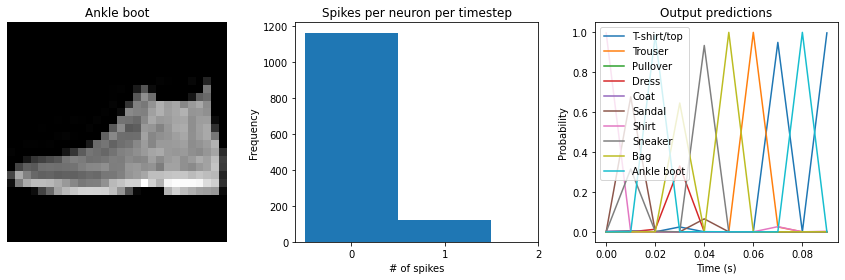

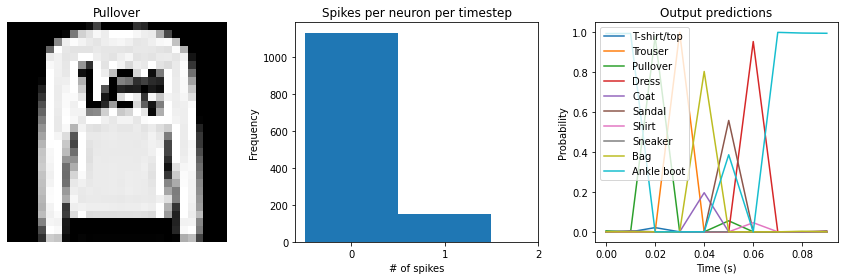

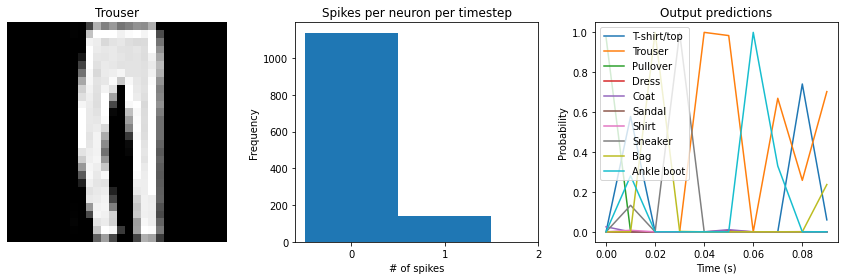

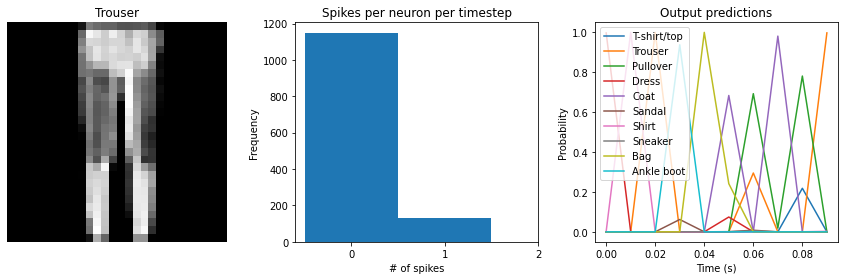

In [14]:
check_output(regularized_model)

We can see that the spike rates have moved towards the 10-20 Hz target we specified.
However, the test accuracy has dropped, since we're adding an additional optimization
constraint. (The accuracy is still higher than the original result with `dt=0.01`, due
to the higher spike rates.) We could lower the regularization weight to allow more
freedom in the firing rates. Or we could use `keras_spiking.regularizers.Percentile`,
which allows more freedom for outliers.
Again, this is a tradeoff that is made between controlling
the firing rates and optimizing accuracy, and the best value for that tradeoff will
depend on the particular application (e.g., how important is it that spike rates fall
within a particular range?).

Note that in some cases it may be better to use regularization with
``spiking_aware_training=False``, as the regularization may perform better when the
value being regularized is smoother. It may also help to adjust the weight
initialization so that the initial firing rates are closer to the desired range, so
that there are smaller adjustments required by the regularizer.

## Lowpass filtering

Another tool we can employ when working with SpikingActivation layers is filtering. As
we've seen, the output of a spiking layer consists of discrete, temporally sparse spike
events. This makes it difficult to determine the spike rate of a neuron when just
looking at a single timestep. In the cases above we have worked around this by using a
`tf.keras.layers.GlobalAveragePooling1D` layer to average the output across all
timesteps before classification.

Another way to achieve this is to compute some kind of moving average of the spiking
output across timesteps. This is effectively what filtering is doing. KerasSpiking
contains a Lowpass layer, which implements a
[lowpass filter](https://en.wikipedia.org/wiki/Low-pass_filter). This has a parameter
`tau`, known as the filter time constant, which controls the degree of smoothing the
layer will apply. Larger `tau` values will apply more smoothing, meaning that we're
aggregating information across longer periods of time, but the output will also be
slower to adapt to changes in the input.

By default the `tau` values are trainable. We can use this in combination with spiking
aware training to enable the model to learn time constants that best trade off spike
noise versus response speed.

Unlike `tf.keras.layers.GlobalAveragePooling1D`, `keras_spiking.Lowpass` computes
outputs for all timesteps by default. This makes it possible to apply filtering
throughout the model—not only on the final layer—in the case that there are multiple
spiking layers. For the final layer, we can pass `return_sequences=False` to have the
layer only return the output of the final timestep, rather than the outputs of all
timesteps.

When working with multiple KerasSpiking layers, we often want them to all share the
same `dt`. We can use `keras_spiking.default.dt` to change the default dt for all
layers. Note that this will only affect layers created _after_ the default is changed;
this will not retroactively affect previous layers.

In [15]:
keras_spiking.default.dt = 0.01

filtered_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation("relu", spiking_aware_training=True),
        # add a lowpass filter on output of spiking layer
        keras_spiking.Lowpass(tau=0.1, return_sequences=False),
        tf.keras.layers.Dense(10),
    ]
)

train(filtered_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 35:03 - loss: 2.3889 - accuracy: 0.1562

   8/1875 [..............................] - ETA: 13s - loss: 2.4383 - accuracy: 0.1182  

  15/1875 [..............................] - ETA: 13s - loss: 2.4567 - accuracy: 0.1109

  23/1875 [..............................] - ETA: 13s - loss: 2.4662 - accuracy: 0.1097

  30/1875 [..............................] - ETA: 13s - loss: 2.4652 - accuracy: 0.1131

  37/1875 [..............................] - ETA: 13s - loss: 2.4639 - accuracy: 0.1185

  44/1875 [..............................] - ETA: 13s - loss: 2.4662 - accuracy: 0.1235

  51/1875 [..............................] - ETA: 13s - loss: 2.4705 - accuracy: 0.1286

  59/1875 [..............................] - ETA: 13s - loss: 2.4734 - accuracy: 0.1339

  66/1875 [>.............................] - ETA: 13s - loss: 2.4754 - accuracy: 0.1381

  73/1875 [>.............................] - ETA: 13s - loss: 2.4769 - accuracy: 0.1417

  80/1875 [>.............................] - ETA: 12s - loss: 2.4778 - accuracy: 0.1447

  87/1875 [>.............................] - ETA: 12s - loss: 2.4775 - accuracy: 0.1475

  95/1875 [>.............................] - ETA: 12s - loss: 2.4749 - accuracy: 0.1508

 103/1875 [>.............................] - ETA: 12s - loss: 2.4713 - accuracy: 0.1543

 110/1875 [>.............................] - ETA: 12s - loss: 2.4678 - accuracy: 0.1574

 117/1875 [>.............................] - ETA: 12s - loss: 2.4639 - accuracy: 0.1606

 124/1875 [>.............................] - ETA: 12s - loss: 2.4595 - accuracy: 0.1638

 132/1875 [=>............................] - ETA: 12s - loss: 2.4543 - accuracy: 0.1673

 139/1875 [=>............................] - ETA: 12s - loss: 2.4497 - accuracy: 0.1702

 146/1875 [=>............................] - ETA: 12s - loss: 2.4449 - accuracy: 0.1731

 153/1875 [=>............................] - ETA: 12s - loss: 2.4399 - accuracy: 0.1760

 161/1875 [=>............................] - ETA: 12s - loss: 2.4347 - accuracy: 0.1792

 169/1875 [=>............................] - ETA: 12s - loss: 2.4294 - accuracy: 0.1823

 177/1875 [=>............................] - ETA: 12s - loss: 2.4237 - accuracy: 0.1853

 184/1875 [=>............................] - ETA: 12s - loss: 2.4188 - accuracy: 0.1878

 191/1875 [==>...........................] - ETA: 12s - loss: 2.4140 - accuracy: 0.1903

 199/1875 [==>...........................] - ETA: 12s - loss: 2.4081 - accuracy: 0.1932

 206/1875 [==>...........................] - ETA: 12s - loss: 2.4030 - accuracy: 0.1957

 213/1875 [==>...........................] - ETA: 11s - loss: 2.3980 - accuracy: 0.1980

 221/1875 [==>...........................] - ETA: 11s - loss: 2.3921 - accuracy: 0.2006

 228/1875 [==>...........................] - ETA: 11s - loss: 2.3868 - accuracy: 0.2029

 235/1875 [==>...........................] - ETA: 11s - loss: 2.3813 - accuracy: 0.2052

 242/1875 [==>...........................] - ETA: 11s - loss: 2.3758 - accuracy: 0.2074

 249/1875 [==>...........................] - ETA: 11s - loss: 2.3702 - accuracy: 0.2096

 256/1875 [===>..........................] - ETA: 11s - loss: 2.3647 - accuracy: 0.2117

 263/1875 [===>..........................] - ETA: 11s - loss: 2.3591 - accuracy: 0.2139

 270/1875 [===>..........................] - ETA: 11s - loss: 2.3536 - accuracy: 0.2159

 278/1875 [===>..........................] - ETA: 11s - loss: 2.3473 - accuracy: 0.2182

 286/1875 [===>..........................] - ETA: 11s - loss: 2.3410 - accuracy: 0.2205

 293/1875 [===>..........................] - ETA: 11s - loss: 2.3355 - accuracy: 0.2225

 301/1875 [===>..........................] - ETA: 11s - loss: 2.3292 - accuracy: 0.2248

 308/1875 [===>..........................] - ETA: 11s - loss: 2.3238 - accuracy: 0.2267

 315/1875 [====>.........................] - ETA: 11s - loss: 2.3184 - accuracy: 0.2286

 322/1875 [====>.........................] - ETA: 11s - loss: 2.3129 - accuracy: 0.2305

 329/1875 [====>.........................] - ETA: 11s - loss: 2.3074 - accuracy: 0.2324

 336/1875 [====>.........................] - ETA: 11s - loss: 2.3020 - accuracy: 0.2342

 344/1875 [====>.........................] - ETA: 11s - loss: 2.2957 - accuracy: 0.2363

 352/1875 [====>.........................] - ETA: 10s - loss: 2.2895 - accuracy: 0.2384

 359/1875 [====>.........................] - ETA: 10s - loss: 2.2839 - accuracy: 0.2402

 366/1875 [====>.........................] - ETA: 10s - loss: 2.2785 - accuracy: 0.2420

 373/1875 [====>.........................] - ETA: 10s - loss: 2.2730 - accuracy: 0.2438

 381/1875 [=====>........................] - ETA: 10s - loss: 2.2669 - accuracy: 0.2457

 389/1875 [=====>........................] - ETA: 10s - loss: 2.2607 - accuracy: 0.2477

 396/1875 [=====>........................] - ETA: 10s - loss: 2.2554 - accuracy: 0.2494

 403/1875 [=====>........................] - ETA: 10s - loss: 2.2502 - accuracy: 0.2510

 410/1875 [=====>........................] - ETA: 10s - loss: 2.2449 - accuracy: 0.2527

 418/1875 [=====>........................] - ETA: 10s - loss: 2.2391 - accuracy: 0.2545

 426/1875 [=====>........................] - ETA: 10s - loss: 2.2332 - accuracy: 0.2563

 433/1875 [=====>........................] - ETA: 10s - loss: 2.2281 - accuracy: 0.2579

 440/1875 [======>.......................] - ETA: 10s - loss: 2.2231 - accuracy: 0.2595

 447/1875 [======>.......................] - ETA: 10s - loss: 2.2181 - accuracy: 0.2611

 454/1875 [======>.......................] - ETA: 10s - loss: 2.2131 - accuracy: 0.2626

 461/1875 [======>.......................] - ETA: 10s - loss: 2.2081 - accuracy: 0.2642

 468/1875 [======>.......................] - ETA: 10s - loss: 2.2032 - accuracy: 0.2657

 475/1875 [======>.......................] - ETA: 10s - loss: 2.1983 - accuracy: 0.2672

 482/1875 [======>.......................] - ETA: 10s - loss: 2.1935 - accuracy: 0.2686

 489/1875 [======>.......................] - ETA: 10s - loss: 2.1887 - accuracy: 0.2701

 496/1875 [======>.......................] - ETA: 9s - loss: 2.1840 - accuracy: 0.2715 

 503/1875 [=======>......................] - ETA: 9s - loss: 2.1793 - accuracy: 0.2729

 509/1875 [=======>......................] - ETA: 9s - loss: 2.1753 - accuracy: 0.2741

 516/1875 [=======>......................] - ETA: 9s - loss: 2.1707 - accuracy: 0.2755

 523/1875 [=======>......................] - ETA: 9s - loss: 2.1662 - accuracy: 0.2769

 530/1875 [=======>......................] - ETA: 9s - loss: 2.1616 - accuracy: 0.2782

 537/1875 [=======>......................] - ETA: 9s - loss: 2.1571 - accuracy: 0.2796

 544/1875 [=======>......................] - ETA: 9s - loss: 2.1527 - accuracy: 0.2809

 551/1875 [=======>......................] - ETA: 9s - loss: 2.1483 - accuracy: 0.2822

 558/1875 [=======>......................] - ETA: 9s - loss: 2.1438 - accuracy: 0.2835

 565/1875 [========>.....................] - ETA: 9s - loss: 2.1395 - accuracy: 0.2848

 572/1875 [========>.....................] - ETA: 9s - loss: 2.1352 - accuracy: 0.2861

 580/1875 [========>.....................] - ETA: 9s - loss: 2.1302 - accuracy: 0.2876

 588/1875 [========>.....................] - ETA: 9s - loss: 2.1254 - accuracy: 0.2890

 595/1875 [========>.....................] - ETA: 9s - loss: 2.1212 - accuracy: 0.2903

 602/1875 [========>.....................] - ETA: 9s - loss: 2.1170 - accuracy: 0.2915

 610/1875 [========>.....................] - ETA: 9s - loss: 2.1123 - accuracy: 0.2929

 617/1875 [========>.....................] - ETA: 9s - loss: 2.1082 - accuracy: 0.2941

 624/1875 [========>.....................] - ETA: 9s - loss: 2.1041 - accuracy: 0.2953

 631/1875 [=========>....................] - ETA: 9s - loss: 2.1000 - accuracy: 0.2965

 639/1875 [=========>....................] - ETA: 8s - loss: 2.0954 - accuracy: 0.2978

 647/1875 [=========>....................] - ETA: 8s - loss: 2.0909 - accuracy: 0.2991

 654/1875 [=========>....................] - ETA: 8s - loss: 2.0869 - accuracy: 0.3002

 661/1875 [=========>....................] - ETA: 8s - loss: 2.0830 - accuracy: 0.3014

 668/1875 [=========>....................] - ETA: 8s - loss: 2.0791 - accuracy: 0.3025

 675/1875 [=========>....................] - ETA: 8s - loss: 2.0753 - accuracy: 0.3036

 682/1875 [=========>....................] - ETA: 8s - loss: 2.0714 - accuracy: 0.3047

 689/1875 [==========>...................] - ETA: 8s - loss: 2.0676 - accuracy: 0.3058

 697/1875 [==========>...................] - ETA: 8s - loss: 2.0633 - accuracy: 0.3070

 704/1875 [==========>...................] - ETA: 8s - loss: 2.0595 - accuracy: 0.3081

 711/1875 [==========>...................] - ETA: 8s - loss: 2.0558 - accuracy: 0.3092

 719/1875 [==========>...................] - ETA: 8s - loss: 2.0516 - accuracy: 0.3104

 726/1875 [==========>...................] - ETA: 8s - loss: 2.0479 - accuracy: 0.3114

 733/1875 [==========>...................] - ETA: 8s - loss: 2.0443 - accuracy: 0.3125

 740/1875 [==========>...................] - ETA: 8s - loss: 2.0407 - accuracy: 0.3135

 748/1875 [==========>...................] - ETA: 8s - loss: 2.0366 - accuracy: 0.3147

 755/1875 [===========>..................] - ETA: 8s - loss: 2.0330 - accuracy: 0.3157

 762/1875 [===========>..................] - ETA: 8s - loss: 2.0295 - accuracy: 0.3167

 769/1875 [===========>..................] - ETA: 8s - loss: 2.0260 - accuracy: 0.3177

 777/1875 [===========>..................] - ETA: 7s - loss: 2.0220 - accuracy: 0.3189

 784/1875 [===========>..................] - ETA: 7s - loss: 2.0185 - accuracy: 0.3199

 791/1875 [===========>..................] - ETA: 7s - loss: 2.0151 - accuracy: 0.3209

 798/1875 [===========>..................] - ETA: 7s - loss: 2.0117 - accuracy: 0.3218

 805/1875 [===========>..................] - ETA: 7s - loss: 2.0083 - accuracy: 0.3228

 812/1875 [===========>..................] - ETA: 7s - loss: 2.0050 - accuracy: 0.3238

 819/1875 [============>.................] - ETA: 7s - loss: 2.0016 - accuracy: 0.3247

 827/1875 [============>.................] - ETA: 7s - loss: 1.9978 - accuracy: 0.3258

 835/1875 [============>.................] - ETA: 7s - loss: 1.9941 - accuracy: 0.3269

 842/1875 [============>.................] - ETA: 7s - loss: 1.9909 - accuracy: 0.3278

 849/1875 [============>.................] - ETA: 7s - loss: 1.9877 - accuracy: 0.3287

 856/1875 [============>.................] - ETA: 7s - loss: 1.9845 - accuracy: 0.3296

 863/1875 [============>.................] - ETA: 7s - loss: 1.9813 - accuracy: 0.3305

 871/1875 [============>.................] - ETA: 7s - loss: 1.9777 - accuracy: 0.3316

 878/1875 [=============>................] - ETA: 7s - loss: 1.9746 - accuracy: 0.3325

 885/1875 [=============>................] - ETA: 7s - loss: 1.9715 - accuracy: 0.3333

 893/1875 [=============>................] - ETA: 7s - loss: 1.9680 - accuracy: 0.3343

 900/1875 [=============>................] - ETA: 7s - loss: 1.9649 - accuracy: 0.3352

 908/1875 [=============>................] - ETA: 7s - loss: 1.9615 - accuracy: 0.3362

 915/1875 [=============>................] - ETA: 6s - loss: 1.9585 - accuracy: 0.3371

 922/1875 [=============>................] - ETA: 6s - loss: 1.9555 - accuracy: 0.3379

 929/1875 [=============>................] - ETA: 6s - loss: 1.9526 - accuracy: 0.3387

 936/1875 [=============>................] - ETA: 6s - loss: 1.9496 - accuracy: 0.3396

 944/1875 [==============>...............] - ETA: 6s - loss: 1.9463 - accuracy: 0.3405

 951/1875 [==============>...............] - ETA: 6s - loss: 1.9434 - accuracy: 0.3414

 959/1875 [==============>...............] - ETA: 6s - loss: 1.9401 - accuracy: 0.3423

 966/1875 [==============>...............] - ETA: 6s - loss: 1.9373 - accuracy: 0.3431

 974/1875 [==============>...............] - ETA: 6s - loss: 1.9340 - accuracy: 0.3440

 982/1875 [==============>...............] - ETA: 6s - loss: 1.9308 - accuracy: 0.3450

 989/1875 [==============>...............] - ETA: 6s - loss: 1.9280 - accuracy: 0.3458

 996/1875 [==============>...............] - ETA: 6s - loss: 1.9253 - accuracy: 0.3466

1004/1875 [===============>..............] - ETA: 6s - loss: 1.9221 - accuracy: 0.3475

1011/1875 [===============>..............] - ETA: 6s - loss: 1.9194 - accuracy: 0.3482

1018/1875 [===============>..............] - ETA: 6s - loss: 1.9167 - accuracy: 0.3490

1025/1875 [===============>..............] - ETA: 6s - loss: 1.9140 - accuracy: 0.3498

1032/1875 [===============>..............] - ETA: 6s - loss: 1.9113 - accuracy: 0.3506

1039/1875 [===============>..............] - ETA: 6s - loss: 1.9086 - accuracy: 0.3513

1047/1875 [===============>..............] - ETA: 5s - loss: 1.9056 - accuracy: 0.3522

1055/1875 [===============>..............] - ETA: 5s - loss: 1.9026 - accuracy: 0.3531

1063/1875 [================>.............] - ETA: 5s - loss: 1.8996 - accuracy: 0.3539

1070/1875 [================>.............] - ETA: 5s - loss: 1.8970 - accuracy: 0.3547

1076/1875 [================>.............] - ETA: 5s - loss: 1.8948 - accuracy: 0.3553

1083/1875 [================>.............] - ETA: 5s - loss: 1.8922 - accuracy: 0.3560

1090/1875 [================>.............] - ETA: 5s - loss: 1.8897 - accuracy: 0.3568

1097/1875 [================>.............] - ETA: 5s - loss: 1.8871 - accuracy: 0.3575

1104/1875 [================>.............] - ETA: 5s - loss: 1.8846 - accuracy: 0.3582

1111/1875 [================>.............] - ETA: 5s - loss: 1.8821 - accuracy: 0.3589

1118/1875 [================>.............] - ETA: 5s - loss: 1.8797 - accuracy: 0.3596

1125/1875 [=================>............] - ETA: 5s - loss: 1.8772 - accuracy: 0.3603

1133/1875 [=================>............] - ETA: 5s - loss: 1.8744 - accuracy: 0.3611

1140/1875 [=================>............] - ETA: 5s - loss: 1.8720 - accuracy: 0.3618

1148/1875 [=================>............] - ETA: 5s - loss: 1.8692 - accuracy: 0.3626

1155/1875 [=================>............] - ETA: 5s - loss: 1.8668 - accuracy: 0.3633

1162/1875 [=================>............] - ETA: 5s - loss: 1.8644 - accuracy: 0.3640

1169/1875 [=================>............] - ETA: 5s - loss: 1.8620 - accuracy: 0.3646

1176/1875 [=================>............] - ETA: 5s - loss: 1.8597 - accuracy: 0.3653

1183/1875 [=================>............] - ETA: 5s - loss: 1.8573 - accuracy: 0.3660

1190/1875 [==================>...........] - ETA: 4s - loss: 1.8550 - accuracy: 0.3667

1198/1875 [==================>...........] - ETA: 4s - loss: 1.8523 - accuracy: 0.3674

1205/1875 [==================>...........] - ETA: 4s - loss: 1.8500 - accuracy: 0.3681

1213/1875 [==================>...........] - ETA: 4s - loss: 1.8474 - accuracy: 0.3688

1221/1875 [==================>...........] - ETA: 4s - loss: 1.8448 - accuracy: 0.3696

1228/1875 [==================>...........] - ETA: 4s - loss: 1.8425 - accuracy: 0.3702

1235/1875 [==================>...........] - ETA: 4s - loss: 1.8402 - accuracy: 0.3709

1242/1875 [==================>...........] - ETA: 4s - loss: 1.8380 - accuracy: 0.3715

1249/1875 [==================>...........] - ETA: 4s - loss: 1.8358 - accuracy: 0.3722

1257/1875 [===================>..........] - ETA: 4s - loss: 1.8332 - accuracy: 0.3729

1265/1875 [===================>..........] - ETA: 4s - loss: 1.8307 - accuracy: 0.3736

1272/1875 [===================>..........] - ETA: 4s - loss: 1.8285 - accuracy: 0.3743

1280/1875 [===================>..........] - ETA: 4s - loss: 1.8260 - accuracy: 0.3750

1287/1875 [===================>..........] - ETA: 4s - loss: 1.8238 - accuracy: 0.3756

1294/1875 [===================>..........] - ETA: 4s - loss: 1.8217 - accuracy: 0.3763

1301/1875 [===================>..........] - ETA: 4s - loss: 1.8195 - accuracy: 0.3769

1308/1875 [===================>..........] - ETA: 4s - loss: 1.8174 - accuracy: 0.3775

1315/1875 [====================>.........] - ETA: 4s - loss: 1.8153 - accuracy: 0.3781

1322/1875 [====================>.........] - ETA: 4s - loss: 1.8132 - accuracy: 0.3787

1329/1875 [====================>.........] - ETA: 3s - loss: 1.8111 - accuracy: 0.3794

1337/1875 [====================>.........] - ETA: 3s - loss: 1.8087 - accuracy: 0.3800

1344/1875 [====================>.........] - ETA: 3s - loss: 1.8066 - accuracy: 0.3806

1352/1875 [====================>.........] - ETA: 3s - loss: 1.8042 - accuracy: 0.3813

1359/1875 [====================>.........] - ETA: 3s - loss: 1.8022 - accuracy: 0.3819

1367/1875 [====================>.........] - ETA: 3s - loss: 1.7999 - accuracy: 0.3826

1374/1875 [====================>.........] - ETA: 3s - loss: 1.7978 - accuracy: 0.3832

1382/1875 [=====================>........] - ETA: 3s - loss: 1.7955 - accuracy: 0.3839

1390/1875 [=====================>........] - ETA: 3s - loss: 1.7932 - accuracy: 0.3845

1397/1875 [=====================>........] - ETA: 3s - loss: 1.7912 - accuracy: 0.3851

1405/1875 [=====================>........] - ETA: 3s - loss: 1.7890 - accuracy: 0.3858

1413/1875 [=====================>........] - ETA: 3s - loss: 1.7867 - accuracy: 0.3864

1421/1875 [=====================>........] - ETA: 3s - loss: 1.7845 - accuracy: 0.3871

1429/1875 [=====================>........] - ETA: 3s - loss: 1.7822 - accuracy: 0.3877

1437/1875 [=====================>........] - ETA: 3s - loss: 1.7800 - accuracy: 0.3884

1444/1875 [======================>.......] - ETA: 3s - loss: 1.7781 - accuracy: 0.3889

1451/1875 [======================>.......] - ETA: 3s - loss: 1.7762 - accuracy: 0.3895

1459/1875 [======================>.......] - ETA: 3s - loss: 1.7740 - accuracy: 0.3901

1466/1875 [======================>.......] - ETA: 2s - loss: 1.7721 - accuracy: 0.3907

1473/1875 [======================>.......] - ETA: 2s - loss: 1.7702 - accuracy: 0.3912

1481/1875 [======================>.......] - ETA: 2s - loss: 1.7681 - accuracy: 0.3919

1489/1875 [======================>.......] - ETA: 2s - loss: 1.7660 - accuracy: 0.3925

1497/1875 [======================>.......] - ETA: 2s - loss: 1.7638 - accuracy: 0.3931

1504/1875 [=======================>......] - ETA: 2s - loss: 1.7620 - accuracy: 0.3936

1511/1875 [=======================>......] - ETA: 2s - loss: 1.7601 - accuracy: 0.3942

1518/1875 [=======================>......] - ETA: 2s - loss: 1.7583 - accuracy: 0.3947

1526/1875 [=======================>......] - ETA: 2s - loss: 1.7562 - accuracy: 0.3953

1533/1875 [=======================>......] - ETA: 2s - loss: 1.7544 - accuracy: 0.3958

1541/1875 [=======================>......] - ETA: 2s - loss: 1.7523 - accuracy: 0.3964

1549/1875 [=======================>......] - ETA: 2s - loss: 1.7503 - accuracy: 0.3970

1557/1875 [=======================>......] - ETA: 2s - loss: 1.7482 - accuracy: 0.3976

1565/1875 [========================>.....] - ETA: 2s - loss: 1.7462 - accuracy: 0.3982

1573/1875 [========================>.....] - ETA: 2s - loss: 1.7442 - accuracy: 0.3988

1581/1875 [========================>.....] - ETA: 2s - loss: 1.7422 - accuracy: 0.3994

1588/1875 [========================>.....] - ETA: 2s - loss: 1.7404 - accuracy: 0.3999

1595/1875 [========================>.....] - ETA: 2s - loss: 1.7387 - accuracy: 0.4004

1602/1875 [========================>.....] - ETA: 1s - loss: 1.7369 - accuracy: 0.4009

1609/1875 [========================>.....] - ETA: 1s - loss: 1.7352 - accuracy: 0.4014

1616/1875 [========================>.....] - ETA: 1s - loss: 1.7335 - accuracy: 0.4019

1623/1875 [========================>.....] - ETA: 1s - loss: 1.7318 - accuracy: 0.4025

1631/1875 [=========================>....] - ETA: 1s - loss: 1.7298 - accuracy: 0.4030

1638/1875 [=========================>....] - ETA: 1s - loss: 1.7281 - accuracy: 0.4035

1646/1875 [=========================>....] - ETA: 1s - loss: 1.7262 - accuracy: 0.4041

1653/1875 [=========================>....] - ETA: 1s - loss: 1.7246 - accuracy: 0.4046

1660/1875 [=========================>....] - ETA: 1s - loss: 1.7229 - accuracy: 0.4051

1667/1875 [=========================>....] - ETA: 1s - loss: 1.7212 - accuracy: 0.4055

1675/1875 [=========================>....] - ETA: 1s - loss: 1.7193 - accuracy: 0.4061

1683/1875 [=========================>....] - ETA: 1s - loss: 1.7175 - accuracy: 0.4067

1690/1875 [==========================>...] - ETA: 1s - loss: 1.7158 - accuracy: 0.4071

1698/1875 [==========================>...] - ETA: 1s - loss: 1.7140 - accuracy: 0.4077

1706/1875 [==========================>...] - ETA: 1s - loss: 1.7121 - accuracy: 0.4082

1713/1875 [==========================>...] - ETA: 1s - loss: 1.7105 - accuracy: 0.4087

1720/1875 [==========================>...] - ETA: 1s - loss: 1.7089 - accuracy: 0.4092

1727/1875 [==========================>...] - ETA: 1s - loss: 1.7073 - accuracy: 0.4096

1734/1875 [==========================>...] - ETA: 1s - loss: 1.7057 - accuracy: 0.4101

1742/1875 [==========================>...] - ETA: 0s - loss: 1.7039 - accuracy: 0.4106

1750/1875 [===========================>..] - ETA: 0s - loss: 1.7021 - accuracy: 0.4112

1758/1875 [===========================>..] - ETA: 0s - loss: 1.7003 - accuracy: 0.4117

1765/1875 [===========================>..] - ETA: 0s - loss: 1.6988 - accuracy: 0.4122

1772/1875 [===========================>..] - ETA: 0s - loss: 1.6972 - accuracy: 0.4126

1777/1875 [===========================>..] - ETA: 0s - loss: 1.6961 - accuracy: 0.4129

1784/1875 [===========================>..] - ETA: 0s - loss: 1.6946 - accuracy: 0.4134

1791/1875 [===========================>..] - ETA: 0s - loss: 1.6930 - accuracy: 0.4138

1798/1875 [===========================>..] - ETA: 0s - loss: 1.6915 - accuracy: 0.4143

1806/1875 [===========================>..] - ETA: 0s - loss: 1.6898 - accuracy: 0.4148

1813/1875 [============================>.] - ETA: 0s - loss: 1.6882 - accuracy: 0.4153

1821/1875 [============================>.] - ETA: 0s - loss: 1.6865 - accuracy: 0.4158

1828/1875 [============================>.] - ETA: 0s - loss: 1.6850 - accuracy: 0.4162

1835/1875 [============================>.] - ETA: 0s - loss: 1.6835 - accuracy: 0.4166

1843/1875 [============================>.] - ETA: 0s - loss: 1.6818 - accuracy: 0.4171

1850/1875 [============================>.] - ETA: 0s - loss: 1.6803 - accuracy: 0.4176

1858/1875 [============================>.] - ETA: 0s - loss: 1.6787 - accuracy: 0.4181

1865/1875 [============================>.] - ETA: 0s - loss: 1.6772 - accuracy: 0.4185

1873/1875 [============================>.] - ETA: 0s - loss: 1.6755 - accuracy: 0.4190

1875/1875 [==============================] - 15s 7ms/step - loss: 1.6749 - accuracy: 0.4192


Epoch 2/10
   1/1875 [..............................] - ETA: 12s - loss: 0.5001 - accuracy: 0.8125

   9/1875 [..............................] - ETA: 13s - loss: 0.7414 - accuracy: 0.7002

  16/1875 [..............................] - ETA: 13s - loss: 0.8066 - accuracy: 0.6839

  23/1875 [..............................] - ETA: 13s - loss: 0.8485 - accuracy: 0.6712

  30/1875 [..............................] - ETA: 13s - loss: 0.8673 - accuracy: 0.6645

  37/1875 [..............................] - ETA: 13s - loss: 0.8805 - accuracy: 0.6586

  44/1875 [..............................] - ETA: 13s - loss: 0.8897 - accuracy: 0.6550

  51/1875 [..............................] - ETA: 13s - loss: 0.8969 - accuracy: 0.6518

  58/1875 [..............................] - ETA: 13s - loss: 0.9035 - accuracy: 0.6488

  65/1875 [>.............................] - ETA: 13s - loss: 0.9079 - accuracy: 0.6464

  72/1875 [>.............................] - ETA: 13s - loss: 0.9110 - accuracy: 0.6448

  79/1875 [>.............................] - ETA: 13s - loss: 0.9133 - accuracy: 0.6434

  86/1875 [>.............................] - ETA: 13s - loss: 0.9146 - accuracy: 0.6424

  93/1875 [>.............................] - ETA: 12s - loss: 0.9159 - accuracy: 0.6415

 101/1875 [>.............................] - ETA: 12s - loss: 0.9176 - accuracy: 0.6407

 108/1875 [>.............................] - ETA: 12s - loss: 0.9192 - accuracy: 0.6401

 116/1875 [>.............................] - ETA: 12s - loss: 0.9204 - accuracy: 0.6397

 124/1875 [>.............................] - ETA: 12s - loss: 0.9217 - accuracy: 0.6394

 131/1875 [=>............................] - ETA: 12s - loss: 0.9227 - accuracy: 0.6392

 139/1875 [=>............................] - ETA: 12s - loss: 0.9239 - accuracy: 0.6391

 146/1875 [=>............................] - ETA: 12s - loss: 0.9251 - accuracy: 0.6390

 153/1875 [=>............................] - ETA: 12s - loss: 0.9261 - accuracy: 0.6389

 161/1875 [=>............................] - ETA: 12s - loss: 0.9271 - accuracy: 0.6389

 168/1875 [=>............................] - ETA: 12s - loss: 0.9279 - accuracy: 0.6389

 176/1875 [=>............................] - ETA: 12s - loss: 0.9287 - accuracy: 0.6390

 183/1875 [=>............................] - ETA: 12s - loss: 0.9291 - accuracy: 0.6391

 191/1875 [==>...........................] - ETA: 12s - loss: 0.9294 - accuracy: 0.6392

 198/1875 [==>...........................] - ETA: 12s - loss: 0.9298 - accuracy: 0.6392

 206/1875 [==>...........................] - ETA: 12s - loss: 0.9301 - accuracy: 0.6393

 214/1875 [==>...........................] - ETA: 11s - loss: 0.9305 - accuracy: 0.6393

 221/1875 [==>...........................] - ETA: 11s - loss: 0.9307 - accuracy: 0.6394

 228/1875 [==>...........................] - ETA: 11s - loss: 0.9310 - accuracy: 0.6395

 235/1875 [==>...........................] - ETA: 11s - loss: 0.9312 - accuracy: 0.6396

 243/1875 [==>...........................] - ETA: 11s - loss: 0.9315 - accuracy: 0.6398

 251/1875 [===>..........................] - ETA: 11s - loss: 0.9317 - accuracy: 0.6399

 259/1875 [===>..........................] - ETA: 11s - loss: 0.9318 - accuracy: 0.6401

 266/1875 [===>..........................] - ETA: 11s - loss: 0.9319 - accuracy: 0.6402

 273/1875 [===>..........................] - ETA: 11s - loss: 0.9320 - accuracy: 0.6403

 281/1875 [===>..........................] - ETA: 11s - loss: 0.9321 - accuracy: 0.6405

 289/1875 [===>..........................] - ETA: 11s - loss: 0.9321 - accuracy: 0.6406

 297/1875 [===>..........................] - ETA: 11s - loss: 0.9322 - accuracy: 0.6408

 304/1875 [===>..........................] - ETA: 11s - loss: 0.9323 - accuracy: 0.6408

 312/1875 [===>..........................] - ETA: 11s - loss: 0.9324 - accuracy: 0.6409

 319/1875 [====>.........................] - ETA: 11s - loss: 0.9325 - accuracy: 0.6410

 327/1875 [====>.........................] - ETA: 11s - loss: 0.9325 - accuracy: 0.6411

 335/1875 [====>.........................] - ETA: 11s - loss: 0.9325 - accuracy: 0.6413

 342/1875 [====>.........................] - ETA: 11s - loss: 0.9324 - accuracy: 0.6414

 349/1875 [====>.........................] - ETA: 10s - loss: 0.9323 - accuracy: 0.6415

 356/1875 [====>.........................] - ETA: 10s - loss: 0.9323 - accuracy: 0.6416

 363/1875 [====>.........................] - ETA: 10s - loss: 0.9322 - accuracy: 0.6417

 371/1875 [====>.........................] - ETA: 10s - loss: 0.9321 - accuracy: 0.6418

 379/1875 [=====>........................] - ETA: 10s - loss: 0.9319 - accuracy: 0.6419

 387/1875 [=====>........................] - ETA: 10s - loss: 0.9318 - accuracy: 0.6421

 394/1875 [=====>........................] - ETA: 10s - loss: 0.9316 - accuracy: 0.6422

 401/1875 [=====>........................] - ETA: 10s - loss: 0.9315 - accuracy: 0.6423

 408/1875 [=====>........................] - ETA: 10s - loss: 0.9314 - accuracy: 0.6424

 415/1875 [=====>........................] - ETA: 10s - loss: 0.9312 - accuracy: 0.6425

 423/1875 [=====>........................] - ETA: 10s - loss: 0.9310 - accuracy: 0.6426

 430/1875 [=====>........................] - ETA: 10s - loss: 0.9309 - accuracy: 0.6427

 437/1875 [=====>........................] - ETA: 10s - loss: 0.9307 - accuracy: 0.6428

 444/1875 [======>.......................] - ETA: 10s - loss: 0.9305 - accuracy: 0.6429

 451/1875 [======>.......................] - ETA: 10s - loss: 0.9303 - accuracy: 0.6431

 458/1875 [======>.......................] - ETA: 10s - loss: 0.9301 - accuracy: 0.6432

 466/1875 [======>.......................] - ETA: 10s - loss: 0.9298 - accuracy: 0.6434

 474/1875 [======>.......................] - ETA: 10s - loss: 0.9296 - accuracy: 0.6435

 481/1875 [======>.......................] - ETA: 10s - loss: 0.9294 - accuracy: 0.6437

 488/1875 [======>.......................] - ETA: 9s - loss: 0.9292 - accuracy: 0.6438 

 495/1875 [======>.......................] - ETA: 9s - loss: 0.9290 - accuracy: 0.6439

 502/1875 [=======>......................] - ETA: 9s - loss: 0.9288 - accuracy: 0.6440

 510/1875 [=======>......................] - ETA: 9s - loss: 0.9286 - accuracy: 0.6442

 517/1875 [=======>......................] - ETA: 9s - loss: 0.9283 - accuracy: 0.6443

 525/1875 [=======>......................] - ETA: 9s - loss: 0.9281 - accuracy: 0.6444

 533/1875 [=======>......................] - ETA: 9s - loss: 0.9279 - accuracy: 0.6446

 540/1875 [=======>......................] - ETA: 9s - loss: 0.9277 - accuracy: 0.6447

 547/1875 [=======>......................] - ETA: 9s - loss: 0.9275 - accuracy: 0.6448

 554/1875 [=======>......................] - ETA: 9s - loss: 0.9272 - accuracy: 0.6449

 561/1875 [=======>......................] - ETA: 9s - loss: 0.9270 - accuracy: 0.6450

 569/1875 [========>.....................] - ETA: 9s - loss: 0.9268 - accuracy: 0.6451

 577/1875 [========>.....................] - ETA: 9s - loss: 0.9265 - accuracy: 0.6452

 584/1875 [========>.....................] - ETA: 9s - loss: 0.9263 - accuracy: 0.6453

 592/1875 [========>.....................] - ETA: 9s - loss: 0.9261 - accuracy: 0.6454

 599/1875 [========>.....................] - ETA: 9s - loss: 0.9259 - accuracy: 0.6456

 606/1875 [========>.....................] - ETA: 9s - loss: 0.9257 - accuracy: 0.6457

 613/1875 [========>.....................] - ETA: 9s - loss: 0.9255 - accuracy: 0.6458

 620/1875 [========>.....................] - ETA: 9s - loss: 0.9252 - accuracy: 0.6459

 627/1875 [=========>....................] - ETA: 9s - loss: 0.9250 - accuracy: 0.6460

 634/1875 [=========>....................] - ETA: 8s - loss: 0.9248 - accuracy: 0.6461

 641/1875 [=========>....................] - ETA: 8s - loss: 0.9246 - accuracy: 0.6462

 648/1875 [=========>....................] - ETA: 8s - loss: 0.9244 - accuracy: 0.6463

 656/1875 [=========>....................] - ETA: 8s - loss: 0.9242 - accuracy: 0.6464

 663/1875 [=========>....................] - ETA: 8s - loss: 0.9240 - accuracy: 0.6465

 670/1875 [=========>....................] - ETA: 8s - loss: 0.9238 - accuracy: 0.6466

 678/1875 [=========>....................] - ETA: 8s - loss: 0.9236 - accuracy: 0.6467

 686/1875 [=========>....................] - ETA: 8s - loss: 0.9234 - accuracy: 0.6468

 693/1875 [==========>...................] - ETA: 8s - loss: 0.9233 - accuracy: 0.6469

 700/1875 [==========>...................] - ETA: 8s - loss: 0.9231 - accuracy: 0.6470

 708/1875 [==========>...................] - ETA: 8s - loss: 0.9229 - accuracy: 0.6471

 716/1875 [==========>...................] - ETA: 8s - loss: 0.9227 - accuracy: 0.6472

 723/1875 [==========>...................] - ETA: 8s - loss: 0.9225 - accuracy: 0.6473

 731/1875 [==========>...................] - ETA: 8s - loss: 0.9223 - accuracy: 0.6474

 739/1875 [==========>...................] - ETA: 8s - loss: 0.9221 - accuracy: 0.6475

 747/1875 [==========>...................] - ETA: 8s - loss: 0.9218 - accuracy: 0.6476

 754/1875 [===========>..................] - ETA: 8s - loss: 0.9216 - accuracy: 0.6477

 761/1875 [===========>..................] - ETA: 8s - loss: 0.9215 - accuracy: 0.6478

 768/1875 [===========>..................] - ETA: 7s - loss: 0.9213 - accuracy: 0.6479

 775/1875 [===========>..................] - ETA: 7s - loss: 0.9211 - accuracy: 0.6480

 783/1875 [===========>..................] - ETA: 7s - loss: 0.9209 - accuracy: 0.6481

 790/1875 [===========>..................] - ETA: 7s - loss: 0.9207 - accuracy: 0.6482

 797/1875 [===========>..................] - ETA: 7s - loss: 0.9204 - accuracy: 0.6483

 804/1875 [===========>..................] - ETA: 7s - loss: 0.9202 - accuracy: 0.6484

 811/1875 [===========>..................] - ETA: 7s - loss: 0.9200 - accuracy: 0.6485

 818/1875 [============>.................] - ETA: 7s - loss: 0.9199 - accuracy: 0.6486

 825/1875 [============>.................] - ETA: 7s - loss: 0.9197 - accuracy: 0.6487

 832/1875 [============>.................] - ETA: 7s - loss: 0.9195 - accuracy: 0.6488

 839/1875 [============>.................] - ETA: 7s - loss: 0.9193 - accuracy: 0.6488

 846/1875 [============>.................] - ETA: 7s - loss: 0.9191 - accuracy: 0.6489

 853/1875 [============>.................] - ETA: 7s - loss: 0.9189 - accuracy: 0.6490

 861/1875 [============>.................] - ETA: 7s - loss: 0.9187 - accuracy: 0.6491

 869/1875 [============>.................] - ETA: 7s - loss: 0.9185 - accuracy: 0.6492

 876/1875 [=============>................] - ETA: 7s - loss: 0.9183 - accuracy: 0.6493

 883/1875 [=============>................] - ETA: 7s - loss: 0.9181 - accuracy: 0.6494

 890/1875 [=============>................] - ETA: 7s - loss: 0.9179 - accuracy: 0.6495

 898/1875 [=============>................] - ETA: 7s - loss: 0.9177 - accuracy: 0.6496

 905/1875 [=============>................] - ETA: 6s - loss: 0.9175 - accuracy: 0.6497

 913/1875 [=============>................] - ETA: 6s - loss: 0.9173 - accuracy: 0.6498

 920/1875 [=============>................] - ETA: 6s - loss: 0.9171 - accuracy: 0.6499

 928/1875 [=============>................] - ETA: 6s - loss: 0.9169 - accuracy: 0.6500

 936/1875 [=============>................] - ETA: 6s - loss: 0.9167 - accuracy: 0.6501

 943/1875 [==============>...............] - ETA: 6s - loss: 0.9165 - accuracy: 0.6502

 951/1875 [==============>...............] - ETA: 6s - loss: 0.9163 - accuracy: 0.6503

 958/1875 [==============>...............] - ETA: 6s - loss: 0.9161 - accuracy: 0.6504

 965/1875 [==============>...............] - ETA: 6s - loss: 0.9159 - accuracy: 0.6505

 972/1875 [==============>...............] - ETA: 6s - loss: 0.9157 - accuracy: 0.6506

 979/1875 [==============>...............] - ETA: 6s - loss: 0.9155 - accuracy: 0.6507

 986/1875 [==============>...............] - ETA: 6s - loss: 0.9153 - accuracy: 0.6508

 993/1875 [==============>...............] - ETA: 6s - loss: 0.9151 - accuracy: 0.6509

1001/1875 [===============>..............] - ETA: 6s - loss: 0.9149 - accuracy: 0.6510

1009/1875 [===============>..............] - ETA: 6s - loss: 0.9146 - accuracy: 0.6511

1017/1875 [===============>..............] - ETA: 6s - loss: 0.9144 - accuracy: 0.6512

1025/1875 [===============>..............] - ETA: 6s - loss: 0.9142 - accuracy: 0.6513

1033/1875 [===============>..............] - ETA: 6s - loss: 0.9140 - accuracy: 0.6514

1040/1875 [===============>..............] - ETA: 6s - loss: 0.9138 - accuracy: 0.6515

1047/1875 [===============>..............] - ETA: 5s - loss: 0.9136 - accuracy: 0.6515

1054/1875 [===============>..............] - ETA: 5s - loss: 0.9134 - accuracy: 0.6516

1062/1875 [===============>..............] - ETA: 5s - loss: 0.9132 - accuracy: 0.6517

1069/1875 [================>.............] - ETA: 5s - loss: 0.9130 - accuracy: 0.6518

1077/1875 [================>.............] - ETA: 5s - loss: 0.9128 - accuracy: 0.6519

1084/1875 [================>.............] - ETA: 5s - loss: 0.9126 - accuracy: 0.6520

1092/1875 [================>.............] - ETA: 5s - loss: 0.9124 - accuracy: 0.6521

1099/1875 [================>.............] - ETA: 5s - loss: 0.9122 - accuracy: 0.6522

1107/1875 [================>.............] - ETA: 5s - loss: 0.9120 - accuracy: 0.6523

1114/1875 [================>.............] - ETA: 5s - loss: 0.9119 - accuracy: 0.6524

1122/1875 [================>.............] - ETA: 5s - loss: 0.9117 - accuracy: 0.6525

1130/1875 [=================>............] - ETA: 5s - loss: 0.9115 - accuracy: 0.6526

1138/1875 [=================>............] - ETA: 5s - loss: 0.9113 - accuracy: 0.6527

1146/1875 [=================>............] - ETA: 5s - loss: 0.9110 - accuracy: 0.6528

1154/1875 [=================>............] - ETA: 5s - loss: 0.9109 - accuracy: 0.6529

1162/1875 [=================>............] - ETA: 5s - loss: 0.9107 - accuracy: 0.6530

1170/1875 [=================>............] - ETA: 5s - loss: 0.9105 - accuracy: 0.6531

1178/1875 [=================>............] - ETA: 5s - loss: 0.9103 - accuracy: 0.6531

1185/1875 [=================>............] - ETA: 4s - loss: 0.9101 - accuracy: 0.6532

1193/1875 [==================>...........] - ETA: 4s - loss: 0.9099 - accuracy: 0.6533

1201/1875 [==================>...........] - ETA: 4s - loss: 0.9097 - accuracy: 0.6534

1209/1875 [==================>...........] - ETA: 4s - loss: 0.9095 - accuracy: 0.6535

1217/1875 [==================>...........] - ETA: 4s - loss: 0.9094 - accuracy: 0.6536

1225/1875 [==================>...........] - ETA: 4s - loss: 0.9092 - accuracy: 0.6537

1233/1875 [==================>...........] - ETA: 4s - loss: 0.9090 - accuracy: 0.6538

1240/1875 [==================>...........] - ETA: 4s - loss: 0.9088 - accuracy: 0.6539

1247/1875 [==================>...........] - ETA: 4s - loss: 0.9086 - accuracy: 0.6539

1254/1875 [===================>..........] - ETA: 4s - loss: 0.9085 - accuracy: 0.6540

1261/1875 [===================>..........] - ETA: 4s - loss: 0.9083 - accuracy: 0.6541

1269/1875 [===================>..........] - ETA: 4s - loss: 0.9081 - accuracy: 0.6542

1277/1875 [===================>..........] - ETA: 4s - loss: 0.9079 - accuracy: 0.6543

1284/1875 [===================>..........] - ETA: 4s - loss: 0.9078 - accuracy: 0.6543

1292/1875 [===================>..........] - ETA: 4s - loss: 0.9076 - accuracy: 0.6544

1300/1875 [===================>..........] - ETA: 4s - loss: 0.9074 - accuracy: 0.6545

1307/1875 [===================>..........] - ETA: 4s - loss: 0.9072 - accuracy: 0.6546

1315/1875 [====================>.........] - ETA: 4s - loss: 0.9070 - accuracy: 0.6547

1322/1875 [====================>.........] - ETA: 3s - loss: 0.9069 - accuracy: 0.6548

1329/1875 [====================>.........] - ETA: 3s - loss: 0.9067 - accuracy: 0.6548

1336/1875 [====================>.........] - ETA: 3s - loss: 0.9065 - accuracy: 0.6549

1343/1875 [====================>.........] - ETA: 3s - loss: 0.9064 - accuracy: 0.6550

1351/1875 [====================>.........] - ETA: 3s - loss: 0.9062 - accuracy: 0.6551

1359/1875 [====================>.........] - ETA: 3s - loss: 0.9060 - accuracy: 0.6552

1367/1875 [====================>.........] - ETA: 3s - loss: 0.9058 - accuracy: 0.6553

1375/1875 [=====================>........] - ETA: 3s - loss: 0.9057 - accuracy: 0.6553

1383/1875 [=====================>........] - ETA: 3s - loss: 0.9055 - accuracy: 0.6554

1390/1875 [=====================>........] - ETA: 3s - loss: 0.9053 - accuracy: 0.6555

1397/1875 [=====================>........] - ETA: 3s - loss: 0.9052 - accuracy: 0.6556

1405/1875 [=====================>........] - ETA: 3s - loss: 0.9050 - accuracy: 0.6556

1412/1875 [=====================>........] - ETA: 3s - loss: 0.9048 - accuracy: 0.6557

1419/1875 [=====================>........] - ETA: 3s - loss: 0.9047 - accuracy: 0.6558

1426/1875 [=====================>........] - ETA: 3s - loss: 0.9045 - accuracy: 0.6559

1433/1875 [=====================>........] - ETA: 3s - loss: 0.9044 - accuracy: 0.6559

1440/1875 [======================>.......] - ETA: 3s - loss: 0.9042 - accuracy: 0.6560

1447/1875 [======================>.......] - ETA: 3s - loss: 0.9041 - accuracy: 0.6561

1455/1875 [======================>.......] - ETA: 3s - loss: 0.9039 - accuracy: 0.6562

1462/1875 [======================>.......] - ETA: 2s - loss: 0.9037 - accuracy: 0.6562

1469/1875 [======================>.......] - ETA: 2s - loss: 0.9036 - accuracy: 0.6563

1476/1875 [======================>.......] - ETA: 2s - loss: 0.9034 - accuracy: 0.6564

1483/1875 [======================>.......] - ETA: 2s - loss: 0.9033 - accuracy: 0.6565

1490/1875 [======================>.......] - ETA: 2s - loss: 0.9031 - accuracy: 0.6565

1497/1875 [======================>.......] - ETA: 2s - loss: 0.9030 - accuracy: 0.6566

1504/1875 [=======================>......] - ETA: 2s - loss: 0.9028 - accuracy: 0.6567

1511/1875 [=======================>......] - ETA: 2s - loss: 0.9027 - accuracy: 0.6567

1518/1875 [=======================>......] - ETA: 2s - loss: 0.9025 - accuracy: 0.6568

1525/1875 [=======================>......] - ETA: 2s - loss: 0.9024 - accuracy: 0.6569

1532/1875 [=======================>......] - ETA: 2s - loss: 0.9022 - accuracy: 0.6569

1539/1875 [=======================>......] - ETA: 2s - loss: 0.9021 - accuracy: 0.6570

1546/1875 [=======================>......] - ETA: 2s - loss: 0.9019 - accuracy: 0.6571

1554/1875 [=======================>......] - ETA: 2s - loss: 0.9018 - accuracy: 0.6572

1562/1875 [=======================>......] - ETA: 2s - loss: 0.9016 - accuracy: 0.6572

1570/1875 [========================>.....] - ETA: 2s - loss: 0.9015 - accuracy: 0.6573

1578/1875 [========================>.....] - ETA: 2s - loss: 0.9013 - accuracy: 0.6574

1585/1875 [========================>.....] - ETA: 2s - loss: 0.9012 - accuracy: 0.6574

1592/1875 [========================>.....] - ETA: 2s - loss: 0.9010 - accuracy: 0.6575

1599/1875 [========================>.....] - ETA: 1s - loss: 0.9009 - accuracy: 0.6576

1606/1875 [========================>.....] - ETA: 1s - loss: 0.9007 - accuracy: 0.6576

1613/1875 [========================>.....] - ETA: 1s - loss: 0.9006 - accuracy: 0.6577

1620/1875 [========================>.....] - ETA: 1s - loss: 0.9005 - accuracy: 0.6578

1628/1875 [=========================>....] - ETA: 1s - loss: 0.9003 - accuracy: 0.6579

1636/1875 [=========================>....] - ETA: 1s - loss: 0.9001 - accuracy: 0.6579

1644/1875 [=========================>....] - ETA: 1s - loss: 0.9000 - accuracy: 0.6580

1651/1875 [=========================>....] - ETA: 1s - loss: 0.8998 - accuracy: 0.6581

1658/1875 [=========================>....] - ETA: 1s - loss: 0.8997 - accuracy: 0.6581

1666/1875 [=========================>....] - ETA: 1s - loss: 0.8995 - accuracy: 0.6582

1673/1875 [=========================>....] - ETA: 1s - loss: 0.8993 - accuracy: 0.6583

1680/1875 [=========================>....] - ETA: 1s - loss: 0.8992 - accuracy: 0.6583

1688/1875 [==========================>...] - ETA: 1s - loss: 0.8990 - accuracy: 0.6584

1695/1875 [==========================>...] - ETA: 1s - loss: 0.8989 - accuracy: 0.6585

1703/1875 [==========================>...] - ETA: 1s - loss: 0.8987 - accuracy: 0.6586

1711/1875 [==========================>...] - ETA: 1s - loss: 0.8985 - accuracy: 0.6586

1718/1875 [==========================>...] - ETA: 1s - loss: 0.8984 - accuracy: 0.6587

1725/1875 [==========================>...] - ETA: 1s - loss: 0.8982 - accuracy: 0.6588

1733/1875 [==========================>...] - ETA: 1s - loss: 0.8981 - accuracy: 0.6588

1740/1875 [==========================>...] - ETA: 0s - loss: 0.8979 - accuracy: 0.6589

1748/1875 [==========================>...] - ETA: 0s - loss: 0.8977 - accuracy: 0.6590

1755/1875 [===========================>..] - ETA: 0s - loss: 0.8976 - accuracy: 0.6590

1762/1875 [===========================>..] - ETA: 0s - loss: 0.8974 - accuracy: 0.6591

1769/1875 [===========================>..] - ETA: 0s - loss: 0.8973 - accuracy: 0.6592

1777/1875 [===========================>..] - ETA: 0s - loss: 0.8971 - accuracy: 0.6592

1785/1875 [===========================>..] - ETA: 0s - loss: 0.8970 - accuracy: 0.6593

1792/1875 [===========================>..] - ETA: 0s - loss: 0.8968 - accuracy: 0.6594

1800/1875 [===========================>..] - ETA: 0s - loss: 0.8966 - accuracy: 0.6594

1808/1875 [===========================>..] - ETA: 0s - loss: 0.8965 - accuracy: 0.6595

1816/1875 [============================>.] - ETA: 0s - loss: 0.8963 - accuracy: 0.6596

1823/1875 [============================>.] - ETA: 0s - loss: 0.8962 - accuracy: 0.6596

1831/1875 [============================>.] - ETA: 0s - loss: 0.8960 - accuracy: 0.6597

1839/1875 [============================>.] - ETA: 0s - loss: 0.8958 - accuracy: 0.6598

1847/1875 [============================>.] - ETA: 0s - loss: 0.8957 - accuracy: 0.6598

1855/1875 [============================>.] - ETA: 0s - loss: 0.8955 - accuracy: 0.6599

1863/1875 [============================>.] - ETA: 0s - loss: 0.8953 - accuracy: 0.6600

1871/1875 [============================>.] - ETA: 0s - loss: 0.8952 - accuracy: 0.6600

1875/1875 [==============================] - 13s 7ms/step - loss: 0.8951 - accuracy: 0.6601


Epoch 3/10


   1/1875 [..............................] - ETA: 14s - loss: 0.7516 - accuracy: 0.7188

   8/1875 [..............................] - ETA: 13s - loss: 0.7258 - accuracy: 0.7091

  15/1875 [..............................] - ETA: 13s - loss: 0.7254 - accuracy: 0.7212

  22/1875 [..............................] - ETA: 13s - loss: 0.7382 - accuracy: 0.7243

  29/1875 [..............................] - ETA: 13s - loss: 0.7432 - accuracy: 0.7253

  37/1875 [..............................] - ETA: 13s - loss: 0.7477 - accuracy: 0.7246

  45/1875 [..............................] - ETA: 13s - loss: 0.7507 - accuracy: 0.7241

  52/1875 [..............................] - ETA: 13s - loss: 0.7521 - accuracy: 0.7236

  60/1875 [..............................] - ETA: 13s - loss: 0.7547 - accuracy: 0.7221

  67/1875 [>.............................] - ETA: 12s - loss: 0.7576 - accuracy: 0.7205

  74/1875 [>.............................] - ETA: 12s - loss: 0.7604 - accuracy: 0.7189

  81/1875 [>.............................] - ETA: 12s - loss: 0.7634 - accuracy: 0.7174

  88/1875 [>.............................] - ETA: 12s - loss: 0.7657 - accuracy: 0.7163

  95/1875 [>.............................] - ETA: 12s - loss: 0.7671 - accuracy: 0.7155

 102/1875 [>.............................] - ETA: 12s - loss: 0.7686 - accuracy: 0.7149

 109/1875 [>.............................] - ETA: 12s - loss: 0.7700 - accuracy: 0.7143

 117/1875 [>.............................] - ETA: 12s - loss: 0.7714 - accuracy: 0.7138

 125/1875 [=>............................] - ETA: 12s - loss: 0.7730 - accuracy: 0.7132

 132/1875 [=>............................] - ETA: 12s - loss: 0.7742 - accuracy: 0.7129

 140/1875 [=>............................] - ETA: 12s - loss: 0.7750 - accuracy: 0.7126

 147/1875 [=>............................] - ETA: 12s - loss: 0.7755 - accuracy: 0.7124

 154/1875 [=>............................] - ETA: 12s - loss: 0.7758 - accuracy: 0.7122

 161/1875 [=>............................] - ETA: 12s - loss: 0.7762 - accuracy: 0.7121

 168/1875 [=>............................] - ETA: 12s - loss: 0.7767 - accuracy: 0.7119

 175/1875 [=>............................] - ETA: 12s - loss: 0.7771 - accuracy: 0.7117

 182/1875 [=>............................] - ETA: 12s - loss: 0.7775 - accuracy: 0.7115

 189/1875 [==>...........................] - ETA: 12s - loss: 0.7779 - accuracy: 0.7112

 197/1875 [==>...........................] - ETA: 12s - loss: 0.7784 - accuracy: 0.7110

 204/1875 [==>...........................] - ETA: 12s - loss: 0.7786 - accuracy: 0.7109

 211/1875 [==>...........................] - ETA: 12s - loss: 0.7788 - accuracy: 0.7107

 218/1875 [==>...........................] - ETA: 11s - loss: 0.7790 - accuracy: 0.7106

 225/1875 [==>...........................] - ETA: 11s - loss: 0.7792 - accuracy: 0.7104

 232/1875 [==>...........................] - ETA: 11s - loss: 0.7794 - accuracy: 0.7103

 239/1875 [==>...........................] - ETA: 11s - loss: 0.7796 - accuracy: 0.7102

 246/1875 [==>...........................] - ETA: 11s - loss: 0.7799 - accuracy: 0.7100

 253/1875 [===>..........................] - ETA: 11s - loss: 0.7802 - accuracy: 0.7098

 260/1875 [===>..........................] - ETA: 11s - loss: 0.7806 - accuracy: 0.7096

 268/1875 [===>..........................] - ETA: 11s - loss: 0.7810 - accuracy: 0.7094

 276/1875 [===>..........................] - ETA: 11s - loss: 0.7815 - accuracy: 0.7092

 283/1875 [===>..........................] - ETA: 11s - loss: 0.7818 - accuracy: 0.7090

 291/1875 [===>..........................] - ETA: 11s - loss: 0.7822 - accuracy: 0.7089

 298/1875 [===>..........................] - ETA: 11s - loss: 0.7825 - accuracy: 0.7088

 305/1875 [===>..........................] - ETA: 11s - loss: 0.7829 - accuracy: 0.7086

 313/1875 [====>.........................] - ETA: 11s - loss: 0.7833 - accuracy: 0.7085

 321/1875 [====>.........................] - ETA: 11s - loss: 0.7837 - accuracy: 0.7083

 328/1875 [====>.........................] - ETA: 11s - loss: 0.7841 - accuracy: 0.7082

 335/1875 [====>.........................] - ETA: 11s - loss: 0.7844 - accuracy: 0.7081

 343/1875 [====>.........................] - ETA: 11s - loss: 0.7848 - accuracy: 0.7079

 350/1875 [====>.........................] - ETA: 11s - loss: 0.7851 - accuracy: 0.7077

 358/1875 [====>.........................] - ETA: 10s - loss: 0.7855 - accuracy: 0.7076

 366/1875 [====>.........................] - ETA: 10s - loss: 0.7858 - accuracy: 0.7075

 373/1875 [====>.........................] - ETA: 10s - loss: 0.7861 - accuracy: 0.7073

 381/1875 [=====>........................] - ETA: 10s - loss: 0.7864 - accuracy: 0.7072

 388/1875 [=====>........................] - ETA: 10s - loss: 0.7867 - accuracy: 0.7071

 396/1875 [=====>........................] - ETA: 10s - loss: 0.7869 - accuracy: 0.7070

 403/1875 [=====>........................] - ETA: 10s - loss: 0.7871 - accuracy: 0.7069

 410/1875 [=====>........................] - ETA: 10s - loss: 0.7873 - accuracy: 0.7068

 418/1875 [=====>........................] - ETA: 10s - loss: 0.7875 - accuracy: 0.7067

 425/1875 [=====>........................] - ETA: 10s - loss: 0.7877 - accuracy: 0.7066

 433/1875 [=====>........................] - ETA: 10s - loss: 0.7879 - accuracy: 0.7065

 440/1875 [======>.......................] - ETA: 10s - loss: 0.7880 - accuracy: 0.7065

 447/1875 [======>.......................] - ETA: 10s - loss: 0.7881 - accuracy: 0.7064

 454/1875 [======>.......................] - ETA: 10s - loss: 0.7882 - accuracy: 0.7064

 461/1875 [======>.......................] - ETA: 10s - loss: 0.7883 - accuracy: 0.7063

 468/1875 [======>.......................] - ETA: 10s - loss: 0.7884 - accuracy: 0.7063

 475/1875 [======>.......................] - ETA: 10s - loss: 0.7884 - accuracy: 0.7063

 482/1875 [======>.......................] - ETA: 10s - loss: 0.7885 - accuracy: 0.7062

 489/1875 [======>.......................] - ETA: 10s - loss: 0.7885 - accuracy: 0.7062

 497/1875 [======>.......................] - ETA: 9s - loss: 0.7886 - accuracy: 0.7062 

 504/1875 [=======>......................] - ETA: 9s - loss: 0.7886 - accuracy: 0.7062

 511/1875 [=======>......................] - ETA: 9s - loss: 0.7886 - accuracy: 0.7061

 518/1875 [=======>......................] - ETA: 9s - loss: 0.7886 - accuracy: 0.7061

 525/1875 [=======>......................] - ETA: 9s - loss: 0.7887 - accuracy: 0.7061

 533/1875 [=======>......................] - ETA: 9s - loss: 0.7887 - accuracy: 0.7060

 540/1875 [=======>......................] - ETA: 9s - loss: 0.7887 - accuracy: 0.7060

 548/1875 [=======>......................] - ETA: 9s - loss: 0.7887 - accuracy: 0.7060

 556/1875 [=======>......................] - ETA: 9s - loss: 0.7887 - accuracy: 0.7060

 563/1875 [========>.....................] - ETA: 9s - loss: 0.7888 - accuracy: 0.7059

 571/1875 [========>.....................] - ETA: 9s - loss: 0.7888 - accuracy: 0.7059

 578/1875 [========>.....................] - ETA: 9s - loss: 0.7888 - accuracy: 0.7059

 586/1875 [========>.....................] - ETA: 9s - loss: 0.7888 - accuracy: 0.7058

 593/1875 [========>.....................] - ETA: 9s - loss: 0.7889 - accuracy: 0.7058

 600/1875 [========>.....................] - ETA: 9s - loss: 0.7889 - accuracy: 0.7058

 607/1875 [========>.....................] - ETA: 9s - loss: 0.7889 - accuracy: 0.7058

 615/1875 [========>.....................] - ETA: 9s - loss: 0.7890 - accuracy: 0.7058

 623/1875 [========>.....................] - ETA: 9s - loss: 0.7890 - accuracy: 0.7057

 630/1875 [=========>....................] - ETA: 8s - loss: 0.7890 - accuracy: 0.7057

 637/1875 [=========>....................] - ETA: 8s - loss: 0.7890 - accuracy: 0.7057

 644/1875 [=========>....................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7056

 651/1875 [=========>....................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7056

 658/1875 [=========>....................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7056

 665/1875 [=========>....................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7056

 673/1875 [=========>....................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7055

 680/1875 [=========>....................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7055

 687/1875 [=========>....................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7055

 695/1875 [==========>...................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7055

 703/1875 [==========>...................] - ETA: 8s - loss: 0.7892 - accuracy: 0.7054

 711/1875 [==========>...................] - ETA: 8s - loss: 0.7892 - accuracy: 0.7054

 718/1875 [==========>...................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7054

 725/1875 [==========>...................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7054

 733/1875 [==========>...................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7053

 740/1875 [==========>...................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7053

 747/1875 [==========>...................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7053

 754/1875 [===========>..................] - ETA: 8s - loss: 0.7891 - accuracy: 0.7053

 761/1875 [===========>..................] - ETA: 8s - loss: 0.7890 - accuracy: 0.7053

 768/1875 [===========>..................] - ETA: 7s - loss: 0.7890 - accuracy: 0.7053

 775/1875 [===========>..................] - ETA: 7s - loss: 0.7890 - accuracy: 0.7053

 782/1875 [===========>..................] - ETA: 7s - loss: 0.7890 - accuracy: 0.7053

 789/1875 [===========>..................] - ETA: 7s - loss: 0.7889 - accuracy: 0.7053

 797/1875 [===========>..................] - ETA: 7s - loss: 0.7889 - accuracy: 0.7053

 804/1875 [===========>..................] - ETA: 7s - loss: 0.7888 - accuracy: 0.7053

 812/1875 [===========>..................] - ETA: 7s - loss: 0.7888 - accuracy: 0.7053

 819/1875 [============>.................] - ETA: 7s - loss: 0.7887 - accuracy: 0.7053

 826/1875 [============>.................] - ETA: 7s - loss: 0.7887 - accuracy: 0.7053

 833/1875 [============>.................] - ETA: 7s - loss: 0.7886 - accuracy: 0.7053

 840/1875 [============>.................] - ETA: 7s - loss: 0.7886 - accuracy: 0.7053

 847/1875 [============>.................] - ETA: 7s - loss: 0.7886 - accuracy: 0.7053

 855/1875 [============>.................] - ETA: 7s - loss: 0.7885 - accuracy: 0.7053

 862/1875 [============>.................] - ETA: 7s - loss: 0.7884 - accuracy: 0.7053

 869/1875 [============>.................] - ETA: 7s - loss: 0.7884 - accuracy: 0.7053

 876/1875 [=============>................] - ETA: 7s - loss: 0.7883 - accuracy: 0.7053

 883/1875 [=============>................] - ETA: 7s - loss: 0.7882 - accuracy: 0.7053

 890/1875 [=============>................] - ETA: 7s - loss: 0.7882 - accuracy: 0.7053

 897/1875 [=============>................] - ETA: 7s - loss: 0.7881 - accuracy: 0.7053

 904/1875 [=============>................] - ETA: 7s - loss: 0.7880 - accuracy: 0.7054

 911/1875 [=============>................] - ETA: 6s - loss: 0.7880 - accuracy: 0.7054

 918/1875 [=============>................] - ETA: 6s - loss: 0.7879 - accuracy: 0.7054

 926/1875 [=============>................] - ETA: 6s - loss: 0.7878 - accuracy: 0.7054

 933/1875 [=============>................] - ETA: 6s - loss: 0.7878 - accuracy: 0.7054

 941/1875 [==============>...............] - ETA: 6s - loss: 0.7877 - accuracy: 0.7054

 949/1875 [==============>...............] - ETA: 6s - loss: 0.7876 - accuracy: 0.7054

 956/1875 [==============>...............] - ETA: 6s - loss: 0.7875 - accuracy: 0.7055

 963/1875 [==============>...............] - ETA: 6s - loss: 0.7875 - accuracy: 0.7055

 970/1875 [==============>...............] - ETA: 6s - loss: 0.7874 - accuracy: 0.7055

 977/1875 [==============>...............] - ETA: 6s - loss: 0.7873 - accuracy: 0.7055

 985/1875 [==============>...............] - ETA: 6s - loss: 0.7872 - accuracy: 0.7055

 992/1875 [==============>...............] - ETA: 6s - loss: 0.7872 - accuracy: 0.7055

 999/1875 [==============>...............] - ETA: 6s - loss: 0.7871 - accuracy: 0.7056

1006/1875 [===============>..............] - ETA: 6s - loss: 0.7870 - accuracy: 0.7056

1013/1875 [===============>..............] - ETA: 6s - loss: 0.7869 - accuracy: 0.7056

1020/1875 [===============>..............] - ETA: 6s - loss: 0.7868 - accuracy: 0.7056

1027/1875 [===============>..............] - ETA: 6s - loss: 0.7868 - accuracy: 0.7056

1035/1875 [===============>..............] - ETA: 6s - loss: 0.7867 - accuracy: 0.7057

1042/1875 [===============>..............] - ETA: 6s - loss: 0.7866 - accuracy: 0.7057

1049/1875 [===============>..............] - ETA: 5s - loss: 0.7865 - accuracy: 0.7057

1057/1875 [===============>..............] - ETA: 5s - loss: 0.7864 - accuracy: 0.7057

1064/1875 [================>.............] - ETA: 5s - loss: 0.7864 - accuracy: 0.7058

1071/1875 [================>.............] - ETA: 5s - loss: 0.7863 - accuracy: 0.7058

1078/1875 [================>.............] - ETA: 5s - loss: 0.7862 - accuracy: 0.7058

1085/1875 [================>.............] - ETA: 5s - loss: 0.7861 - accuracy: 0.7058

1093/1875 [================>.............] - ETA: 5s - loss: 0.7860 - accuracy: 0.7058

1100/1875 [================>.............] - ETA: 5s - loss: 0.7859 - accuracy: 0.7059

1107/1875 [================>.............] - ETA: 5s - loss: 0.7859 - accuracy: 0.7059

1114/1875 [================>.............] - ETA: 5s - loss: 0.7858 - accuracy: 0.7059

1121/1875 [================>.............] - ETA: 5s - loss: 0.7857 - accuracy: 0.7059

1128/1875 [=================>............] - ETA: 5s - loss: 0.7856 - accuracy: 0.7060

1134/1875 [=================>............] - ETA: 5s - loss: 0.7856 - accuracy: 0.7060

1141/1875 [=================>............] - ETA: 5s - loss: 0.7855 - accuracy: 0.7060

1149/1875 [=================>............] - ETA: 5s - loss: 0.7854 - accuracy: 0.7060

1157/1875 [=================>............] - ETA: 5s - loss: 0.7853 - accuracy: 0.7060

1164/1875 [=================>............] - ETA: 5s - loss: 0.7852 - accuracy: 0.7061

1172/1875 [=================>............] - ETA: 5s - loss: 0.7851 - accuracy: 0.7061

1180/1875 [=================>............] - ETA: 5s - loss: 0.7850 - accuracy: 0.7061

1188/1875 [==================>...........] - ETA: 4s - loss: 0.7849 - accuracy: 0.7061

1196/1875 [==================>...........] - ETA: 4s - loss: 0.7849 - accuracy: 0.7062

1203/1875 [==================>...........] - ETA: 4s - loss: 0.7848 - accuracy: 0.7062

1210/1875 [==================>...........] - ETA: 4s - loss: 0.7847 - accuracy: 0.7062

1217/1875 [==================>...........] - ETA: 4s - loss: 0.7846 - accuracy: 0.7062

1224/1875 [==================>...........] - ETA: 4s - loss: 0.7846 - accuracy: 0.7062

1231/1875 [==================>...........] - ETA: 4s - loss: 0.7845 - accuracy: 0.7063

1238/1875 [==================>...........] - ETA: 4s - loss: 0.7844 - accuracy: 0.7063

1246/1875 [==================>...........] - ETA: 4s - loss: 0.7843 - accuracy: 0.7063

1253/1875 [===================>..........] - ETA: 4s - loss: 0.7842 - accuracy: 0.7063

1260/1875 [===================>..........] - ETA: 4s - loss: 0.7842 - accuracy: 0.7063

1267/1875 [===================>..........] - ETA: 4s - loss: 0.7841 - accuracy: 0.7064

1274/1875 [===================>..........] - ETA: 4s - loss: 0.7840 - accuracy: 0.7064

1281/1875 [===================>..........] - ETA: 4s - loss: 0.7840 - accuracy: 0.7064

1289/1875 [===================>..........] - ETA: 4s - loss: 0.7839 - accuracy: 0.7064

1296/1875 [===================>..........] - ETA: 4s - loss: 0.7838 - accuracy: 0.7064

1304/1875 [===================>..........] - ETA: 4s - loss: 0.7837 - accuracy: 0.7065

1311/1875 [===================>..........] - ETA: 4s - loss: 0.7837 - accuracy: 0.7065

1318/1875 [====================>.........] - ETA: 4s - loss: 0.7836 - accuracy: 0.7065

1326/1875 [====================>.........] - ETA: 3s - loss: 0.7835 - accuracy: 0.7065

1333/1875 [====================>.........] - ETA: 3s - loss: 0.7834 - accuracy: 0.7065

1340/1875 [====================>.........] - ETA: 3s - loss: 0.7833 - accuracy: 0.7066

1347/1875 [====================>.........] - ETA: 3s - loss: 0.7833 - accuracy: 0.7066

1354/1875 [====================>.........] - ETA: 3s - loss: 0.7832 - accuracy: 0.7066

1362/1875 [====================>.........] - ETA: 3s - loss: 0.7831 - accuracy: 0.7066

1369/1875 [====================>.........] - ETA: 3s - loss: 0.7830 - accuracy: 0.7066

1376/1875 [=====================>........] - ETA: 3s - loss: 0.7830 - accuracy: 0.7067

1383/1875 [=====================>........] - ETA: 3s - loss: 0.7829 - accuracy: 0.7067

1390/1875 [=====================>........] - ETA: 3s - loss: 0.7828 - accuracy: 0.7067

1397/1875 [=====================>........] - ETA: 3s - loss: 0.7828 - accuracy: 0.7067

1404/1875 [=====================>........] - ETA: 3s - loss: 0.7827 - accuracy: 0.7067

1412/1875 [=====================>........] - ETA: 3s - loss: 0.7826 - accuracy: 0.7068

1419/1875 [=====================>........] - ETA: 3s - loss: 0.7826 - accuracy: 0.7068

1426/1875 [=====================>........] - ETA: 3s - loss: 0.7825 - accuracy: 0.7068

1433/1875 [=====================>........] - ETA: 3s - loss: 0.7824 - accuracy: 0.7068

1441/1875 [======================>.......] - ETA: 3s - loss: 0.7824 - accuracy: 0.7068

1448/1875 [======================>.......] - ETA: 3s - loss: 0.7823 - accuracy: 0.7068

1455/1875 [======================>.......] - ETA: 3s - loss: 0.7822 - accuracy: 0.7069

1463/1875 [======================>.......] - ETA: 2s - loss: 0.7822 - accuracy: 0.7069

1469/1875 [======================>.......] - ETA: 2s - loss: 0.7821 - accuracy: 0.7069

1476/1875 [======================>.......] - ETA: 2s - loss: 0.7820 - accuracy: 0.7069

1483/1875 [======================>.......] - ETA: 2s - loss: 0.7820 - accuracy: 0.7069

1491/1875 [======================>.......] - ETA: 2s - loss: 0.7819 - accuracy: 0.7069

1498/1875 [======================>.......] - ETA: 2s - loss: 0.7818 - accuracy: 0.7070

1505/1875 [=======================>......] - ETA: 2s - loss: 0.7818 - accuracy: 0.7070

1513/1875 [=======================>......] - ETA: 2s - loss: 0.7817 - accuracy: 0.7070

1521/1875 [=======================>......] - ETA: 2s - loss: 0.7816 - accuracy: 0.7070

1528/1875 [=======================>......] - ETA: 2s - loss: 0.7816 - accuracy: 0.7070

1536/1875 [=======================>......] - ETA: 2s - loss: 0.7815 - accuracy: 0.7071

1543/1875 [=======================>......] - ETA: 2s - loss: 0.7814 - accuracy: 0.7071

1550/1875 [=======================>......] - ETA: 2s - loss: 0.7814 - accuracy: 0.7071

1557/1875 [=======================>......] - ETA: 2s - loss: 0.7813 - accuracy: 0.7071

1564/1875 [========================>.....] - ETA: 2s - loss: 0.7812 - accuracy: 0.7071

1571/1875 [========================>.....] - ETA: 2s - loss: 0.7812 - accuracy: 0.7072

1578/1875 [========================>.....] - ETA: 2s - loss: 0.7811 - accuracy: 0.7072

1585/1875 [========================>.....] - ETA: 2s - loss: 0.7810 - accuracy: 0.7072

1592/1875 [========================>.....] - ETA: 2s - loss: 0.7810 - accuracy: 0.7072

1600/1875 [========================>.....] - ETA: 1s - loss: 0.7809 - accuracy: 0.7073

1608/1875 [========================>.....] - ETA: 1s - loss: 0.7808 - accuracy: 0.7073

1616/1875 [========================>.....] - ETA: 1s - loss: 0.7807 - accuracy: 0.7073

1623/1875 [========================>.....] - ETA: 1s - loss: 0.7807 - accuracy: 0.7073

1631/1875 [=========================>....] - ETA: 1s - loss: 0.7806 - accuracy: 0.7073

1639/1875 [=========================>....] - ETA: 1s - loss: 0.7805 - accuracy: 0.7074

1647/1875 [=========================>....] - ETA: 1s - loss: 0.7805 - accuracy: 0.7074

1654/1875 [=========================>....] - ETA: 1s - loss: 0.7804 - accuracy: 0.7074

1662/1875 [=========================>....] - ETA: 1s - loss: 0.7803 - accuracy: 0.7074

1670/1875 [=========================>....] - ETA: 1s - loss: 0.7803 - accuracy: 0.7075

1678/1875 [=========================>....] - ETA: 1s - loss: 0.7802 - accuracy: 0.7075

1686/1875 [=========================>....] - ETA: 1s - loss: 0.7801 - accuracy: 0.7075

1693/1875 [==========================>...] - ETA: 1s - loss: 0.7801 - accuracy: 0.7075

1701/1875 [==========================>...] - ETA: 1s - loss: 0.7800 - accuracy: 0.7075

1708/1875 [==========================>...] - ETA: 1s - loss: 0.7799 - accuracy: 0.7076

1715/1875 [==========================>...] - ETA: 1s - loss: 0.7798 - accuracy: 0.7076

1722/1875 [==========================>...] - ETA: 1s - loss: 0.7798 - accuracy: 0.7076

1729/1875 [==========================>...] - ETA: 1s - loss: 0.7797 - accuracy: 0.7076

1736/1875 [==========================>...] - ETA: 1s - loss: 0.7796 - accuracy: 0.7076

1743/1875 [==========================>...] - ETA: 0s - loss: 0.7796 - accuracy: 0.7077

1750/1875 [===========================>..] - ETA: 0s - loss: 0.7795 - accuracy: 0.7077

1758/1875 [===========================>..] - ETA: 0s - loss: 0.7794 - accuracy: 0.7077

1765/1875 [===========================>..] - ETA: 0s - loss: 0.7793 - accuracy: 0.7077

1773/1875 [===========================>..] - ETA: 0s - loss: 0.7793 - accuracy: 0.7078

1781/1875 [===========================>..] - ETA: 0s - loss: 0.7792 - accuracy: 0.7078

1788/1875 [===========================>..] - ETA: 0s - loss: 0.7791 - accuracy: 0.7078

1795/1875 [===========================>..] - ETA: 0s - loss: 0.7791 - accuracy: 0.7078

1802/1875 [===========================>..] - ETA: 0s - loss: 0.7790 - accuracy: 0.7078

1809/1875 [===========================>..] - ETA: 0s - loss: 0.7789 - accuracy: 0.7078

1816/1875 [============================>.] - ETA: 0s - loss: 0.7789 - accuracy: 0.7079

1823/1875 [============================>.] - ETA: 0s - loss: 0.7788 - accuracy: 0.7079

1830/1875 [============================>.] - ETA: 0s - loss: 0.7787 - accuracy: 0.7079

1837/1875 [============================>.] - ETA: 0s - loss: 0.7787 - accuracy: 0.7079

1845/1875 [============================>.] - ETA: 0s - loss: 0.7786 - accuracy: 0.7079

1853/1875 [============================>.] - ETA: 0s - loss: 0.7785 - accuracy: 0.7080

1860/1875 [============================>.] - ETA: 0s - loss: 0.7784 - accuracy: 0.7080

1867/1875 [============================>.] - ETA: 0s - loss: 0.7784 - accuracy: 0.7080

1874/1875 [============================>.] - ETA: 0s - loss: 0.7783 - accuracy: 0.7080

1875/1875 [==============================] - 14s 7ms/step - loss: 0.7783 - accuracy: 0.7080


Epoch 4/10
   1/1875 [..............................] - ETA: 13s - loss: 0.4675 - accuracy: 0.8438

   8/1875 [..............................] - ETA: 13s - loss: 0.6428 - accuracy: 0.7585

  15/1875 [..............................] - ETA: 13s - loss: 0.6713 - accuracy: 0.7489

  21/1875 [..............................] - ETA: 14s - loss: 0.6756 - accuracy: 0.7475

  28/1875 [..............................] - ETA: 14s - loss: 0.6855 - accuracy: 0.7467

  35/1875 [..............................] - ETA: 13s - loss: 0.6916 - accuracy: 0.7469

  42/1875 [..............................] - ETA: 13s - loss: 0.6955 - accuracy: 0.7473

  50/1875 [..............................] - ETA: 13s - loss: 0.7016 - accuracy: 0.7460

  58/1875 [..............................] - ETA: 13s - loss: 0.7040 - accuracy: 0.7454

  66/1875 [>.............................] - ETA: 13s - loss: 0.7059 - accuracy: 0.7449

  74/1875 [>.............................] - ETA: 13s - loss: 0.7073 - accuracy: 0.7443

  82/1875 [>.............................] - ETA: 13s - loss: 0.7086 - accuracy: 0.7433

  89/1875 [>.............................] - ETA: 12s - loss: 0.7101 - accuracy: 0.7423

  96/1875 [>.............................] - ETA: 12s - loss: 0.7113 - accuracy: 0.7412

 103/1875 [>.............................] - ETA: 12s - loss: 0.7120 - accuracy: 0.7403

 110/1875 [>.............................] - ETA: 12s - loss: 0.7123 - accuracy: 0.7397

 117/1875 [>.............................] - ETA: 12s - loss: 0.7122 - accuracy: 0.7393

 124/1875 [>.............................] - ETA: 12s - loss: 0.7121 - accuracy: 0.7391

 131/1875 [=>............................] - ETA: 12s - loss: 0.7122 - accuracy: 0.7389

 139/1875 [=>............................] - ETA: 12s - loss: 0.7125 - accuracy: 0.7387

 146/1875 [=>............................] - ETA: 12s - loss: 0.7127 - accuracy: 0.7387

 154/1875 [=>............................] - ETA: 12s - loss: 0.7130 - accuracy: 0.7386

 162/1875 [=>............................] - ETA: 12s - loss: 0.7132 - accuracy: 0.7386

 169/1875 [=>............................] - ETA: 12s - loss: 0.7134 - accuracy: 0.7386

 177/1875 [=>............................] - ETA: 12s - loss: 0.7136 - accuracy: 0.7386

 184/1875 [=>............................] - ETA: 12s - loss: 0.7137 - accuracy: 0.7386

 192/1875 [==>...........................] - ETA: 12s - loss: 0.7137 - accuracy: 0.7386

 200/1875 [==>...........................] - ETA: 12s - loss: 0.7137 - accuracy: 0.7387

 208/1875 [==>...........................] - ETA: 12s - loss: 0.7137 - accuracy: 0.7387

 216/1875 [==>...........................] - ETA: 11s - loss: 0.7136 - accuracy: 0.7387

 223/1875 [==>...........................] - ETA: 11s - loss: 0.7135 - accuracy: 0.7388

 230/1875 [==>...........................] - ETA: 11s - loss: 0.7133 - accuracy: 0.7388

 237/1875 [==>...........................] - ETA: 11s - loss: 0.7131 - accuracy: 0.7389

 245/1875 [==>...........................] - ETA: 11s - loss: 0.7130 - accuracy: 0.7389

 253/1875 [===>..........................] - ETA: 11s - loss: 0.7128 - accuracy: 0.7390

 260/1875 [===>..........................] - ETA: 11s - loss: 0.7126 - accuracy: 0.7390

 267/1875 [===>..........................] - ETA: 11s - loss: 0.7124 - accuracy: 0.7390

 274/1875 [===>..........................] - ETA: 11s - loss: 0.7123 - accuracy: 0.7390

 281/1875 [===>..........................] - ETA: 11s - loss: 0.7122 - accuracy: 0.7390

 288/1875 [===>..........................] - ETA: 11s - loss: 0.7121 - accuracy: 0.7390

 296/1875 [===>..........................] - ETA: 11s - loss: 0.7120 - accuracy: 0.7389

 304/1875 [===>..........................] - ETA: 11s - loss: 0.7119 - accuracy: 0.7389

 311/1875 [===>..........................] - ETA: 11s - loss: 0.7118 - accuracy: 0.7389

 319/1875 [====>.........................] - ETA: 11s - loss: 0.7116 - accuracy: 0.7389

 327/1875 [====>.........................] - ETA: 11s - loss: 0.7114 - accuracy: 0.7390

 335/1875 [====>.........................] - ETA: 11s - loss: 0.7112 - accuracy: 0.7390

 343/1875 [====>.........................] - ETA: 11s - loss: 0.7110 - accuracy: 0.7390

 350/1875 [====>.........................] - ETA: 11s - loss: 0.7109 - accuracy: 0.7390

 358/1875 [====>.........................] - ETA: 10s - loss: 0.7107 - accuracy: 0.7390

 366/1875 [====>.........................] - ETA: 10s - loss: 0.7106 - accuracy: 0.7390

 374/1875 [====>.........................] - ETA: 10s - loss: 0.7105 - accuracy: 0.7390

 381/1875 [=====>........................] - ETA: 10s - loss: 0.7104 - accuracy: 0.7390

 388/1875 [=====>........................] - ETA: 10s - loss: 0.7104 - accuracy: 0.7389

 395/1875 [=====>........................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7389

 402/1875 [=====>........................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7389

 409/1875 [=====>........................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7388

 416/1875 [=====>........................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7388

 422/1875 [=====>........................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7388

 429/1875 [=====>........................] - ETA: 10s - loss: 0.7102 - accuracy: 0.7387

 437/1875 [=====>........................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7386

 444/1875 [======>.......................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7386

 451/1875 [======>.......................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7385

 459/1875 [======>.......................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7385

 466/1875 [======>.......................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7384

 473/1875 [======>.......................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7384

 480/1875 [======>.......................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7383

 488/1875 [======>.......................] - ETA: 10s - loss: 0.7103 - accuracy: 0.7382

 495/1875 [======>.......................] - ETA: 9s - loss: 0.7103 - accuracy: 0.7382 

 503/1875 [=======>......................] - ETA: 9s - loss: 0.7103 - accuracy: 0.7381

 511/1875 [=======>......................] - ETA: 9s - loss: 0.7102 - accuracy: 0.7381

 517/1875 [=======>......................] - ETA: 9s - loss: 0.7102 - accuracy: 0.7381

 524/1875 [=======>......................] - ETA: 9s - loss: 0.7102 - accuracy: 0.7380

 531/1875 [=======>......................] - ETA: 9s - loss: 0.7101 - accuracy: 0.7380

 538/1875 [=======>......................] - ETA: 9s - loss: 0.7101 - accuracy: 0.7379

 545/1875 [=======>......................] - ETA: 9s - loss: 0.7101 - accuracy: 0.7379

 552/1875 [=======>......................] - ETA: 9s - loss: 0.7101 - accuracy: 0.7378

 559/1875 [=======>......................] - ETA: 9s - loss: 0.7100 - accuracy: 0.7378

 566/1875 [========>.....................] - ETA: 9s - loss: 0.7100 - accuracy: 0.7377

 573/1875 [========>.....................] - ETA: 9s - loss: 0.7099 - accuracy: 0.7377

 580/1875 [========>.....................] - ETA: 9s - loss: 0.7098 - accuracy: 0.7377

 587/1875 [========>.....................] - ETA: 9s - loss: 0.7098 - accuracy: 0.7376

 595/1875 [========>.....................] - ETA: 9s - loss: 0.7097 - accuracy: 0.7376

 603/1875 [========>.....................] - ETA: 9s - loss: 0.7097 - accuracy: 0.7376

 611/1875 [========>.....................] - ETA: 9s - loss: 0.7096 - accuracy: 0.7375

 618/1875 [========>.....................] - ETA: 9s - loss: 0.7096 - accuracy: 0.7375

 626/1875 [=========>....................] - ETA: 9s - loss: 0.7095 - accuracy: 0.7374

 633/1875 [=========>....................] - ETA: 8s - loss: 0.7095 - accuracy: 0.7374

 641/1875 [=========>....................] - ETA: 8s - loss: 0.7095 - accuracy: 0.7374

 649/1875 [=========>....................] - ETA: 8s - loss: 0.7094 - accuracy: 0.7374

 656/1875 [=========>....................] - ETA: 8s - loss: 0.7094 - accuracy: 0.7373

 663/1875 [=========>....................] - ETA: 8s - loss: 0.7094 - accuracy: 0.7373

 671/1875 [=========>....................] - ETA: 8s - loss: 0.7094 - accuracy: 0.7373

 679/1875 [=========>....................] - ETA: 8s - loss: 0.7094 - accuracy: 0.7373

 686/1875 [=========>....................] - ETA: 8s - loss: 0.7093 - accuracy: 0.7372

 693/1875 [==========>...................] - ETA: 8s - loss: 0.7093 - accuracy: 0.7372

 700/1875 [==========>...................] - ETA: 8s - loss: 0.7092 - accuracy: 0.7372

 708/1875 [==========>...................] - ETA: 8s - loss: 0.7092 - accuracy: 0.7372

 715/1875 [==========>...................] - ETA: 8s - loss: 0.7091 - accuracy: 0.7372

 723/1875 [==========>...................] - ETA: 8s - loss: 0.7091 - accuracy: 0.7372

 730/1875 [==========>...................] - ETA: 8s - loss: 0.7090 - accuracy: 0.7372

 737/1875 [==========>...................] - ETA: 8s - loss: 0.7090 - accuracy: 0.7372

 745/1875 [==========>...................] - ETA: 8s - loss: 0.7089 - accuracy: 0.7372

 752/1875 [===========>..................] - ETA: 8s - loss: 0.7089 - accuracy: 0.7372

 760/1875 [===========>..................] - ETA: 8s - loss: 0.7088 - accuracy: 0.7372

 768/1875 [===========>..................] - ETA: 7s - loss: 0.7088 - accuracy: 0.7372

 776/1875 [===========>..................] - ETA: 7s - loss: 0.7088 - accuracy: 0.7372

 783/1875 [===========>..................] - ETA: 7s - loss: 0.7087 - accuracy: 0.7372

 791/1875 [===========>..................] - ETA: 7s - loss: 0.7087 - accuracy: 0.7372

 799/1875 [===========>..................] - ETA: 7s - loss: 0.7087 - accuracy: 0.7372

 807/1875 [===========>..................] - ETA: 7s - loss: 0.7086 - accuracy: 0.7372

 815/1875 [============>.................] - ETA: 7s - loss: 0.7086 - accuracy: 0.7372

 823/1875 [============>.................] - ETA: 7s - loss: 0.7086 - accuracy: 0.7372

 831/1875 [============>.................] - ETA: 7s - loss: 0.7085 - accuracy: 0.7372

 838/1875 [============>.................] - ETA: 7s - loss: 0.7085 - accuracy: 0.7372

 845/1875 [============>.................] - ETA: 7s - loss: 0.7085 - accuracy: 0.7372

 853/1875 [============>.................] - ETA: 7s - loss: 0.7084 - accuracy: 0.7372

 861/1875 [============>.................] - ETA: 7s - loss: 0.7084 - accuracy: 0.7372

 869/1875 [============>.................] - ETA: 7s - loss: 0.7083 - accuracy: 0.7372

 877/1875 [=============>................] - ETA: 7s - loss: 0.7083 - accuracy: 0.7373

 885/1875 [=============>................] - ETA: 7s - loss: 0.7082 - accuracy: 0.7373

 893/1875 [=============>................] - ETA: 7s - loss: 0.7082 - accuracy: 0.7373

 900/1875 [=============>................] - ETA: 7s - loss: 0.7081 - accuracy: 0.7373

 908/1875 [=============>................] - ETA: 6s - loss: 0.7081 - accuracy: 0.7373

 916/1875 [=============>................] - ETA: 6s - loss: 0.7081 - accuracy: 0.7373

 924/1875 [=============>................] - ETA: 6s - loss: 0.7080 - accuracy: 0.7373

 931/1875 [=============>................] - ETA: 6s - loss: 0.7080 - accuracy: 0.7373

 938/1875 [==============>...............] - ETA: 6s - loss: 0.7079 - accuracy: 0.7373

 945/1875 [==============>...............] - ETA: 6s - loss: 0.7079 - accuracy: 0.7373

 952/1875 [==============>...............] - ETA: 6s - loss: 0.7079 - accuracy: 0.7373

 960/1875 [==============>...............] - ETA: 6s - loss: 0.7078 - accuracy: 0.7373

 967/1875 [==============>...............] - ETA: 6s - loss: 0.7078 - accuracy: 0.7373

 975/1875 [==============>...............] - ETA: 6s - loss: 0.7078 - accuracy: 0.7373

 983/1875 [==============>...............] - ETA: 6s - loss: 0.7078 - accuracy: 0.7373

 990/1875 [==============>...............] - ETA: 6s - loss: 0.7077 - accuracy: 0.7373

 997/1875 [==============>...............] - ETA: 6s - loss: 0.7077 - accuracy: 0.7373

1004/1875 [===============>..............] - ETA: 6s - loss: 0.7077 - accuracy: 0.7373

1011/1875 [===============>..............] - ETA: 6s - loss: 0.7076 - accuracy: 0.7373

1018/1875 [===============>..............] - ETA: 6s - loss: 0.7076 - accuracy: 0.7373

1025/1875 [===============>..............] - ETA: 6s - loss: 0.7075 - accuracy: 0.7373

1032/1875 [===============>..............] - ETA: 6s - loss: 0.7075 - accuracy: 0.7373

1039/1875 [===============>..............] - ETA: 6s - loss: 0.7075 - accuracy: 0.7373

1047/1875 [===============>..............] - ETA: 5s - loss: 0.7074 - accuracy: 0.7374

1055/1875 [===============>..............] - ETA: 5s - loss: 0.7074 - accuracy: 0.7374

1062/1875 [===============>..............] - ETA: 5s - loss: 0.7073 - accuracy: 0.7374

1069/1875 [================>.............] - ETA: 5s - loss: 0.7073 - accuracy: 0.7374

1076/1875 [================>.............] - ETA: 5s - loss: 0.7073 - accuracy: 0.7374

1083/1875 [================>.............] - ETA: 5s - loss: 0.7072 - accuracy: 0.7374

1090/1875 [================>.............] - ETA: 5s - loss: 0.7072 - accuracy: 0.7374

1098/1875 [================>.............] - ETA: 5s - loss: 0.7071 - accuracy: 0.7374

1105/1875 [================>.............] - ETA: 5s - loss: 0.7071 - accuracy: 0.7374

1113/1875 [================>.............] - ETA: 5s - loss: 0.7070 - accuracy: 0.7374

1121/1875 [================>.............] - ETA: 5s - loss: 0.7070 - accuracy: 0.7374

1128/1875 [=================>............] - ETA: 5s - loss: 0.7070 - accuracy: 0.7374

1135/1875 [=================>............] - ETA: 5s - loss: 0.7069 - accuracy: 0.7374

1142/1875 [=================>............] - ETA: 5s - loss: 0.7069 - accuracy: 0.7374

1150/1875 [=================>............] - ETA: 5s - loss: 0.7069 - accuracy: 0.7374

1157/1875 [=================>............] - ETA: 5s - loss: 0.7069 - accuracy: 0.7374

1164/1875 [=================>............] - ETA: 5s - loss: 0.7069 - accuracy: 0.7374

1171/1875 [=================>............] - ETA: 5s - loss: 0.7068 - accuracy: 0.7374

1178/1875 [=================>............] - ETA: 5s - loss: 0.7068 - accuracy: 0.7374

1186/1875 [=================>............] - ETA: 4s - loss: 0.7068 - accuracy: 0.7374

1194/1875 [==================>...........] - ETA: 4s - loss: 0.7067 - accuracy: 0.7374

1202/1875 [==================>...........] - ETA: 4s - loss: 0.7067 - accuracy: 0.7374

1210/1875 [==================>...........] - ETA: 4s - loss: 0.7067 - accuracy: 0.7374

1217/1875 [==================>...........] - ETA: 4s - loss: 0.7066 - accuracy: 0.7374

1224/1875 [==================>...........] - ETA: 4s - loss: 0.7066 - accuracy: 0.7374

1231/1875 [==================>...........] - ETA: 4s - loss: 0.7066 - accuracy: 0.7374

1238/1875 [==================>...........] - ETA: 4s - loss: 0.7066 - accuracy: 0.7375

1245/1875 [==================>...........] - ETA: 4s - loss: 0.7065 - accuracy: 0.7375

1253/1875 [===================>..........] - ETA: 4s - loss: 0.7065 - accuracy: 0.7375

1261/1875 [===================>..........] - ETA: 4s - loss: 0.7065 - accuracy: 0.7375

1268/1875 [===================>..........] - ETA: 4s - loss: 0.7064 - accuracy: 0.7375

1276/1875 [===================>..........] - ETA: 4s - loss: 0.7064 - accuracy: 0.7375

1283/1875 [===================>..........] - ETA: 4s - loss: 0.7064 - accuracy: 0.7375

1290/1875 [===================>..........] - ETA: 4s - loss: 0.7063 - accuracy: 0.7375

1297/1875 [===================>..........] - ETA: 4s - loss: 0.7063 - accuracy: 0.7375

1304/1875 [===================>..........] - ETA: 4s - loss: 0.7063 - accuracy: 0.7375

1312/1875 [===================>..........] - ETA: 4s - loss: 0.7062 - accuracy: 0.7375

1319/1875 [====================>.........] - ETA: 4s - loss: 0.7062 - accuracy: 0.7375

1326/1875 [====================>.........] - ETA: 3s - loss: 0.7062 - accuracy: 0.7375

1333/1875 [====================>.........] - ETA: 3s - loss: 0.7062 - accuracy: 0.7375

1340/1875 [====================>.........] - ETA: 3s - loss: 0.7061 - accuracy: 0.7376

1348/1875 [====================>.........] - ETA: 3s - loss: 0.7061 - accuracy: 0.7376

1356/1875 [====================>.........] - ETA: 3s - loss: 0.7061 - accuracy: 0.7376

1363/1875 [====================>.........] - ETA: 3s - loss: 0.7060 - accuracy: 0.7376

1371/1875 [====================>.........] - ETA: 3s - loss: 0.7060 - accuracy: 0.7376

1379/1875 [=====================>........] - ETA: 3s - loss: 0.7060 - accuracy: 0.7376

1386/1875 [=====================>........] - ETA: 3s - loss: 0.7059 - accuracy: 0.7376

1394/1875 [=====================>........] - ETA: 3s - loss: 0.7059 - accuracy: 0.7376

1402/1875 [=====================>........] - ETA: 3s - loss: 0.7059 - accuracy: 0.7376

1409/1875 [=====================>........] - ETA: 3s - loss: 0.7059 - accuracy: 0.7376

1416/1875 [=====================>........] - ETA: 3s - loss: 0.7058 - accuracy: 0.7376

1424/1875 [=====================>........] - ETA: 3s - loss: 0.7058 - accuracy: 0.7376

1431/1875 [=====================>........] - ETA: 3s - loss: 0.7058 - accuracy: 0.7376

1438/1875 [======================>.......] - ETA: 3s - loss: 0.7057 - accuracy: 0.7377

1445/1875 [======================>.......] - ETA: 3s - loss: 0.7057 - accuracy: 0.7377

1452/1875 [======================>.......] - ETA: 3s - loss: 0.7057 - accuracy: 0.7377

1459/1875 [======================>.......] - ETA: 2s - loss: 0.7056 - accuracy: 0.7377

1466/1875 [======================>.......] - ETA: 2s - loss: 0.7056 - accuracy: 0.7377

1474/1875 [======================>.......] - ETA: 2s - loss: 0.7056 - accuracy: 0.7377

1481/1875 [======================>.......] - ETA: 2s - loss: 0.7055 - accuracy: 0.7377

1489/1875 [======================>.......] - ETA: 2s - loss: 0.7055 - accuracy: 0.7377

1497/1875 [======================>.......] - ETA: 2s - loss: 0.7054 - accuracy: 0.7377

1504/1875 [=======================>......] - ETA: 2s - loss: 0.7054 - accuracy: 0.7377

1512/1875 [=======================>......] - ETA: 2s - loss: 0.7054 - accuracy: 0.7377

1520/1875 [=======================>......] - ETA: 2s - loss: 0.7053 - accuracy: 0.7378

1528/1875 [=======================>......] - ETA: 2s - loss: 0.7053 - accuracy: 0.7378

1536/1875 [=======================>......] - ETA: 2s - loss: 0.7053 - accuracy: 0.7378

1544/1875 [=======================>......] - ETA: 2s - loss: 0.7052 - accuracy: 0.7378

1552/1875 [=======================>......] - ETA: 2s - loss: 0.7052 - accuracy: 0.7378

1560/1875 [=======================>......] - ETA: 2s - loss: 0.7051 - accuracy: 0.7378

1568/1875 [========================>.....] - ETA: 2s - loss: 0.7051 - accuracy: 0.7378

1575/1875 [========================>.....] - ETA: 2s - loss: 0.7051 - accuracy: 0.7378

1583/1875 [========================>.....] - ETA: 2s - loss: 0.7050 - accuracy: 0.7378

1591/1875 [========================>.....] - ETA: 2s - loss: 0.7050 - accuracy: 0.7379

1599/1875 [========================>.....] - ETA: 1s - loss: 0.7049 - accuracy: 0.7379

1606/1875 [========================>.....] - ETA: 1s - loss: 0.7049 - accuracy: 0.7379

1613/1875 [========================>.....] - ETA: 1s - loss: 0.7049 - accuracy: 0.7379

1620/1875 [========================>.....] - ETA: 1s - loss: 0.7048 - accuracy: 0.7379

1628/1875 [=========================>....] - ETA: 1s - loss: 0.7048 - accuracy: 0.7379

1636/1875 [=========================>....] - ETA: 1s - loss: 0.7047 - accuracy: 0.7379

1643/1875 [=========================>....] - ETA: 1s - loss: 0.7047 - accuracy: 0.7379

1650/1875 [=========================>....] - ETA: 1s - loss: 0.7046 - accuracy: 0.7380

1657/1875 [=========================>....] - ETA: 1s - loss: 0.7046 - accuracy: 0.7380

1665/1875 [=========================>....] - ETA: 1s - loss: 0.7046 - accuracy: 0.7380

1673/1875 [=========================>....] - ETA: 1s - loss: 0.7045 - accuracy: 0.7380

1681/1875 [=========================>....] - ETA: 1s - loss: 0.7045 - accuracy: 0.7380

1688/1875 [==========================>...] - ETA: 1s - loss: 0.7044 - accuracy: 0.7380

1695/1875 [==========================>...] - ETA: 1s - loss: 0.7044 - accuracy: 0.7380

1701/1875 [==========================>...] - ETA: 1s - loss: 0.7044 - accuracy: 0.7381

1708/1875 [==========================>...] - ETA: 1s - loss: 0.7043 - accuracy: 0.7381

1715/1875 [==========================>...] - ETA: 1s - loss: 0.7043 - accuracy: 0.7381

1723/1875 [==========================>...] - ETA: 1s - loss: 0.7042 - accuracy: 0.7381

1731/1875 [==========================>...] - ETA: 1s - loss: 0.7042 - accuracy: 0.7381

1739/1875 [==========================>...] - ETA: 0s - loss: 0.7041 - accuracy: 0.7381

1747/1875 [==========================>...] - ETA: 0s - loss: 0.7041 - accuracy: 0.7381

1754/1875 [===========================>..] - ETA: 0s - loss: 0.7041 - accuracy: 0.7382

1762/1875 [===========================>..] - ETA: 0s - loss: 0.7040 - accuracy: 0.7382

1769/1875 [===========================>..] - ETA: 0s - loss: 0.7040 - accuracy: 0.7382

1777/1875 [===========================>..] - ETA: 0s - loss: 0.7039 - accuracy: 0.7382

1784/1875 [===========================>..] - ETA: 0s - loss: 0.7039 - accuracy: 0.7382

1791/1875 [===========================>..] - ETA: 0s - loss: 0.7039 - accuracy: 0.7382

1798/1875 [===========================>..] - ETA: 0s - loss: 0.7038 - accuracy: 0.7382

1806/1875 [===========================>..] - ETA: 0s - loss: 0.7038 - accuracy: 0.7382

1814/1875 [============================>.] - ETA: 0s - loss: 0.7038 - accuracy: 0.7382

1822/1875 [============================>.] - ETA: 0s - loss: 0.7037 - accuracy: 0.7383

1829/1875 [============================>.] - ETA: 0s - loss: 0.7037 - accuracy: 0.7383

1836/1875 [============================>.] - ETA: 0s - loss: 0.7037 - accuracy: 0.7383

1842/1875 [============================>.] - ETA: 0s - loss: 0.7036 - accuracy: 0.7383

1849/1875 [============================>.] - ETA: 0s - loss: 0.7036 - accuracy: 0.7383

1856/1875 [============================>.] - ETA: 0s - loss: 0.7036 - accuracy: 0.7383

1864/1875 [============================>.] - ETA: 0s - loss: 0.7035 - accuracy: 0.7383

1871/1875 [============================>.] - ETA: 0s - loss: 0.7035 - accuracy: 0.7383

1875/1875 [==============================] - 14s 7ms/step - loss: 0.7035 - accuracy: 0.7383


Epoch 5/10
   1/1875 [..............................] - ETA: 13s - loss: 0.5286 - accuracy: 0.8125

   9/1875 [..............................] - ETA: 13s - loss: 0.6725 - accuracy: 0.7246

  17/1875 [..............................] - ETA: 13s - loss: 0.6732 - accuracy: 0.7243

  24/1875 [..............................] - ETA: 13s - loss: 0.6797 - accuracy: 0.7255

  32/1875 [..............................] - ETA: 13s - loss: 0.6801 - accuracy: 0.7287

  39/1875 [..............................] - ETA: 13s - loss: 0.6843 - accuracy: 0.7287

  46/1875 [..............................] - ETA: 13s - loss: 0.6878 - accuracy: 0.7294

  53/1875 [..............................] - ETA: 13s - loss: 0.6893 - accuracy: 0.7304

  60/1875 [..............................] - ETA: 13s - loss: 0.6897 - accuracy: 0.7317

  67/1875 [>.............................] - ETA: 13s - loss: 0.6896 - accuracy: 0.7329

  74/1875 [>.............................] - ETA: 13s - loss: 0.6890 - accuracy: 0.7340

  82/1875 [>.............................] - ETA: 12s - loss: 0.6882 - accuracy: 0.7352

  90/1875 [>.............................] - ETA: 12s - loss: 0.6870 - accuracy: 0.7363

  98/1875 [>.............................] - ETA: 12s - loss: 0.6859 - accuracy: 0.7370

 105/1875 [>.............................] - ETA: 12s - loss: 0.6850 - accuracy: 0.7376

 112/1875 [>.............................] - ETA: 12s - loss: 0.6840 - accuracy: 0.7381

 119/1875 [>.............................] - ETA: 12s - loss: 0.6829 - accuracy: 0.7386

 127/1875 [=>............................] - ETA: 12s - loss: 0.6817 - accuracy: 0.7392

 134/1875 [=>............................] - ETA: 12s - loss: 0.6809 - accuracy: 0.7397

 142/1875 [=>............................] - ETA: 12s - loss: 0.6799 - accuracy: 0.7402

 150/1875 [=>............................] - ETA: 12s - loss: 0.6789 - accuracy: 0.7406

 157/1875 [=>............................] - ETA: 12s - loss: 0.6785 - accuracy: 0.7409

 164/1875 [=>............................] - ETA: 12s - loss: 0.6781 - accuracy: 0.7410

 171/1875 [=>............................] - ETA: 12s - loss: 0.6778 - accuracy: 0.7412

 178/1875 [=>............................] - ETA: 12s - loss: 0.6776 - accuracy: 0.7413

 185/1875 [=>............................] - ETA: 12s - loss: 0.6774 - accuracy: 0.7414

 192/1875 [==>...........................] - ETA: 12s - loss: 0.6772 - accuracy: 0.7415

 200/1875 [==>...........................] - ETA: 12s - loss: 0.6769 - accuracy: 0.7416

 208/1875 [==>...........................] - ETA: 12s - loss: 0.6766 - accuracy: 0.7417

 215/1875 [==>...........................] - ETA: 11s - loss: 0.6762 - accuracy: 0.7419

 223/1875 [==>...........................] - ETA: 11s - loss: 0.6758 - accuracy: 0.7421

 231/1875 [==>...........................] - ETA: 11s - loss: 0.6755 - accuracy: 0.7422

 238/1875 [==>...........................] - ETA: 11s - loss: 0.6753 - accuracy: 0.7424

 245/1875 [==>...........................] - ETA: 11s - loss: 0.6751 - accuracy: 0.7425

 252/1875 [===>..........................] - ETA: 11s - loss: 0.6749 - accuracy: 0.7427

 259/1875 [===>..........................] - ETA: 11s - loss: 0.6747 - accuracy: 0.7428

 266/1875 [===>..........................] - ETA: 11s - loss: 0.6746 - accuracy: 0.7429

 273/1875 [===>..........................] - ETA: 11s - loss: 0.6744 - accuracy: 0.7430

 280/1875 [===>..........................] - ETA: 11s - loss: 0.6743 - accuracy: 0.7431

 287/1875 [===>..........................] - ETA: 11s - loss: 0.6742 - accuracy: 0.7432

 295/1875 [===>..........................] - ETA: 11s - loss: 0.6740 - accuracy: 0.7433

 303/1875 [===>..........................] - ETA: 11s - loss: 0.6738 - accuracy: 0.7434

 310/1875 [===>..........................] - ETA: 11s - loss: 0.6736 - accuracy: 0.7435

 318/1875 [====>.........................] - ETA: 11s - loss: 0.6735 - accuracy: 0.7435

 324/1875 [====>.........................] - ETA: 11s - loss: 0.6734 - accuracy: 0.7436

 331/1875 [====>.........................] - ETA: 11s - loss: 0.6734 - accuracy: 0.7437

 338/1875 [====>.........................] - ETA: 11s - loss: 0.6733 - accuracy: 0.7438

 346/1875 [====>.........................] - ETA: 11s - loss: 0.6731 - accuracy: 0.7439

 353/1875 [====>.........................] - ETA: 11s - loss: 0.6730 - accuracy: 0.7440

 360/1875 [====>.........................] - ETA: 10s - loss: 0.6728 - accuracy: 0.7442

 367/1875 [====>.........................] - ETA: 10s - loss: 0.6727 - accuracy: 0.7443

 374/1875 [====>.........................] - ETA: 10s - loss: 0.6725 - accuracy: 0.7444

 382/1875 [=====>........................] - ETA: 10s - loss: 0.6724 - accuracy: 0.7445

 390/1875 [=====>........................] - ETA: 10s - loss: 0.6722 - accuracy: 0.7446

 397/1875 [=====>........................] - ETA: 10s - loss: 0.6721 - accuracy: 0.7447

 405/1875 [=====>........................] - ETA: 10s - loss: 0.6720 - accuracy: 0.7447

 412/1875 [=====>........................] - ETA: 10s - loss: 0.6719 - accuracy: 0.7448

 419/1875 [=====>........................] - ETA: 10s - loss: 0.6718 - accuracy: 0.7449

 427/1875 [=====>........................] - ETA: 10s - loss: 0.6717 - accuracy: 0.7449

 435/1875 [=====>........................] - ETA: 10s - loss: 0.6716 - accuracy: 0.7450

 442/1875 [======>.......................] - ETA: 10s - loss: 0.6715 - accuracy: 0.7451

 449/1875 [======>.......................] - ETA: 10s - loss: 0.6714 - accuracy: 0.7451

 457/1875 [======>.......................] - ETA: 10s - loss: 0.6713 - accuracy: 0.7452

 464/1875 [======>.......................] - ETA: 10s - loss: 0.6712 - accuracy: 0.7453

 471/1875 [======>.......................] - ETA: 10s - loss: 0.6711 - accuracy: 0.7453

 478/1875 [======>.......................] - ETA: 10s - loss: 0.6710 - accuracy: 0.7454

 486/1875 [======>.......................] - ETA: 10s - loss: 0.6709 - accuracy: 0.7455

 493/1875 [======>.......................] - ETA: 9s - loss: 0.6707 - accuracy: 0.7456 

 501/1875 [=======>......................] - ETA: 9s - loss: 0.6706 - accuracy: 0.7456

 509/1875 [=======>......................] - ETA: 9s - loss: 0.6705 - accuracy: 0.7457

 517/1875 [=======>......................] - ETA: 9s - loss: 0.6703 - accuracy: 0.7458

 525/1875 [=======>......................] - ETA: 9s - loss: 0.6702 - accuracy: 0.7458

 533/1875 [=======>......................] - ETA: 9s - loss: 0.6701 - accuracy: 0.7459

 540/1875 [=======>......................] - ETA: 9s - loss: 0.6700 - accuracy: 0.7459

 547/1875 [=======>......................] - ETA: 9s - loss: 0.6699 - accuracy: 0.7460

 554/1875 [=======>......................] - ETA: 9s - loss: 0.6698 - accuracy: 0.7460

 562/1875 [=======>......................] - ETA: 9s - loss: 0.6697 - accuracy: 0.7460

 569/1875 [========>.....................] - ETA: 9s - loss: 0.6697 - accuracy: 0.7461

 577/1875 [========>.....................] - ETA: 9s - loss: 0.6696 - accuracy: 0.7461

 585/1875 [========>.....................] - ETA: 9s - loss: 0.6695 - accuracy: 0.7462

 593/1875 [========>.....................] - ETA: 9s - loss: 0.6694 - accuracy: 0.7462

 601/1875 [========>.....................] - ETA: 9s - loss: 0.6693 - accuracy: 0.7463

 608/1875 [========>.....................] - ETA: 9s - loss: 0.6692 - accuracy: 0.7463

 615/1875 [========>.....................] - ETA: 9s - loss: 0.6691 - accuracy: 0.7464

 623/1875 [========>.....................] - ETA: 9s - loss: 0.6689 - accuracy: 0.7464

 630/1875 [=========>....................] - ETA: 8s - loss: 0.6688 - accuracy: 0.7465

 637/1875 [=========>....................] - ETA: 8s - loss: 0.6687 - accuracy: 0.7465

 645/1875 [=========>....................] - ETA: 8s - loss: 0.6686 - accuracy: 0.7466

 653/1875 [=========>....................] - ETA: 8s - loss: 0.6685 - accuracy: 0.7466

 661/1875 [=========>....................] - ETA: 8s - loss: 0.6684 - accuracy: 0.7467

 669/1875 [=========>....................] - ETA: 8s - loss: 0.6683 - accuracy: 0.7467

 676/1875 [=========>....................] - ETA: 8s - loss: 0.6682 - accuracy: 0.7468

 682/1875 [=========>....................] - ETA: 8s - loss: 0.6681 - accuracy: 0.7468

 690/1875 [==========>...................] - ETA: 8s - loss: 0.6680 - accuracy: 0.7469

 698/1875 [==========>...................] - ETA: 8s - loss: 0.6679 - accuracy: 0.7469

 705/1875 [==========>...................] - ETA: 8s - loss: 0.6678 - accuracy: 0.7470

 713/1875 [==========>...................] - ETA: 8s - loss: 0.6677 - accuracy: 0.7470

 721/1875 [==========>...................] - ETA: 8s - loss: 0.6676 - accuracy: 0.7471

 728/1875 [==========>...................] - ETA: 8s - loss: 0.6676 - accuracy: 0.7471

 736/1875 [==========>...................] - ETA: 8s - loss: 0.6675 - accuracy: 0.7472

 743/1875 [==========>...................] - ETA: 8s - loss: 0.6674 - accuracy: 0.7472

 750/1875 [===========>..................] - ETA: 8s - loss: 0.6673 - accuracy: 0.7473

 757/1875 [===========>..................] - ETA: 8s - loss: 0.6672 - accuracy: 0.7473

 765/1875 [===========>..................] - ETA: 8s - loss: 0.6671 - accuracy: 0.7474

 773/1875 [===========>..................] - ETA: 7s - loss: 0.6671 - accuracy: 0.7474

 781/1875 [===========>..................] - ETA: 7s - loss: 0.6670 - accuracy: 0.7475

 788/1875 [===========>..................] - ETA: 7s - loss: 0.6669 - accuracy: 0.7475

 796/1875 [===========>..................] - ETA: 7s - loss: 0.6668 - accuracy: 0.7476

 803/1875 [===========>..................] - ETA: 7s - loss: 0.6668 - accuracy: 0.7476

 810/1875 [===========>..................] - ETA: 7s - loss: 0.6667 - accuracy: 0.7477

 817/1875 [============>.................] - ETA: 7s - loss: 0.6666 - accuracy: 0.7477

 824/1875 [============>.................] - ETA: 7s - loss: 0.6666 - accuracy: 0.7478

 832/1875 [============>.................] - ETA: 7s - loss: 0.6665 - accuracy: 0.7478

 839/1875 [============>.................] - ETA: 7s - loss: 0.6664 - accuracy: 0.7478

 847/1875 [============>.................] - ETA: 7s - loss: 0.6664 - accuracy: 0.7479

 854/1875 [============>.................] - ETA: 7s - loss: 0.6663 - accuracy: 0.7479

 861/1875 [============>.................] - ETA: 7s - loss: 0.6663 - accuracy: 0.7480

 869/1875 [============>.................] - ETA: 7s - loss: 0.6662 - accuracy: 0.7480

 876/1875 [=============>................] - ETA: 7s - loss: 0.6661 - accuracy: 0.7481

 884/1875 [=============>................] - ETA: 7s - loss: 0.6661 - accuracy: 0.7481

 891/1875 [=============>................] - ETA: 7s - loss: 0.6660 - accuracy: 0.7482

 898/1875 [=============>................] - ETA: 7s - loss: 0.6660 - accuracy: 0.7482

 906/1875 [=============>................] - ETA: 6s - loss: 0.6659 - accuracy: 0.7482

 914/1875 [=============>................] - ETA: 6s - loss: 0.6658 - accuracy: 0.7483

 921/1875 [=============>................] - ETA: 6s - loss: 0.6658 - accuracy: 0.7483

 928/1875 [=============>................] - ETA: 6s - loss: 0.6657 - accuracy: 0.7484

 936/1875 [=============>................] - ETA: 6s - loss: 0.6656 - accuracy: 0.7484

 944/1875 [==============>...............] - ETA: 6s - loss: 0.6656 - accuracy: 0.7484

 951/1875 [==============>...............] - ETA: 6s - loss: 0.6655 - accuracy: 0.7485

 958/1875 [==============>...............] - ETA: 6s - loss: 0.6655 - accuracy: 0.7485

 965/1875 [==============>...............] - ETA: 6s - loss: 0.6654 - accuracy: 0.7486

 973/1875 [==============>...............] - ETA: 6s - loss: 0.6653 - accuracy: 0.7486

 980/1875 [==============>...............] - ETA: 6s - loss: 0.6653 - accuracy: 0.7486

 987/1875 [==============>...............] - ETA: 6s - loss: 0.6652 - accuracy: 0.7487

 994/1875 [==============>...............] - ETA: 6s - loss: 0.6652 - accuracy: 0.7487

1001/1875 [===============>..............] - ETA: 6s - loss: 0.6651 - accuracy: 0.7487

1008/1875 [===============>..............] - ETA: 6s - loss: 0.6651 - accuracy: 0.7488

1015/1875 [===============>..............] - ETA: 6s - loss: 0.6650 - accuracy: 0.7488

1023/1875 [===============>..............] - ETA: 6s - loss: 0.6650 - accuracy: 0.7489

1030/1875 [===============>..............] - ETA: 6s - loss: 0.6649 - accuracy: 0.7489

1037/1875 [===============>..............] - ETA: 6s - loss: 0.6649 - accuracy: 0.7489

1045/1875 [===============>..............] - ETA: 5s - loss: 0.6648 - accuracy: 0.7490

1052/1875 [===============>..............] - ETA: 5s - loss: 0.6648 - accuracy: 0.7490

1059/1875 [===============>..............] - ETA: 5s - loss: 0.6647 - accuracy: 0.7491

1067/1875 [================>.............] - ETA: 5s - loss: 0.6647 - accuracy: 0.7491

1075/1875 [================>.............] - ETA: 5s - loss: 0.6646 - accuracy: 0.7491

1083/1875 [================>.............] - ETA: 5s - loss: 0.6646 - accuracy: 0.7492

1090/1875 [================>.............] - ETA: 5s - loss: 0.6645 - accuracy: 0.7492

1097/1875 [================>.............] - ETA: 5s - loss: 0.6645 - accuracy: 0.7492

1104/1875 [================>.............] - ETA: 5s - loss: 0.6644 - accuracy: 0.7493

1111/1875 [================>.............] - ETA: 5s - loss: 0.6644 - accuracy: 0.7493

1118/1875 [================>.............] - ETA: 5s - loss: 0.6644 - accuracy: 0.7493

1125/1875 [=================>............] - ETA: 5s - loss: 0.6643 - accuracy: 0.7494

1133/1875 [=================>............] - ETA: 5s - loss: 0.6643 - accuracy: 0.7494

1141/1875 [=================>............] - ETA: 5s - loss: 0.6642 - accuracy: 0.7495

1148/1875 [=================>............] - ETA: 5s - loss: 0.6642 - accuracy: 0.7495

1156/1875 [=================>............] - ETA: 5s - loss: 0.6641 - accuracy: 0.7495

1164/1875 [=================>............] - ETA: 5s - loss: 0.6640 - accuracy: 0.7496

1171/1875 [=================>............] - ETA: 5s - loss: 0.6640 - accuracy: 0.7496

1178/1875 [=================>............] - ETA: 5s - loss: 0.6640 - accuracy: 0.7496

1186/1875 [=================>............] - ETA: 4s - loss: 0.6639 - accuracy: 0.7497

1194/1875 [==================>...........] - ETA: 4s - loss: 0.6639 - accuracy: 0.7497

1202/1875 [==================>...........] - ETA: 4s - loss: 0.6638 - accuracy: 0.7497

1210/1875 [==================>...........] - ETA: 4s - loss: 0.6638 - accuracy: 0.7498

1218/1875 [==================>...........] - ETA: 4s - loss: 0.6637 - accuracy: 0.7498

1225/1875 [==================>...........] - ETA: 4s - loss: 0.6637 - accuracy: 0.7498

1233/1875 [==================>...........] - ETA: 4s - loss: 0.6636 - accuracy: 0.7499

1240/1875 [==================>...........] - ETA: 4s - loss: 0.6636 - accuracy: 0.7499

1248/1875 [==================>...........] - ETA: 4s - loss: 0.6636 - accuracy: 0.7499

1255/1875 [===================>..........] - ETA: 4s - loss: 0.6635 - accuracy: 0.7500

1263/1875 [===================>..........] - ETA: 4s - loss: 0.6635 - accuracy: 0.7500

1271/1875 [===================>..........] - ETA: 4s - loss: 0.6634 - accuracy: 0.7500

1279/1875 [===================>..........] - ETA: 4s - loss: 0.6634 - accuracy: 0.7501

1286/1875 [===================>..........] - ETA: 4s - loss: 0.6634 - accuracy: 0.7501

1293/1875 [===================>..........] - ETA: 4s - loss: 0.6634 - accuracy: 0.7501

1300/1875 [===================>..........] - ETA: 4s - loss: 0.6633 - accuracy: 0.7501

1307/1875 [===================>..........] - ETA: 4s - loss: 0.6633 - accuracy: 0.7502

1314/1875 [====================>.........] - ETA: 4s - loss: 0.6633 - accuracy: 0.7502

1322/1875 [====================>.........] - ETA: 3s - loss: 0.6632 - accuracy: 0.7502

1329/1875 [====================>.........] - ETA: 3s - loss: 0.6632 - accuracy: 0.7502

1337/1875 [====================>.........] - ETA: 3s - loss: 0.6632 - accuracy: 0.7503

1345/1875 [====================>.........] - ETA: 3s - loss: 0.6631 - accuracy: 0.7503

1353/1875 [====================>.........] - ETA: 3s - loss: 0.6631 - accuracy: 0.7503

1361/1875 [====================>.........] - ETA: 3s - loss: 0.6631 - accuracy: 0.7504

1369/1875 [====================>.........] - ETA: 3s - loss: 0.6630 - accuracy: 0.7504

1376/1875 [=====================>........] - ETA: 3s - loss: 0.6630 - accuracy: 0.7504

1383/1875 [=====================>........] - ETA: 3s - loss: 0.6630 - accuracy: 0.7504

1390/1875 [=====================>........] - ETA: 3s - loss: 0.6630 - accuracy: 0.7505

1397/1875 [=====================>........] - ETA: 3s - loss: 0.6629 - accuracy: 0.7505

1404/1875 [=====================>........] - ETA: 3s - loss: 0.6629 - accuracy: 0.7505

1412/1875 [=====================>........] - ETA: 3s - loss: 0.6629 - accuracy: 0.7505

1419/1875 [=====================>........] - ETA: 3s - loss: 0.6629 - accuracy: 0.7505

1427/1875 [=====================>........] - ETA: 3s - loss: 0.6628 - accuracy: 0.7506

1434/1875 [=====================>........] - ETA: 3s - loss: 0.6628 - accuracy: 0.7506

1442/1875 [======================>.......] - ETA: 3s - loss: 0.6628 - accuracy: 0.7506

1450/1875 [======================>.......] - ETA: 3s - loss: 0.6627 - accuracy: 0.7507

1457/1875 [======================>.......] - ETA: 3s - loss: 0.6627 - accuracy: 0.7507

1465/1875 [======================>.......] - ETA: 2s - loss: 0.6627 - accuracy: 0.7507

1473/1875 [======================>.......] - ETA: 2s - loss: 0.6626 - accuracy: 0.7507

1481/1875 [======================>.......] - ETA: 2s - loss: 0.6626 - accuracy: 0.7507

1489/1875 [======================>.......] - ETA: 2s - loss: 0.6626 - accuracy: 0.7508

1497/1875 [======================>.......] - ETA: 2s - loss: 0.6626 - accuracy: 0.7508

1505/1875 [=======================>......] - ETA: 2s - loss: 0.6625 - accuracy: 0.7508

1513/1875 [=======================>......] - ETA: 2s - loss: 0.6625 - accuracy: 0.7508

1520/1875 [=======================>......] - ETA: 2s - loss: 0.6625 - accuracy: 0.7508

1527/1875 [=======================>......] - ETA: 2s - loss: 0.6625 - accuracy: 0.7509

1535/1875 [=======================>......] - ETA: 2s - loss: 0.6625 - accuracy: 0.7509

1543/1875 [=======================>......] - ETA: 2s - loss: 0.6624 - accuracy: 0.7509

1550/1875 [=======================>......] - ETA: 2s - loss: 0.6624 - accuracy: 0.7509

1557/1875 [=======================>......] - ETA: 2s - loss: 0.6624 - accuracy: 0.7509

1565/1875 [========================>.....] - ETA: 2s - loss: 0.6624 - accuracy: 0.7510

1572/1875 [========================>.....] - ETA: 2s - loss: 0.6624 - accuracy: 0.7510

1579/1875 [========================>.....] - ETA: 2s - loss: 0.6623 - accuracy: 0.7510

1587/1875 [========================>.....] - ETA: 2s - loss: 0.6623 - accuracy: 0.7510

1593/1875 [========================>.....] - ETA: 2s - loss: 0.6623 - accuracy: 0.7510

1600/1875 [========================>.....] - ETA: 1s - loss: 0.6623 - accuracy: 0.7510

1607/1875 [========================>.....] - ETA: 1s - loss: 0.6623 - accuracy: 0.7511

1614/1875 [========================>.....] - ETA: 1s - loss: 0.6622 - accuracy: 0.7511

1622/1875 [========================>.....] - ETA: 1s - loss: 0.6622 - accuracy: 0.7511

1630/1875 [=========================>....] - ETA: 1s - loss: 0.6622 - accuracy: 0.7511

1637/1875 [=========================>....] - ETA: 1s - loss: 0.6622 - accuracy: 0.7511

1645/1875 [=========================>....] - ETA: 1s - loss: 0.6622 - accuracy: 0.7511

1653/1875 [=========================>....] - ETA: 1s - loss: 0.6621 - accuracy: 0.7512

1660/1875 [=========================>....] - ETA: 1s - loss: 0.6621 - accuracy: 0.7512

1667/1875 [=========================>....] - ETA: 1s - loss: 0.6621 - accuracy: 0.7512

1674/1875 [=========================>....] - ETA: 1s - loss: 0.6621 - accuracy: 0.7512

1681/1875 [=========================>....] - ETA: 1s - loss: 0.6621 - accuracy: 0.7512

1689/1875 [==========================>...] - ETA: 1s - loss: 0.6620 - accuracy: 0.7512

1696/1875 [==========================>...] - ETA: 1s - loss: 0.6620 - accuracy: 0.7513

1704/1875 [==========================>...] - ETA: 1s - loss: 0.6620 - accuracy: 0.7513

1711/1875 [==========================>...] - ETA: 1s - loss: 0.6620 - accuracy: 0.7513

1718/1875 [==========================>...] - ETA: 1s - loss: 0.6620 - accuracy: 0.7513

1726/1875 [==========================>...] - ETA: 1s - loss: 0.6619 - accuracy: 0.7513

1734/1875 [==========================>...] - ETA: 1s - loss: 0.6619 - accuracy: 0.7513

1741/1875 [==========================>...] - ETA: 0s - loss: 0.6619 - accuracy: 0.7514

1749/1875 [==========================>...] - ETA: 0s - loss: 0.6619 - accuracy: 0.7514

1756/1875 [===========================>..] - ETA: 0s - loss: 0.6618 - accuracy: 0.7514

1764/1875 [===========================>..] - ETA: 0s - loss: 0.6618 - accuracy: 0.7514

1772/1875 [===========================>..] - ETA: 0s - loss: 0.6618 - accuracy: 0.7514

1780/1875 [===========================>..] - ETA: 0s - loss: 0.6618 - accuracy: 0.7515

1788/1875 [===========================>..] - ETA: 0s - loss: 0.6617 - accuracy: 0.7515

1796/1875 [===========================>..] - ETA: 0s - loss: 0.6617 - accuracy: 0.7515

1804/1875 [===========================>..] - ETA: 0s - loss: 0.6617 - accuracy: 0.7515

1811/1875 [===========================>..] - ETA: 0s - loss: 0.6617 - accuracy: 0.7515

1818/1875 [============================>.] - ETA: 0s - loss: 0.6616 - accuracy: 0.7516

1825/1875 [============================>.] - ETA: 0s - loss: 0.6616 - accuracy: 0.7516

1832/1875 [============================>.] - ETA: 0s - loss: 0.6616 - accuracy: 0.7516

1839/1875 [============================>.] - ETA: 0s - loss: 0.6616 - accuracy: 0.7516

1846/1875 [============================>.] - ETA: 0s - loss: 0.6616 - accuracy: 0.7516

1853/1875 [============================>.] - ETA: 0s - loss: 0.6615 - accuracy: 0.7516

1860/1875 [============================>.] - ETA: 0s - loss: 0.6615 - accuracy: 0.7517

1867/1875 [============================>.] - ETA: 0s - loss: 0.6615 - accuracy: 0.7517

1875/1875 [==============================] - ETA: 0s - loss: 0.6615 - accuracy: 0.7517

1875/1875 [==============================] - 14s 7ms/step - loss: 0.6615 - accuracy: 0.7517


Epoch 6/10
   1/1875 [..............................] - ETA: 13s - loss: 0.6002 - accuracy: 0.7188

   8/1875 [..............................] - ETA: 13s - loss: 0.5822 - accuracy: 0.7704

  15/1875 [..............................] - ETA: 13s - loss: 0.6438 - accuracy: 0.7602

  22/1875 [..............................] - ETA: 13s - loss: 0.6744 - accuracy: 0.7567

  29/1875 [..............................] - ETA: 13s - loss: 0.6808 - accuracy: 0.7571

  37/1875 [..............................] - ETA: 13s - loss: 0.6823 - accuracy: 0.7568

  45/1875 [..............................] - ETA: 13s - loss: 0.6791 - accuracy: 0.7573

  53/1875 [..............................] - ETA: 13s - loss: 0.6757 - accuracy: 0.7577

  60/1875 [..............................] - ETA: 12s - loss: 0.6738 - accuracy: 0.7574

  67/1875 [>.............................] - ETA: 12s - loss: 0.6725 - accuracy: 0.7570

  75/1875 [>.............................] - ETA: 12s - loss: 0.6714 - accuracy: 0.7568

  82/1875 [>.............................] - ETA: 12s - loss: 0.6703 - accuracy: 0.7567

  89/1875 [>.............................] - ETA: 12s - loss: 0.6694 - accuracy: 0.7566

  97/1875 [>.............................] - ETA: 12s - loss: 0.6683 - accuracy: 0.7566

 104/1875 [>.............................] - ETA: 12s - loss: 0.6671 - accuracy: 0.7566

 111/1875 [>.............................] - ETA: 12s - loss: 0.6659 - accuracy: 0.7568

 118/1875 [>.............................] - ETA: 12s - loss: 0.6647 - accuracy: 0.7569

 125/1875 [=>............................] - ETA: 12s - loss: 0.6636 - accuracy: 0.7571

 132/1875 [=>............................] - ETA: 12s - loss: 0.6626 - accuracy: 0.7574

 140/1875 [=>............................] - ETA: 12s - loss: 0.6614 - accuracy: 0.7577

 148/1875 [=>............................] - ETA: 12s - loss: 0.6602 - accuracy: 0.7581

 155/1875 [=>............................] - ETA: 12s - loss: 0.6591 - accuracy: 0.7585

 163/1875 [=>............................] - ETA: 12s - loss: 0.6581 - accuracy: 0.7588

 171/1875 [=>............................] - ETA: 12s - loss: 0.6572 - accuracy: 0.7590

 179/1875 [=>............................] - ETA: 12s - loss: 0.6563 - accuracy: 0.7593

 186/1875 [=>............................] - ETA: 12s - loss: 0.6557 - accuracy: 0.7595

 194/1875 [==>...........................] - ETA: 12s - loss: 0.6551 - accuracy: 0.7597

 201/1875 [==>...........................] - ETA: 12s - loss: 0.6546 - accuracy: 0.7599

 208/1875 [==>...........................] - ETA: 11s - loss: 0.6540 - accuracy: 0.7601

 215/1875 [==>...........................] - ETA: 11s - loss: 0.6534 - accuracy: 0.7602

 222/1875 [==>...........................] - ETA: 11s - loss: 0.6529 - accuracy: 0.7604

 228/1875 [==>...........................] - ETA: 11s - loss: 0.6524 - accuracy: 0.7605

 235/1875 [==>...........................] - ETA: 11s - loss: 0.6519 - accuracy: 0.7607

 242/1875 [==>...........................] - ETA: 11s - loss: 0.6514 - accuracy: 0.7608

 249/1875 [==>...........................] - ETA: 11s - loss: 0.6509 - accuracy: 0.7610

 257/1875 [===>..........................] - ETA: 11s - loss: 0.6503 - accuracy: 0.7611

 264/1875 [===>..........................] - ETA: 11s - loss: 0.6498 - accuracy: 0.7613

 272/1875 [===>..........................] - ETA: 11s - loss: 0.6492 - accuracy: 0.7615

 279/1875 [===>..........................] - ETA: 11s - loss: 0.6488 - accuracy: 0.7616

 287/1875 [===>..........................] - ETA: 11s - loss: 0.6482 - accuracy: 0.7618

 294/1875 [===>..........................] - ETA: 11s - loss: 0.6478 - accuracy: 0.7619

 301/1875 [===>..........................] - ETA: 11s - loss: 0.6473 - accuracy: 0.7621

 309/1875 [===>..........................] - ETA: 11s - loss: 0.6469 - accuracy: 0.7622

 317/1875 [====>.........................] - ETA: 11s - loss: 0.6464 - accuracy: 0.7624

 324/1875 [====>.........................] - ETA: 11s - loss: 0.6461 - accuracy: 0.7625

 331/1875 [====>.........................] - ETA: 11s - loss: 0.6458 - accuracy: 0.7626

 339/1875 [====>.........................] - ETA: 11s - loss: 0.6456 - accuracy: 0.7627

 347/1875 [====>.........................] - ETA: 11s - loss: 0.6453 - accuracy: 0.7627

 354/1875 [====>.........................] - ETA: 10s - loss: 0.6451 - accuracy: 0.7628

 361/1875 [====>.........................] - ETA: 10s - loss: 0.6450 - accuracy: 0.7628

 369/1875 [====>.........................] - ETA: 10s - loss: 0.6448 - accuracy: 0.7628

 376/1875 [=====>........................] - ETA: 10s - loss: 0.6447 - accuracy: 0.7628

 383/1875 [=====>........................] - ETA: 10s - loss: 0.6446 - accuracy: 0.7628

 390/1875 [=====>........................] - ETA: 10s - loss: 0.6445 - accuracy: 0.7628

 398/1875 [=====>........................] - ETA: 10s - loss: 0.6444 - accuracy: 0.7628

 406/1875 [=====>........................] - ETA: 10s - loss: 0.6443 - accuracy: 0.7627

 414/1875 [=====>........................] - ETA: 10s - loss: 0.6442 - accuracy: 0.7627

 422/1875 [=====>........................] - ETA: 10s - loss: 0.6442 - accuracy: 0.7627

 429/1875 [=====>........................] - ETA: 10s - loss: 0.6441 - accuracy: 0.7627

 436/1875 [=====>........................] - ETA: 10s - loss: 0.6440 - accuracy: 0.7627

 443/1875 [======>.......................] - ETA: 10s - loss: 0.6440 - accuracy: 0.7627

 450/1875 [======>.......................] - ETA: 10s - loss: 0.6439 - accuracy: 0.7627

 458/1875 [======>.......................] - ETA: 10s - loss: 0.6439 - accuracy: 0.7627

 466/1875 [======>.......................] - ETA: 10s - loss: 0.6438 - accuracy: 0.7627

 474/1875 [======>.......................] - ETA: 10s - loss: 0.6436 - accuracy: 0.7627

 481/1875 [======>.......................] - ETA: 10s - loss: 0.6435 - accuracy: 0.7627

 489/1875 [======>.......................] - ETA: 9s - loss: 0.6434 - accuracy: 0.7628 

 497/1875 [======>.......................] - ETA: 9s - loss: 0.6433 - accuracy: 0.7628

 504/1875 [=======>......................] - ETA: 9s - loss: 0.6432 - accuracy: 0.7628

 512/1875 [=======>......................] - ETA: 9s - loss: 0.6431 - accuracy: 0.7628

 519/1875 [=======>......................] - ETA: 9s - loss: 0.6431 - accuracy: 0.7628

 526/1875 [=======>......................] - ETA: 9s - loss: 0.6430 - accuracy: 0.7628

 533/1875 [=======>......................] - ETA: 9s - loss: 0.6430 - accuracy: 0.7628

 541/1875 [=======>......................] - ETA: 9s - loss: 0.6429 - accuracy: 0.7628

 548/1875 [=======>......................] - ETA: 9s - loss: 0.6428 - accuracy: 0.7628

 555/1875 [=======>......................] - ETA: 9s - loss: 0.6428 - accuracy: 0.7627

 563/1875 [========>.....................] - ETA: 9s - loss: 0.6427 - accuracy: 0.7627

 571/1875 [========>.....................] - ETA: 9s - loss: 0.6426 - accuracy: 0.7627

 578/1875 [========>.....................] - ETA: 9s - loss: 0.6426 - accuracy: 0.7627

 586/1875 [========>.....................] - ETA: 9s - loss: 0.6425 - accuracy: 0.7627

 593/1875 [========>.....................] - ETA: 9s - loss: 0.6425 - accuracy: 0.7627

 600/1875 [========>.....................] - ETA: 9s - loss: 0.6425 - accuracy: 0.7627

 608/1875 [========>.....................] - ETA: 9s - loss: 0.6424 - accuracy: 0.7627

 616/1875 [========>.....................] - ETA: 9s - loss: 0.6424 - accuracy: 0.7627

 623/1875 [========>.....................] - ETA: 9s - loss: 0.6423 - accuracy: 0.7627

 631/1875 [=========>....................] - ETA: 8s - loss: 0.6423 - accuracy: 0.7627

 639/1875 [=========>....................] - ETA: 8s - loss: 0.6422 - accuracy: 0.7627

 646/1875 [=========>....................] - ETA: 8s - loss: 0.6421 - accuracy: 0.7628

 653/1875 [=========>....................] - ETA: 8s - loss: 0.6421 - accuracy: 0.7628

 660/1875 [=========>....................] - ETA: 8s - loss: 0.6420 - accuracy: 0.7628

 668/1875 [=========>....................] - ETA: 8s - loss: 0.6420 - accuracy: 0.7628

 675/1875 [=========>....................] - ETA: 8s - loss: 0.6419 - accuracy: 0.7628

 682/1875 [=========>....................] - ETA: 8s - loss: 0.6419 - accuracy: 0.7628

 689/1875 [==========>...................] - ETA: 8s - loss: 0.6418 - accuracy: 0.7628

 696/1875 [==========>...................] - ETA: 8s - loss: 0.6418 - accuracy: 0.7628

 703/1875 [==========>...................] - ETA: 8s - loss: 0.6417 - accuracy: 0.7628

 710/1875 [==========>...................] - ETA: 8s - loss: 0.6417 - accuracy: 0.7629

 717/1875 [==========>...................] - ETA: 8s - loss: 0.6416 - accuracy: 0.7629

 725/1875 [==========>...................] - ETA: 8s - loss: 0.6415 - accuracy: 0.7629

 732/1875 [==========>...................] - ETA: 8s - loss: 0.6415 - accuracy: 0.7629

 740/1875 [==========>...................] - ETA: 8s - loss: 0.6414 - accuracy: 0.7629

 748/1875 [==========>...................] - ETA: 8s - loss: 0.6413 - accuracy: 0.7629

 756/1875 [===========>..................] - ETA: 8s - loss: 0.6413 - accuracy: 0.7629

 763/1875 [===========>..................] - ETA: 7s - loss: 0.6412 - accuracy: 0.7629

 771/1875 [===========>..................] - ETA: 7s - loss: 0.6411 - accuracy: 0.7629

 779/1875 [===========>..................] - ETA: 7s - loss: 0.6411 - accuracy: 0.7630

 787/1875 [===========>..................] - ETA: 7s - loss: 0.6410 - accuracy: 0.7630

 795/1875 [===========>..................] - ETA: 7s - loss: 0.6409 - accuracy: 0.7630

 803/1875 [===========>..................] - ETA: 7s - loss: 0.6408 - accuracy: 0.7630

 810/1875 [===========>..................] - ETA: 7s - loss: 0.6407 - accuracy: 0.7630

 818/1875 [============>.................] - ETA: 7s - loss: 0.6406 - accuracy: 0.7631

 826/1875 [============>.................] - ETA: 7s - loss: 0.6405 - accuracy: 0.7631

 834/1875 [============>.................] - ETA: 7s - loss: 0.6404 - accuracy: 0.7631

 841/1875 [============>.................] - ETA: 7s - loss: 0.6403 - accuracy: 0.7631

 849/1875 [============>.................] - ETA: 7s - loss: 0.6402 - accuracy: 0.7632

 857/1875 [============>.................] - ETA: 7s - loss: 0.6401 - accuracy: 0.7632

 864/1875 [============>.................] - ETA: 7s - loss: 0.6401 - accuracy: 0.7632

 871/1875 [============>.................] - ETA: 7s - loss: 0.6400 - accuracy: 0.7632

 878/1875 [=============>................] - ETA: 7s - loss: 0.6399 - accuracy: 0.7633

 885/1875 [=============>................] - ETA: 7s - loss: 0.6398 - accuracy: 0.7633

 893/1875 [=============>................] - ETA: 7s - loss: 0.6397 - accuracy: 0.7633

 901/1875 [=============>................] - ETA: 6s - loss: 0.6396 - accuracy: 0.7634

 909/1875 [=============>................] - ETA: 6s - loss: 0.6395 - accuracy: 0.7634

 916/1875 [=============>................] - ETA: 6s - loss: 0.6394 - accuracy: 0.7634

 924/1875 [=============>................] - ETA: 6s - loss: 0.6393 - accuracy: 0.7634

 931/1875 [=============>................] - ETA: 6s - loss: 0.6392 - accuracy: 0.7635

 938/1875 [==============>...............] - ETA: 6s - loss: 0.6392 - accuracy: 0.7635

 945/1875 [==============>...............] - ETA: 6s - loss: 0.6391 - accuracy: 0.7635

 952/1875 [==============>...............] - ETA: 6s - loss: 0.6390 - accuracy: 0.7636

 959/1875 [==============>...............] - ETA: 6s - loss: 0.6389 - accuracy: 0.7636

 966/1875 [==============>...............] - ETA: 6s - loss: 0.6389 - accuracy: 0.7636

 973/1875 [==============>...............] - ETA: 6s - loss: 0.6388 - accuracy: 0.7636

 981/1875 [==============>...............] - ETA: 6s - loss: 0.6387 - accuracy: 0.7637

 989/1875 [==============>...............] - ETA: 6s - loss: 0.6386 - accuracy: 0.7637

 996/1875 [==============>...............] - ETA: 6s - loss: 0.6386 - accuracy: 0.7637

1003/1875 [===============>..............] - ETA: 6s - loss: 0.6385 - accuracy: 0.7637

1011/1875 [===============>..............] - ETA: 6s - loss: 0.6384 - accuracy: 0.7637

1019/1875 [===============>..............] - ETA: 6s - loss: 0.6384 - accuracy: 0.7638

1026/1875 [===============>..............] - ETA: 6s - loss: 0.6383 - accuracy: 0.7638

1033/1875 [===============>..............] - ETA: 6s - loss: 0.6383 - accuracy: 0.7638

1041/1875 [===============>..............] - ETA: 5s - loss: 0.6382 - accuracy: 0.7638

1049/1875 [===============>..............] - ETA: 5s - loss: 0.6381 - accuracy: 0.7639

1057/1875 [===============>..............] - ETA: 5s - loss: 0.6381 - accuracy: 0.7639

1064/1875 [================>.............] - ETA: 5s - loss: 0.6380 - accuracy: 0.7639

1071/1875 [================>.............] - ETA: 5s - loss: 0.6380 - accuracy: 0.7639

1078/1875 [================>.............] - ETA: 5s - loss: 0.6379 - accuracy: 0.7640

1086/1875 [================>.............] - ETA: 5s - loss: 0.6378 - accuracy: 0.7640

1093/1875 [================>.............] - ETA: 5s - loss: 0.6378 - accuracy: 0.7640

1101/1875 [================>.............] - ETA: 5s - loss: 0.6377 - accuracy: 0.7640

1109/1875 [================>.............] - ETA: 5s - loss: 0.6376 - accuracy: 0.7641

1117/1875 [================>.............] - ETA: 5s - loss: 0.6376 - accuracy: 0.7641

1125/1875 [=================>............] - ETA: 5s - loss: 0.6375 - accuracy: 0.7641

1133/1875 [=================>............] - ETA: 5s - loss: 0.6375 - accuracy: 0.7641

1140/1875 [=================>............] - ETA: 5s - loss: 0.6374 - accuracy: 0.7641

1148/1875 [=================>............] - ETA: 5s - loss: 0.6374 - accuracy: 0.7642

1155/1875 [=================>............] - ETA: 5s - loss: 0.6373 - accuracy: 0.7642

1163/1875 [=================>............] - ETA: 5s - loss: 0.6373 - accuracy: 0.7642

1171/1875 [=================>............] - ETA: 5s - loss: 0.6372 - accuracy: 0.7642

1178/1875 [=================>............] - ETA: 5s - loss: 0.6372 - accuracy: 0.7642

1186/1875 [=================>............] - ETA: 4s - loss: 0.6371 - accuracy: 0.7643

1193/1875 [==================>...........] - ETA: 4s - loss: 0.6371 - accuracy: 0.7643

1201/1875 [==================>...........] - ETA: 4s - loss: 0.6370 - accuracy: 0.7643

1209/1875 [==================>...........] - ETA: 4s - loss: 0.6370 - accuracy: 0.7643

1216/1875 [==================>...........] - ETA: 4s - loss: 0.6370 - accuracy: 0.7643

1223/1875 [==================>...........] - ETA: 4s - loss: 0.6369 - accuracy: 0.7643

1231/1875 [==================>...........] - ETA: 4s - loss: 0.6369 - accuracy: 0.7644

1239/1875 [==================>...........] - ETA: 4s - loss: 0.6368 - accuracy: 0.7644

1246/1875 [==================>...........] - ETA: 4s - loss: 0.6368 - accuracy: 0.7644

1253/1875 [===================>..........] - ETA: 4s - loss: 0.6367 - accuracy: 0.7644

1260/1875 [===================>..........] - ETA: 4s - loss: 0.6367 - accuracy: 0.7644

1268/1875 [===================>..........] - ETA: 4s - loss: 0.6366 - accuracy: 0.7645

1276/1875 [===================>..........] - ETA: 4s - loss: 0.6365 - accuracy: 0.7645

1283/1875 [===================>..........] - ETA: 4s - loss: 0.6365 - accuracy: 0.7645

1290/1875 [===================>..........] - ETA: 4s - loss: 0.6364 - accuracy: 0.7645

1298/1875 [===================>..........] - ETA: 4s - loss: 0.6364 - accuracy: 0.7646

1305/1875 [===================>..........] - ETA: 4s - loss: 0.6363 - accuracy: 0.7646

1312/1875 [===================>..........] - ETA: 4s - loss: 0.6363 - accuracy: 0.7646

1320/1875 [====================>.........] - ETA: 3s - loss: 0.6362 - accuracy: 0.7646

1328/1875 [====================>.........] - ETA: 3s - loss: 0.6362 - accuracy: 0.7646

1335/1875 [====================>.........] - ETA: 3s - loss: 0.6362 - accuracy: 0.7647

1342/1875 [====================>.........] - ETA: 3s - loss: 0.6361 - accuracy: 0.7647

1350/1875 [====================>.........] - ETA: 3s - loss: 0.6361 - accuracy: 0.7647

1357/1875 [====================>.........] - ETA: 3s - loss: 0.6360 - accuracy: 0.7647

1365/1875 [====================>.........] - ETA: 3s - loss: 0.6360 - accuracy: 0.7647

1373/1875 [====================>.........] - ETA: 3s - loss: 0.6359 - accuracy: 0.7648

1380/1875 [=====================>........] - ETA: 3s - loss: 0.6359 - accuracy: 0.7648

1388/1875 [=====================>........] - ETA: 3s - loss: 0.6359 - accuracy: 0.7648

1396/1875 [=====================>........] - ETA: 3s - loss: 0.6358 - accuracy: 0.7648

1404/1875 [=====================>........] - ETA: 3s - loss: 0.6358 - accuracy: 0.7649

1412/1875 [=====================>........] - ETA: 3s - loss: 0.6357 - accuracy: 0.7649

1420/1875 [=====================>........] - ETA: 3s - loss: 0.6357 - accuracy: 0.7649

1427/1875 [=====================>........] - ETA: 3s - loss: 0.6356 - accuracy: 0.7649

1434/1875 [=====================>........] - ETA: 3s - loss: 0.6356 - accuracy: 0.7649

1441/1875 [======================>.......] - ETA: 3s - loss: 0.6356 - accuracy: 0.7650

1448/1875 [======================>.......] - ETA: 3s - loss: 0.6355 - accuracy: 0.7650

1455/1875 [======================>.......] - ETA: 3s - loss: 0.6355 - accuracy: 0.7650

1463/1875 [======================>.......] - ETA: 2s - loss: 0.6354 - accuracy: 0.7650

1471/1875 [======================>.......] - ETA: 2s - loss: 0.6354 - accuracy: 0.7650

1479/1875 [======================>.......] - ETA: 2s - loss: 0.6353 - accuracy: 0.7651

1486/1875 [======================>.......] - ETA: 2s - loss: 0.6353 - accuracy: 0.7651

1493/1875 [======================>.......] - ETA: 2s - loss: 0.6353 - accuracy: 0.7651

1500/1875 [=======================>......] - ETA: 2s - loss: 0.6352 - accuracy: 0.7651

1508/1875 [=======================>......] - ETA: 2s - loss: 0.6352 - accuracy: 0.7651

1516/1875 [=======================>......] - ETA: 2s - loss: 0.6351 - accuracy: 0.7652

1524/1875 [=======================>......] - ETA: 2s - loss: 0.6351 - accuracy: 0.7652

1532/1875 [=======================>......] - ETA: 2s - loss: 0.6350 - accuracy: 0.7652

1540/1875 [=======================>......] - ETA: 2s - loss: 0.6350 - accuracy: 0.7652

1548/1875 [=======================>......] - ETA: 2s - loss: 0.6349 - accuracy: 0.7653

1555/1875 [=======================>......] - ETA: 2s - loss: 0.6349 - accuracy: 0.7653

1563/1875 [========================>.....] - ETA: 2s - loss: 0.6349 - accuracy: 0.7653

1571/1875 [========================>.....] - ETA: 2s - loss: 0.6348 - accuracy: 0.7653

1578/1875 [========================>.....] - ETA: 2s - loss: 0.6348 - accuracy: 0.7653

1586/1875 [========================>.....] - ETA: 2s - loss: 0.6347 - accuracy: 0.7654

1593/1875 [========================>.....] - ETA: 2s - loss: 0.6347 - accuracy: 0.7654

1601/1875 [========================>.....] - ETA: 1s - loss: 0.6347 - accuracy: 0.7654

1609/1875 [========================>.....] - ETA: 1s - loss: 0.6346 - accuracy: 0.7654

1616/1875 [========================>.....] - ETA: 1s - loss: 0.6346 - accuracy: 0.7654

1623/1875 [========================>.....] - ETA: 1s - loss: 0.6345 - accuracy: 0.7655

1631/1875 [=========================>....] - ETA: 1s - loss: 0.6345 - accuracy: 0.7655

1638/1875 [=========================>....] - ETA: 1s - loss: 0.6345 - accuracy: 0.7655

1645/1875 [=========================>....] - ETA: 1s - loss: 0.6344 - accuracy: 0.7655

1652/1875 [=========================>....] - ETA: 1s - loss: 0.6344 - accuracy: 0.7655

1659/1875 [=========================>....] - ETA: 1s - loss: 0.6343 - accuracy: 0.7656

1666/1875 [=========================>....] - ETA: 1s - loss: 0.6343 - accuracy: 0.7656

1673/1875 [=========================>....] - ETA: 1s - loss: 0.6343 - accuracy: 0.7656

1681/1875 [=========================>....] - ETA: 1s - loss: 0.6342 - accuracy: 0.7656

1689/1875 [==========================>...] - ETA: 1s - loss: 0.6342 - accuracy: 0.7656

1696/1875 [==========================>...] - ETA: 1s - loss: 0.6342 - accuracy: 0.7656

1703/1875 [==========================>...] - ETA: 1s - loss: 0.6341 - accuracy: 0.7657

1710/1875 [==========================>...] - ETA: 1s - loss: 0.6341 - accuracy: 0.7657

1717/1875 [==========================>...] - ETA: 1s - loss: 0.6341 - accuracy: 0.7657

1724/1875 [==========================>...] - ETA: 1s - loss: 0.6340 - accuracy: 0.7657

1730/1875 [==========================>...] - ETA: 1s - loss: 0.6340 - accuracy: 0.7657

1737/1875 [==========================>...] - ETA: 0s - loss: 0.6340 - accuracy: 0.7657

1744/1875 [==========================>...] - ETA: 0s - loss: 0.6340 - accuracy: 0.7658

1752/1875 [===========================>..] - ETA: 0s - loss: 0.6339 - accuracy: 0.7658

1760/1875 [===========================>..] - ETA: 0s - loss: 0.6339 - accuracy: 0.7658

1767/1875 [===========================>..] - ETA: 0s - loss: 0.6339 - accuracy: 0.7658

1774/1875 [===========================>..] - ETA: 0s - loss: 0.6338 - accuracy: 0.7658

1782/1875 [===========================>..] - ETA: 0s - loss: 0.6338 - accuracy: 0.7658

1789/1875 [===========================>..] - ETA: 0s - loss: 0.6338 - accuracy: 0.7659

1796/1875 [===========================>..] - ETA: 0s - loss: 0.6338 - accuracy: 0.7659

1803/1875 [===========================>..] - ETA: 0s - loss: 0.6337 - accuracy: 0.7659

1811/1875 [===========================>..] - ETA: 0s - loss: 0.6337 - accuracy: 0.7659

1818/1875 [============================>.] - ETA: 0s - loss: 0.6337 - accuracy: 0.7659

1826/1875 [============================>.] - ETA: 0s - loss: 0.6336 - accuracy: 0.7659

1833/1875 [============================>.] - ETA: 0s - loss: 0.6336 - accuracy: 0.7660

1840/1875 [============================>.] - ETA: 0s - loss: 0.6336 - accuracy: 0.7660

1847/1875 [============================>.] - ETA: 0s - loss: 0.6336 - accuracy: 0.7660

1855/1875 [============================>.] - ETA: 0s - loss: 0.6335 - accuracy: 0.7660

1862/1875 [============================>.] - ETA: 0s - loss: 0.6335 - accuracy: 0.7660

1869/1875 [============================>.] - ETA: 0s - loss: 0.6335 - accuracy: 0.7660

1875/1875 [==============================] - 13s 7ms/step - loss: 0.6335 - accuracy: 0.7660


Epoch 7/10
   1/1875 [..............................] - ETA: 13s - loss: 0.5340 - accuracy: 0.7500

   8/1875 [..............................] - ETA: 13s - loss: 0.6743 - accuracy: 0.7383

  16/1875 [..............................] - ETA: 13s - loss: 0.6680 - accuracy: 0.7513

  24/1875 [..............................] - ETA: 13s - loss: 0.6466 - accuracy: 0.7611

  32/1875 [..............................] - ETA: 13s - loss: 0.6408 - accuracy: 0.7634

  39/1875 [..............................] - ETA: 13s - loss: 0.6350 - accuracy: 0.7657

  46/1875 [..............................] - ETA: 13s - loss: 0.6304 - accuracy: 0.7676

  54/1875 [..............................] - ETA: 13s - loss: 0.6262 - accuracy: 0.7696

  62/1875 [..............................] - ETA: 12s - loss: 0.6236 - accuracy: 0.7711

  69/1875 [>.............................] - ETA: 12s - loss: 0.6225 - accuracy: 0.7717

  77/1875 [>.............................] - ETA: 12s - loss: 0.6221 - accuracy: 0.7719

  85/1875 [>.............................] - ETA: 12s - loss: 0.6231 - accuracy: 0.7716

  93/1875 [>.............................] - ETA: 12s - loss: 0.6242 - accuracy: 0.7714

 101/1875 [>.............................] - ETA: 12s - loss: 0.6249 - accuracy: 0.7712

 108/1875 [>.............................] - ETA: 12s - loss: 0.6256 - accuracy: 0.7710

 115/1875 [>.............................] - ETA: 12s - loss: 0.6264 - accuracy: 0.7708

 122/1875 [>.............................] - ETA: 12s - loss: 0.6272 - accuracy: 0.7706

 129/1875 [=>............................] - ETA: 12s - loss: 0.6279 - accuracy: 0.7703

 136/1875 [=>............................] - ETA: 12s - loss: 0.6286 - accuracy: 0.7699

 144/1875 [=>............................] - ETA: 12s - loss: 0.6295 - accuracy: 0.7696

 151/1875 [=>............................] - ETA: 12s - loss: 0.6302 - accuracy: 0.7693

 158/1875 [=>............................] - ETA: 12s - loss: 0.6307 - accuracy: 0.7690

 165/1875 [=>............................] - ETA: 12s - loss: 0.6311 - accuracy: 0.7688

 173/1875 [=>............................] - ETA: 12s - loss: 0.6314 - accuracy: 0.7686

 180/1875 [=>............................] - ETA: 12s - loss: 0.6316 - accuracy: 0.7685

 187/1875 [=>............................] - ETA: 12s - loss: 0.6316 - accuracy: 0.7684

 195/1875 [==>...........................] - ETA: 12s - loss: 0.6315 - accuracy: 0.7683

 202/1875 [==>...........................] - ETA: 12s - loss: 0.6314 - accuracy: 0.7683

 210/1875 [==>...........................] - ETA: 11s - loss: 0.6313 - accuracy: 0.7683

 217/1875 [==>...........................] - ETA: 11s - loss: 0.6311 - accuracy: 0.7683

 225/1875 [==>...........................] - ETA: 11s - loss: 0.6309 - accuracy: 0.7683

 233/1875 [==>...........................] - ETA: 11s - loss: 0.6307 - accuracy: 0.7684

 241/1875 [==>...........................] - ETA: 11s - loss: 0.6306 - accuracy: 0.7684

 248/1875 [==>...........................] - ETA: 11s - loss: 0.6305 - accuracy: 0.7683

 255/1875 [===>..........................] - ETA: 11s - loss: 0.6305 - accuracy: 0.7683

 262/1875 [===>..........................] - ETA: 11s - loss: 0.6303 - accuracy: 0.7683

 270/1875 [===>..........................] - ETA: 11s - loss: 0.6302 - accuracy: 0.7683

 278/1875 [===>..........................] - ETA: 11s - loss: 0.6301 - accuracy: 0.7684

 286/1875 [===>..........................] - ETA: 11s - loss: 0.6300 - accuracy: 0.7684

 293/1875 [===>..........................] - ETA: 11s - loss: 0.6299 - accuracy: 0.7684

 301/1875 [===>..........................] - ETA: 11s - loss: 0.6298 - accuracy: 0.7684

 309/1875 [===>..........................] - ETA: 11s - loss: 0.6297 - accuracy: 0.7684

 316/1875 [====>.........................] - ETA: 11s - loss: 0.6296 - accuracy: 0.7685

 323/1875 [====>.........................] - ETA: 11s - loss: 0.6295 - accuracy: 0.7685

 330/1875 [====>.........................] - ETA: 11s - loss: 0.6293 - accuracy: 0.7686

 337/1875 [====>.........................] - ETA: 11s - loss: 0.6292 - accuracy: 0.7687

 344/1875 [====>.........................] - ETA: 11s - loss: 0.6290 - accuracy: 0.7687

 351/1875 [====>.........................] - ETA: 10s - loss: 0.6289 - accuracy: 0.7688

 358/1875 [====>.........................] - ETA: 10s - loss: 0.6287 - accuracy: 0.7688

 365/1875 [====>.........................] - ETA: 10s - loss: 0.6285 - accuracy: 0.7689

 373/1875 [====>.........................] - ETA: 10s - loss: 0.6283 - accuracy: 0.7690

 380/1875 [=====>........................] - ETA: 10s - loss: 0.6281 - accuracy: 0.7690

 387/1875 [=====>........................] - ETA: 10s - loss: 0.6279 - accuracy: 0.7691

 394/1875 [=====>........................] - ETA: 10s - loss: 0.6276 - accuracy: 0.7692

 401/1875 [=====>........................] - ETA: 10s - loss: 0.6274 - accuracy: 0.7693

 408/1875 [=====>........................] - ETA: 10s - loss: 0.6272 - accuracy: 0.7694

 416/1875 [=====>........................] - ETA: 10s - loss: 0.6270 - accuracy: 0.7694

 423/1875 [=====>........................] - ETA: 10s - loss: 0.6268 - accuracy: 0.7695

 430/1875 [=====>........................] - ETA: 10s - loss: 0.6267 - accuracy: 0.7696

 437/1875 [=====>........................] - ETA: 10s - loss: 0.6265 - accuracy: 0.7697

 445/1875 [======>.......................] - ETA: 10s - loss: 0.6263 - accuracy: 0.7697

 452/1875 [======>.......................] - ETA: 10s - loss: 0.6261 - accuracy: 0.7698

 460/1875 [======>.......................] - ETA: 10s - loss: 0.6259 - accuracy: 0.7699

 467/1875 [======>.......................] - ETA: 10s - loss: 0.6257 - accuracy: 0.7700

 474/1875 [======>.......................] - ETA: 10s - loss: 0.6255 - accuracy: 0.7701

 481/1875 [======>.......................] - ETA: 10s - loss: 0.6254 - accuracy: 0.7702

 488/1875 [======>.......................] - ETA: 10s - loss: 0.6252 - accuracy: 0.7702

 495/1875 [======>.......................] - ETA: 9s - loss: 0.6251 - accuracy: 0.7703 

 502/1875 [=======>......................] - ETA: 9s - loss: 0.6250 - accuracy: 0.7704

 509/1875 [=======>......................] - ETA: 9s - loss: 0.6249 - accuracy: 0.7704

 517/1875 [=======>......................] - ETA: 9s - loss: 0.6247 - accuracy: 0.7705

 525/1875 [=======>......................] - ETA: 9s - loss: 0.6246 - accuracy: 0.7706

 532/1875 [=======>......................] - ETA: 9s - loss: 0.6245 - accuracy: 0.7706

 539/1875 [=======>......................] - ETA: 9s - loss: 0.6243 - accuracy: 0.7707

 546/1875 [=======>......................] - ETA: 9s - loss: 0.6242 - accuracy: 0.7708

 554/1875 [=======>......................] - ETA: 9s - loss: 0.6240 - accuracy: 0.7708

 561/1875 [=======>......................] - ETA: 9s - loss: 0.6239 - accuracy: 0.7709

 568/1875 [========>.....................] - ETA: 9s - loss: 0.6238 - accuracy: 0.7710

 576/1875 [========>.....................] - ETA: 9s - loss: 0.6236 - accuracy: 0.7710

 583/1875 [========>.....................] - ETA: 9s - loss: 0.6234 - accuracy: 0.7711

 590/1875 [========>.....................] - ETA: 9s - loss: 0.6233 - accuracy: 0.7712

 598/1875 [========>.....................] - ETA: 9s - loss: 0.6231 - accuracy: 0.7713

 605/1875 [========>.....................] - ETA: 9s - loss: 0.6230 - accuracy: 0.7714

 612/1875 [========>.....................] - ETA: 9s - loss: 0.6228 - accuracy: 0.7714

 619/1875 [========>.....................] - ETA: 9s - loss: 0.6227 - accuracy: 0.7715

 626/1875 [=========>....................] - ETA: 9s - loss: 0.6226 - accuracy: 0.7716

 634/1875 [=========>....................] - ETA: 8s - loss: 0.6224 - accuracy: 0.7716

 641/1875 [=========>....................] - ETA: 8s - loss: 0.6222 - accuracy: 0.7717

 648/1875 [=========>....................] - ETA: 8s - loss: 0.6221 - accuracy: 0.7718

 655/1875 [=========>....................] - ETA: 8s - loss: 0.6220 - accuracy: 0.7718

 662/1875 [=========>....................] - ETA: 8s - loss: 0.6218 - accuracy: 0.7719

 670/1875 [=========>....................] - ETA: 8s - loss: 0.6217 - accuracy: 0.7720

 677/1875 [=========>....................] - ETA: 8s - loss: 0.6216 - accuracy: 0.7720

 685/1875 [=========>....................] - ETA: 8s - loss: 0.6214 - accuracy: 0.7721

 693/1875 [==========>...................] - ETA: 8s - loss: 0.6213 - accuracy: 0.7722

 700/1875 [==========>...................] - ETA: 8s - loss: 0.6212 - accuracy: 0.7722

 708/1875 [==========>...................] - ETA: 8s - loss: 0.6210 - accuracy: 0.7723

 716/1875 [==========>...................] - ETA: 8s - loss: 0.6209 - accuracy: 0.7724

 723/1875 [==========>...................] - ETA: 8s - loss: 0.6208 - accuracy: 0.7724

 731/1875 [==========>...................] - ETA: 8s - loss: 0.6206 - accuracy: 0.7725

 738/1875 [==========>...................] - ETA: 8s - loss: 0.6205 - accuracy: 0.7725

 745/1875 [==========>...................] - ETA: 8s - loss: 0.6204 - accuracy: 0.7726

 752/1875 [===========>..................] - ETA: 8s - loss: 0.6203 - accuracy: 0.7726

 759/1875 [===========>..................] - ETA: 8s - loss: 0.6201 - accuracy: 0.7727

 766/1875 [===========>..................] - ETA: 8s - loss: 0.6200 - accuracy: 0.7727

 774/1875 [===========>..................] - ETA: 7s - loss: 0.6199 - accuracy: 0.7728

 781/1875 [===========>..................] - ETA: 7s - loss: 0.6198 - accuracy: 0.7728

 788/1875 [===========>..................] - ETA: 7s - loss: 0.6197 - accuracy: 0.7729

 796/1875 [===========>..................] - ETA: 7s - loss: 0.6196 - accuracy: 0.7729

 804/1875 [===========>..................] - ETA: 7s - loss: 0.6194 - accuracy: 0.7730

 812/1875 [===========>..................] - ETA: 7s - loss: 0.6193 - accuracy: 0.7730

 820/1875 [============>.................] - ETA: 7s - loss: 0.6192 - accuracy: 0.7731

 827/1875 [============>.................] - ETA: 7s - loss: 0.6191 - accuracy: 0.7731

 834/1875 [============>.................] - ETA: 7s - loss: 0.6190 - accuracy: 0.7732

 842/1875 [============>.................] - ETA: 7s - loss: 0.6189 - accuracy: 0.7732

 850/1875 [============>.................] - ETA: 7s - loss: 0.6188 - accuracy: 0.7733

 857/1875 [============>.................] - ETA: 7s - loss: 0.6187 - accuracy: 0.7733

 865/1875 [============>.................] - ETA: 7s - loss: 0.6186 - accuracy: 0.7734

 873/1875 [============>.................] - ETA: 7s - loss: 0.6185 - accuracy: 0.7734

 881/1875 [=============>................] - ETA: 7s - loss: 0.6184 - accuracy: 0.7735

 888/1875 [=============>................] - ETA: 7s - loss: 0.6183 - accuracy: 0.7735

 895/1875 [=============>................] - ETA: 7s - loss: 0.6183 - accuracy: 0.7736

 902/1875 [=============>................] - ETA: 7s - loss: 0.6182 - accuracy: 0.7736

 910/1875 [=============>................] - ETA: 6s - loss: 0.6181 - accuracy: 0.7737

 917/1875 [=============>................] - ETA: 6s - loss: 0.6180 - accuracy: 0.7737

 925/1875 [=============>................] - ETA: 6s - loss: 0.6180 - accuracy: 0.7738

 933/1875 [=============>................] - ETA: 6s - loss: 0.6179 - accuracy: 0.7738

 940/1875 [==============>...............] - ETA: 6s - loss: 0.6178 - accuracy: 0.7739

 948/1875 [==============>...............] - ETA: 6s - loss: 0.6177 - accuracy: 0.7739

 955/1875 [==============>...............] - ETA: 6s - loss: 0.6176 - accuracy: 0.7740

 962/1875 [==============>...............] - ETA: 6s - loss: 0.6176 - accuracy: 0.7740

 969/1875 [==============>...............] - ETA: 6s - loss: 0.6175 - accuracy: 0.7740

 976/1875 [==============>...............] - ETA: 6s - loss: 0.6174 - accuracy: 0.7741

 983/1875 [==============>...............] - ETA: 6s - loss: 0.6173 - accuracy: 0.7741

 991/1875 [==============>...............] - ETA: 6s - loss: 0.6172 - accuracy: 0.7742

 998/1875 [==============>...............] - ETA: 6s - loss: 0.6171 - accuracy: 0.7742

1005/1875 [===============>..............] - ETA: 6s - loss: 0.6170 - accuracy: 0.7743

1012/1875 [===============>..............] - ETA: 6s - loss: 0.6169 - accuracy: 0.7743

1020/1875 [===============>..............] - ETA: 6s - loss: 0.6168 - accuracy: 0.7744

1027/1875 [===============>..............] - ETA: 6s - loss: 0.6167 - accuracy: 0.7744

1034/1875 [===============>..............] - ETA: 6s - loss: 0.6166 - accuracy: 0.7745

1042/1875 [===============>..............] - ETA: 6s - loss: 0.6165 - accuracy: 0.7745

1050/1875 [===============>..............] - ETA: 5s - loss: 0.6164 - accuracy: 0.7746

1058/1875 [===============>..............] - ETA: 5s - loss: 0.6163 - accuracy: 0.7746

1066/1875 [================>.............] - ETA: 5s - loss: 0.6162 - accuracy: 0.7747

1073/1875 [================>.............] - ETA: 5s - loss: 0.6161 - accuracy: 0.7747

1081/1875 [================>.............] - ETA: 5s - loss: 0.6161 - accuracy: 0.7747

1088/1875 [================>.............] - ETA: 5s - loss: 0.6160 - accuracy: 0.7748

1095/1875 [================>.............] - ETA: 5s - loss: 0.6159 - accuracy: 0.7748

1102/1875 [================>.............] - ETA: 5s - loss: 0.6158 - accuracy: 0.7749

1109/1875 [================>.............] - ETA: 5s - loss: 0.6157 - accuracy: 0.7749

1117/1875 [================>.............] - ETA: 5s - loss: 0.6156 - accuracy: 0.7749

1124/1875 [================>.............] - ETA: 5s - loss: 0.6156 - accuracy: 0.7750

1131/1875 [=================>............] - ETA: 5s - loss: 0.6155 - accuracy: 0.7750

1138/1875 [=================>............] - ETA: 5s - loss: 0.6154 - accuracy: 0.7750

1146/1875 [=================>............] - ETA: 5s - loss: 0.6153 - accuracy: 0.7750

1154/1875 [=================>............] - ETA: 5s - loss: 0.6153 - accuracy: 0.7751

1162/1875 [=================>............] - ETA: 5s - loss: 0.6152 - accuracy: 0.7751

1169/1875 [=================>............] - ETA: 5s - loss: 0.6151 - accuracy: 0.7752

1176/1875 [=================>............] - ETA: 5s - loss: 0.6150 - accuracy: 0.7752

1184/1875 [=================>............] - ETA: 4s - loss: 0.6149 - accuracy: 0.7752

1192/1875 [==================>...........] - ETA: 4s - loss: 0.6148 - accuracy: 0.7753

1199/1875 [==================>...........] - ETA: 4s - loss: 0.6147 - accuracy: 0.7753

1206/1875 [==================>...........] - ETA: 4s - loss: 0.6147 - accuracy: 0.7753

1213/1875 [==================>...........] - ETA: 4s - loss: 0.6146 - accuracy: 0.7754

1221/1875 [==================>...........] - ETA: 4s - loss: 0.6145 - accuracy: 0.7754

1229/1875 [==================>...........] - ETA: 4s - loss: 0.6144 - accuracy: 0.7754

1236/1875 [==================>...........] - ETA: 4s - loss: 0.6143 - accuracy: 0.7755

1244/1875 [==================>...........] - ETA: 4s - loss: 0.6142 - accuracy: 0.7755

1251/1875 [===================>..........] - ETA: 4s - loss: 0.6142 - accuracy: 0.7755

1258/1875 [===================>..........] - ETA: 4s - loss: 0.6141 - accuracy: 0.7755

1266/1875 [===================>..........] - ETA: 4s - loss: 0.6140 - accuracy: 0.7756

1273/1875 [===================>..........] - ETA: 4s - loss: 0.6139 - accuracy: 0.7756

1280/1875 [===================>..........] - ETA: 4s - loss: 0.6139 - accuracy: 0.7756

1288/1875 [===================>..........] - ETA: 4s - loss: 0.6138 - accuracy: 0.7757

1295/1875 [===================>..........] - ETA: 4s - loss: 0.6137 - accuracy: 0.7757

1302/1875 [===================>..........] - ETA: 4s - loss: 0.6137 - accuracy: 0.7757

1309/1875 [===================>..........] - ETA: 4s - loss: 0.6136 - accuracy: 0.7757

1316/1875 [====================>.........] - ETA: 4s - loss: 0.6135 - accuracy: 0.7758

1324/1875 [====================>.........] - ETA: 3s - loss: 0.6134 - accuracy: 0.7758

1332/1875 [====================>.........] - ETA: 3s - loss: 0.6134 - accuracy: 0.7758

1339/1875 [====================>.........] - ETA: 3s - loss: 0.6133 - accuracy: 0.7758

1346/1875 [====================>.........] - ETA: 3s - loss: 0.6132 - accuracy: 0.7759

1353/1875 [====================>.........] - ETA: 3s - loss: 0.6132 - accuracy: 0.7759

1360/1875 [====================>.........] - ETA: 3s - loss: 0.6131 - accuracy: 0.7759

1368/1875 [====================>.........] - ETA: 3s - loss: 0.6130 - accuracy: 0.7759

1375/1875 [=====================>........] - ETA: 3s - loss: 0.6130 - accuracy: 0.7760

1382/1875 [=====================>........] - ETA: 3s - loss: 0.6129 - accuracy: 0.7760

1390/1875 [=====================>........] - ETA: 3s - loss: 0.6129 - accuracy: 0.7760

1398/1875 [=====================>........] - ETA: 3s - loss: 0.6128 - accuracy: 0.7760

1405/1875 [=====================>........] - ETA: 3s - loss: 0.6127 - accuracy: 0.7760

1413/1875 [=====================>........] - ETA: 3s - loss: 0.6127 - accuracy: 0.7761

1421/1875 [=====================>........] - ETA: 3s - loss: 0.6126 - accuracy: 0.7761

1428/1875 [=====================>........] - ETA: 3s - loss: 0.6126 - accuracy: 0.7761

1435/1875 [=====================>........] - ETA: 3s - loss: 0.6125 - accuracy: 0.7761

1442/1875 [======================>.......] - ETA: 3s - loss: 0.6124 - accuracy: 0.7761

1449/1875 [======================>.......] - ETA: 3s - loss: 0.6124 - accuracy: 0.7762

1456/1875 [======================>.......] - ETA: 3s - loss: 0.6123 - accuracy: 0.7762

1463/1875 [======================>.......] - ETA: 2s - loss: 0.6123 - accuracy: 0.7762

1470/1875 [======================>.......] - ETA: 2s - loss: 0.6122 - accuracy: 0.7762

1478/1875 [======================>.......] - ETA: 2s - loss: 0.6122 - accuracy: 0.7762

1486/1875 [======================>.......] - ETA: 2s - loss: 0.6121 - accuracy: 0.7763

1494/1875 [======================>.......] - ETA: 2s - loss: 0.6120 - accuracy: 0.7763

1502/1875 [=======================>......] - ETA: 2s - loss: 0.6120 - accuracy: 0.7763

1509/1875 [=======================>......] - ETA: 2s - loss: 0.6119 - accuracy: 0.7763

1516/1875 [=======================>......] - ETA: 2s - loss: 0.6119 - accuracy: 0.7763

1523/1875 [=======================>......] - ETA: 2s - loss: 0.6118 - accuracy: 0.7763

1531/1875 [=======================>......] - ETA: 2s - loss: 0.6118 - accuracy: 0.7764

1538/1875 [=======================>......] - ETA: 2s - loss: 0.6117 - accuracy: 0.7764

1545/1875 [=======================>......] - ETA: 2s - loss: 0.6117 - accuracy: 0.7764

1552/1875 [=======================>......] - ETA: 2s - loss: 0.6116 - accuracy: 0.7764

1559/1875 [=======================>......] - ETA: 2s - loss: 0.6116 - accuracy: 0.7764

1567/1875 [========================>.....] - ETA: 2s - loss: 0.6115 - accuracy: 0.7765

1573/1875 [========================>.....] - ETA: 2s - loss: 0.6115 - accuracy: 0.7765

1580/1875 [========================>.....] - ETA: 2s - loss: 0.6114 - accuracy: 0.7765

1587/1875 [========================>.....] - ETA: 2s - loss: 0.6114 - accuracy: 0.7765

1594/1875 [========================>.....] - ETA: 2s - loss: 0.6113 - accuracy: 0.7765

1602/1875 [========================>.....] - ETA: 1s - loss: 0.6112 - accuracy: 0.7766

1610/1875 [========================>.....] - ETA: 1s - loss: 0.6112 - accuracy: 0.7766

1617/1875 [========================>.....] - ETA: 1s - loss: 0.6111 - accuracy: 0.7766

1625/1875 [=========================>....] - ETA: 1s - loss: 0.6111 - accuracy: 0.7766

1632/1875 [=========================>....] - ETA: 1s - loss: 0.6110 - accuracy: 0.7766

1640/1875 [=========================>....] - ETA: 1s - loss: 0.6110 - accuracy: 0.7766

1647/1875 [=========================>....] - ETA: 1s - loss: 0.6109 - accuracy: 0.7767

1655/1875 [=========================>....] - ETA: 1s - loss: 0.6109 - accuracy: 0.7767

1662/1875 [=========================>....] - ETA: 1s - loss: 0.6108 - accuracy: 0.7767

1670/1875 [=========================>....] - ETA: 1s - loss: 0.6108 - accuracy: 0.7767

1678/1875 [=========================>....] - ETA: 1s - loss: 0.6107 - accuracy: 0.7767

1685/1875 [=========================>....] - ETA: 1s - loss: 0.6107 - accuracy: 0.7767

1693/1875 [==========================>...] - ETA: 1s - loss: 0.6106 - accuracy: 0.7768

1701/1875 [==========================>...] - ETA: 1s - loss: 0.6106 - accuracy: 0.7768

1709/1875 [==========================>...] - ETA: 1s - loss: 0.6105 - accuracy: 0.7768

1717/1875 [==========================>...] - ETA: 1s - loss: 0.6105 - accuracy: 0.7768

1725/1875 [==========================>...] - ETA: 1s - loss: 0.6104 - accuracy: 0.7768

1732/1875 [==========================>...] - ETA: 1s - loss: 0.6104 - accuracy: 0.7769

1739/1875 [==========================>...] - ETA: 0s - loss: 0.6103 - accuracy: 0.7769

1746/1875 [==========================>...] - ETA: 0s - loss: 0.6103 - accuracy: 0.7769

1754/1875 [===========================>..] - ETA: 0s - loss: 0.6102 - accuracy: 0.7769

1762/1875 [===========================>..] - ETA: 0s - loss: 0.6102 - accuracy: 0.7769

1770/1875 [===========================>..] - ETA: 0s - loss: 0.6101 - accuracy: 0.7769

1777/1875 [===========================>..] - ETA: 0s - loss: 0.6101 - accuracy: 0.7770

1784/1875 [===========================>..] - ETA: 0s - loss: 0.6101 - accuracy: 0.7770

1791/1875 [===========================>..] - ETA: 0s - loss: 0.6100 - accuracy: 0.7770

1799/1875 [===========================>..] - ETA: 0s - loss: 0.6100 - accuracy: 0.7770

1806/1875 [===========================>..] - ETA: 0s - loss: 0.6099 - accuracy: 0.7770

1814/1875 [============================>.] - ETA: 0s - loss: 0.6099 - accuracy: 0.7770

1821/1875 [============================>.] - ETA: 0s - loss: 0.6099 - accuracy: 0.7770

1828/1875 [============================>.] - ETA: 0s - loss: 0.6098 - accuracy: 0.7771

1836/1875 [============================>.] - ETA: 0s - loss: 0.6098 - accuracy: 0.7771

1844/1875 [============================>.] - ETA: 0s - loss: 0.6097 - accuracy: 0.7771

1852/1875 [============================>.] - ETA: 0s - loss: 0.6097 - accuracy: 0.7771

1859/1875 [============================>.] - ETA: 0s - loss: 0.6097 - accuracy: 0.7771

1866/1875 [============================>.] - ETA: 0s - loss: 0.6096 - accuracy: 0.7771

1873/1875 [============================>.] - ETA: 0s - loss: 0.6096 - accuracy: 0.7771

1875/1875 [==============================] - 14s 7ms/step - loss: 0.6096 - accuracy: 0.7771


Epoch 8/10
   1/1875 [..............................] - ETA: 13s - loss: 0.6880 - accuracy: 0.7812

   9/1875 [..............................] - ETA: 13s - loss: 0.5543 - accuracy: 0.8122

  17/1875 [..............................] - ETA: 13s - loss: 0.5594 - accuracy: 0.8030

  25/1875 [..............................] - ETA: 13s - loss: 0.5670 - accuracy: 0.7942

  32/1875 [..............................] - ETA: 13s - loss: 0.5712 - accuracy: 0.7887

  39/1875 [..............................] - ETA: 13s - loss: 0.5749 - accuracy: 0.7846

  46/1875 [..............................] - ETA: 13s - loss: 0.5775 - accuracy: 0.7825

  53/1875 [..............................] - ETA: 13s - loss: 0.5775 - accuracy: 0.7815

  61/1875 [..............................] - ETA: 13s - loss: 0.5777 - accuracy: 0.7804

  68/1875 [>.............................] - ETA: 13s - loss: 0.5787 - accuracy: 0.7794

  75/1875 [>.............................] - ETA: 13s - loss: 0.5794 - accuracy: 0.7788

  82/1875 [>.............................] - ETA: 13s - loss: 0.5805 - accuracy: 0.7779

  90/1875 [>.............................] - ETA: 12s - loss: 0.5813 - accuracy: 0.7772

  98/1875 [>.............................] - ETA: 12s - loss: 0.5820 - accuracy: 0.7767

 105/1875 [>.............................] - ETA: 12s - loss: 0.5824 - accuracy: 0.7764

 113/1875 [>.............................] - ETA: 12s - loss: 0.5831 - accuracy: 0.7760

 121/1875 [>.............................] - ETA: 12s - loss: 0.5832 - accuracy: 0.7759

 129/1875 [=>............................] - ETA: 12s - loss: 0.5832 - accuracy: 0.7759

 137/1875 [=>............................] - ETA: 12s - loss: 0.5834 - accuracy: 0.7760

 144/1875 [=>............................] - ETA: 12s - loss: 0.5838 - accuracy: 0.7759

 152/1875 [=>............................] - ETA: 12s - loss: 0.5844 - accuracy: 0.7758

 160/1875 [=>............................] - ETA: 12s - loss: 0.5850 - accuracy: 0.7757

 168/1875 [=>............................] - ETA: 12s - loss: 0.5854 - accuracy: 0.7757

 175/1875 [=>............................] - ETA: 12s - loss: 0.5857 - accuracy: 0.7757

 183/1875 [=>............................] - ETA: 12s - loss: 0.5860 - accuracy: 0.7757

 191/1875 [==>...........................] - ETA: 12s - loss: 0.5865 - accuracy: 0.7757

 198/1875 [==>...........................] - ETA: 12s - loss: 0.5869 - accuracy: 0.7757

 205/1875 [==>...........................] - ETA: 11s - loss: 0.5873 - accuracy: 0.7756

 212/1875 [==>...........................] - ETA: 11s - loss: 0.5877 - accuracy: 0.7756

 219/1875 [==>...........................] - ETA: 11s - loss: 0.5881 - accuracy: 0.7756

 226/1875 [==>...........................] - ETA: 11s - loss: 0.5885 - accuracy: 0.7756

 233/1875 [==>...........................] - ETA: 11s - loss: 0.5889 - accuracy: 0.7756

 240/1875 [==>...........................] - ETA: 11s - loss: 0.5893 - accuracy: 0.7756

 247/1875 [==>...........................] - ETA: 11s - loss: 0.5897 - accuracy: 0.7756

 254/1875 [===>..........................] - ETA: 11s - loss: 0.5901 - accuracy: 0.7757

 261/1875 [===>..........................] - ETA: 11s - loss: 0.5904 - accuracy: 0.7757

 269/1875 [===>..........................] - ETA: 11s - loss: 0.5907 - accuracy: 0.7758

 277/1875 [===>..........................] - ETA: 11s - loss: 0.5910 - accuracy: 0.7759

 284/1875 [===>..........................] - ETA: 11s - loss: 0.5913 - accuracy: 0.7759

 291/1875 [===>..........................] - ETA: 11s - loss: 0.5916 - accuracy: 0.7760

 299/1875 [===>..........................] - ETA: 11s - loss: 0.5920 - accuracy: 0.7760

 306/1875 [===>..........................] - ETA: 11s - loss: 0.5922 - accuracy: 0.7760

 314/1875 [====>.........................] - ETA: 11s - loss: 0.5925 - accuracy: 0.7761

 322/1875 [====>.........................] - ETA: 11s - loss: 0.5927 - accuracy: 0.7761

 330/1875 [====>.........................] - ETA: 11s - loss: 0.5930 - accuracy: 0.7761

 338/1875 [====>.........................] - ETA: 11s - loss: 0.5932 - accuracy: 0.7762

 346/1875 [====>.........................] - ETA: 10s - loss: 0.5934 - accuracy: 0.7762

 353/1875 [====>.........................] - ETA: 10s - loss: 0.5936 - accuracy: 0.7762

 361/1875 [====>.........................] - ETA: 10s - loss: 0.5938 - accuracy: 0.7763

 368/1875 [====>.........................] - ETA: 10s - loss: 0.5940 - accuracy: 0.7763

 376/1875 [=====>........................] - ETA: 10s - loss: 0.5942 - accuracy: 0.7763

 384/1875 [=====>........................] - ETA: 10s - loss: 0.5943 - accuracy: 0.7763

 392/1875 [=====>........................] - ETA: 10s - loss: 0.5944 - accuracy: 0.7763

 400/1875 [=====>........................] - ETA: 10s - loss: 0.5946 - accuracy: 0.7764

 408/1875 [=====>........................] - ETA: 10s - loss: 0.5947 - accuracy: 0.7764

 415/1875 [=====>........................] - ETA: 10s - loss: 0.5947 - accuracy: 0.7764

 422/1875 [=====>........................] - ETA: 10s - loss: 0.5948 - accuracy: 0.7765

 429/1875 [=====>........................] - ETA: 10s - loss: 0.5949 - accuracy: 0.7765

 436/1875 [=====>........................] - ETA: 10s - loss: 0.5949 - accuracy: 0.7766

 444/1875 [======>.......................] - ETA: 10s - loss: 0.5950 - accuracy: 0.7766

 452/1875 [======>.......................] - ETA: 10s - loss: 0.5950 - accuracy: 0.7767

 460/1875 [======>.......................] - ETA: 10s - loss: 0.5950 - accuracy: 0.7767

 468/1875 [======>.......................] - ETA: 10s - loss: 0.5950 - accuracy: 0.7768

 475/1875 [======>.......................] - ETA: 10s - loss: 0.5950 - accuracy: 0.7768

 483/1875 [======>.......................] - ETA: 9s - loss: 0.5950 - accuracy: 0.7769 

 490/1875 [======>.......................] - ETA: 9s - loss: 0.5950 - accuracy: 0.7769

 497/1875 [======>.......................] - ETA: 9s - loss: 0.5950 - accuracy: 0.7770

 505/1875 [=======>......................] - ETA: 9s - loss: 0.5949 - accuracy: 0.7771

 513/1875 [=======>......................] - ETA: 9s - loss: 0.5949 - accuracy: 0.7771

 521/1875 [=======>......................] - ETA: 9s - loss: 0.5948 - accuracy: 0.7772

 528/1875 [=======>......................] - ETA: 9s - loss: 0.5948 - accuracy: 0.7772

 535/1875 [=======>......................] - ETA: 9s - loss: 0.5947 - accuracy: 0.7773

 542/1875 [=======>......................] - ETA: 9s - loss: 0.5947 - accuracy: 0.7774

 550/1875 [=======>......................] - ETA: 9s - loss: 0.5946 - accuracy: 0.7774

 557/1875 [=======>......................] - ETA: 9s - loss: 0.5946 - accuracy: 0.7775

 564/1875 [========>.....................] - ETA: 9s - loss: 0.5945 - accuracy: 0.7775

 572/1875 [========>.....................] - ETA: 9s - loss: 0.5945 - accuracy: 0.7776

 580/1875 [========>.....................] - ETA: 9s - loss: 0.5944 - accuracy: 0.7777

 588/1875 [========>.....................] - ETA: 9s - loss: 0.5943 - accuracy: 0.7777

 596/1875 [========>.....................] - ETA: 9s - loss: 0.5943 - accuracy: 0.7778

 604/1875 [========>.....................] - ETA: 9s - loss: 0.5943 - accuracy: 0.7778

 611/1875 [========>.....................] - ETA: 9s - loss: 0.5942 - accuracy: 0.7779

 618/1875 [========>.....................] - ETA: 9s - loss: 0.5942 - accuracy: 0.7779

 625/1875 [=========>....................] - ETA: 8s - loss: 0.5942 - accuracy: 0.7780

 633/1875 [=========>....................] - ETA: 8s - loss: 0.5942 - accuracy: 0.7780

 640/1875 [=========>....................] - ETA: 8s - loss: 0.5941 - accuracy: 0.7780

 647/1875 [=========>....................] - ETA: 8s - loss: 0.5941 - accuracy: 0.7781

 655/1875 [=========>....................] - ETA: 8s - loss: 0.5941 - accuracy: 0.7781

 662/1875 [=========>....................] - ETA: 8s - loss: 0.5940 - accuracy: 0.7782

 669/1875 [=========>....................] - ETA: 8s - loss: 0.5940 - accuracy: 0.7782

 676/1875 [=========>....................] - ETA: 8s - loss: 0.5940 - accuracy: 0.7782

 683/1875 [=========>....................] - ETA: 8s - loss: 0.5939 - accuracy: 0.7783

 690/1875 [==========>...................] - ETA: 8s - loss: 0.5939 - accuracy: 0.7783

 698/1875 [==========>...................] - ETA: 8s - loss: 0.5938 - accuracy: 0.7783

 705/1875 [==========>...................] - ETA: 8s - loss: 0.5938 - accuracy: 0.7784

 713/1875 [==========>...................] - ETA: 8s - loss: 0.5938 - accuracy: 0.7784

 720/1875 [==========>...................] - ETA: 8s - loss: 0.5937 - accuracy: 0.7785

 728/1875 [==========>...................] - ETA: 8s - loss: 0.5937 - accuracy: 0.7785

 736/1875 [==========>...................] - ETA: 8s - loss: 0.5937 - accuracy: 0.7785

 743/1875 [==========>...................] - ETA: 8s - loss: 0.5937 - accuracy: 0.7786

 750/1875 [===========>..................] - ETA: 8s - loss: 0.5936 - accuracy: 0.7786

 757/1875 [===========>..................] - ETA: 8s - loss: 0.5936 - accuracy: 0.7786

 764/1875 [===========>..................] - ETA: 7s - loss: 0.5936 - accuracy: 0.7787

 772/1875 [===========>..................] - ETA: 7s - loss: 0.5936 - accuracy: 0.7787

 779/1875 [===========>..................] - ETA: 7s - loss: 0.5935 - accuracy: 0.7788

 786/1875 [===========>..................] - ETA: 7s - loss: 0.5935 - accuracy: 0.7788

 794/1875 [===========>..................] - ETA: 7s - loss: 0.5935 - accuracy: 0.7788

 801/1875 [===========>..................] - ETA: 7s - loss: 0.5934 - accuracy: 0.7789

 809/1875 [===========>..................] - ETA: 7s - loss: 0.5934 - accuracy: 0.7789

 817/1875 [============>.................] - ETA: 7s - loss: 0.5933 - accuracy: 0.7789

 824/1875 [============>.................] - ETA: 7s - loss: 0.5933 - accuracy: 0.7790

 831/1875 [============>.................] - ETA: 7s - loss: 0.5933 - accuracy: 0.7790

 838/1875 [============>.................] - ETA: 7s - loss: 0.5933 - accuracy: 0.7790

 845/1875 [============>.................] - ETA: 7s - loss: 0.5932 - accuracy: 0.7790

 852/1875 [============>.................] - ETA: 7s - loss: 0.5932 - accuracy: 0.7790

 860/1875 [============>.................] - ETA: 7s - loss: 0.5932 - accuracy: 0.7791

 868/1875 [============>.................] - ETA: 7s - loss: 0.5932 - accuracy: 0.7791

 875/1875 [=============>................] - ETA: 7s - loss: 0.5932 - accuracy: 0.7791

 882/1875 [=============>................] - ETA: 7s - loss: 0.5932 - accuracy: 0.7791

 889/1875 [=============>................] - ETA: 7s - loss: 0.5932 - accuracy: 0.7791

 896/1875 [=============>................] - ETA: 7s - loss: 0.5932 - accuracy: 0.7791

 903/1875 [=============>................] - ETA: 7s - loss: 0.5932 - accuracy: 0.7791

 911/1875 [=============>................] - ETA: 6s - loss: 0.5932 - accuracy: 0.7792

 918/1875 [=============>................] - ETA: 6s - loss: 0.5932 - accuracy: 0.7792

 926/1875 [=============>................] - ETA: 6s - loss: 0.5932 - accuracy: 0.7792

 933/1875 [=============>................] - ETA: 6s - loss: 0.5932 - accuracy: 0.7792

 940/1875 [==============>...............] - ETA: 6s - loss: 0.5932 - accuracy: 0.7792

 947/1875 [==============>...............] - ETA: 6s - loss: 0.5932 - accuracy: 0.7792

 955/1875 [==============>...............] - ETA: 6s - loss: 0.5932 - accuracy: 0.7792

 963/1875 [==============>...............] - ETA: 6s - loss: 0.5932 - accuracy: 0.7792

 971/1875 [==============>...............] - ETA: 6s - loss: 0.5932 - accuracy: 0.7792

 979/1875 [==============>...............] - ETA: 6s - loss: 0.5932 - accuracy: 0.7792

 986/1875 [==============>...............] - ETA: 6s - loss: 0.5933 - accuracy: 0.7792

 993/1875 [==============>...............] - ETA: 6s - loss: 0.5933 - accuracy: 0.7793

1001/1875 [===============>..............] - ETA: 6s - loss: 0.5933 - accuracy: 0.7793

1009/1875 [===============>..............] - ETA: 6s - loss: 0.5933 - accuracy: 0.7793

1017/1875 [===============>..............] - ETA: 6s - loss: 0.5933 - accuracy: 0.7793

1025/1875 [===============>..............] - ETA: 6s - loss: 0.5933 - accuracy: 0.7793

1032/1875 [===============>..............] - ETA: 6s - loss: 0.5934 - accuracy: 0.7793

1040/1875 [===============>..............] - ETA: 6s - loss: 0.5934 - accuracy: 0.7793

1047/1875 [===============>..............] - ETA: 5s - loss: 0.5934 - accuracy: 0.7793

1054/1875 [===============>..............] - ETA: 5s - loss: 0.5934 - accuracy: 0.7793

1061/1875 [===============>..............] - ETA: 5s - loss: 0.5934 - accuracy: 0.7793

1069/1875 [================>.............] - ETA: 5s - loss: 0.5935 - accuracy: 0.7794

1077/1875 [================>.............] - ETA: 5s - loss: 0.5935 - accuracy: 0.7794

1084/1875 [================>.............] - ETA: 5s - loss: 0.5935 - accuracy: 0.7794

1092/1875 [================>.............] - ETA: 5s - loss: 0.5935 - accuracy: 0.7794

1100/1875 [================>.............] - ETA: 5s - loss: 0.5935 - accuracy: 0.7794

1108/1875 [================>.............] - ETA: 5s - loss: 0.5935 - accuracy: 0.7794

1115/1875 [================>.............] - ETA: 5s - loss: 0.5936 - accuracy: 0.7794

1122/1875 [================>.............] - ETA: 5s - loss: 0.5936 - accuracy: 0.7794

1128/1875 [=================>............] - ETA: 5s - loss: 0.5936 - accuracy: 0.7794

1135/1875 [=================>............] - ETA: 5s - loss: 0.5936 - accuracy: 0.7795

1142/1875 [=================>............] - ETA: 5s - loss: 0.5936 - accuracy: 0.7795

1150/1875 [=================>............] - ETA: 5s - loss: 0.5936 - accuracy: 0.7795

1158/1875 [=================>............] - ETA: 5s - loss: 0.5936 - accuracy: 0.7795

1166/1875 [=================>............] - ETA: 5s - loss: 0.5937 - accuracy: 0.7795

1174/1875 [=================>............] - ETA: 5s - loss: 0.5937 - accuracy: 0.7795

1182/1875 [=================>............] - ETA: 4s - loss: 0.5937 - accuracy: 0.7795

1190/1875 [==================>...........] - ETA: 4s - loss: 0.5937 - accuracy: 0.7795

1197/1875 [==================>...........] - ETA: 4s - loss: 0.5937 - accuracy: 0.7795

1205/1875 [==================>...........] - ETA: 4s - loss: 0.5938 - accuracy: 0.7795

1213/1875 [==================>...........] - ETA: 4s - loss: 0.5938 - accuracy: 0.7796

1221/1875 [==================>...........] - ETA: 4s - loss: 0.5938 - accuracy: 0.7796

1229/1875 [==================>...........] - ETA: 4s - loss: 0.5938 - accuracy: 0.7796

1236/1875 [==================>...........] - ETA: 4s - loss: 0.5938 - accuracy: 0.7796

1243/1875 [==================>...........] - ETA: 4s - loss: 0.5938 - accuracy: 0.7796

1251/1875 [===================>..........] - ETA: 4s - loss: 0.5938 - accuracy: 0.7796

1258/1875 [===================>..........] - ETA: 4s - loss: 0.5938 - accuracy: 0.7796

1265/1875 [===================>..........] - ETA: 4s - loss: 0.5938 - accuracy: 0.7796

1273/1875 [===================>..........] - ETA: 4s - loss: 0.5939 - accuracy: 0.7796

1280/1875 [===================>..........] - ETA: 4s - loss: 0.5939 - accuracy: 0.7796

1287/1875 [===================>..........] - ETA: 4s - loss: 0.5939 - accuracy: 0.7796

1294/1875 [===================>..........] - ETA: 4s - loss: 0.5939 - accuracy: 0.7796

1301/1875 [===================>..........] - ETA: 4s - loss: 0.5939 - accuracy: 0.7796

1309/1875 [===================>..........] - ETA: 4s - loss: 0.5939 - accuracy: 0.7796

1317/1875 [====================>.........] - ETA: 4s - loss: 0.5939 - accuracy: 0.7797

1324/1875 [====================>.........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7797

1332/1875 [====================>.........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7797

1339/1875 [====================>.........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7797

1347/1875 [====================>.........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7797

1355/1875 [====================>.........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7797

1362/1875 [====================>.........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7797

1370/1875 [====================>.........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7797

1378/1875 [=====================>........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7797

1386/1875 [=====================>........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7797

1393/1875 [=====================>........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7797

1401/1875 [=====================>........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7798

1408/1875 [=====================>........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7798

1415/1875 [=====================>........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7798

1422/1875 [=====================>........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7798

1430/1875 [=====================>........] - ETA: 3s - loss: 0.5939 - accuracy: 0.7798

1438/1875 [======================>.......] - ETA: 3s - loss: 0.5939 - accuracy: 0.7798

1446/1875 [======================>.......] - ETA: 3s - loss: 0.5939 - accuracy: 0.7798

1454/1875 [======================>.......] - ETA: 3s - loss: 0.5939 - accuracy: 0.7798

1461/1875 [======================>.......] - ETA: 2s - loss: 0.5939 - accuracy: 0.7798

1468/1875 [======================>.......] - ETA: 2s - loss: 0.5939 - accuracy: 0.7799

1475/1875 [======================>.......] - ETA: 2s - loss: 0.5938 - accuracy: 0.7799

1482/1875 [======================>.......] - ETA: 2s - loss: 0.5938 - accuracy: 0.7799

1490/1875 [======================>.......] - ETA: 2s - loss: 0.5938 - accuracy: 0.7799

1497/1875 [======================>.......] - ETA: 2s - loss: 0.5938 - accuracy: 0.7799

1505/1875 [=======================>......] - ETA: 2s - loss: 0.5938 - accuracy: 0.7799

1512/1875 [=======================>......] - ETA: 2s - loss: 0.5938 - accuracy: 0.7799

1519/1875 [=======================>......] - ETA: 2s - loss: 0.5938 - accuracy: 0.7799

1526/1875 [=======================>......] - ETA: 2s - loss: 0.5938 - accuracy: 0.7799

1533/1875 [=======================>......] - ETA: 2s - loss: 0.5938 - accuracy: 0.7800

1540/1875 [=======================>......] - ETA: 2s - loss: 0.5937 - accuracy: 0.7800

1547/1875 [=======================>......] - ETA: 2s - loss: 0.5937 - accuracy: 0.7800

1555/1875 [=======================>......] - ETA: 2s - loss: 0.5937 - accuracy: 0.7800

1563/1875 [========================>.....] - ETA: 2s - loss: 0.5937 - accuracy: 0.7800

1570/1875 [========================>.....] - ETA: 2s - loss: 0.5937 - accuracy: 0.7800

1577/1875 [========================>.....] - ETA: 2s - loss: 0.5936 - accuracy: 0.7800

1584/1875 [========================>.....] - ETA: 2s - loss: 0.5936 - accuracy: 0.7801

1592/1875 [========================>.....] - ETA: 2s - loss: 0.5936 - accuracy: 0.7801

1599/1875 [========================>.....] - ETA: 1s - loss: 0.5936 - accuracy: 0.7801

1607/1875 [========================>.....] - ETA: 1s - loss: 0.5935 - accuracy: 0.7801

1614/1875 [========================>.....] - ETA: 1s - loss: 0.5935 - accuracy: 0.7801

1621/1875 [========================>.....] - ETA: 1s - loss: 0.5935 - accuracy: 0.7801

1628/1875 [=========================>....] - ETA: 1s - loss: 0.5935 - accuracy: 0.7802

1636/1875 [=========================>....] - ETA: 1s - loss: 0.5934 - accuracy: 0.7802

1643/1875 [=========================>....] - ETA: 1s - loss: 0.5934 - accuracy: 0.7802

1651/1875 [=========================>....] - ETA: 1s - loss: 0.5934 - accuracy: 0.7802

1658/1875 [=========================>....] - ETA: 1s - loss: 0.5934 - accuracy: 0.7802

1665/1875 [=========================>....] - ETA: 1s - loss: 0.5933 - accuracy: 0.7802

1673/1875 [=========================>....] - ETA: 1s - loss: 0.5933 - accuracy: 0.7803

1680/1875 [=========================>....] - ETA: 1s - loss: 0.5933 - accuracy: 0.7803

1687/1875 [=========================>....] - ETA: 1s - loss: 0.5933 - accuracy: 0.7803

1695/1875 [==========================>...] - ETA: 1s - loss: 0.5933 - accuracy: 0.7803

1703/1875 [==========================>...] - ETA: 1s - loss: 0.5932 - accuracy: 0.7803

1711/1875 [==========================>...] - ETA: 1s - loss: 0.5932 - accuracy: 0.7803

1719/1875 [==========================>...] - ETA: 1s - loss: 0.5932 - accuracy: 0.7804

1726/1875 [==========================>...] - ETA: 1s - loss: 0.5931 - accuracy: 0.7804

1733/1875 [==========================>...] - ETA: 1s - loss: 0.5931 - accuracy: 0.7804

1741/1875 [==========================>...] - ETA: 0s - loss: 0.5931 - accuracy: 0.7804

1749/1875 [==========================>...] - ETA: 0s - loss: 0.5931 - accuracy: 0.7804

1756/1875 [===========================>..] - ETA: 0s - loss: 0.5931 - accuracy: 0.7804

1763/1875 [===========================>..] - ETA: 0s - loss: 0.5930 - accuracy: 0.7805

1771/1875 [===========================>..] - ETA: 0s - loss: 0.5930 - accuracy: 0.7805

1778/1875 [===========================>..] - ETA: 0s - loss: 0.5930 - accuracy: 0.7805

1786/1875 [===========================>..] - ETA: 0s - loss: 0.5930 - accuracy: 0.7805

1794/1875 [===========================>..] - ETA: 0s - loss: 0.5929 - accuracy: 0.7805

1802/1875 [===========================>..] - ETA: 0s - loss: 0.5929 - accuracy: 0.7805

1809/1875 [===========================>..] - ETA: 0s - loss: 0.5929 - accuracy: 0.7805

1816/1875 [============================>.] - ETA: 0s - loss: 0.5929 - accuracy: 0.7806

1824/1875 [============================>.] - ETA: 0s - loss: 0.5929 - accuracy: 0.7806

1831/1875 [============================>.] - ETA: 0s - loss: 0.5928 - accuracy: 0.7806

1838/1875 [============================>.] - ETA: 0s - loss: 0.5928 - accuracy: 0.7806

1846/1875 [============================>.] - ETA: 0s - loss: 0.5928 - accuracy: 0.7806

1854/1875 [============================>.] - ETA: 0s - loss: 0.5928 - accuracy: 0.7806

1861/1875 [============================>.] - ETA: 0s - loss: 0.5927 - accuracy: 0.7807

1868/1875 [============================>.] - ETA: 0s - loss: 0.5927 - accuracy: 0.7807

1875/1875 [==============================] - ETA: 0s - loss: 0.5927 - accuracy: 0.7807

1875/1875 [==============================] - 14s 7ms/step - loss: 0.5927 - accuracy: 0.7807


Epoch 9/10
   1/1875 [..............................] - ETA: 13s - loss: 0.4910 - accuracy: 0.8125

   8/1875 [..............................] - ETA: 13s - loss: 0.5375 - accuracy: 0.7879

  16/1875 [..............................] - ETA: 13s - loss: 0.5387 - accuracy: 0.7932

  23/1875 [..............................] - ETA: 13s - loss: 0.5469 - accuracy: 0.7936

  30/1875 [..............................] - ETA: 13s - loss: 0.5469 - accuracy: 0.7956

  37/1875 [..............................] - ETA: 13s - loss: 0.5473 - accuracy: 0.7967

  45/1875 [..............................] - ETA: 13s - loss: 0.5477 - accuracy: 0.7972

  52/1875 [..............................] - ETA: 13s - loss: 0.5492 - accuracy: 0.7972

  60/1875 [..............................] - ETA: 13s - loss: 0.5508 - accuracy: 0.7968

  67/1875 [>.............................] - ETA: 12s - loss: 0.5523 - accuracy: 0.7963

  75/1875 [>.............................] - ETA: 12s - loss: 0.5549 - accuracy: 0.7957

  82/1875 [>.............................] - ETA: 12s - loss: 0.5568 - accuracy: 0.7951

  90/1875 [>.............................] - ETA: 12s - loss: 0.5584 - accuracy: 0.7946

  97/1875 [>.............................] - ETA: 12s - loss: 0.5601 - accuracy: 0.7942

 104/1875 [>.............................] - ETA: 12s - loss: 0.5620 - accuracy: 0.7936

 112/1875 [>.............................] - ETA: 12s - loss: 0.5639 - accuracy: 0.7931

 120/1875 [>.............................] - ETA: 12s - loss: 0.5653 - accuracy: 0.7930

 128/1875 [=>............................] - ETA: 12s - loss: 0.5663 - accuracy: 0.7930

 136/1875 [=>............................] - ETA: 12s - loss: 0.5668 - accuracy: 0.7931

 143/1875 [=>............................] - ETA: 12s - loss: 0.5670 - accuracy: 0.7932

 150/1875 [=>............................] - ETA: 12s - loss: 0.5671 - accuracy: 0.7933

 157/1875 [=>............................] - ETA: 12s - loss: 0.5673 - accuracy: 0.7934

 164/1875 [=>............................] - ETA: 12s - loss: 0.5672 - accuracy: 0.7935

 171/1875 [=>............................] - ETA: 12s - loss: 0.5672 - accuracy: 0.7936

 178/1875 [=>............................] - ETA: 12s - loss: 0.5671 - accuracy: 0.7936

 185/1875 [=>............................] - ETA: 12s - loss: 0.5671 - accuracy: 0.7938

 193/1875 [==>...........................] - ETA: 12s - loss: 0.5671 - accuracy: 0.7938

 201/1875 [==>...........................] - ETA: 12s - loss: 0.5670 - accuracy: 0.7939

 208/1875 [==>...........................] - ETA: 11s - loss: 0.5668 - accuracy: 0.7940

 215/1875 [==>...........................] - ETA: 11s - loss: 0.5666 - accuracy: 0.7941

 223/1875 [==>...........................] - ETA: 11s - loss: 0.5664 - accuracy: 0.7942

 230/1875 [==>...........................] - ETA: 11s - loss: 0.5663 - accuracy: 0.7942

 237/1875 [==>...........................] - ETA: 11s - loss: 0.5662 - accuracy: 0.7943

 244/1875 [==>...........................] - ETA: 11s - loss: 0.5660 - accuracy: 0.7943

 252/1875 [===>..........................] - ETA: 11s - loss: 0.5659 - accuracy: 0.7944

 259/1875 [===>..........................] - ETA: 11s - loss: 0.5658 - accuracy: 0.7944

 266/1875 [===>..........................] - ETA: 11s - loss: 0.5658 - accuracy: 0.7945

 274/1875 [===>..........................] - ETA: 11s - loss: 0.5658 - accuracy: 0.7945

 281/1875 [===>..........................] - ETA: 11s - loss: 0.5658 - accuracy: 0.7945

 289/1875 [===>..........................] - ETA: 11s - loss: 0.5660 - accuracy: 0.7944

 296/1875 [===>..........................] - ETA: 11s - loss: 0.5662 - accuracy: 0.7944

 301/1875 [===>..........................] - ETA: 11s - loss: 0.5664 - accuracy: 0.7943

 307/1875 [===>..........................] - ETA: 11s - loss: 0.5666 - accuracy: 0.7943

 314/1875 [====>.........................] - ETA: 11s - loss: 0.5667 - accuracy: 0.7943

 322/1875 [====>.........................] - ETA: 11s - loss: 0.5669 - accuracy: 0.7942

 330/1875 [====>.........................] - ETA: 11s - loss: 0.5671 - accuracy: 0.7942

 337/1875 [====>.........................] - ETA: 11s - loss: 0.5672 - accuracy: 0.7942

 344/1875 [====>.........................] - ETA: 11s - loss: 0.5674 - accuracy: 0.7941

 351/1875 [====>.........................] - ETA: 11s - loss: 0.5675 - accuracy: 0.7941

 359/1875 [====>.........................] - ETA: 11s - loss: 0.5677 - accuracy: 0.7941

 367/1875 [====>.........................] - ETA: 10s - loss: 0.5678 - accuracy: 0.7941

 374/1875 [====>.........................] - ETA: 10s - loss: 0.5679 - accuracy: 0.7941

 382/1875 [=====>........................] - ETA: 10s - loss: 0.5681 - accuracy: 0.7940

 389/1875 [=====>........................] - ETA: 10s - loss: 0.5682 - accuracy: 0.7940

 396/1875 [=====>........................] - ETA: 10s - loss: 0.5683 - accuracy: 0.7940

 403/1875 [=====>........................] - ETA: 10s - loss: 0.5684 - accuracy: 0.7939

 410/1875 [=====>........................] - ETA: 10s - loss: 0.5685 - accuracy: 0.7939

 417/1875 [=====>........................] - ETA: 10s - loss: 0.5686 - accuracy: 0.7939

 425/1875 [=====>........................] - ETA: 10s - loss: 0.5687 - accuracy: 0.7938

 433/1875 [=====>........................] - ETA: 10s - loss: 0.5688 - accuracy: 0.7938

 441/1875 [======>.......................] - ETA: 10s - loss: 0.5689 - accuracy: 0.7938

 449/1875 [======>.......................] - ETA: 10s - loss: 0.5690 - accuracy: 0.7937

 456/1875 [======>.......................] - ETA: 10s - loss: 0.5691 - accuracy: 0.7937

 464/1875 [======>.......................] - ETA: 10s - loss: 0.5691 - accuracy: 0.7937

 471/1875 [======>.......................] - ETA: 10s - loss: 0.5692 - accuracy: 0.7937

 479/1875 [======>.......................] - ETA: 10s - loss: 0.5693 - accuracy: 0.7936

 487/1875 [======>.......................] - ETA: 10s - loss: 0.5693 - accuracy: 0.7936

 495/1875 [======>.......................] - ETA: 9s - loss: 0.5693 - accuracy: 0.7936 

 503/1875 [=======>......................] - ETA: 9s - loss: 0.5694 - accuracy: 0.7936

 511/1875 [=======>......................] - ETA: 9s - loss: 0.5694 - accuracy: 0.7936

 518/1875 [=======>......................] - ETA: 9s - loss: 0.5694 - accuracy: 0.7935

 526/1875 [=======>......................] - ETA: 9s - loss: 0.5694 - accuracy: 0.7935

 534/1875 [=======>......................] - ETA: 9s - loss: 0.5695 - accuracy: 0.7935

 542/1875 [=======>......................] - ETA: 9s - loss: 0.5695 - accuracy: 0.7934

 550/1875 [=======>......................] - ETA: 9s - loss: 0.5696 - accuracy: 0.7934

 558/1875 [=======>......................] - ETA: 9s - loss: 0.5697 - accuracy: 0.7934

 566/1875 [========>.....................] - ETA: 9s - loss: 0.5697 - accuracy: 0.7934

 574/1875 [========>.....................] - ETA: 9s - loss: 0.5698 - accuracy: 0.7933

 582/1875 [========>.....................] - ETA: 9s - loss: 0.5698 - accuracy: 0.7933

 589/1875 [========>.....................] - ETA: 9s - loss: 0.5699 - accuracy: 0.7933

 596/1875 [========>.....................] - ETA: 9s - loss: 0.5699 - accuracy: 0.7932

 604/1875 [========>.....................] - ETA: 9s - loss: 0.5700 - accuracy: 0.7932

 612/1875 [========>.....................] - ETA: 9s - loss: 0.5700 - accuracy: 0.7932

 619/1875 [========>.....................] - ETA: 9s - loss: 0.5700 - accuracy: 0.7931

 627/1875 [=========>....................] - ETA: 9s - loss: 0.5701 - accuracy: 0.7931

 635/1875 [=========>....................] - ETA: 8s - loss: 0.5701 - accuracy: 0.7931

 642/1875 [=========>....................] - ETA: 8s - loss: 0.5701 - accuracy: 0.7931

 649/1875 [=========>....................] - ETA: 8s - loss: 0.5701 - accuracy: 0.7930

 656/1875 [=========>....................] - ETA: 8s - loss: 0.5702 - accuracy: 0.7930

 664/1875 [=========>....................] - ETA: 8s - loss: 0.5702 - accuracy: 0.7930

 672/1875 [=========>....................] - ETA: 8s - loss: 0.5702 - accuracy: 0.7930

 680/1875 [=========>....................] - ETA: 8s - loss: 0.5703 - accuracy: 0.7930

 688/1875 [==========>...................] - ETA: 8s - loss: 0.5703 - accuracy: 0.7929

 696/1875 [==========>...................] - ETA: 8s - loss: 0.5703 - accuracy: 0.7929

 703/1875 [==========>...................] - ETA: 8s - loss: 0.5704 - accuracy: 0.7929

 711/1875 [==========>...................] - ETA: 8s - loss: 0.5704 - accuracy: 0.7929

 718/1875 [==========>...................] - ETA: 8s - loss: 0.5704 - accuracy: 0.7929

 725/1875 [==========>...................] - ETA: 8s - loss: 0.5704 - accuracy: 0.7929

 733/1875 [==========>...................] - ETA: 8s - loss: 0.5704 - accuracy: 0.7928

 741/1875 [==========>...................] - ETA: 8s - loss: 0.5704 - accuracy: 0.7928

 748/1875 [==========>...................] - ETA: 8s - loss: 0.5704 - accuracy: 0.7928

 755/1875 [===========>..................] - ETA: 8s - loss: 0.5705 - accuracy: 0.7928

 763/1875 [===========>..................] - ETA: 8s - loss: 0.5705 - accuracy: 0.7928

 771/1875 [===========>..................] - ETA: 7s - loss: 0.5705 - accuracy: 0.7928

 779/1875 [===========>..................] - ETA: 7s - loss: 0.5705 - accuracy: 0.7928

 787/1875 [===========>..................] - ETA: 7s - loss: 0.5705 - accuracy: 0.7928

 795/1875 [===========>..................] - ETA: 7s - loss: 0.5705 - accuracy: 0.7928

 803/1875 [===========>..................] - ETA: 7s - loss: 0.5705 - accuracy: 0.7928

 811/1875 [===========>..................] - ETA: 7s - loss: 0.5706 - accuracy: 0.7928

 818/1875 [============>.................] - ETA: 7s - loss: 0.5706 - accuracy: 0.7928

 826/1875 [============>.................] - ETA: 7s - loss: 0.5706 - accuracy: 0.7927

 832/1875 [============>.................] - ETA: 7s - loss: 0.5706 - accuracy: 0.7927

 840/1875 [============>.................] - ETA: 7s - loss: 0.5706 - accuracy: 0.7927

 848/1875 [============>.................] - ETA: 7s - loss: 0.5707 - accuracy: 0.7927

 856/1875 [============>.................] - ETA: 7s - loss: 0.5707 - accuracy: 0.7927

 863/1875 [============>.................] - ETA: 7s - loss: 0.5707 - accuracy: 0.7927

 870/1875 [============>.................] - ETA: 7s - loss: 0.5707 - accuracy: 0.7926

 877/1875 [=============>................] - ETA: 7s - loss: 0.5708 - accuracy: 0.7926

 884/1875 [=============>................] - ETA: 7s - loss: 0.5708 - accuracy: 0.7926

 892/1875 [=============>................] - ETA: 7s - loss: 0.5708 - accuracy: 0.7926

 899/1875 [=============>................] - ETA: 7s - loss: 0.5708 - accuracy: 0.7926

 907/1875 [=============>................] - ETA: 6s - loss: 0.5709 - accuracy: 0.7926

 915/1875 [=============>................] - ETA: 6s - loss: 0.5709 - accuracy: 0.7925

 923/1875 [=============>................] - ETA: 6s - loss: 0.5709 - accuracy: 0.7925

 931/1875 [=============>................] - ETA: 6s - loss: 0.5709 - accuracy: 0.7925

 938/1875 [==============>...............] - ETA: 6s - loss: 0.5709 - accuracy: 0.7925

 946/1875 [==============>...............] - ETA: 6s - loss: 0.5709 - accuracy: 0.7925

 954/1875 [==============>...............] - ETA: 6s - loss: 0.5709 - accuracy: 0.7925

 962/1875 [==============>...............] - ETA: 6s - loss: 0.5710 - accuracy: 0.7925

 970/1875 [==============>...............] - ETA: 6s - loss: 0.5710 - accuracy: 0.7925

 978/1875 [==============>...............] - ETA: 6s - loss: 0.5710 - accuracy: 0.7925

 985/1875 [==============>...............] - ETA: 6s - loss: 0.5710 - accuracy: 0.7924

 993/1875 [==============>...............] - ETA: 6s - loss: 0.5710 - accuracy: 0.7924

1001/1875 [===============>..............] - ETA: 6s - loss: 0.5710 - accuracy: 0.7924

1008/1875 [===============>..............] - ETA: 6s - loss: 0.5710 - accuracy: 0.7924

1015/1875 [===============>..............] - ETA: 6s - loss: 0.5710 - accuracy: 0.7924

1022/1875 [===============>..............] - ETA: 6s - loss: 0.5711 - accuracy: 0.7924

1029/1875 [===============>..............] - ETA: 6s - loss: 0.5711 - accuracy: 0.7924

1036/1875 [===============>..............] - ETA: 6s - loss: 0.5711 - accuracy: 0.7924

1043/1875 [===============>..............] - ETA: 5s - loss: 0.5711 - accuracy: 0.7924

1051/1875 [===============>..............] - ETA: 5s - loss: 0.5711 - accuracy: 0.7924

1059/1875 [===============>..............] - ETA: 5s - loss: 0.5711 - accuracy: 0.7923

1067/1875 [================>.............] - ETA: 5s - loss: 0.5711 - accuracy: 0.7923

1075/1875 [================>.............] - ETA: 5s - loss: 0.5711 - accuracy: 0.7923

1082/1875 [================>.............] - ETA: 5s - loss: 0.5711 - accuracy: 0.7923

1089/1875 [================>.............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7923

1096/1875 [================>.............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7923

1103/1875 [================>.............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7923

1111/1875 [================>.............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7923

1118/1875 [================>.............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7923

1125/1875 [=================>............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7923

1132/1875 [=================>............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7922

1140/1875 [=================>............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7922

1147/1875 [=================>............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7922

1154/1875 [=================>............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7922

1161/1875 [=================>............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7922

1168/1875 [=================>............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7922

1176/1875 [=================>............] - ETA: 5s - loss: 0.5712 - accuracy: 0.7922

1183/1875 [=================>............] - ETA: 4s - loss: 0.5712 - accuracy: 0.7922

1190/1875 [==================>...........] - ETA: 4s - loss: 0.5712 - accuracy: 0.7922

1198/1875 [==================>...........] - ETA: 4s - loss: 0.5712 - accuracy: 0.7922

1205/1875 [==================>...........] - ETA: 4s - loss: 0.5712 - accuracy: 0.7922

1213/1875 [==================>...........] - ETA: 4s - loss: 0.5712 - accuracy: 0.7922

1220/1875 [==================>...........] - ETA: 4s - loss: 0.5712 - accuracy: 0.7922

1228/1875 [==================>...........] - ETA: 4s - loss: 0.5712 - accuracy: 0.7922

1235/1875 [==================>...........] - ETA: 4s - loss: 0.5712 - accuracy: 0.7922

1242/1875 [==================>...........] - ETA: 4s - loss: 0.5712 - accuracy: 0.7922

1250/1875 [===================>..........] - ETA: 4s - loss: 0.5712 - accuracy: 0.7922

1258/1875 [===================>..........] - ETA: 4s - loss: 0.5712 - accuracy: 0.7922

1265/1875 [===================>..........] - ETA: 4s - loss: 0.5711 - accuracy: 0.7922

1272/1875 [===================>..........] - ETA: 4s - loss: 0.5711 - accuracy: 0.7922

1279/1875 [===================>..........] - ETA: 4s - loss: 0.5711 - accuracy: 0.7922

1286/1875 [===================>..........] - ETA: 4s - loss: 0.5711 - accuracy: 0.7922

1293/1875 [===================>..........] - ETA: 4s - loss: 0.5711 - accuracy: 0.7922

1301/1875 [===================>..........] - ETA: 4s - loss: 0.5711 - accuracy: 0.7922

1308/1875 [===================>..........] - ETA: 4s - loss: 0.5710 - accuracy: 0.7922

1315/1875 [====================>.........] - ETA: 4s - loss: 0.5710 - accuracy: 0.7922

1322/1875 [====================>.........] - ETA: 3s - loss: 0.5710 - accuracy: 0.7922

1330/1875 [====================>.........] - ETA: 3s - loss: 0.5710 - accuracy: 0.7922

1337/1875 [====================>.........] - ETA: 3s - loss: 0.5710 - accuracy: 0.7922

1344/1875 [====================>.........] - ETA: 3s - loss: 0.5709 - accuracy: 0.7922

1351/1875 [====================>.........] - ETA: 3s - loss: 0.5709 - accuracy: 0.7922

1358/1875 [====================>.........] - ETA: 3s - loss: 0.5709 - accuracy: 0.7922

1365/1875 [====================>.........] - ETA: 3s - loss: 0.5709 - accuracy: 0.7922

1373/1875 [====================>.........] - ETA: 3s - loss: 0.5709 - accuracy: 0.7922

1380/1875 [=====================>........] - ETA: 3s - loss: 0.5708 - accuracy: 0.7922

1388/1875 [=====================>........] - ETA: 3s - loss: 0.5708 - accuracy: 0.7922

1396/1875 [=====================>........] - ETA: 3s - loss: 0.5708 - accuracy: 0.7922

1404/1875 [=====================>........] - ETA: 3s - loss: 0.5708 - accuracy: 0.7922

1411/1875 [=====================>........] - ETA: 3s - loss: 0.5708 - accuracy: 0.7922

1419/1875 [=====================>........] - ETA: 3s - loss: 0.5708 - accuracy: 0.7922

1425/1875 [=====================>........] - ETA: 3s - loss: 0.5708 - accuracy: 0.7922

1431/1875 [=====================>........] - ETA: 3s - loss: 0.5707 - accuracy: 0.7922

1438/1875 [======================>.......] - ETA: 3s - loss: 0.5707 - accuracy: 0.7922

1445/1875 [======================>.......] - ETA: 3s - loss: 0.5707 - accuracy: 0.7922

1453/1875 [======================>.......] - ETA: 3s - loss: 0.5707 - accuracy: 0.7922

1460/1875 [======================>.......] - ETA: 2s - loss: 0.5707 - accuracy: 0.7922

1468/1875 [======================>.......] - ETA: 2s - loss: 0.5707 - accuracy: 0.7922

1476/1875 [======================>.......] - ETA: 2s - loss: 0.5707 - accuracy: 0.7922

1484/1875 [======================>.......] - ETA: 2s - loss: 0.5707 - accuracy: 0.7922

1492/1875 [======================>.......] - ETA: 2s - loss: 0.5707 - accuracy: 0.7922

1499/1875 [======================>.......] - ETA: 2s - loss: 0.5707 - accuracy: 0.7922

1507/1875 [=======================>......] - ETA: 2s - loss: 0.5707 - accuracy: 0.7922

1515/1875 [=======================>......] - ETA: 2s - loss: 0.5706 - accuracy: 0.7922

1522/1875 [=======================>......] - ETA: 2s - loss: 0.5706 - accuracy: 0.7922

1530/1875 [=======================>......] - ETA: 2s - loss: 0.5706 - accuracy: 0.7922

1538/1875 [=======================>......] - ETA: 2s - loss: 0.5706 - accuracy: 0.7922

1545/1875 [=======================>......] - ETA: 2s - loss: 0.5706 - accuracy: 0.7922

1553/1875 [=======================>......] - ETA: 2s - loss: 0.5706 - accuracy: 0.7921

1560/1875 [=======================>......] - ETA: 2s - loss: 0.5706 - accuracy: 0.7921

1567/1875 [========================>.....] - ETA: 2s - loss: 0.5706 - accuracy: 0.7921

1575/1875 [========================>.....] - ETA: 2s - loss: 0.5706 - accuracy: 0.7921

1583/1875 [========================>.....] - ETA: 2s - loss: 0.5706 - accuracy: 0.7921

1591/1875 [========================>.....] - ETA: 2s - loss: 0.5706 - accuracy: 0.7921

1598/1875 [========================>.....] - ETA: 1s - loss: 0.5706 - accuracy: 0.7921

1606/1875 [========================>.....] - ETA: 1s - loss: 0.5706 - accuracy: 0.7921

1614/1875 [========================>.....] - ETA: 1s - loss: 0.5706 - accuracy: 0.7921

1622/1875 [========================>.....] - ETA: 1s - loss: 0.5706 - accuracy: 0.7921

1630/1875 [=========================>....] - ETA: 1s - loss: 0.5706 - accuracy: 0.7921

1637/1875 [=========================>....] - ETA: 1s - loss: 0.5706 - accuracy: 0.7921

1644/1875 [=========================>....] - ETA: 1s - loss: 0.5706 - accuracy: 0.7921

1651/1875 [=========================>....] - ETA: 1s - loss: 0.5706 - accuracy: 0.7921

1659/1875 [=========================>....] - ETA: 1s - loss: 0.5706 - accuracy: 0.7921

1667/1875 [=========================>....] - ETA: 1s - loss: 0.5706 - accuracy: 0.7921

1675/1875 [=========================>....] - ETA: 1s - loss: 0.5705 - accuracy: 0.7921

1682/1875 [=========================>....] - ETA: 1s - loss: 0.5705 - accuracy: 0.7921

1689/1875 [==========================>...] - ETA: 1s - loss: 0.5705 - accuracy: 0.7921

1696/1875 [==========================>...] - ETA: 1s - loss: 0.5705 - accuracy: 0.7921

1704/1875 [==========================>...] - ETA: 1s - loss: 0.5705 - accuracy: 0.7921

1711/1875 [==========================>...] - ETA: 1s - loss: 0.5705 - accuracy: 0.7921

1719/1875 [==========================>...] - ETA: 1s - loss: 0.5705 - accuracy: 0.7921

1726/1875 [==========================>...] - ETA: 1s - loss: 0.5705 - accuracy: 0.7921

1733/1875 [==========================>...] - ETA: 1s - loss: 0.5705 - accuracy: 0.7921

1740/1875 [==========================>...] - ETA: 0s - loss: 0.5705 - accuracy: 0.7921

1748/1875 [==========================>...] - ETA: 0s - loss: 0.5705 - accuracy: 0.7921

1755/1875 [===========================>..] - ETA: 0s - loss: 0.5705 - accuracy: 0.7921

1763/1875 [===========================>..] - ETA: 0s - loss: 0.5705 - accuracy: 0.7921

1771/1875 [===========================>..] - ETA: 0s - loss: 0.5705 - accuracy: 0.7921

1778/1875 [===========================>..] - ETA: 0s - loss: 0.5705 - accuracy: 0.7921

1785/1875 [===========================>..] - ETA: 0s - loss: 0.5705 - accuracy: 0.7921

1792/1875 [===========================>..] - ETA: 0s - loss: 0.5705 - accuracy: 0.7921

1800/1875 [===========================>..] - ETA: 0s - loss: 0.5705 - accuracy: 0.7921

1808/1875 [===========================>..] - ETA: 0s - loss: 0.5706 - accuracy: 0.7921

1816/1875 [============================>.] - ETA: 0s - loss: 0.5706 - accuracy: 0.7921

1823/1875 [============================>.] - ETA: 0s - loss: 0.5706 - accuracy: 0.7921

1831/1875 [============================>.] - ETA: 0s - loss: 0.5706 - accuracy: 0.7921

1838/1875 [============================>.] - ETA: 0s - loss: 0.5706 - accuracy: 0.7921

1845/1875 [============================>.] - ETA: 0s - loss: 0.5706 - accuracy: 0.7921

1852/1875 [============================>.] - ETA: 0s - loss: 0.5706 - accuracy: 0.7921

1859/1875 [============================>.] - ETA: 0s - loss: 0.5706 - accuracy: 0.7921

1866/1875 [============================>.] - ETA: 0s - loss: 0.5706 - accuracy: 0.7921

1874/1875 [============================>.] - ETA: 0s - loss: 0.5706 - accuracy: 0.7921

1875/1875 [==============================] - 14s 7ms/step - loss: 0.5706 - accuracy: 0.7921


Epoch 10/10
   1/1875 [..............................] - ETA: 13s - loss: 0.3355 - accuracy: 0.8750

   9/1875 [..............................] - ETA: 13s - loss: 0.4450 - accuracy: 0.8165

  16/1875 [..............................] - ETA: 13s - loss: 0.4847 - accuracy: 0.8077

  23/1875 [..............................] - ETA: 13s - loss: 0.5072 - accuracy: 0.8034

  31/1875 [..............................] - ETA: 13s - loss: 0.5218 - accuracy: 0.7996

  39/1875 [..............................] - ETA: 13s - loss: 0.5307 - accuracy: 0.7971

  46/1875 [..............................] - ETA: 13s - loss: 0.5377 - accuracy: 0.7955

  54/1875 [..............................] - ETA: 13s - loss: 0.5419 - accuracy: 0.7951

  62/1875 [..............................] - ETA: 12s - loss: 0.5448 - accuracy: 0.7949

  70/1875 [>.............................] - ETA: 12s - loss: 0.5477 - accuracy: 0.7946

  78/1875 [>.............................] - ETA: 12s - loss: 0.5494 - accuracy: 0.7946

  86/1875 [>.............................] - ETA: 12s - loss: 0.5507 - accuracy: 0.7947

  94/1875 [>.............................] - ETA: 12s - loss: 0.5514 - accuracy: 0.7949

 102/1875 [>.............................] - ETA: 12s - loss: 0.5519 - accuracy: 0.7950

 109/1875 [>.............................] - ETA: 12s - loss: 0.5520 - accuracy: 0.7952

 116/1875 [>.............................] - ETA: 12s - loss: 0.5521 - accuracy: 0.7953

 123/1875 [>.............................] - ETA: 12s - loss: 0.5526 - accuracy: 0.7954

 131/1875 [=>............................] - ETA: 12s - loss: 0.5530 - accuracy: 0.7954

 139/1875 [=>............................] - ETA: 12s - loss: 0.5534 - accuracy: 0.7954

 147/1875 [=>............................] - ETA: 12s - loss: 0.5537 - accuracy: 0.7954

 154/1875 [=>............................] - ETA: 12s - loss: 0.5540 - accuracy: 0.7954

 161/1875 [=>............................] - ETA: 12s - loss: 0.5542 - accuracy: 0.7953

 169/1875 [=>............................] - ETA: 12s - loss: 0.5545 - accuracy: 0.7952

 177/1875 [=>............................] - ETA: 12s - loss: 0.5546 - accuracy: 0.7952

 185/1875 [=>............................] - ETA: 12s - loss: 0.5547 - accuracy: 0.7952

 192/1875 [==>...........................] - ETA: 12s - loss: 0.5546 - accuracy: 0.7952

 199/1875 [==>...........................] - ETA: 11s - loss: 0.5545 - accuracy: 0.7953

 206/1875 [==>...........................] - ETA: 11s - loss: 0.5543 - accuracy: 0.7953

 214/1875 [==>...........................] - ETA: 11s - loss: 0.5541 - accuracy: 0.7954

 221/1875 [==>...........................] - ETA: 11s - loss: 0.5539 - accuracy: 0.7955

 228/1875 [==>...........................] - ETA: 11s - loss: 0.5538 - accuracy: 0.7955

 236/1875 [==>...........................] - ETA: 11s - loss: 0.5537 - accuracy: 0.7955

 244/1875 [==>...........................] - ETA: 11s - loss: 0.5536 - accuracy: 0.7956

 251/1875 [===>..........................] - ETA: 11s - loss: 0.5535 - accuracy: 0.7956

 258/1875 [===>..........................] - ETA: 11s - loss: 0.5535 - accuracy: 0.7956

 266/1875 [===>..........................] - ETA: 11s - loss: 0.5535 - accuracy: 0.7956

 273/1875 [===>..........................] - ETA: 11s - loss: 0.5535 - accuracy: 0.7956

 281/1875 [===>..........................] - ETA: 11s - loss: 0.5535 - accuracy: 0.7955

 289/1875 [===>..........................] - ETA: 11s - loss: 0.5536 - accuracy: 0.7955

 296/1875 [===>..........................] - ETA: 11s - loss: 0.5536 - accuracy: 0.7955

 303/1875 [===>..........................] - ETA: 11s - loss: 0.5535 - accuracy: 0.7955

 310/1875 [===>..........................] - ETA: 11s - loss: 0.5536 - accuracy: 0.7955

 318/1875 [====>.........................] - ETA: 11s - loss: 0.5535 - accuracy: 0.7955

 326/1875 [====>.........................] - ETA: 11s - loss: 0.5535 - accuracy: 0.7955

 333/1875 [====>.........................] - ETA: 11s - loss: 0.5534 - accuracy: 0.7956

 341/1875 [====>.........................] - ETA: 10s - loss: 0.5534 - accuracy: 0.7956

 349/1875 [====>.........................] - ETA: 10s - loss: 0.5534 - accuracy: 0.7956

 357/1875 [====>.........................] - ETA: 10s - loss: 0.5533 - accuracy: 0.7956

 365/1875 [====>.........................] - ETA: 10s - loss: 0.5533 - accuracy: 0.7956

 372/1875 [====>.........................] - ETA: 10s - loss: 0.5533 - accuracy: 0.7956

 379/1875 [=====>........................] - ETA: 10s - loss: 0.5532 - accuracy: 0.7956

 387/1875 [=====>........................] - ETA: 10s - loss: 0.5533 - accuracy: 0.7956

 395/1875 [=====>........................] - ETA: 10s - loss: 0.5533 - accuracy: 0.7956

 402/1875 [=====>........................] - ETA: 10s - loss: 0.5533 - accuracy: 0.7956

 410/1875 [=====>........................] - ETA: 10s - loss: 0.5533 - accuracy: 0.7956

 417/1875 [=====>........................] - ETA: 10s - loss: 0.5533 - accuracy: 0.7955

 424/1875 [=====>........................] - ETA: 10s - loss: 0.5533 - accuracy: 0.7955

 432/1875 [=====>........................] - ETA: 10s - loss: 0.5533 - accuracy: 0.7955

 440/1875 [======>.......................] - ETA: 10s - loss: 0.5532 - accuracy: 0.7955

 447/1875 [======>.......................] - ETA: 10s - loss: 0.5532 - accuracy: 0.7955

 454/1875 [======>.......................] - ETA: 10s - loss: 0.5532 - accuracy: 0.7956

 462/1875 [======>.......................] - ETA: 10s - loss: 0.5532 - accuracy: 0.7956

 470/1875 [======>.......................] - ETA: 10s - loss: 0.5532 - accuracy: 0.7956

 477/1875 [======>.......................] - ETA: 9s - loss: 0.5532 - accuracy: 0.7956 

 485/1875 [======>.......................] - ETA: 9s - loss: 0.5532 - accuracy: 0.7956

 493/1875 [======>.......................] - ETA: 9s - loss: 0.5531 - accuracy: 0.7956

 501/1875 [=======>......................] - ETA: 9s - loss: 0.5531 - accuracy: 0.7957

 509/1875 [=======>......................] - ETA: 9s - loss: 0.5531 - accuracy: 0.7957

 517/1875 [=======>......................] - ETA: 9s - loss: 0.5531 - accuracy: 0.7957

 524/1875 [=======>......................] - ETA: 9s - loss: 0.5530 - accuracy: 0.7957

 531/1875 [=======>......................] - ETA: 9s - loss: 0.5530 - accuracy: 0.7957

 538/1875 [=======>......................] - ETA: 9s - loss: 0.5530 - accuracy: 0.7958

 545/1875 [=======>......................] - ETA: 9s - loss: 0.5529 - accuracy: 0.7958

 553/1875 [=======>......................] - ETA: 9s - loss: 0.5529 - accuracy: 0.7958

 560/1875 [=======>......................] - ETA: 9s - loss: 0.5529 - accuracy: 0.7958

 567/1875 [========>.....................] - ETA: 9s - loss: 0.5529 - accuracy: 0.7958

 574/1875 [========>.....................] - ETA: 9s - loss: 0.5529 - accuracy: 0.7958

 581/1875 [========>.....................] - ETA: 9s - loss: 0.5529 - accuracy: 0.7958

 588/1875 [========>.....................] - ETA: 9s - loss: 0.5529 - accuracy: 0.7958

 596/1875 [========>.....................] - ETA: 9s - loss: 0.5529 - accuracy: 0.7958

 603/1875 [========>.....................] - ETA: 9s - loss: 0.5529 - accuracy: 0.7958

 610/1875 [========>.....................] - ETA: 9s - loss: 0.5529 - accuracy: 0.7958

 617/1875 [========>.....................] - ETA: 9s - loss: 0.5529 - accuracy: 0.7958

 624/1875 [========>.....................] - ETA: 8s - loss: 0.5529 - accuracy: 0.7958

 631/1875 [=========>....................] - ETA: 8s - loss: 0.5529 - accuracy: 0.7958

 638/1875 [=========>....................] - ETA: 8s - loss: 0.5529 - accuracy: 0.7958

 645/1875 [=========>....................] - ETA: 8s - loss: 0.5529 - accuracy: 0.7958

 652/1875 [=========>....................] - ETA: 8s - loss: 0.5529 - accuracy: 0.7958

 660/1875 [=========>....................] - ETA: 8s - loss: 0.5529 - accuracy: 0.7958

 667/1875 [=========>....................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7958

 675/1875 [=========>....................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7959

 682/1875 [=========>....................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7959

 689/1875 [==========>...................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7958

 697/1875 [==========>...................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7958

 705/1875 [==========>...................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7958

 713/1875 [==========>...................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7958

 721/1875 [==========>...................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7958

 729/1875 [==========>...................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7959

 736/1875 [==========>...................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7959

 744/1875 [==========>...................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7959

 752/1875 [===========>..................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7959

 760/1875 [===========>..................] - ETA: 8s - loss: 0.5529 - accuracy: 0.7959

 768/1875 [===========>..................] - ETA: 7s - loss: 0.5529 - accuracy: 0.7959

 776/1875 [===========>..................] - ETA: 7s - loss: 0.5529 - accuracy: 0.7959

 784/1875 [===========>..................] - ETA: 7s - loss: 0.5530 - accuracy: 0.7959

 792/1875 [===========>..................] - ETA: 7s - loss: 0.5530 - accuracy: 0.7960

 799/1875 [===========>..................] - ETA: 7s - loss: 0.5530 - accuracy: 0.7960

 806/1875 [===========>..................] - ETA: 7s - loss: 0.5530 - accuracy: 0.7960

 813/1875 [============>.................] - ETA: 7s - loss: 0.5530 - accuracy: 0.7960

 820/1875 [============>.................] - ETA: 7s - loss: 0.5531 - accuracy: 0.7960

 827/1875 [============>.................] - ETA: 7s - loss: 0.5531 - accuracy: 0.7960

 834/1875 [============>.................] - ETA: 7s - loss: 0.5531 - accuracy: 0.7960

 841/1875 [============>.................] - ETA: 7s - loss: 0.5531 - accuracy: 0.7960

 848/1875 [============>.................] - ETA: 7s - loss: 0.5531 - accuracy: 0.7960

 856/1875 [============>.................] - ETA: 7s - loss: 0.5532 - accuracy: 0.7960

 864/1875 [============>.................] - ETA: 7s - loss: 0.5532 - accuracy: 0.7960

 872/1875 [============>.................] - ETA: 7s - loss: 0.5532 - accuracy: 0.7960

 879/1875 [=============>................] - ETA: 7s - loss: 0.5532 - accuracy: 0.7960

 887/1875 [=============>................] - ETA: 7s - loss: 0.5533 - accuracy: 0.7960

 894/1875 [=============>................] - ETA: 7s - loss: 0.5533 - accuracy: 0.7960

 902/1875 [=============>................] - ETA: 6s - loss: 0.5533 - accuracy: 0.7960

 910/1875 [=============>................] - ETA: 6s - loss: 0.5533 - accuracy: 0.7960

 918/1875 [=============>................] - ETA: 6s - loss: 0.5533 - accuracy: 0.7960

 925/1875 [=============>................] - ETA: 6s - loss: 0.5533 - accuracy: 0.7960

 933/1875 [=============>................] - ETA: 6s - loss: 0.5533 - accuracy: 0.7960

 940/1875 [==============>...............] - ETA: 6s - loss: 0.5533 - accuracy: 0.7960

 947/1875 [==============>...............] - ETA: 6s - loss: 0.5533 - accuracy: 0.7960

 955/1875 [==============>...............] - ETA: 6s - loss: 0.5533 - accuracy: 0.7961

 962/1875 [==============>...............] - ETA: 6s - loss: 0.5534 - accuracy: 0.7961

 969/1875 [==============>...............] - ETA: 6s - loss: 0.5534 - accuracy: 0.7961

 977/1875 [==============>...............] - ETA: 6s - loss: 0.5534 - accuracy: 0.7961

 985/1875 [==============>...............] - ETA: 6s - loss: 0.5534 - accuracy: 0.7961

 992/1875 [==============>...............] - ETA: 6s - loss: 0.5534 - accuracy: 0.7961

1000/1875 [===============>..............] - ETA: 6s - loss: 0.5534 - accuracy: 0.7961

1008/1875 [===============>..............] - ETA: 6s - loss: 0.5534 - accuracy: 0.7961

1015/1875 [===============>..............] - ETA: 6s - loss: 0.5534 - accuracy: 0.7961

1022/1875 [===============>..............] - ETA: 6s - loss: 0.5534 - accuracy: 0.7961

1029/1875 [===============>..............] - ETA: 6s - loss: 0.5534 - accuracy: 0.7961

1036/1875 [===============>..............] - ETA: 6s - loss: 0.5534 - accuracy: 0.7962

1043/1875 [===============>..............] - ETA: 5s - loss: 0.5534 - accuracy: 0.7962

1050/1875 [===============>..............] - ETA: 5s - loss: 0.5534 - accuracy: 0.7962

1057/1875 [===============>..............] - ETA: 5s - loss: 0.5534 - accuracy: 0.7962

1065/1875 [================>.............] - ETA: 5s - loss: 0.5534 - accuracy: 0.7962

1073/1875 [================>.............] - ETA: 5s - loss: 0.5534 - accuracy: 0.7962

1080/1875 [================>.............] - ETA: 5s - loss: 0.5534 - accuracy: 0.7962

1087/1875 [================>.............] - ETA: 5s - loss: 0.5533 - accuracy: 0.7962

1095/1875 [================>.............] - ETA: 5s - loss: 0.5533 - accuracy: 0.7963

1103/1875 [================>.............] - ETA: 5s - loss: 0.5533 - accuracy: 0.7963

1110/1875 [================>.............] - ETA: 5s - loss: 0.5533 - accuracy: 0.7963

1118/1875 [================>.............] - ETA: 5s - loss: 0.5533 - accuracy: 0.7963

1125/1875 [=================>............] - ETA: 5s - loss: 0.5533 - accuracy: 0.7963

1132/1875 [=================>............] - ETA: 5s - loss: 0.5533 - accuracy: 0.7963

1139/1875 [=================>............] - ETA: 5s - loss: 0.5533 - accuracy: 0.7963

1147/1875 [=================>............] - ETA: 5s - loss: 0.5534 - accuracy: 0.7963

1155/1875 [=================>............] - ETA: 5s - loss: 0.5534 - accuracy: 0.7963

1163/1875 [=================>............] - ETA: 5s - loss: 0.5534 - accuracy: 0.7963

1170/1875 [=================>............] - ETA: 5s - loss: 0.5534 - accuracy: 0.7963

1177/1875 [=================>............] - ETA: 5s - loss: 0.5534 - accuracy: 0.7963

1184/1875 [=================>............] - ETA: 4s - loss: 0.5534 - accuracy: 0.7963

1192/1875 [==================>...........] - ETA: 4s - loss: 0.5535 - accuracy: 0.7963

1200/1875 [==================>...........] - ETA: 4s - loss: 0.5535 - accuracy: 0.7963

1208/1875 [==================>...........] - ETA: 4s - loss: 0.5535 - accuracy: 0.7963

1215/1875 [==================>...........] - ETA: 4s - loss: 0.5535 - accuracy: 0.7963

1222/1875 [==================>...........] - ETA: 4s - loss: 0.5535 - accuracy: 0.7963

1229/1875 [==================>...........] - ETA: 4s - loss: 0.5535 - accuracy: 0.7964

1236/1875 [==================>...........] - ETA: 4s - loss: 0.5536 - accuracy: 0.7964

1244/1875 [==================>...........] - ETA: 4s - loss: 0.5536 - accuracy: 0.7964

1251/1875 [===================>..........] - ETA: 4s - loss: 0.5536 - accuracy: 0.7964

1259/1875 [===================>..........] - ETA: 4s - loss: 0.5536 - accuracy: 0.7964

1267/1875 [===================>..........] - ETA: 4s - loss: 0.5536 - accuracy: 0.7964

1275/1875 [===================>..........] - ETA: 4s - loss: 0.5536 - accuracy: 0.7964

1281/1875 [===================>..........] - ETA: 4s - loss: 0.5536 - accuracy: 0.7964

1288/1875 [===================>..........] - ETA: 4s - loss: 0.5537 - accuracy: 0.7964

1296/1875 [===================>..........] - ETA: 4s - loss: 0.5537 - accuracy: 0.7964

1304/1875 [===================>..........] - ETA: 4s - loss: 0.5537 - accuracy: 0.7964

1311/1875 [===================>..........] - ETA: 4s - loss: 0.5537 - accuracy: 0.7964

1318/1875 [====================>.........] - ETA: 3s - loss: 0.5537 - accuracy: 0.7964

1325/1875 [====================>.........] - ETA: 3s - loss: 0.5537 - accuracy: 0.7964

1332/1875 [====================>.........] - ETA: 3s - loss: 0.5537 - accuracy: 0.7964

1339/1875 [====================>.........] - ETA: 3s - loss: 0.5537 - accuracy: 0.7964

1346/1875 [====================>.........] - ETA: 3s - loss: 0.5537 - accuracy: 0.7964

1353/1875 [====================>.........] - ETA: 3s - loss: 0.5537 - accuracy: 0.7964

1360/1875 [====================>.........] - ETA: 3s - loss: 0.5537 - accuracy: 0.7964

1368/1875 [====================>.........] - ETA: 3s - loss: 0.5537 - accuracy: 0.7965

1376/1875 [=====================>........] - ETA: 3s - loss: 0.5537 - accuracy: 0.7965

1384/1875 [=====================>........] - ETA: 3s - loss: 0.5538 - accuracy: 0.7965

1391/1875 [=====================>........] - ETA: 3s - loss: 0.5538 - accuracy: 0.7965

1399/1875 [=====================>........] - ETA: 3s - loss: 0.5538 - accuracy: 0.7965

1407/1875 [=====================>........] - ETA: 3s - loss: 0.5538 - accuracy: 0.7965

1415/1875 [=====================>........] - ETA: 3s - loss: 0.5538 - accuracy: 0.7965

1423/1875 [=====================>........] - ETA: 3s - loss: 0.5538 - accuracy: 0.7965

1430/1875 [=====================>........] - ETA: 3s - loss: 0.5538 - accuracy: 0.7965

1438/1875 [======================>.......] - ETA: 3s - loss: 0.5538 - accuracy: 0.7965

1446/1875 [======================>.......] - ETA: 3s - loss: 0.5538 - accuracy: 0.7965

1454/1875 [======================>.......] - ETA: 3s - loss: 0.5539 - accuracy: 0.7965

1462/1875 [======================>.......] - ETA: 2s - loss: 0.5539 - accuracy: 0.7965

1469/1875 [======================>.......] - ETA: 2s - loss: 0.5539 - accuracy: 0.7965

1476/1875 [======================>.......] - ETA: 2s - loss: 0.5539 - accuracy: 0.7965

1483/1875 [======================>.......] - ETA: 2s - loss: 0.5539 - accuracy: 0.7965

1490/1875 [======================>.......] - ETA: 2s - loss: 0.5539 - accuracy: 0.7965

1497/1875 [======================>.......] - ETA: 2s - loss: 0.5540 - accuracy: 0.7965

1505/1875 [=======================>......] - ETA: 2s - loss: 0.5540 - accuracy: 0.7965

1513/1875 [=======================>......] - ETA: 2s - loss: 0.5540 - accuracy: 0.7965

1521/1875 [=======================>......] - ETA: 2s - loss: 0.5540 - accuracy: 0.7965

1529/1875 [=======================>......] - ETA: 2s - loss: 0.5540 - accuracy: 0.7965

1536/1875 [=======================>......] - ETA: 2s - loss: 0.5540 - accuracy: 0.7965

1544/1875 [=======================>......] - ETA: 2s - loss: 0.5541 - accuracy: 0.7965

1552/1875 [=======================>......] - ETA: 2s - loss: 0.5541 - accuracy: 0.7965

1560/1875 [=======================>......] - ETA: 2s - loss: 0.5541 - accuracy: 0.7965

1568/1875 [========================>.....] - ETA: 2s - loss: 0.5541 - accuracy: 0.7965

1576/1875 [========================>.....] - ETA: 2s - loss: 0.5541 - accuracy: 0.7965

1584/1875 [========================>.....] - ETA: 2s - loss: 0.5542 - accuracy: 0.7965

1591/1875 [========================>.....] - ETA: 2s - loss: 0.5542 - accuracy: 0.7965

1599/1875 [========================>.....] - ETA: 1s - loss: 0.5542 - accuracy: 0.7965

1606/1875 [========================>.....] - ETA: 1s - loss: 0.5542 - accuracy: 0.7965

1613/1875 [========================>.....] - ETA: 1s - loss: 0.5542 - accuracy: 0.7965

1620/1875 [========================>.....] - ETA: 1s - loss: 0.5542 - accuracy: 0.7965

1627/1875 [=========================>....] - ETA: 1s - loss: 0.5543 - accuracy: 0.7966

1634/1875 [=========================>....] - ETA: 1s - loss: 0.5543 - accuracy: 0.7966

1641/1875 [=========================>....] - ETA: 1s - loss: 0.5543 - accuracy: 0.7966

1649/1875 [=========================>....] - ETA: 1s - loss: 0.5543 - accuracy: 0.7966

1657/1875 [=========================>....] - ETA: 1s - loss: 0.5543 - accuracy: 0.7966

1664/1875 [=========================>....] - ETA: 1s - loss: 0.5543 - accuracy: 0.7966

1671/1875 [=========================>....] - ETA: 1s - loss: 0.5544 - accuracy: 0.7966

1677/1875 [=========================>....] - ETA: 1s - loss: 0.5544 - accuracy: 0.7966

1684/1875 [=========================>....] - ETA: 1s - loss: 0.5544 - accuracy: 0.7966

1692/1875 [==========================>...] - ETA: 1s - loss: 0.5544 - accuracy: 0.7966

1699/1875 [==========================>...] - ETA: 1s - loss: 0.5544 - accuracy: 0.7966

1707/1875 [==========================>...] - ETA: 1s - loss: 0.5545 - accuracy: 0.7966

1715/1875 [==========================>...] - ETA: 1s - loss: 0.5545 - accuracy: 0.7966

1723/1875 [==========================>...] - ETA: 1s - loss: 0.5545 - accuracy: 0.7966

1731/1875 [==========================>...] - ETA: 1s - loss: 0.5545 - accuracy: 0.7966

1739/1875 [==========================>...] - ETA: 0s - loss: 0.5546 - accuracy: 0.7966

1746/1875 [==========================>...] - ETA: 0s - loss: 0.5546 - accuracy: 0.7966

1754/1875 [===========================>..] - ETA: 0s - loss: 0.5546 - accuracy: 0.7966

1761/1875 [===========================>..] - ETA: 0s - loss: 0.5546 - accuracy: 0.7966

1769/1875 [===========================>..] - ETA: 0s - loss: 0.5546 - accuracy: 0.7966

1776/1875 [===========================>..] - ETA: 0s - loss: 0.5547 - accuracy: 0.7966

1783/1875 [===========================>..] - ETA: 0s - loss: 0.5547 - accuracy: 0.7965

1790/1875 [===========================>..] - ETA: 0s - loss: 0.5547 - accuracy: 0.7965

1798/1875 [===========================>..] - ETA: 0s - loss: 0.5547 - accuracy: 0.7965

1805/1875 [===========================>..] - ETA: 0s - loss: 0.5547 - accuracy: 0.7965

1812/1875 [===========================>..] - ETA: 0s - loss: 0.5548 - accuracy: 0.7965

1819/1875 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7965

1827/1875 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7965

1834/1875 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7965

1842/1875 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7965

1850/1875 [============================>.] - ETA: 0s - loss: 0.5549 - accuracy: 0.7965

1857/1875 [============================>.] - ETA: 0s - loss: 0.5549 - accuracy: 0.7965

1865/1875 [============================>.] - ETA: 0s - loss: 0.5549 - accuracy: 0.7965

1873/1875 [============================>.] - ETA: 0s - loss: 0.5549 - accuracy: 0.7965

1875/1875 [==============================] - 13s 7ms/step - loss: 0.5549 - accuracy: 0.7965


313/313 - 1s - loss: 0.5756 - accuracy: 0.7875



Test accuracy: 0.7875000238418579


Test accuracy: 78.75%
Spike rate per neuron (Hz): min=0.00 mean=58.18 max=400.00


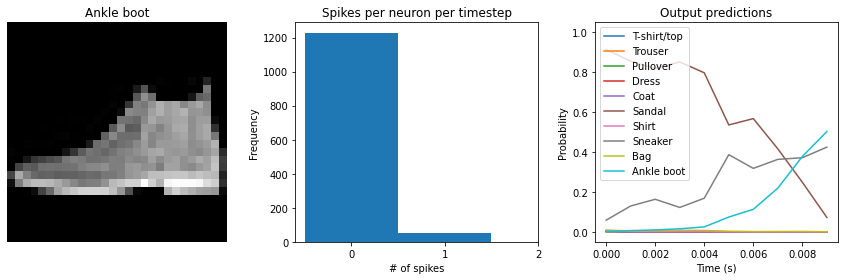

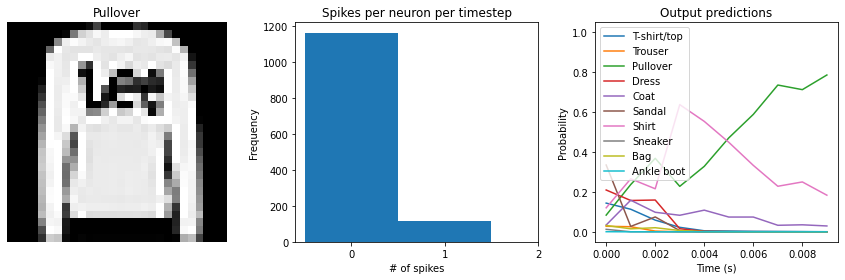

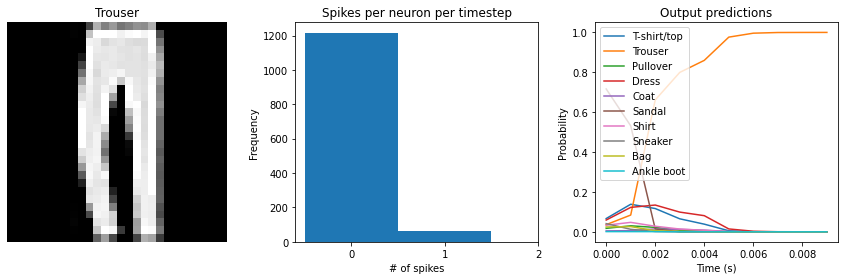

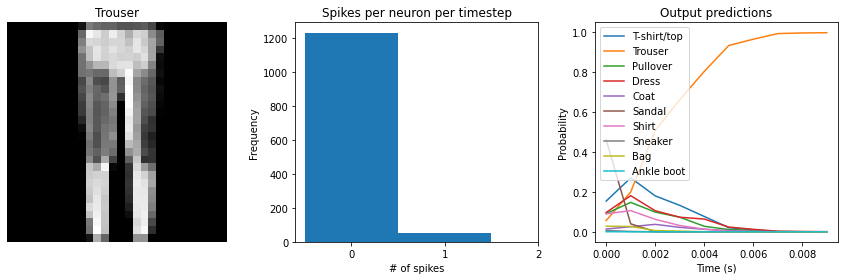

In [16]:
check_output(filtered_model)

We can see that the model performs similarly to the previous
[spiking aware training](#Spiking-aware-training) example, which makes sense since, for
a static input image, a moving average is very similar to a global average. We would
need a more complicated model, with multiple spiking layers or inputs that are changing
over time, to really see the benefits of a Lowpass layer.
The ``keras_spiking.Alpha`` layer is another lowpass-filtering layer,
which can provide better filtering of spike noise with less delay
than ``keras_spiking.Lowpass``.

## Summary

We can use `SpikingActivation` layers to convert any activation function to an
equivalent spiking implementation. Models with SpikingActivations can be trained and
evaluated in the same way as non-spiking models, thanks to the swappable
training/inference behaviour.

There are also a number of additional features that should be kept in mind in order to
optimize the performance of a spiking model:

- [Simulation time](#Simulation-time): by adjusting `dt` we can trade off temporal
  sparsity versus accuracy
- [Spiking aware training](#Spiking-aware-training): incorporating spiking dynamics on
  the forward pass can allow the model to learn weights that are more robust to spiking
  activations
- [Spike rate regularization](#Spike-rate-regularization): we can gain more control over
  spike rates by directly incorporating activity regularization into the optimization
  process
- [Lowpass filtering](#Lowpass-filtering): we can achieve better accuracy with fewer
  spikes by aggregating spike data over time